In [1]:
#import needed Python libraries
import numpy as np
import csv
import random
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scistats
import math
import pylab
import statsmodels as sm

#graphics parameters of the notebook
# display graphs inline
%matplotlib inline

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
pd.set_option('plotting.matplotlib.register_converters', True)

# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

In [2]:
#inegrate data from 2009-2010 to 2018-2019 seasons from different files
data_18_19 = pd.read_csv("./data/2018_2019.csv", parse_dates=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
data_17_18 = pd.read_csv("./data/2017_2018.csv", parse_dates=True)
data_16_17 = pd.read_csv("./data/2016_2017.csv", parse_dates=True)
data_15_16 = pd.read_csv("./data/2015_2016.csv", parse_dates=True)
data_14_15 = pd.read_csv("./data/2014_2015.csv", parse_dates=True)
data_13_14 = pd.read_csv("./data/2013_2014.csv", parse_dates=True)
data_12_13 = pd.read_csv("./data/2012_2013.csv", parse_dates=True)
data_11_12 = pd.read_csv("./data/2011_2012.csv", parse_dates=True)
data_10_11 = pd.read_csv("./data/2010_2011.csv", parse_dates=True)
data_09_10 = pd.read_csv("./data/2009_2010.csv", parse_dates=True)
data_08_09 = pd.read_csv("./data/2008_2009.csv", parse_dates=True)
#data_07_08 = pd.read_csv("./data/2007_2008.csv", parse_dates=True)
#data_06_07 = pd.read_csv("./data/2006_2007.csv", parse_dates=True)
#data_05_06 = pd.read_csv("./data/2005_2006.csv", parse_dates=True)



#test about data consistency for all files
for df in [data_18_19, data_17_18, data_16_17, data_15_16, data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09]:
    print("Number of df columns : " + str(len(data_18_19.columns)))

#integrate data in a single df
raw_data = pd.concat([data_18_19, data_17_18, data_16_17, data_15_16, data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09])

print(raw_data)

Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
Number of df columns : 62
    17Div      Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  ...  GBA   BSH  BSD   BSA   SBH  SBD   SBA
0      E0  10/08/18    Man United       Leicester     2     1   H  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
1      E0  11/08/18   Bournemouth         Cardiff     2     0   H  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
2      E0  11/08/18        Fulham  Crystal Palace     0     2   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
3      E0  11/08/18  Huddersfield         Chelsea     0     3   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
4      E0  11/08/18     Newcastle       Tottenham     1     2   A  ...  NaN   NaN  NaN   NaN   NaN  NaN   NaN
..    ...       ...           ...             ...   ..

In [3]:
#Select useful features for datavisualization and analysis purposes
E0_data = raw_data[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG",
                    "FTR", "HTAG", 'B365A', 'B365D', 'B365H', 'BSA', 
                    'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'GBA', 'GBD',
                    'GBH', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH',
                    'PSA', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA',
                    'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA','WHD', 'WHH']]

#convert date format to YYYY-MM-DD classic format
E0_data.Date = E0_data.Date.map(lambda x : "20" + x[6:8] + "-" + x[3:5] + "-" + x[0:2])

#sort data by date
E0_data.sort_values('Date', inplace=True)

#reset data indexes
E0_data = E0_data.reset_index(drop=True)

#create matchID column
E0_data['matchID'] = E0_data.index

#create season feature
E0_data['Season'] = 0
E0_data.Season = E0_data.Date.map(lambda x : int(x[0:4]) if int(x[5:7]) > 6 else int(x[0:4]) - 1)

#null values test
E0_data.isnull().any()

#create teams list
teams = E0_data['HomeTeam'].unique()
print(teams)

#create seasons list
seasons = np.sort(E0_data['Season'].unique())
print(seasons)

#create dictionary containing teams list by season
teams_by_season = {season : E0_data[E0_data['Season'] == season]['HomeTeam'].unique() for season in seasons}



['Arsenal' 'Bolton' 'Everton' 'Hull' 'Middlesbrough' 'Sunderland'
 'West Ham' 'Chelsea' 'Aston Villa' 'Man United' 'Liverpool' 'Newcastle'
 'Tottenham' 'West Brom' 'Blackburn' 'Fulham' 'Stoke' 'Man City' 'Wigan'
 'Portsmouth' 'Wolves' 'Birmingham' 'Burnley' 'Blackpool' 'QPR' 'Swansea'
 'Norwich' 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester'
 'Bournemouth' 'Watford' 'Brighton' 'Huddersfield']
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [4]:
#match day feature construction for HomeTeam and AwayTeam (1st match of a season --> 1, last --> 38 because 20 team play by season)
E0_HT_grpby = E0_data.groupby('HomeTeam')[['Date']]
E0_AT_grpby = E0_data.groupby('AwayTeam')[['Date']]

def fxyH(row):
    x = row['HomeTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

def fxyA(row):
    x = row['AwayTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

E0_data['HomeTeamDay'] = E0_data.apply(fxyH, axis=1)
E0_data['AwayTeamDay'] = E0_data.apply(fxyA, axis=1)

E0_data['ones'] = 1
for season in seasons:
    for team in teams_by_season[season]:
        sH = E0_data[(E0_data['HomeTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sH.index, 'HomeTeamHomeDay'] = sH.cumsum()
        
        sA = E0_data[(E0_data['AwayTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sA.index, 'AwayTeamAwayDay'] = sA.cumsum()
        
        
def resultConverter(A):
    if A == 'H':
        return 'W'
    elif A =='A':
        return 'L'
    else:
        return 'D'

def resultInverser(A):
    if A == 'W':
        return 'L'
    elif A == 'L':
        return 'W'
    else:
        return 'D'
def ordinalResultConverter(A):
    if A == 'W':
        return 1
    elif A == 'L':
        return 0
    else:
        return 0.5
    
#make dummies variables for FTR (result of match), HW = Home Win, AW = Away Win, D = draw
E0_data['HW'] = E0_data.FTR.map(lambda x : 1 if x == 'H' else 0)
E0_data['AW'] = E0_data.FTR.map(lambda x : 1 if x == 'A' else 0)
E0_data['D']= E0_data.FTR.map(lambda x : 1 if x == 'D' else 0)

#make 2 different variable for the result of a match : 1 for the home team point of view, the other for the away team pt of view
E0_data['HR'] = E0_data.FTR.map(lambda x : resultConverter(x))
E0_data['AR'] = E0_data.HR.map(lambda x : resultInverser(x))

#make ordinal variable for the home team point of view result (1 = win, 0.5 = Draw, 0 = loss)
E0_data['ordinalHR'] = E0_data.HR.map(lambda x : ordinalResultConverter(x))   

In [5]:

grp_by_HT = E0_data.groupby('HomeTeam')
grp_by_AT = E0_data.groupby('AwayTeam')

grp_by_HT_and_season = E0_data.groupby(['HomeTeam', 'Season'])
grp_by_AT_and_season = E0_data.groupby(['AwayTeam', 'Season'])

#past performance features engineering
for team in teams:
    
    #we retrieve results series of the team
    teamHomeResults_s = grp_by_HT.get_group(team)['HR']
    teamAwayResults_s = grp_by_AT.get_group(team)['AR']
    #combine these 2 series and sort the obtained serie
    teamResults_s = pd.concat([teamHomeResults_s, teamAwayResults_s]).sort_index()

    #(i) compute k_last_HR and k_last_AR --> 6 features
    lag1TeamResults_d = teamResults_s.shift(1).to_dict()
    lag2TeamResults_d = teamResults_s.shift(2).to_dict()
    lag3TeamResults_d = teamResults_s.shift(3).to_dict()
    
    #k_last_HTR and k_last_ATR are just shifted versions of the results series
    E0_data.loc[teamHomeResults_s.index,'1_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'3_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'3_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    
    #(ii) Compute k_last_HTRH and k_last ATAR --> 4 features
    #we need here to diferentiate home results and past results. Python dictionaries allows the program to access to
    #needed data faster than with a Pandas serie
    lag1TeamHomeResults_d = teamHomeResults_s.shift(1).to_dict()
    lag2TeamHomeResults_d = teamHomeResults_s.shift(2).to_dict()
    lag1TeamAwayResults_d = teamAwayResults_s.shift(1).to_dict()
    lag2TeamAwayResults_d = teamAwayResults_s.shift(2).to_dict()
    
    E0_data.loc[teamHomeResults_s.index,'1_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamHomeResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamHomeResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamAwayResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamAwayResults_d[x])
    
    #(iii) rates based features : we need to get only season specific results series (to avoid taking previous season results into season rates)
    for season in seasons:
        
        if team in teams_by_season[season]:
            #retrieve season specific results serie (1 win serie, 1 draw serie the loss  will be computed thanks to
            #the 2 others)
            teamHomeResultsW_s = grp_by_HT_and_season.get_group((team,season))['HW']
            teamAwayResultsW_s = grp_by_AT_and_season.get_group((team,season))['AW']
            teamResultsW_s = pd.concat([teamHomeResultsW_s, teamAwayResultsW_s]).sort_index()

            teamHomeResultsD_s = grp_by_HT_and_season.get_group((team,season))['D']
            teamAwayResultsD_s = grp_by_AT_and_season.get_group((team,season))['D']
            teamResultsD_s = pd.concat([teamHomeResultsD_s, teamAwayResultsD_s]).sort_index()
        
            #(0) compute HW rates, HL rates, AW rates, LW rates since begining of season
            teamResultsWCumul_d = teamResultsW_s.shift(1).cumsum().to_dict()
            teamResultsDCumul_d = teamResultsD_s.shift(1).cumsum().to_dict()

            #(i) compute 7_HTW_rate, 12_HTW_rate, 7_HTD_rate, 12_HTD_rate, 7_ATW_rate, 12_ATW_rate, 7_ATD_rate, 12_ATD_rate --> 8 features
            win7TeamResultsW_d = teamResultsW_s.shift(1).rolling(window = 7, min_periods = 5).mean().to_dict()
            win12TeamResultsW_d = teamResultsW_s.shift(1).rolling(window = 12, min_periods = 8).mean().to_dict()
            win7TeamResultsD_d = teamResultsD_s.shift(1).rolling( window = 7, min_periods = 5).mean().to_dict()
            win12TeamResultsD_d = teamResultsD_s.shift(1).rolling( window = 12, min_periods = 8).mean().to_dict()
        
            E0_data.loc[teamHomeResultsW_s.index,'HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'HTD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
        
            E0_data.loc[teamHomeResultsW_s.index,'7_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'12_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'7_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'12_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        
            E0_data.loc[teamHomeResultsD_s.index,'7_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamHomeResultsD_s.index,'12_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'7_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'12_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])

        #(ii) compute 5_HTHW_rate and 5_ATAW_rate
        win5TeamResultsHomeW_d = teamHomeResultsW_s.shift(1).rolling( window = 5, min_periods = 3).mean().to_dict()
        win5TeamResultsAwayW_d = teamAwayResultsW_s.shift(1).rolling( window = 5, min_periods = 3).mean().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'5_HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win5TeamResultsHomeW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'5_ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win5TeamResultsAwayW_d[x])
        
        #(iii) compute HTHW_rate, ATAW_rate, HTHD_rate, ATAD_rate
        teamHomeResultsCumulW_d = teamHomeResultsW_s.shift(1).cumsum().to_dict()
        teamHomeResultsCumulD_d = teamHomeResultsD_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulW_d = teamAwayResultsW_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulD_d = teamAwayResultsD_s.shift(1).cumsum().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulW_d[x])
        E0_data.loc[teamHomeResultsW_s.index,'HTHD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulD_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulD_d[x])


        
#compute missing features k_XTL_rate thanks to the k_XTW_rate and k_XTD_rate features
E0_data.loc[:,'7_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'12_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'7_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])
E0_data.loc[:,'12_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])

#compute missing HTL_rate, ATL_rate with features with the wins and draws features
E0_data.loc[:,'HTW_rate'] = E0_data['HTW_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATW_rate'] = E0_data['ATW_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTD_rate'] = E0_data['HTD_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATD_rate'] = E0_data['ATD_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTL_rate'] = 1 - (E0_data['HTW_rate'] + E0_data['HTD_rate'])
E0_data.loc[:,'ATL_rate'] = 1 - (E0_data['ATW_rate'] + E0_data['ATD_rate'])

#we finish to compute HTHW_rate, ..., ATAD_rate features and compute corresponding loss features
E0_data.loc[:,'HTHW_rate'] = E0_data['HTHW_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAW_rate'] = E0_data['ATAW_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHD_rate'] = E0_data['HTHD_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAD_rate'] = E0_data['ATAD_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHL_rate'] = 1 - (E0_data['HTHW_rate'] + E0_data['HTHD_rate'])
E0_data.loc[:,'ATAL_rate'] = 1 - (E0_data['ATAW_rate'] + E0_data['ATAD_rate'])


In [6]:
#Elo ranking method parameters
k = 20.0
d = 400.0
c = 10.0

#Initialization of output containers
ELO_dict = dict()
gammaHT_dict = dict()
gammaAT_dict = dict()

#intermediate data containers initilization
latest_update_d = dict() #contains latest updates in date of ELO_dict
prev_ELO_score_d = dict() #contains latest ELO_score given to a team for computing new one

prev_season_teams = [team for team in teams] #contains list of teams for the current season
last_teams_ELO_av = 0.0 #contains ELO average of last previous season teams

for team in teams:
    latest_update_d[team] = '2001-01-01'
    prev_ELO_score_d[team] = 0.0

for season in E0_data.Season.unique():
    season_match_dates = E0_data[E0_data['Season'] == season].Date.unique()
    season_teams = E0_data[E0_data['Season'] == season].HomeTeam.unique()
    last_season_date = season_match_dates[len(season_match_dates) - 1]
    
    for Steam in season_teams:
        if not (Steam in prev_season_teams):
            prev_ELO_score_d[Steam] = last_teams_ELO_av
            
    for date in season_match_dates:
        for team in teams:
            if not ((team in E0_data[E0_data['Date'] == date]['HomeTeam'].values) | (team in E0_data[E0_data['Date'] == date]['AwayTeam'].values)):
                ELO_dict[(team, date)] = prev_ELO_score_d[team]
                latest_update_d[team] = date
            else:
                if latest_update_d[team] < date:
                    Hteam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['HomeTeam'].values[0]
                    Ateam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['AwayTeam'].values[0]
            
                    l0H = prev_ELO_score_d[Hteam]
                    l0A = prev_ELO_score_d[Ateam]
                    gammaH = 1.0/(1.0 + c**((l0A - l0H)/d))
                    gammaA = 1.0 - gammaH
                    alphaH = E0_data[(E0_data['Date'] == date) & (E0_data['HomeTeam'] == Hteam)]['ordinalHR'].values[0]
                    alphaA = 1 - alphaH
            
                    #compute new scores
                    new_HT_ELO_score = l0H + k * (alphaH - gammaH)
                    new_AT_ELO_score = l0A + k * (alphaA - gammaA)

                    #put new scores in ELO_dict
                    ELO_dict[(Hteam, date)] = new_HT_ELO_score
                    ELO_dict[(Ateam, date)] = new_AT_ELO_score
                    gammaHT_dict[(Hteam, date)] = gammaH
                    gammaAT_dict[(Ateam, date)] = gammaA
                    latest_update_d[Hteam] = date
                    latest_update_d[Ateam] = date
            
                    #update prev_ELO_score_d and latest_update_d
                    prev_ELO_score_d[Hteam] = new_HT_ELO_score
                    prev_ELO_score_d[Ateam] = new_AT_ELO_score
        
        if date == last_season_date:
            ELOs = np.array([prev_ELO_score_d[Steam] for Steam in season_teams])
            ELOs.sort()
            last_teams_ELO_av = np.mean(ELOs[0:-17])
            prev_season_teams = season_teams
            
            #make HTeamEloScore, ATeamEloScore and gammaHome features from previously computed dictionaries

def HomeTeamEloScore(row):
    return ELO_dict[(row['HomeTeam'], row['Date'])]

def AwayTeamEloScore(row):
    return ELO_dict[(row['AwayTeam'], row['Date'])]

def gammaHTeamDate(row):
    return gammaHT_dict[(row['HomeTeam'], row['Date'])]

#compute resulting Elo scores important features
E0_data.loc[:,'HTeamEloScore'] = E0_data.apply(HomeTeamEloScore, axis=1) 
E0_data.loc[:,'ATeamEloScore'] = E0_data.apply(AwayTeamEloScore, axis=1) 
E0_data.loc[:,'gammaHome'] = E0_data.apply(gammaHTeamDate, axis=1)


In [7]:

for team in teams:
    homeMatchDates_s = E0_data[E0_data['HomeTeam'] == team]['Date']
    awayMatchDates_s = E0_data[E0_data['AwayTeam'] == team]['Date']
    matchDates_s = pd.concat([homeMatchDates_s, awayMatchDates_s]).sort_index()
    lastMatchDates_s = matchDates_s.shift(1)
    matchDates = matchDates_s.values
        
    E0_data.loc[E0_data['HomeTeam'] == team, 'HTLastMatchDate'] = E0_data.loc[E0_data['HomeTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    E0_data.loc[E0_data['AwayTeam'] == team, 'ATLastMatchDate'] = E0_data.loc[E0_data['AwayTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    
def HTdaysBetweenDates(row):
    if not (pd.isnull(row['HTLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['HTLastMatchDate'])
        ndays = (currDate - prevDate).days 
        if ndays < 20:
            return ndays
        else: 
            return np.nan
    else:
        return np.nan 
    
def ATdaysBetweenDates(row):
    if not (pd.isnull(row['ATLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['ATLastMatchDate'])
        return (currDate - prevDate).days
    else:
        return np.nan 
    
E0_data.loc[:, 'HTdaysSinceLastMatch'] = E0_data.apply(HTdaysBetweenDates, axis=1)
E0_data.loc[:, 'ATdaysSinceLastMatch'] = E0_data.apply(ATdaysBetweenDates, axis=1)
E0_data.loc[:,'DaysSinceLastMatchRate'] = E0_data['HTdaysSinceLastMatch'].astype(float)/E0_data['ATdaysSinceLastMatch'].astype(float)


In [8]:

E0_data['1_last_HTR_isW'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTR_isL'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTR_isW'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTR_isL'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_HTR_isW'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_HTR_isL'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_ATR_isW'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATR_isL'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATR_isW'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATR_isL'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_ATR_isW'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_ATR_isL'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_HTHR_isW'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTHR_isL'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTHR_isW'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTHR_isL'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)

E0_data['1_last_ATAR_isW'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATAR_isL'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATAR_isW'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATAR_isL'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


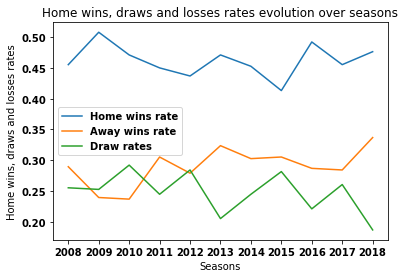

In [9]:





#Home wins, Away wins and draws rates variations over seasons
HW_rates = []
AW_rates = []
D_rates = []

for season in seasons:
    season_data = E0_data[E0_data['Season'] == season]
    total_matches_nb = len(season_data.index)
    HW_rate = float(len(season_data[season_data['FTR'] == 'H'].index))/float(total_matches_nb)
    AW_rate = float(len(season_data[season_data['FTR'] == 'A'].index))/float(total_matches_nb)
    D_rate = float(len(season_data[season_data['FTR'] == 'D'].index))/float(total_matches_nb)
    HW_rates.append(HW_rate)
    AW_rates.append(AW_rate)
    D_rates.append(D_rate)

plt.figure()
plt.plot(seasons, HW_rates, label="Home wins rate")
plt.plot(seasons, AW_rates, label="Away wins rate")
plt.plot(seasons, D_rates, label="Draw rates")
plt.legend()
plt.xticks([int(season) for season in seasons], seasons)
plt.xlabel("Seasons")
plt.ylabel("Home wins, draws and losses rates")
plt.title("Home wins, draws and losses rates evolution over seasons")

#global wins, draws and losses rates
HW_rate = float(len(E0_data[E0_data['HR'] == 'W'].index))/float(len(E0_data.index))
HL_rate = float(len(E0_data[E0_data['HR'] == 'L'].index))/float(len(E0_data.index))
HD_rate = float(len(E0_data[E0_data['HR'] == 'D'].index))/float(len(E0_data.index))
rates = [HW_rate, HL_rate, HD_rate]

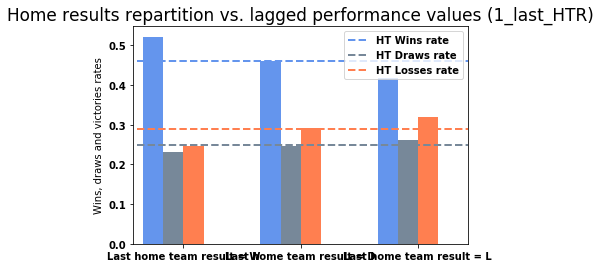

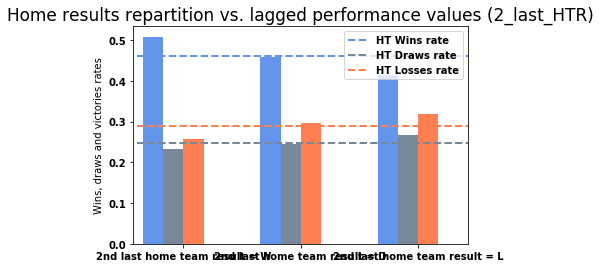

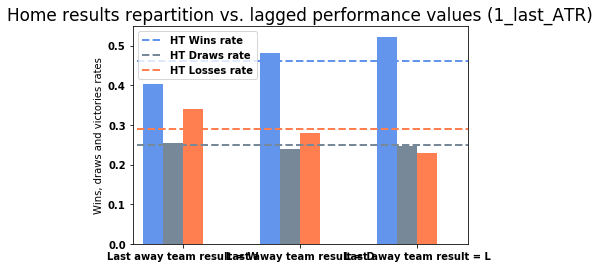

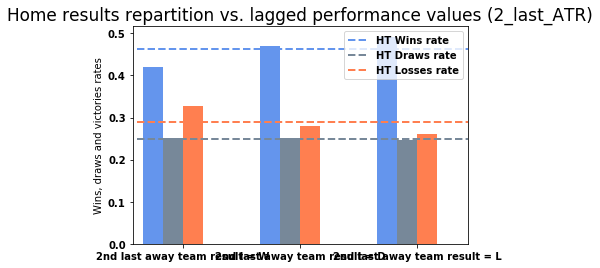

In [10]:

width = 0.12
xticks = np.array([0.3, 1.0, 1.7])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6']
xlabels = [["Last home team result = W", "Last home team result = D", "Last home team result = L"],
           ["2nd last home team result = W", "2nd last home team result = D", "2nd last home team result = L"],
           ["Last away team result = W", "Last away team result = D", "Last away team result = L"],
            ["2nd last away team result = W", "2nd last away team result = D", "2nd last away team result = L"]]

var_names = ['1_last_HTR', '2_last_HTR', '1_last_ATR', '2_last_ATR']
titles = ["Home results repartition vs. lagged performance values (" + var_name + ")" for var_name in var_names]

k=0
for var_name in var_names:
    
    fig = plt.figure()
    HW_rates = []
    HD_rates = []
    
    for Rvalue in ['W','D','L']:
        HW_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'W')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
        HD_rates.append(len(E0_data[(E0_data[var_name] == Rvalue) & (E0_data['HR'] == 'D')].index) / len(E0_data[E0_data[var_name] == Rvalue].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(xticks - 1.5 * width, HW_rates, width, color = '#6495ED')
    plt.bar(xticks - 0.5 * width, HD_rates, width, color = '#778899')
    plt.bar(xticks + 0.5 * width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 2.0), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 2.0), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 2.0), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
    pylab.xticks(xticks, xlabels[k])
    plt.ylabel("Wins, draws and victories rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
    plt.xlim(0.0, 2.0)
    plt.title(titles[k], fontsize=17)

    k += 1
    

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


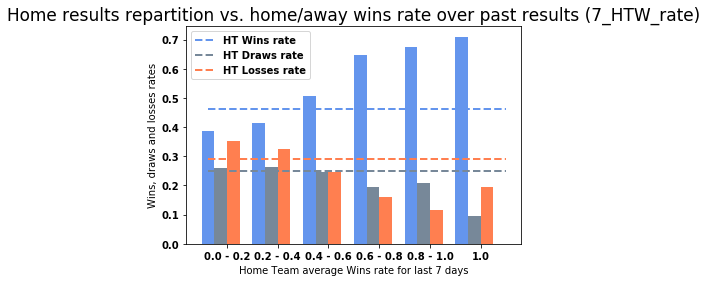

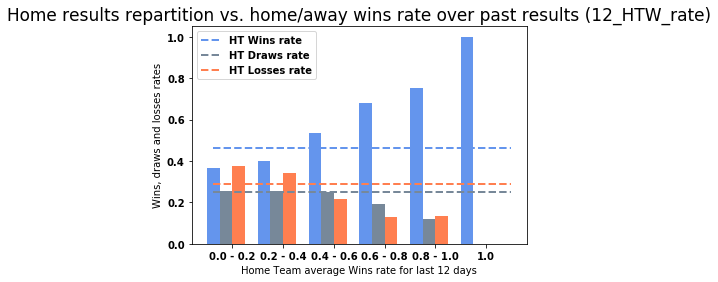

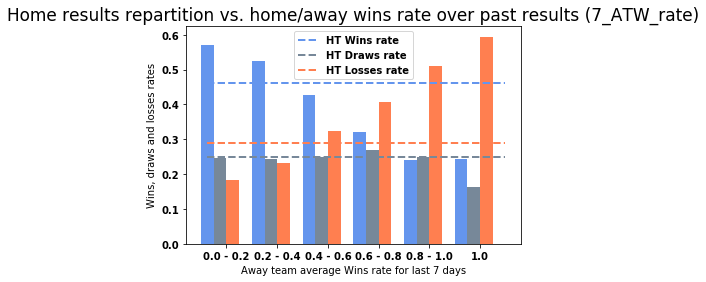

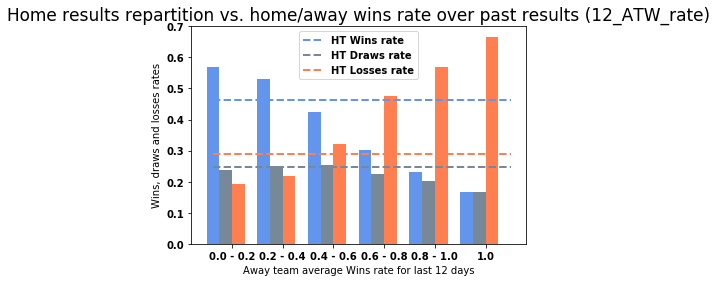

In [11]:

bars = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width = (0.2 - 0.05)/3.0
xticks = np.array([0.025, 0.225, 0.425, 0.625, 0.825, 1.025])
xticksLabels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0']
xlabels = ["Home Team average Wins rate for last 7 days", "Home Team average Wins rate for last 12 days", 
          "Away team average Wins rate for last 7 days", "Away team average Wins rate for last 12 days"]    
var_names = ['7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate']
titles = ["Home results repartition vs. home/away wins rate over past results (" + var_name + ")" for var_name in var_names]


k=0
for var_name in var_names:
    
    fig = plt.figure()
    nonzero_bars = []
    nonzero_xticks = []
    HW_rates = []
    HD_rates = []
    
    for (bar, xtick) in zip(bars, xticks):
        if len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index) > 0:
            nonzero_xticks.append(xtick)
            HW_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
            HD_rates.append(len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2)) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data[var_name] >= bar) & (E0_data[var_name] < (bar + 0.2))].index))
    
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
    plt.bar(np.array(nonzero_xticks), HW_rates, width, color = '#6495ED')
    plt.bar(np.array(nonzero_xticks) + width, HD_rates, width, color = '#778899')
    plt.bar(np.array(nonzero_xticks) + 2*width, HL_rates, width, color = '#FF7F50')
    plt.plot((0.025, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
    plt.plot((0.025, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
    plt.plot((0.025, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

    pylab.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1], xticksLabels)
    plt.xlabel(xlabels[k])
    plt.ylabel("Wins, draws and losses rates")
    plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
    plt.title(titles[k], fontsize=17)



    k += 1    
    
    

Text(0.5,1,'Elo score distribution histogram')

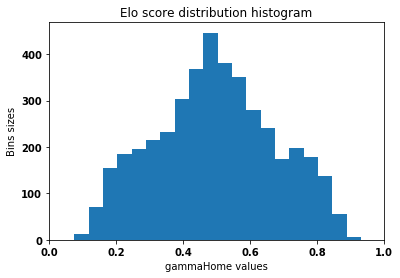

In [12]:
# Elo rank feature visualization

plt.hist(E0_data['gammaHome'].values, bins=20)
plt.xlabel("gammaHome values")
plt.ylabel("Bins sizes")
plt.xlim(0,1)
plt.title("Elo score distribution histogram")

Text(0.5,1,'Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool')

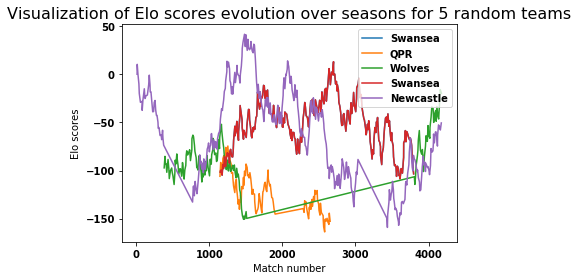

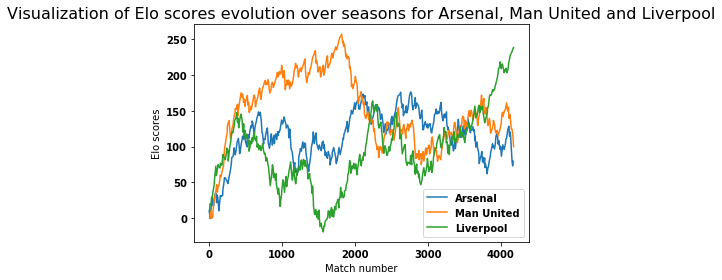

In [13]:
fig = plt.figure()
#random teams elo score visualization
random_teams = [teams[random.randint(0, len(teams))-1] for k in range(0,5)]
for team in random_teams:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(random_teams)
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for 5 random teams', fontsize = 16)
    
fig = plt.figure()
for team in ['Arsenal', 'Man United', 'Liverpool']:
    HomeEloScores = E0_data[E0_data['HomeTeam'] == team]['HTeamEloScore']
    AwayEloScores = E0_data[E0_data['AwayTeam'] == team]['ATeamEloScore']
    EloScores = pd.concat([HomeEloScores, AwayEloScores]).sort_index()
    EloScores.plot()
plt.legend(['Arsenal', 'Man United', 'Liverpool'])
plt.xlabel('Match number')
plt.ylabel('Elo scores')
plt.title('Visualization of Elo scores evolution over seasons for Arsenal, Man United and Liverpool', fontsize=16)

Text(0.5,1,'Effect of gammaHome score match home results repartition')

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


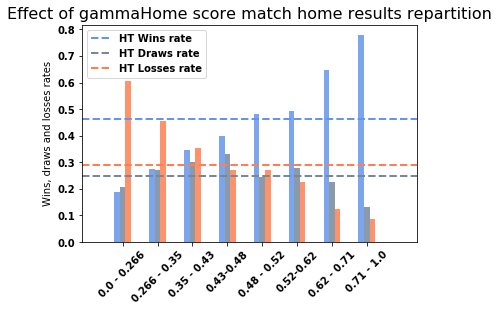

In [14]:

#we define bins of approximatively equal sizes in terms of Elo score
bars = [0.0, 0.266, 0.35, 0.43, 0.48, 0.52, 0.62, 0.71, 1.0]
bars_pos = [0.0 + k * (1.0/8.0) for k in range(1,9)]
width = 0.02
xticks = np.array([(bars[k+1] - bars[k])/2.0 for k in range(0, len(bars) - 1)])
xticksLabels = ['0.0 - 0.266', '0.266 - 0.35','0.35 - 0.43', '0.43-0.48', '0.48 - 0.52','0.52-0.62', '0.62 - 0.71', '0.71 - 1.0']
xlabels = ["Home Team average home-wins rate for last 5 days (at home)", "Away Team average away-wins rate for last 5 days (away)"]    

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bars) - 1):
    HW_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['gammaHome'] >= bars[k]) & (E0_data['gammaHome'] < bars[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED', alpha = 0.85)
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899', alpha = 0.85)
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50', alpha = 0.85)

plt.plot((0.0, 1.2), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 1.2), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 1.2), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)
    
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
plt.xlim(0,1.2)
pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.title("Effect of gammaHome score match home results repartition", fontsize=16)


Text(0.5,1,'Influence of HTdaysSinceLastMatch over results repartition')

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


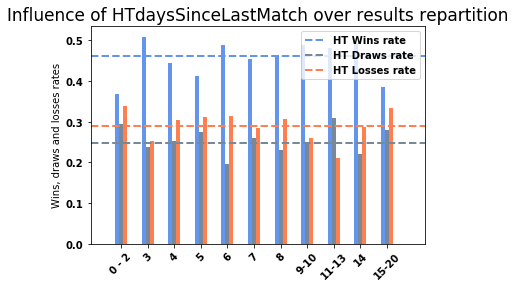

In [15]:
fig = plt.figure()

#we define bins of minimum size for HTdaysSinceLastMatch
bins = [0, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 21]
bars_pos = [0.0 + k * (20/12.0) for k in range(1,12)]
width = 0.25
xticksLabels = ['0 - 2', '3', '4', '5', '6', '7','8', '9-10', '11-13', '14', '15-20']

HW_rates = []
HD_rates = []
HL_rates = []

for k in range(0 , len(bins) - 1):
    HW_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'W')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HD_rates.append(len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1]) & (E0_data['HR'] == 'D')].index) / len(E0_data[(E0_data['HTdaysSinceLastMatch'] >= bins[k]) & (E0_data['HTdaysSinceLastMatch'] < bins[k+1])].index))
    HL_rates = [1 - (HW_rate + HD_rate) for (HW_rate, HD_rate) in zip(HW_rates, HD_rates)]
    
plt.bar(np.array(bars_pos), HW_rates, width, color = '#6495ED')
plt.bar(np.array(bars_pos) + width, HD_rates, width, color = '#778899')
plt.bar(np.array(bars_pos) + 2*width, HL_rates, width, color = '#FF7F50')

plt.plot((0.0, 21), (HW_rate, HW_rate), '--', color='#6495ED', linewidth=2)
plt.plot((0.0, 21), (HD_rate, HD_rate), '--', color='#778899', linewidth=2)
plt.plot((0.0, 21), (HL_rate, HL_rate), '--', color='#FF7F50', linewidth=2)

pylab.xticks(np.array(bars_pos) + width, xticksLabels, rotation=45)
plt.ylabel("Wins, draws and losses rates")
plt.legend(["HT Wins rate", "HT Draws rate", "HT Losses rate"])
plt.xlim(0,21)
plt.title("Influence of HTdaysSinceLastMatch over results repartition", fontsize = 17)



In [16]:
E0_data_copy = E0_data[['HW', 'AW', 'D',
                        'gammaHome',
                        'DaysSinceLastMatchRate',
                        'HTW_rate', 'HTD_rate', 'HTL_rate',
                        'ATW_rate', 'ATD_rate', 'ATL_rate',
                        'HTHW_rate', 'HTHD_rate', 'HTHL_rate',
                        'ATAW_rate', 'ATAD_rate', 'ATAL_rate',
                        '1_last_HTR', '2_last_HTR',
                        '1_last_ATR', '2_last_ATR',
                        '1_last_HTHR', '2_last_HTHR',
                        '1_last_ATAR', '2_last_ATAR',
                        '7_HTW_rate', '12_HTW_rate', 
                        '7_ATW_rate', '12_ATW_rate', 
                        '7_HTL_rate', '12_HTL_rate', 
                        '7_ATL_rate', '12_ATD_rate',
                        '7_HTD_rate', '12_HTD_rate',
                        '7_ATD_rate', '7_ATD_rate',
                       '5_HTHW_rate', '5_ATAW_rate']]

#make dummies variables for the past results indicators features (3 for W, D and L)
E0_data_copy.loc[:, '1_last_HTRisW'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTRisD'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTRisL'] = E0_data_copy['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTRisW'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTRisD'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTRisL'] = E0_data_copy['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATRisW'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATRisD'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATRisL'] = E0_data_copy['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATRisW'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATRisD'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATRisL'] = E0_data_copy['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0)

E0_data_copy.loc[:, '1_last_HTHRisW'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_HTHRisD'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_HTHRisL'] = E0_data_copy['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_HTHRisW'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_HTHRisD'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_HTHRisL'] = E0_data_copy['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '1_last_ATARisW'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '1_last_ATARisD'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '1_last_ATARisL'] = E0_data_copy['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)
E0_data_copy.loc[:, '2_last_ATARisW'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data_copy.loc[:, '2_last_ATARisD'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'D' else 0)
E0_data_copy.loc[:, '2_last_ATARisL'] = E0_data_copy['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

#under matrix form
corr = E0_data_copy.corr()
print(corr)

                              HW        AW         D  gammaHome  DaysSinceLastMatchRate  HTW_rate  HTD_rate  ...  2_last_HTHRisL  1_last_ATARisW  1_last_ATARisD  1_last_ATARisL  2_last_ATARisW  2_last_ATARisD  2_last_ATARisL
HW                      1.000000 -0.592128 -0.532247   0.366396               -0.033544  0.221596 -0.026688  ...       -0.066104       -0.070151       -0.003654        0.061765       -0.086664       -0.000826        0.070928
AW                     -0.592128  1.000000 -0.367060  -0.346192                0.034449 -0.188419  0.023605  ...        0.050667        0.073231       -0.003597       -0.062999        0.103644       -0.017758       -0.077802
D                      -0.532247 -0.367060  1.000000  -0.059240                0.002650 -0.058439  0.006082  ...        0.023077        0.004042        0.007997       -0.005111       -0.008847        0.019609       -0.000137
gammaHome               0.366396 -0.346192 -0.059240   1.000000               -0.098302  0.554145 -0

c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


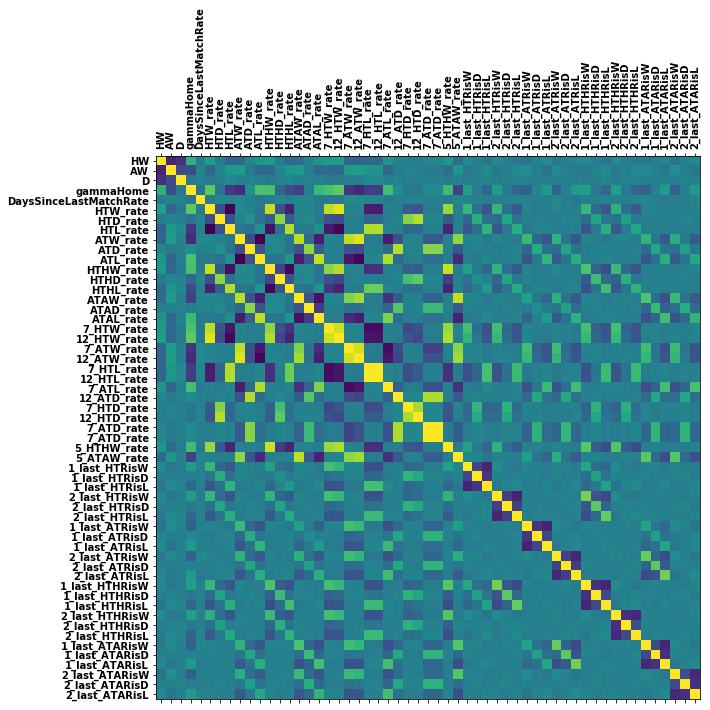

In [17]:

#and in a more understandable and graphical form
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(E0_data_copy)


In [18]:
eloSeasons = [2005, 2006, 2007, 2008]
trainingSeasons = [2009, 2010, 2011, 2012, 2013, 2014, 2015]
testSeasons = [2016, 2017,2018]

In [19]:
featuresPool = ['HR', '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL',
                '3_last_HTR_isW', '3_last_HTR_isL',
                '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL', 
                '3_last_ATR_isW',  '3_last_ATR_isL', 
                '1_last_HTHR_isW', '1_last_HTHR_isL', '2_last_HTHR_isW', '2_last_HTHR_isL',
                '1_last_ATAR_isW', '1_last_ATAR_isL', '2_last_ATAR_isW', '2_last_ATAR_isL',
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate',  'gammaHome']

eloSeasons = [2005, 2006, 2007, 2008]
trainingSeasons = [2009, 2010, 2011, 2012, 2013, 2014, 2015]
testSeasons = [2016, 2017,2018]

E0_data_tr = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
E0_data_te = E0_data.loc[(E0_data['Season'].isin(testSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]



In [20]:
# Folds generations custom function 


def foldsGenerator(ixSet, foldMinSize, foldMaxSize, trInitSize, trOptimalSize = -1):
    
    subsetsList = []
    subsetsList.append(ixSet[0:trInitSize])
    Nsubsets = 1
    
    ixSetLength = ixSet.size
    
    unfoldedSetSize = ixSetLength - trInitSize
    prevSubsetStop = trInitSize
    
    while (unfoldedSetSize > foldMaxSize):
        nextFoldSize = random.randint(foldMinSize, foldMaxSize)
        
        subsetsList.append(ixSet[prevSubsetStop:(prevSubsetStop + nextFoldSize)])
        
        unfoldedSetSize -= nextFoldSize
        prevSubsetStop += nextFoldSize
        Nsubsets += 1
    
    subsetsList.append(ixSet[prevSubsetStop:])
    Nsubsets += 1    
    return (Nsubsets, subsetsList)

#test
#sub = foldsGenerator(E0_data_tr.index, 40, 55, 700)


In [21]:
#Scores functions implementation

def brierScore(probW, probL, probD, true, classLabels):
    
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    cumulScore = (probW - trueW)*(probW - trueW) + (probL - trueL)*(probL - trueL) + (probD - trueD)*(probD - trueD)
    
    return float(np.sum(cumulScore))/float(true.index.size)

def rankProbabilityScore(probW, probL, probD, true, classLabels):
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    true1 = trueL
    true2 = trueL + trueD
    
    prob1 = probL
    prob2 = probL + probD
    
    cumulScore = (prob1 - true1)*(prob1 - true1) + (prob2 - true2) * (prob2 - true2)
    
    return(float(np.sum(cumulScore))/(2.0 * float(true.index.size)))

In [22]:
# Score estimation function 
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import preprocessing

def crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax = -1):
    
    (Nfold, subsetsList) = foldsGenerator(labels.index, foldGenParams['foldMinSize'], 
                                          foldGenParams['foldMaxSize'], foldGenParams['trInitSize'])
    trSubset = []
    validSubset = subsetsList.pop(0)
    
    k=0
    avScores = np.zeros(3 + len(scoreFunList))
    while (len(subsetsList) > 0) :
        if (k == 0):                
            trSubset = validSubset
        else:
            trSubset = trSubset.append(validSubset)
        if (NObsMax != (-1)):
            trSubset = trSubset[-NObsMax:]
        
        validSubset = subsetsList.pop(0)
    
        predictors_tr = predictors.loc[trSubset,:]
        predictors_val = predictors.loc[validSubset,:]
        labels_tr = labels.loc[trSubset]
        labels_val = labels.loc[validSubset]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_val, labels_val, fittingParams)

        scores = []
        scores.append(float(len(predictors_val.index)) * accuracy_score(predLabels, labels_val.values))
        
        if len(labels_val.unique()) > 2:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, average='weighted'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, average='weighted'))
        else:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, pos_label='W'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, pos_label='W'))
        
        for scoreFun in scoreFunList:
            scores.append(float(len(predictors_val.index)) * scoreFun(probW, probL, probD, labels_val, classLabels))
        print(scoreFun(probW, probL, probD, labels_val, classLabels))
        avScores = avScores + np.array(scores)
        
        k += 1
    return avScores/float(len(labels.index) - foldGenParams['trInitSize'])






In [23]:
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display

#Create X and Y
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', 
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate']])
Y = E0_data[['FTR']]

#X preprocessing
imputer = Imputer()
X_imputed = imputer.fit_transform(X)

#Split X and Y into training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, shuffle=True)

#Logistic Regression Model Setup
model = LogisticRegression()
model.fit(x_train, y_train)

#Logistic Regression Model Metrics
print("Logestic Regression")
print("Train Score: ", model.score(x_train, y_train))
print("Test Score: ", model.score(x_test, y_test))
print(classification_report(y_test, model.predict(x_test), digits=3))

#Forest model setup
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(x_train, y_train)

#Forest Model Metrics
print("Forest Classifier")
print("Train Score: ", forest.score(x_train, y_train))
print("Test Score: ", forest.score(x_test, y_test))
print(classification_report(y_test, forest.predict(x_test), digits=3))

print(y_test.shape)
print(forest.predict(x_test).shape)

Logestic Regression
Train Score:  0.5993620414673047
Test Score:  0.5645933014354066
             precision    recall  f1-score   support

          A      0.537     0.642     0.585       293
          D      0.383     0.065     0.111       277
          H      0.593     0.808     0.684       475

avg / total      0.521     0.565     0.504      1045

Forest Classifier
Train Score:  0.7942583732057417
Test Score:  0.40574162679425835
             precision    recall  f1-score   support

          A      0.385     0.672     0.489       293
          D      0.282     0.307     0.294       277
          H      0.612     0.299     0.402       475

avg / total      0.461     0.406     0.398      1045

(1045, 1)
(1045,)


c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\amada\pycharmprojects\cs230dlproject\venv\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [24]:
pd.set_option('display.max_columns', None)

display(E0_data.head(20))

Date       HomeTeam       AwayTeam  FTHG  FTAG FTR  HTAG  B365A  B365D  B365H    BSA   BSD   BSH    BWA   BWD   BWH    GBA   GBD   GBH    IWA  IWD   IWH    LBA   LBD   LBH  PSA  PSD  PSH    SBA   SBD   SBH    SJA   SJD   SJH    VCA   VCD   VCH    WHA   WHD   WHH  matchID  Season  HomeTeamDay  AwayTeamDay  ones  HomeTeamHomeDay  AwayTeamAwayDay  HW  AW  D HR AR  ordinalHR 1_last_HTR  \
0   2008-08-16        Arsenal      West Brom     1     0   H     0  15.00   6.50   1.20  13.00  5.00  1.22  10.00  5.50  1.22  13.00  5.50  1.22  11.00  5.2  1.20  11.00  5.00  1.20  NaN  NaN  NaN  12.00  5.50  1.20  12.00  5.50  1.20  13.00  6.00  1.25  12.00  5.50  1.17        0    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
1   2008-08-16         Bolton          Stoke     3     1   H     0   4.50   3.50   1.83   4.33  3.25  1.80   4.40  3.30  1.75   4.50  3.25  1.83   4.20  3.3  1.75   4.00  3.40  1.73  NaN  NaN  NaN   4.20  3.25  1.80   4.33  3.20  1.80   4.80  3.40  1.85   4.00  3.10  1.80        1    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
2   2008-08-16        Everton      Blackburn     2     3   A     1   4.00   3.30   2.00   3.50  3.25  2.00   4.00  3.25  1.85   3.75  3.25  2.00   3.30  3.2  2.00   4.00  3.20  1.80  NaN  NaN  NaN   3.75  3.25  1.90   3.40  3.25  2.00   4.00  3.30  2.05   3.50  3.10  1.95        2    2008            1            1     1              1.0              1.0   0   1  0  L  W        0.0        NaN   
3   2008-08-16           Hull         Fulham     2     1   H     1   2.80   3.20   2.60   2.50  3.25  2.60   2.65  3.15  2.45   2.60  3.25  2.60   2.60  3.2  2.40   2.50  3.25  2.40  NaN  NaN  NaN   2.60  3.20  2.50   2.75  3.20  2.38   2.80  3.40  2.60   2.62  2.90  2.50        3    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
4   2008-08-16  Middlesbrough      Tottenham     2     1   H     0   2.25   3.40   3.20   2.30  3.25  2.80   2.30  3.20  2.80   2.30  3.25  3.00   2.20  3.2  2.90   2.20  3.20  2.80  NaN  NaN  NaN   2.30  3.20  2.80   2.20  3.40  2.88   2.30  3.40  3.20   2.15  3.20  2.90        4    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
5   2008-08-16     Sunderland      Liverpool     0     1   A     0   1.67   3.60   5.50   1.73  3.40  4.50   1.67  3.35  5.00   1.70  3.40  5.00   1.65  3.5  4.50   1.67  3.30  4.50  NaN  NaN  NaN   1.65  3.40  5.00   1.73  3.40  4.33   1.65  3.80  5.50   1.57  3.30  5.50        5    2008            1            1     1              1.0              1.0   0   1  0  L  W        0.0        NaN   
6   2008-08-16       West Ham          Wigan     2     1   H     0   4.20   3.40   1.91   3.80  3.25  1.91   3.80  3.20  1.90   4.00  3.25  1.91   3.80  3.3  1.80   4.00  3.20  1.80  NaN  NaN  NaN   3.75  3.25  1.90   3.75  3.25  1.91   4.35  3.50  1.90   3.75  3.20  1.83        6    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
7   2008-08-17        Chelsea     Portsmouth     4     0   H     0  10.00   5.00   1.33  10.00  4.20  1.33   8.25  4.75  1.30   9.00  4.75  1.33   8.50  4.4  1.30   9.00  4.33  1.29  NaN  NaN  NaN   9.00  4.50  1.30  10.00  5.00  1.25  11.00  5.00  1.33   8.50  4.20  1.30        7    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
8   2008-08-17    Aston Villa       Man City     4     2   H     0   4.33   3.40   1.91   3.75  3.30  1.91   3.60  3.20  1.95   4.00  3.25  1.91   3.30  3.2  2.00   3.75  3.20  1.83  NaN  NaN  NaN   3.75  3.25  1.90   3.75  3.25  1.91   4.35  3.50  1.90   3.50  3.20  1.91        8    2008            1            1     1              1.0              1.0   1   0  0  W  L        1.0        NaN   
9   2008-08-17     Man United 

In [25]:
import tensorflow.compat.v1 as tf

#make TF work like the TF in the HWs
tf.disable_v2_behavior()

#Other feature selections
'''#X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch']])
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'FTAG', 'FTHG']])
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'FTR']])
X = pd.get_dummies(E0_data.drop(['FTR',  'HTAG', 'Date', 'matchID', 'HW', 'AW', 'D', 'AR',
                                 'ordinalHR', 'Season'], axis=1))'''

#Setup Data
X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', 
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate']])

Y = E0_data[['ordinalHR']].to_numpy().ravel()*2



#X preprocessing
imputer = Imputer()
X_imputed = imputer.fit_transform(X)

#Split X and Y into training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, shuffle=True)

#Neural Network Setup
n_inputs = X.shape[1]
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 3

#Tensorflow X and Y
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
Y = tf.placeholder(tf.int32, shape = (None), name = 'Y')

#Function used to better display model metrics
def convert_ordinalHR(x):
    y=[]
    for i in range(x.size):
        if x[i] == 0:
            y.append('A')
        elif x[i] == 2:
            y.append('H')
        elif x[i] == 1:
            y.append('D')
    return y

#General Function for neural layer setup
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name = 'kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        L2 = tf.nn.l2_loss(W)
        Z = tf.matmul(X,W)+b
        if activation is not None:
            return activation(Z), L2
        else:
            return Z, L2

#Tensorflow neural layer setup
with tf.name_scope('dnn'):
    hidden1, L2_1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2, L2_2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits, L2_3 = neuron_layer(hidden2, n_outputs, name='outputs', activation=None)



#Loss function
beta=0.01
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = Y, logits=logits)
    loss = tf.reduce_mean(xentropy+beta*(L2_1+L2_2+L2_3), name='loss')
    


#Optimizer
learning_rate = 0.000001
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#Metric analysis setup
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    preds = tf.argmax(input=logits, axis=1)
    
#Initialize the above tensorflow variables    
init = tf.global_variables_initializer()

#Runtime and batchsetup
n_epochs = 30000
batch_size = 50

#Run the model
with tf.Session() as sess:
    init.run()
    #Model Loop
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: x_train, Y: y_train})
        acc_train = accuracy.eval(feed_dict={X: x_train, Y: y_train})
        acc_val = accuracy.eval(feed_dict={X: x_test, Y: y_test})
        #if(epoch % 200 == 0 or epoch==n_epochs-1):
            #print(epoch, 'Train accuracy:', acc_train, 'Val accuracy:', acc_val)
    
    #Retrive Metrics
    acc_val = accuracy.eval(feed_dict={X: x_test, Y: y_test})
    preds = preds.eval(feed_dict = {X:x_test})
    log = logits.eval(feed_dict = {X:x_test})
    preds=convert_ordinalHR(preds)
    y_test=convert_ordinalHR(y_test)
    
    #Print Metrics
    print('Train accuracy:', acc_train, 'Val accuracy:', acc_val)
    print(classification_report(y_test, preds, digits=3))







Instructions for updating:
non-resource variables are not supported in the long term
Train accuracy: 0.6060606 Val accuracy: 0.5779904
             precision    recall  f1-score   support

          A      0.594     0.596     0.595       314
          D      0.271     0.114     0.160       255
          H      0.623     0.815     0.706       476

avg / total      0.528     0.578     0.539      1045



In [26]:
import tensorflow as tf
from tensorflow.keras import layers

#Functions to manipulate data for use in the model
def one_hot_y(Y):
    Y_new = np.zeros((Y.shape[0],3))
    for i in range(Y.shape[0]-1):
        if (Y[i] == 'H'):
            Y_new[i]=[1,0,0]
        elif (Y[i] == 'A'):
            Y_new[i]=[0,1,0]
        elif (Y[i] == 'D'):
            Y_new[i]=[0,0,1]
    return Y_new

def revert_yoh(Y):
    Y_new = np.empty([Y.shape[0],Y.shape[1]], dtype="<U1")
    #Y_new = np.zeros((Y.shape[0],Y.shape[1]))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if (Y[i, j] == 0):
                Y_new[i, j]= 'H'
            elif (Y[i, j] == 1):
                Y_new[i, j]= 'A'
            elif (Y[i, j] == 2):
                Y_new[i, j]='D'
    return Y_new

trn_ssn = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
tst_ssn = [2016,2017,2018]
    
def time_step(a_prev,season):
    a_prev = a_prev[np.newaxis, ...]
    Ttot = len(season)*38
    prev_f = a_prev.shape[2]
    input_step = int(a_prev.shape[1]/Ttot)
    step = 0
    a_new = np.zeros((Ttot, input_step, prev_f))
    for i in range(Ttot):
        step += input_step
        for j in range(step-input_step,step):
            for k in range(prev_f):
                a_new[i,j-input_step*i,k] = a_prev[:,j,k]
    return a_new

    
'''X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTdaysSinceLastMatch', 'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', '1_last_HTR_isW', '1_last_HTR_isL', '1_last_ATR_isW', '1_last_ATR_isL']])'''

X = pd.get_dummies(E0_data[['HomeTeam', 'AwayTeam', 'HTeamEloScore', 'ATeamEloScore', 'HTdaysSinceLastMatch',
                            'ATdaysSinceLastMatch', 'HTW_rate', 'ATW_rate',
                            'ATD_rate', 'HTD_rate', 
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate']])




Y = E0_data[['FTR']].to_numpy().ravel()




#XY preprocessing
imputer = Imputer()
X_imputed = imputer.fit_transform(X)
Y = one_hot_y(Y)


#Split X and Y into training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, shuffle=False, test_size=0.2727272727)

#Setup XY to have 10 game steps
x_train = time_step(x_train,trn_ssn)
y_train = time_step(y_train,trn_ssn)
y_train = np.moveaxis(y_train, 0, 1)
x_test = time_step(x_test,tst_ssn)
y_test = time_step(y_test,tst_ssn)
y_test = np.moveaxis(y_test, 0, 1)


Tx= x_train.shape[1] #Time steps
Ty= y_train.shape[0] #Time Steps
num_features = x_train.shape[2] #Features per step

In [27]:
#Create and Setup Model


fbmodel = tf.keras.Sequential()
inputs = tf.keras.Input(shape=(Tx, num_features))
outputs = []
for t in range(Ty):
    
    x = tf.keras.layers.Lambda(lambda z: inputs[:, t,:])(inputs)
    
    x = tf.keras.layers.Reshape((1, num_features))(x)
    
    x = tf.keras.layers.LSTM(units=16, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-1))(x)
    
    x = tf.keras.layers.Dropout(rate=0.8)(x)
    
    out = tf.keras.layers.Dense(3, activation='softmax')(x)
    
    outputs.append(out)
    
fbmodel = tf.keras.Model(inputs=inputs, outputs=outputs)
fbmodel.summary()

fbmodel.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001)
#    ,metrics=[tf.keras.metrics.Accuracy()]
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 94)]     0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 94)           0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 94)           0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 94)           0           input_1[0][0]                    
_____________

In [28]:
#Train Model
history = fbmodel.fit(
    x_train, list(y_train),
    epochs=10000,
    batch_size=64,
    #validation_split=0.272727,
    #show = epoch%100==0,
    verbose=1,
    shuffle=False,
    
)

Train on 304 samples
Epoch 1/10000
304/304 [==============================] - 0s 233us/sample - loss: 87.9744 - dense_loss: 1.2122 - dense_1_loss: 1.4668 - dense_2_loss: 1.8345 - dense_3_loss: 1.3805 - dense_4_loss: 1.4025 - dense_5_loss: 1.1910 - dense_6_loss: 1.3915 - dense_7_loss: 1.4602 - dense_8_loss: 1.3810 - dense_9_loss: 1.4963
Epoch 2/10000
304/304 [==============================] - 0s 223us/sample - loss: 81.9202 - dense_loss: 1.2503 - dense_1_loss: 1.3501 - dense_2_loss: 1.7075 - dense_3_loss: 1.3280 - dense_4_loss: 1.3145 - dense_5_loss: 1.2612 - dense_6_loss: 1.2624 - dense_7_loss: 1.2966 - dense_8_loss: 1.4661 - dense_9_loss: 1.4355
Epoch 3/10000
304/304 [==============================] - 0s 272us/sample - loss: 76.7122 - dense_loss: 1.2801 - dense_1_loss: 1.3486 - dense_2_loss: 1.5958 - dense_3_loss: 1.2918 - dense_4_loss: 1.3409 - dense_5_loss: 1.2244 - dense_6_loss: 1.3634 - dense_7_loss: 1.3515 - dense_8_loss: 1.4729 - dense_9_loss: 1.3810
Epoch 4/10000
304/304 [=====

304/304 [==============================] - 0s 249us/sample - loss: 19.4545 - dense_loss: 1.0669 - dense_1_loss: 1.0690 - dense_2_loss: 1.1465 - dense_3_loss: 1.0926 - dense_4_loss: 1.0899 - dense_5_loss: 1.0573 - dense_6_loss: 1.0303 - dense_7_loss: 1.1394 - dense_8_loss: 1.1464 - dense_9_loss: 1.1465
Epoch 27/10000
304/304 [==============================] - 0s 217us/sample - loss: 18.6631 - dense_loss: 1.0387 - dense_1_loss: 1.0428 - dense_2_loss: 1.1654 - dense_3_loss: 1.1079 - dense_4_loss: 1.0620 - dense_5_loss: 1.0508 - dense_6_loss: 1.0515 - dense_7_loss: 1.1372 - dense_8_loss: 1.1719 - dense_9_loss: 1.1254
Epoch 28/10000
304/304 [==============================] - 0s 233us/sample - loss: 17.8869 - dense_loss: 1.0700 - dense_1_loss: 1.0290 - dense_2_loss: 1.1732 - dense_3_loss: 1.0874 - dense_4_loss: 1.0751 - dense_5_loss: 1.0597 - dense_6_loss: 1.0268 - dense_7_loss: 1.1073 - dense_8_loss: 1.1310 - dense_9_loss: 1.0985
Epoch 29/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 11.1241 - dense_loss: 0.9806 - dense_1_loss: 0.9574 - dense_2_loss: 1.0929 - dense_3_loss: 1.0309 - dense_4_loss: 1.0391 - dense_5_loss: 0.9897 - dense_6_loss: 0.9666 - dense_7_loss: 1.0006 - dense_8_loss: 1.0641 - dense_9_loss: 1.0571
Epoch 52/10000
304/304 [==============================] - 0s 213us/sample - loss: 11.0071 - dense_loss: 0.9742 - dense_1_loss: 0.9574 - dense_2_loss: 1.0704 - dense_3_loss: 1.0350 - dense_4_loss: 1.0371 - dense_5_loss: 0.9959 - dense_6_loss: 0.9791 - dense_7_loss: 1.0207 - dense_8_loss: 1.0484 - dense_9_loss: 1.0107
Epoch 53/10000
304/304 [==============================] - 0s 220us/sample - loss: 11.0466 - dense_loss: 1.0315 - dense_1_loss: 0.9849 - dense_2_loss: 1.1175 - dense_3_loss: 1.0601 - dense_4_loss: 0.9990 - dense_5_loss: 0.9977 - dense_6_loss: 0.9788 - dense_7_loss: 1.0148 - dense_8_loss: 1.0466 - dense_9_loss: 0.9919
Epoch 54/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 225us/sample - loss: 10.3501 - dense_loss: 0.9590 - dense_1_loss: 0.9785 - dense_2_loss: 1.0543 - dense_3_loss: 1.0485 - dense_4_loss: 0.9745 - dense_5_loss: 0.9710 - dense_6_loss: 1.0014 - dense_7_loss: 1.0268 - dense_8_loss: 1.0055 - dense_9_loss: 0.9863
Epoch 77/10000
304/304 [==============================] - 0s 223us/sample - loss: 10.3846 - dense_loss: 0.9371 - dense_1_loss: 0.9630 - dense_2_loss: 1.0836 - dense_3_loss: 1.0517 - dense_4_loss: 0.9997 - dense_5_loss: 0.9659 - dense_6_loss: 0.9587 - dense_7_loss: 1.0437 - dense_8_loss: 1.0202 - dense_9_loss: 1.0219
Epoch 78/10000
304/304 [==============================] - 0s 226us/sample - loss: 10.2428 - dense_loss: 0.9469 - dense_1_loss: 0.9501 - dense_2_loss: 1.0497 - dense_3_loss: 1.0180 - dense_4_loss: 0.9980 - dense_5_loss: 0.9889 - dense_6_loss: 0.9811 - dense_7_loss: 0.9866 - dense_8_loss: 1.0014 - dense_9_loss: 1.0020
Epoch 79/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 10.0628 - dense_loss: 0.9500 - dense_1_loss: 0.9538 - dense_2_loss: 1.0389 - dense_3_loss: 1.0523 - dense_4_loss: 0.9915 - dense_5_loss: 0.9281 - dense_6_loss: 0.9416 - dense_7_loss: 0.9889 - dense_8_loss: 1.0341 - dense_9_loss: 0.9463
Epoch 102/10000
304/304 [==============================] - 0s 223us/sample - loss: 10.0098 - dense_loss: 0.9847 - dense_1_loss: 0.8974 - dense_2_loss: 1.0410 - dense_3_loss: 1.0287 - dense_4_loss: 0.9748 - dense_5_loss: 0.9443 - dense_6_loss: 0.9393 - dense_7_loss: 0.9813 - dense_8_loss: 1.0275 - dense_9_loss: 0.9664
Epoch 103/10000
304/304 [==============================] - 0s 236us/sample - loss: 10.1200 - dense_loss: 0.9359 - dense_1_loss: 0.9523 - dense_2_loss: 1.0464 - dense_3_loss: 1.0429 - dense_4_loss: 0.9786 - dense_5_loss: 0.9501 - dense_6_loss: 0.9770 - dense_7_loss: 1.0040 - dense_8_loss: 1.0123 - dense_9_loss: 1.0005
Epoch 104/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 222us/sample - loss: 9.9045 - dense_loss: 0.9469 - dense_1_loss: 0.9290 - dense_2_loss: 1.0181 - dense_3_loss: 1.0192 - dense_4_loss: 0.9581 - dense_5_loss: 0.9767 - dense_6_loss: 0.9501 - dense_7_loss: 0.9645 - dense_8_loss: 0.9980 - dense_9_loss: 0.9646
Epoch 127/10000
304/304 [==============================] - 0s 224us/sample - loss: 9.8772 - dense_loss: 0.9716 - dense_1_loss: 0.9039 - dense_2_loss: 0.9785 - dense_3_loss: 1.0002 - dense_4_loss: 0.9854 - dense_5_loss: 0.9453 - dense_6_loss: 0.9535 - dense_7_loss: 0.9763 - dense_8_loss: 0.9895 - dense_9_loss: 0.9963
Epoch 128/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.9309 - dense_loss: 0.9403 - dense_1_loss: 0.9230 - dense_2_loss: 1.0209 - dense_3_loss: 1.0038 - dense_4_loss: 0.9724 - dense_5_loss: 0.9598 - dense_6_loss: 0.9835 - dense_7_loss: 0.9901 - dense_8_loss: 0.9759 - dense_9_loss: 0.9890
Epoch 129/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 233us/sample - loss: 9.8637 - dense_loss: 0.9322 - dense_1_loss: 0.9381 - dense_2_loss: 1.0164 - dense_3_loss: 1.0359 - dense_4_loss: 0.9992 - dense_5_loss: 0.9431 - dense_6_loss: 0.9258 - dense_7_loss: 0.9721 - dense_8_loss: 0.9666 - dense_9_loss: 0.9847
Epoch 152/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.8102 - dense_loss: 0.9388 - dense_1_loss: 0.8959 - dense_2_loss: 1.0033 - dense_3_loss: 1.0083 - dense_4_loss: 0.9707 - dense_5_loss: 0.9214 - dense_6_loss: 0.9404 - dense_7_loss: 0.9799 - dense_8_loss: 0.9979 - dense_9_loss: 1.0041
Epoch 153/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.9050 - dense_loss: 0.9435 - dense_1_loss: 0.9403 - dense_2_loss: 1.0047 - dense_3_loss: 1.0098 - dense_4_loss: 0.9843 - dense_5_loss: 0.9531 - dense_6_loss: 0.9642 - dense_7_loss: 0.9769 - dense_8_loss: 1.0124 - dense_9_loss: 0.9693
Epoch 154/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.8755 - dense_loss: 0.9394 - dense_1_loss: 0.8907 - dense_2_loss: 1.0311 - dense_3_loss: 1.0196 - dense_4_loss: 0.9987 - dense_5_loss: 0.9440 - dense_6_loss: 0.9931 - dense_7_loss: 0.9692 - dense_8_loss: 0.9930 - dense_9_loss: 0.9741
Epoch 177/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.7823 - dense_loss: 0.9089 - dense_1_loss: 0.8953 - dense_2_loss: 1.0285 - dense_3_loss: 1.0293 - dense_4_loss: 0.9766 - dense_5_loss: 0.9597 - dense_6_loss: 0.9308 - dense_7_loss: 0.9637 - dense_8_loss: 0.9829 - dense_9_loss: 0.9660
Epoch 178/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.8443 - dense_loss: 0.9557 - dense_1_loss: 0.9119 - dense_2_loss: 1.0401 - dense_3_loss: 1.0159 - dense_4_loss: 0.9878 - dense_5_loss: 0.9454 - dense_6_loss: 0.9344 - dense_7_loss: 0.9747 - dense_8_loss: 0.9805 - dense_9_loss: 0.9717
Epoch 179/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.6569 - dense_loss: 0.9367 - dense_1_loss: 0.9048 - dense_2_loss: 0.9868 - dense_3_loss: 1.0039 - dense_4_loss: 0.9656 - dense_5_loss: 0.9242 - dense_6_loss: 0.9367 - dense_7_loss: 0.9593 - dense_8_loss: 0.9766 - dense_9_loss: 0.9411
Epoch 202/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6538 - dense_loss: 0.9280 - dense_1_loss: 0.8886 - dense_2_loss: 0.9980 - dense_3_loss: 1.0240 - dense_4_loss: 0.9768 - dense_5_loss: 0.9451 - dense_6_loss: 0.9184 - dense_7_loss: 0.9546 - dense_8_loss: 0.9625 - dense_9_loss: 0.9573
Epoch 203/10000
304/304 [==============================] - 0s 210us/sample - loss: 9.6952 - dense_loss: 0.9111 - dense_1_loss: 0.9129 - dense_2_loss: 1.0142 - dense_3_loss: 1.0114 - dense_4_loss: 0.9688 - dense_5_loss: 0.9218 - dense_6_loss: 0.9019 - dense_7_loss: 0.9680 - dense_8_loss: 0.9975 - dense_9_loss: 0.9847s - loss: 9.6952 - dense_loss: 0.9111 - dense_1_loss: 0.9129 - 

304/304 [==============================] - 0s 223us/sample - loss: 9.7020 - dense_loss: 0.9217 - dense_1_loss: 0.8887 - dense_2_loss: 1.0276 - dense_3_loss: 1.0207 - dense_4_loss: 0.9781 - dense_5_loss: 0.9551 - dense_6_loss: 0.8950 - dense_7_loss: 0.9863 - dense_8_loss: 0.9608 - dense_9_loss: 0.9624
Epoch 227/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.7462 - dense_loss: 0.9288 - dense_1_loss: 0.9113 - dense_2_loss: 0.9854 - dense_3_loss: 1.0325 - dense_4_loss: 0.9738 - dense_5_loss: 0.9287 - dense_6_loss: 0.9154 - dense_7_loss: 0.9815 - dense_8_loss: 1.0126 - dense_9_loss: 0.9773s - loss: 9.7462 - dense_loss: 0.9288 - dense_1_loss: 0.9113 - dense_2_loss: 0.9854 - dense_3_loss: 1.0325 - dense_4_loss: 0.9738 - dense_5_loss: 0.9287 - dense_6_loss: 0.9154 - dense_7_loss: 0.9815 - dense_8_loss: 1.0126 - dense_9_loss: 0.977
Epoch 228/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.7040 - dense_loss: 0.9415 - dense_1_loss: 0.9082 - d

304/304 [==============================] - 0s 213us/sample - loss: 9.6434 - dense_loss: 0.9260 - dense_1_loss: 0.9189 - dense_2_loss: 0.9899 - dense_3_loss: 0.9915 - dense_4_loss: 0.9554 - dense_5_loss: 0.9404 - dense_6_loss: 0.8994 - dense_7_loss: 0.9749 - dense_8_loss: 0.9720 - dense_9_loss: 0.9737
Epoch 252/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6788 - dense_loss: 0.9047 - dense_1_loss: 0.8920 - dense_2_loss: 1.0215 - dense_3_loss: 0.9994 - dense_4_loss: 0.9773 - dense_5_loss: 0.9310 - dense_6_loss: 0.9258 - dense_7_loss: 0.9797 - dense_8_loss: 0.9689 - dense_9_loss: 0.9809
Epoch 253/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6238 - dense_loss: 0.9184 - dense_1_loss: 0.8975 - dense_2_loss: 0.9751 - dense_3_loss: 1.0171 - dense_4_loss: 0.9696 - dense_5_loss: 0.9302 - dense_6_loss: 0.9466 - dense_7_loss: 0.9705 - dense_8_loss: 0.9487 - dense_9_loss: 0.9497
Epoch 254/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 223us/sample - loss: 9.6817 - dense_loss: 0.9190 - dense_1_loss: 0.8991 - dense_2_loss: 1.0373 - dense_3_loss: 1.0167 - dense_4_loss: 0.9755 - dense_5_loss: 0.9320 - dense_6_loss: 0.8915 - dense_7_loss: 0.9624 - dense_8_loss: 0.9639 - dense_9_loss: 0.9914
Epoch 277/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.6347 - dense_loss: 0.8836 - dense_1_loss: 0.9040 - dense_2_loss: 1.0091 - dense_3_loss: 1.0095 - dense_4_loss: 0.9736 - dense_5_loss: 0.9147 - dense_6_loss: 0.9459 - dense_7_loss: 0.9710 - dense_8_loss: 0.9594 - dense_9_loss: 0.9724
Epoch 278/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.6222 - dense_loss: 0.9170 - dense_1_loss: 0.8912 - dense_2_loss: 1.0105 - dense_3_loss: 1.0178 - dense_4_loss: 0.9734 - dense_5_loss: 0.9291 - dense_6_loss: 0.9429 - dense_7_loss: 0.9686 - dense_8_loss: 0.9536 - dense_9_loss: 0.9414
Epoch 279/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 223us/sample - loss: 9.6522 - dense_loss: 0.9475 - dense_1_loss: 0.8883 - dense_2_loss: 1.0232 - dense_3_loss: 1.0187 - dense_4_loss: 0.9534 - dense_5_loss: 0.9113 - dense_6_loss: 0.9394 - dense_7_loss: 0.9550 - dense_8_loss: 0.9711 - dense_9_loss: 0.9661
Epoch 302/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5937 - dense_loss: 0.9388 - dense_1_loss: 0.9040 - dense_2_loss: 1.0170 - dense_3_loss: 0.9920 - dense_4_loss: 0.9627 - dense_5_loss: 0.8984 - dense_6_loss: 0.9233 - dense_7_loss: 0.9420 - dense_8_loss: 0.9815 - dense_9_loss: 0.9553
Epoch 303/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.6200 - dense_loss: 0.9413 - dense_1_loss: 0.9048 - dense_2_loss: 0.9825 - dense_3_loss: 1.0123 - dense_4_loss: 0.9327 - dense_5_loss: 0.9231 - dense_6_loss: 0.9193 - dense_7_loss: 0.9747 - dense_8_loss: 0.9854 - dense_9_loss: 0.9654
Epoch 304/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 223us/sample - loss: 9.6672 - dense_loss: 0.9443 - dense_1_loss: 0.9326 - dense_2_loss: 0.9946 - dense_3_loss: 1.0198 - dense_4_loss: 0.9729 - dense_5_loss: 0.9165 - dense_6_loss: 0.9149 - dense_7_loss: 0.9618 - dense_8_loss: 0.9550 - dense_9_loss: 0.9756
Epoch 327/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6913 - dense_loss: 0.9172 - dense_1_loss: 0.8812 - dense_2_loss: 1.0089 - dense_3_loss: 1.0046 - dense_4_loss: 0.9927 - dense_5_loss: 0.9527 - dense_6_loss: 0.9310 - dense_7_loss: 0.9638 - dense_8_loss: 0.9954 - dense_9_loss: 0.9554
Epoch 328/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5184 - dense_loss: 0.9145 - dense_1_loss: 0.8757 - dense_2_loss: 0.9916 - dense_3_loss: 0.9882 - dense_4_loss: 0.9462 - dense_5_loss: 0.9200 - dense_6_loss: 0.9328 - dense_7_loss: 0.9630 - dense_8_loss: 0.9607 - dense_9_loss: 0.9500
Epoch 329/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 230us/sample - loss: 9.5768 - dense_loss: 0.9207 - dense_1_loss: 0.9149 - dense_2_loss: 0.9893 - dense_3_loss: 0.9986 - dense_4_loss: 0.9479 - dense_5_loss: 0.8950 - dense_6_loss: 0.9051 - dense_7_loss: 0.9721 - dense_8_loss: 0.9793 - dense_9_loss: 0.9694
Epoch 352/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.5667 - dense_loss: 0.8974 - dense_1_loss: 0.9045 - dense_2_loss: 0.9920 - dense_3_loss: 1.0038 - dense_4_loss: 0.9418 - dense_5_loss: 0.9089 - dense_6_loss: 0.9358 - dense_7_loss: 0.9602 - dense_8_loss: 0.9610 - dense_9_loss: 0.9716
Epoch 353/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6103 - dense_loss: 0.9263 - dense_1_loss: 0.8771 - dense_2_loss: 1.0114 - dense_3_loss: 1.0223 - dense_4_loss: 0.9446 - dense_5_loss: 0.9103 - dense_6_loss: 0.9451 - dense_7_loss: 0.9732 - dense_8_loss: 0.9554 - dense_9_loss: 0.9642
Epoch 354/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 233us/sample - loss: 9.6400 - dense_loss: 0.9268 - dense_1_loss: 0.8791 - dense_2_loss: 1.0024 - dense_3_loss: 1.0124 - dense_4_loss: 0.9432 - dense_5_loss: 0.9276 - dense_6_loss: 0.9277 - dense_7_loss: 0.9701 - dense_8_loss: 0.9754 - dense_9_loss: 0.9939
Epoch 377/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5519 - dense_loss: 0.9109 - dense_1_loss: 0.9251 - dense_2_loss: 1.0086 - dense_3_loss: 0.9844 - dense_4_loss: 0.9682 - dense_5_loss: 0.8880 - dense_6_loss: 0.9266 - dense_7_loss: 0.9297 - dense_8_loss: 0.9582 - dense_9_loss: 0.9676
Epoch 378/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6172 - dense_loss: 0.9145 - dense_1_loss: 0.8685 - dense_2_loss: 1.0070 - dense_3_loss: 1.0140 - dense_4_loss: 0.9731 - dense_5_loss: 0.9575 - dense_6_loss: 0.9248 - dense_7_loss: 0.9714 - dense_8_loss: 0.9578 - dense_9_loss: 0.9459
Epoch 379/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.6357 - dense_loss: 0.9052 - dense_1_loss: 0.8880 - dense_2_loss: 1.0109 - dense_3_loss: 0.9871 - dense_4_loss: 0.9812 - dense_5_loss: 0.9145 - dense_6_loss: 0.9632 - dense_7_loss: 0.9812 - dense_8_loss: 0.9708 - dense_9_loss: 0.9499
Epoch 402/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.5354 - dense_loss: 0.9191 - dense_1_loss: 0.9033 - dense_2_loss: 1.0016 - dense_3_loss: 1.0070 - dense_4_loss: 0.9415 - dense_5_loss: 0.9218 - dense_6_loss: 0.8973 - dense_7_loss: 0.9359 - dense_8_loss: 0.9636 - dense_9_loss: 0.9571
Epoch 403/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.6319 - dense_loss: 0.9172 - dense_1_loss: 0.8932 - dense_2_loss: 1.0165 - dense_3_loss: 1.0133 - dense_4_loss: 0.9421 - dense_5_loss: 0.9251 - dense_6_loss: 0.9629 - dense_7_loss: 0.9379 - dense_8_loss: 0.9677 - dense_9_loss: 0.9789
Epoch 404/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.6148 - dense_loss: 0.9188 - dense_1_loss: 0.9207 - dense_2_loss: 1.0007 - dense_3_loss: 0.9869 - dense_4_loss: 0.9302 - dense_5_loss: 0.9370 - dense_6_loss: 0.9222 - dense_7_loss: 0.9624 - dense_8_loss: 0.9663 - dense_9_loss: 0.9907
Epoch 427/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5475 - dense_loss: 0.9161 - dense_1_loss: 0.8796 - dense_2_loss: 0.9702 - dense_3_loss: 1.0046 - dense_4_loss: 0.9610 - dense_5_loss: 0.9165 - dense_6_loss: 0.9219 - dense_7_loss: 0.9589 - dense_8_loss: 0.9861 - dense_9_loss: 0.9570
Epoch 428/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.6076 - dense_loss: 0.9246 - dense_1_loss: 0.8864 - dense_2_loss: 1.0201 - dense_3_loss: 1.0047 - dense_4_loss: 0.9394 - dense_5_loss: 0.9408 - dense_6_loss: 0.9276 - dense_7_loss: 0.9525 - dense_8_loss: 0.9792 - dense_9_loss: 0.9567
Epoch 429/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.6726 - dense_loss: 0.9045 - dense_1_loss: 0.8807 - dense_2_loss: 1.0387 - dense_3_loss: 1.0163 - dense_4_loss: 0.9805 - dense_5_loss: 0.9533 - dense_6_loss: 0.8948 - dense_7_loss: 1.0177 - dense_8_loss: 0.9638 - dense_9_loss: 0.9433
Epoch 452/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.6485 - dense_loss: 0.9361 - dense_1_loss: 0.9087 - dense_2_loss: 0.9948 - dense_3_loss: 0.9993 - dense_4_loss: 0.9658 - dense_5_loss: 0.9555 - dense_6_loss: 0.9270 - dense_7_loss: 0.9713 - dense_8_loss: 0.9779 - dense_9_loss: 0.9295
Epoch 453/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6146 - dense_loss: 0.9285 - dense_1_loss: 0.8991 - dense_2_loss: 1.0147 - dense_3_loss: 1.0067 - dense_4_loss: 0.9531 - dense_5_loss: 0.9066 - dense_6_loss: 0.9401 - dense_7_loss: 0.9664 - dense_8_loss: 0.9594 - dense_9_loss: 0.9538
Epoch 454/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.5459 - dense_loss: 0.9058 - dense_1_loss: 0.8819 - dense_2_loss: 1.0398 - dense_3_loss: 0.9972 - dense_4_loss: 0.9620 - dense_5_loss: 0.9232 - dense_6_loss: 0.9320 - dense_7_loss: 0.9502 - dense_8_loss: 0.9706 - dense_9_loss: 0.9058
Epoch 477/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5962 - dense_loss: 0.9299 - dense_1_loss: 0.8811 - dense_2_loss: 1.0025 - dense_3_loss: 0.9981 - dense_4_loss: 0.9489 - dense_5_loss: 0.9281 - dense_6_loss: 0.9316 - dense_7_loss: 0.9528 - dense_8_loss: 0.9742 - dense_9_loss: 0.9657
Epoch 478/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5353 - dense_loss: 0.9207 - dense_1_loss: 0.8662 - dense_2_loss: 0.9969 - dense_3_loss: 0.9894 - dense_4_loss: 0.9531 - dense_5_loss: 0.9177 - dense_6_loss: 0.9340 - dense_7_loss: 0.9608 - dense_8_loss: 0.9572 - dense_9_loss: 0.9638
Epoch 479/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 223us/sample - loss: 9.5009 - dense_loss: 0.8935 - dense_1_loss: 0.8970 - dense_2_loss: 1.0002 - dense_3_loss: 0.9997 - dense_4_loss: 0.9534 - dense_5_loss: 0.9134 - dense_6_loss: 0.9229 - dense_7_loss: 0.9354 - dense_8_loss: 0.9760 - dense_9_loss: 0.9365
Epoch 502/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5978 - dense_loss: 0.9453 - dense_1_loss: 0.9132 - dense_2_loss: 1.0029 - dense_3_loss: 0.9929 - dense_4_loss: 0.9660 - dense_5_loss: 0.9194 - dense_6_loss: 0.9209 - dense_7_loss: 0.9548 - dense_8_loss: 0.9587 - dense_9_loss: 0.9527
Epoch 503/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5133 - dense_loss: 0.9135 - dense_1_loss: 0.8948 - dense_2_loss: 0.9991 - dense_3_loss: 0.9994 - dense_4_loss: 0.9219 - dense_5_loss: 0.8991 - dense_6_loss: 0.9376 - dense_7_loss: 0.9631 - dense_8_loss: 0.9583 - dense_9_loss: 0.9475
Epoch 504/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.5960 - dense_loss: 0.9026 - dense_1_loss: 0.8707 - dense_2_loss: 1.0233 - dense_3_loss: 0.9959 - dense_4_loss: 0.9666 - dense_5_loss: 0.9275 - dense_6_loss: 0.9325 - dense_7_loss: 0.9679 - dense_8_loss: 0.9771 - dense_9_loss: 0.9542
Epoch 527/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5706 - dense_loss: 0.8975 - dense_1_loss: 0.8934 - dense_2_loss: 1.0193 - dense_3_loss: 1.0052 - dense_4_loss: 0.9698 - dense_5_loss: 0.9314 - dense_6_loss: 0.9409 - dense_7_loss: 0.9529 - dense_8_loss: 0.9501 - dense_9_loss: 0.9394
Epoch 528/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5547 - dense_loss: 0.9289 - dense_1_loss: 0.9211 - dense_2_loss: 1.0135 - dense_3_loss: 1.0045 - dense_4_loss: 0.9296 - dense_5_loss: 0.9194 - dense_6_loss: 0.9076 - dense_7_loss: 0.9371 - dense_8_loss: 0.9436 - dense_9_loss: 0.9684
Epoch 529/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 226us/sample - loss: 9.5504 - dense_loss: 0.9099 - dense_1_loss: 0.8720 - dense_2_loss: 1.0088 - dense_3_loss: 1.0054 - dense_4_loss: 0.9565 - dense_5_loss: 0.9212 - dense_6_loss: 0.9433 - dense_7_loss: 0.9484 - dense_8_loss: 0.9620 - dense_9_loss: 0.9497
Epoch 552/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.6325 - dense_loss: 0.9181 - dense_1_loss: 0.9024 - dense_2_loss: 1.0332 - dense_3_loss: 1.0013 - dense_4_loss: 0.9721 - dense_5_loss: 0.9316 - dense_6_loss: 0.9162 - dense_7_loss: 0.9581 - dense_8_loss: 0.9698 - dense_9_loss: 0.9486
Epoch 553/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4935 - dense_loss: 0.8976 - dense_1_loss: 0.8593 - dense_2_loss: 0.9970 - dense_3_loss: 1.0037 - dense_4_loss: 0.9703 - dense_5_loss: 0.9119 - dense_6_loss: 0.9312 - dense_7_loss: 0.9667 - dense_8_loss: 0.9689 - dense_9_loss: 0.9125
Epoch 554/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 9.5052 - dense_loss: 0.9243 - dense_1_loss: 0.8496 - dense_2_loss: 0.9888 - dense_3_loss: 0.9681 - dense_4_loss: 0.9559 - dense_5_loss: 0.9071 - dense_6_loss: 0.9344 - dense_7_loss: 0.9491 - dense_8_loss: 0.9669 - dense_9_loss: 0.9739
Epoch 577/10000
304/304 [==============================] - 0s 232us/sample - loss: 9.5183 - dense_loss: 0.9272 - dense_1_loss: 0.8798 - dense_2_loss: 1.0031 - dense_3_loss: 1.0149 - dense_4_loss: 0.9420 - dense_5_loss: 0.8874 - dense_6_loss: 0.9215 - dense_7_loss: 0.9462 - dense_8_loss: 0.9566 - dense_9_loss: 0.9479
Epoch 578/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.6086 - dense_loss: 0.9294 - dense_1_loss: 0.9039 - dense_2_loss: 1.0038 - dense_3_loss: 0.9767 - dense_4_loss: 0.9648 - dense_5_loss: 0.9356 - dense_6_loss: 0.9569 - dense_7_loss: 0.9533 - dense_8_loss: 0.9595 - dense_9_loss: 0.9495
Epoch 579/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 233us/sample - loss: 9.6096 - dense_loss: 0.9083 - dense_1_loss: 0.8936 - dense_2_loss: 1.0079 - dense_3_loss: 0.9969 - dense_4_loss: 0.9414 - dense_5_loss: 0.9595 - dense_6_loss: 0.9322 - dense_7_loss: 0.9705 - dense_8_loss: 0.9716 - dense_9_loss: 0.9466
Epoch 602/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5532 - dense_loss: 0.9044 - dense_1_loss: 0.9088 - dense_2_loss: 0.9934 - dense_3_loss: 0.9956 - dense_4_loss: 0.9560 - dense_5_loss: 0.9176 - dense_6_loss: 0.9161 - dense_7_loss: 0.9784 - dense_8_loss: 0.9603 - dense_9_loss: 0.9469
Epoch 603/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5617 - dense_loss: 0.9388 - dense_1_loss: 0.9177 - dense_2_loss: 1.0041 - dense_3_loss: 0.9827 - dense_4_loss: 0.9628 - dense_5_loss: 0.9112 - dense_6_loss: 0.9011 - dense_7_loss: 0.9535 - dense_8_loss: 0.9624 - dense_9_loss: 0.9579
Epoch 604/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 230us/sample - loss: 9.4633 - dense_loss: 0.9018 - dense_1_loss: 0.8949 - dense_2_loss: 1.0149 - dense_3_loss: 0.9807 - dense_4_loss: 0.9620 - dense_5_loss: 0.8934 - dense_6_loss: 0.9032 - dense_7_loss: 0.9489 - dense_8_loss: 0.9492 - dense_9_loss: 0.9260
Epoch 627/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.5817 - dense_loss: 0.9468 - dense_1_loss: 0.8968 - dense_2_loss: 1.0010 - dense_3_loss: 0.9991 - dense_4_loss: 0.9518 - dense_5_loss: 0.9306 - dense_6_loss: 0.9305 - dense_7_loss: 0.9520 - dense_8_loss: 0.9634 - dense_9_loss: 0.9387
Epoch 628/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5380 - dense_loss: 0.8943 - dense_1_loss: 0.8787 - dense_2_loss: 0.9841 - dense_3_loss: 0.9973 - dense_4_loss: 0.9476 - dense_5_loss: 0.9118 - dense_6_loss: 0.9418 - dense_7_loss: 0.9723 - dense_8_loss: 0.9884 - dense_9_loss: 0.9464
Epoch 629/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 9.5906 - dense_loss: 0.9295 - dense_1_loss: 0.8986 - dense_2_loss: 0.9999 - dense_3_loss: 1.0008 - dense_4_loss: 0.9314 - dense_5_loss: 0.9134 - dense_6_loss: 0.9586 - dense_7_loss: 0.9432 - dense_8_loss: 0.9713 - dense_9_loss: 0.9629
Epoch 652/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5195 - dense_loss: 0.9175 - dense_1_loss: 0.8725 - dense_2_loss: 0.9755 - dense_3_loss: 1.0199 - dense_4_loss: 0.9534 - dense_5_loss: 0.9107 - dense_6_loss: 0.9233 - dense_7_loss: 0.9354 - dense_8_loss: 0.9812 - dense_9_loss: 0.9581
Epoch 653/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4838 - dense_loss: 0.9025 - dense_1_loss: 0.8372 - dense_2_loss: 0.9934 - dense_3_loss: 0.9868 - dense_4_loss: 0.9484 - dense_5_loss: 0.9079 - dense_6_loss: 0.9484 - dense_7_loss: 0.9517 - dense_8_loss: 0.9820 - dense_9_loss: 0.9653
Epoch 654/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 230us/sample - loss: 9.5650 - dense_loss: 0.9215 - dense_1_loss: 0.8652 - dense_2_loss: 1.0258 - dense_3_loss: 1.0018 - dense_4_loss: 0.9406 - dense_5_loss: 0.9170 - dense_6_loss: 0.9478 - dense_7_loss: 0.9403 - dense_8_loss: 0.9594 - dense_9_loss: 0.9731
Epoch 677/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4543 - dense_loss: 0.9180 - dense_1_loss: 0.8647 - dense_2_loss: 0.9964 - dense_3_loss: 0.9947 - dense_4_loss: 0.9405 - dense_5_loss: 0.9026 - dense_6_loss: 0.9240 - dense_7_loss: 0.9492 - dense_8_loss: 0.9346 - dense_9_loss: 0.9499
Epoch 678/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5636 - dense_loss: 0.9065 - dense_1_loss: 0.8970 - dense_2_loss: 0.9927 - dense_3_loss: 1.0219 - dense_4_loss: 0.9632 - dense_5_loss: 0.9160 - dense_6_loss: 0.9510 - dense_7_loss: 0.9603 - dense_8_loss: 0.9465 - dense_9_loss: 0.9339
Epoch 679/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 318us/sample - loss: 9.5524 - dense_loss: 0.9187 - dense_1_loss: 0.9072 - dense_2_loss: 0.9754 - dense_3_loss: 0.9707 - dense_4_loss: 0.9701 - dense_5_loss: 0.9015 - dense_6_loss: 0.9208 - dense_7_loss: 0.9629 - dense_8_loss: 0.9764 - dense_9_loss: 0.9696
Epoch 702/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4663 - dense_loss: 0.9174 - dense_1_loss: 0.9045 - dense_2_loss: 0.9743 - dense_3_loss: 0.9708 - dense_4_loss: 0.9621 - dense_5_loss: 0.9014 - dense_6_loss: 0.9108 - dense_7_loss: 0.9440 - dense_8_loss: 0.9658 - dense_9_loss: 0.9315
Epoch 703/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.6198 - dense_loss: 0.9250 - dense_1_loss: 0.8694 - dense_2_loss: 1.0032 - dense_3_loss: 1.0069 - dense_4_loss: 0.9622 - dense_5_loss: 0.9259 - dense_6_loss: 0.9373 - dense_7_loss: 0.9509 - dense_8_loss: 0.9870 - dense_9_loss: 0.9734
Epoch 704/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 9.4235 - dense_loss: 0.8768 - dense_1_loss: 0.8632 - dense_2_loss: 0.9701 - dense_3_loss: 0.9955 - dense_4_loss: 0.9626 - dense_5_loss: 0.9192 - dense_6_loss: 0.9291 - dense_7_loss: 0.9406 - dense_8_loss: 0.9428 - dense_9_loss: 0.9447
Epoch 727/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4968 - dense_loss: 0.9006 - dense_1_loss: 0.8702 - dense_2_loss: 1.0206 - dense_3_loss: 1.0110 - dense_4_loss: 0.9192 - dense_5_loss: 0.9273 - dense_6_loss: 0.9289 - dense_7_loss: 0.9619 - dense_8_loss: 0.9523 - dense_9_loss: 0.9241
Epoch 728/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5736 - dense_loss: 0.9073 - dense_1_loss: 0.8791 - dense_2_loss: 1.0246 - dense_3_loss: 1.0058 - dense_4_loss: 0.9452 - dense_5_loss: 0.9056 - dense_6_loss: 0.9389 - dense_7_loss: 0.9642 - dense_8_loss: 0.9732 - dense_9_loss: 0.9569
Epoch 729/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 9.5601 - dense_loss: 0.9017 - dense_1_loss: 0.8544 - dense_2_loss: 1.0019 - dense_3_loss: 0.9908 - dense_4_loss: 0.9571 - dense_5_loss: 0.9463 - dense_6_loss: 0.9424 - dense_7_loss: 0.9540 - dense_8_loss: 0.9919 - dense_9_loss: 0.9455
Epoch 752/10000
304/304 [==============================] - 0s 229us/sample - loss: 9.5566 - dense_loss: 0.8977 - dense_1_loss: 0.8899 - dense_2_loss: 1.0020 - dense_3_loss: 0.9822 - dense_4_loss: 0.9624 - dense_5_loss: 0.9203 - dense_6_loss: 0.9275 - dense_7_loss: 0.9492 - dense_8_loss: 0.9645 - dense_9_loss: 0.9873
Epoch 753/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5159 - dense_loss: 0.9109 - dense_1_loss: 0.9044 - dense_2_loss: 0.9947 - dense_3_loss: 0.9832 - dense_4_loss: 0.9405 - dense_5_loss: 0.9122 - dense_6_loss: 0.9046 - dense_7_loss: 0.9535 - dense_8_loss: 0.9832 - dense_9_loss: 0.9566
Epoch 754/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 239us/sample - loss: 9.4134 - dense_loss: 0.8845 - dense_1_loss: 0.8921 - dense_2_loss: 0.9788 - dense_3_loss: 0.9567 - dense_4_loss: 0.9677 - dense_5_loss: 0.8916 - dense_6_loss: 0.9131 - dense_7_loss: 0.9626 - dense_8_loss: 0.9534 - dense_9_loss: 0.9311
Epoch 777/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5124 - dense_loss: 0.9152 - dense_1_loss: 0.8708 - dense_2_loss: 1.0011 - dense_3_loss: 0.9958 - dense_4_loss: 0.9568 - dense_5_loss: 0.9121 - dense_6_loss: 0.9370 - dense_7_loss: 0.9632 - dense_8_loss: 0.9420 - dense_9_loss: 0.9492
Epoch 778/10000
304/304 [==============================] - 0s 214us/sample - loss: 9.4908 - dense_loss: 0.9176 - dense_1_loss: 0.8808 - dense_2_loss: 0.9908 - dense_3_loss: 0.9950 - dense_4_loss: 0.9359 - dense_5_loss: 0.9368 - dense_6_loss: 0.9154 - dense_7_loss: 0.9433 - dense_8_loss: 0.9445 - dense_9_loss: 0.9522
Epoch 779/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 217us/sample - loss: 9.5136 - dense_loss: 0.8964 - dense_1_loss: 0.9046 - dense_2_loss: 0.9872 - dense_3_loss: 0.9826 - dense_4_loss: 0.9389 - dense_5_loss: 0.9351 - dense_6_loss: 0.9439 - dense_7_loss: 0.9535 - dense_8_loss: 0.9544 - dense_9_loss: 0.9441
Epoch 802/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5031 - dense_loss: 0.9378 - dense_1_loss: 0.8640 - dense_2_loss: 0.9877 - dense_3_loss: 0.9741 - dense_4_loss: 0.9336 - dense_5_loss: 0.9351 - dense_6_loss: 0.9348 - dense_7_loss: 0.9511 - dense_8_loss: 0.9615 - dense_9_loss: 0.9562
Epoch 803/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5188 - dense_loss: 0.9248 - dense_1_loss: 0.8873 - dense_2_loss: 0.9992 - dense_3_loss: 0.9808 - dense_4_loss: 0.9536 - dense_5_loss: 0.9076 - dense_6_loss: 0.9331 - dense_7_loss: 0.9533 - dense_8_loss: 0.9653 - dense_9_loss: 0.9415
Epoch 804/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 246us/sample - loss: 9.5065 - dense_loss: 0.9102 - dense_1_loss: 0.8879 - dense_2_loss: 0.9862 - dense_3_loss: 1.0204 - dense_4_loss: 0.9270 - dense_5_loss: 0.9461 - dense_6_loss: 0.9253 - dense_7_loss: 0.9389 - dense_8_loss: 0.9673 - dense_9_loss: 0.9189
Epoch 827/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5207 - dense_loss: 0.8958 - dense_1_loss: 0.8712 - dense_2_loss: 1.0057 - dense_3_loss: 1.0018 - dense_4_loss: 0.9474 - dense_5_loss: 0.9164 - dense_6_loss: 0.9239 - dense_7_loss: 0.9332 - dense_8_loss: 0.9886 - dense_9_loss: 0.9639
Epoch 828/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5196 - dense_loss: 0.9158 - dense_1_loss: 0.8685 - dense_2_loss: 0.9838 - dense_3_loss: 1.0126 - dense_4_loss: 0.9496 - dense_5_loss: 0.9201 - dense_6_loss: 0.9138 - dense_7_loss: 0.9688 - dense_8_loss: 0.9672 - dense_9_loss: 0.9472
Epoch 829/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 220us/sample - loss: 9.4678 - dense_loss: 0.8868 - dense_1_loss: 0.8990 - dense_2_loss: 0.9929 - dense_3_loss: 0.9899 - dense_4_loss: 0.9465 - dense_5_loss: 0.8986 - dense_6_loss: 0.9285 - dense_7_loss: 0.9348 - dense_8_loss: 0.9761 - dense_9_loss: 0.9443
Epoch 852/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5874 - dense_loss: 0.9245 - dense_1_loss: 0.8776 - dense_2_loss: 1.0035 - dense_3_loss: 1.0006 - dense_4_loss: 0.9640 - dense_5_loss: 0.9299 - dense_6_loss: 0.9310 - dense_7_loss: 0.9469 - dense_8_loss: 0.9780 - dense_9_loss: 0.9589
Epoch 853/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4754 - dense_loss: 0.9101 - dense_1_loss: 0.8817 - dense_2_loss: 0.9844 - dense_3_loss: 1.0081 - dense_4_loss: 0.9011 - dense_5_loss: 0.9189 - dense_6_loss: 0.9474 - dense_7_loss: 0.9524 - dense_8_loss: 0.9463 - dense_9_loss: 0.9549
Epoch 854/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 222us/sample - loss: 9.4441 - dense_loss: 0.9053 - dense_1_loss: 0.8933 - dense_2_loss: 0.9683 - dense_3_loss: 0.9786 - dense_4_loss: 0.9279 - dense_5_loss: 0.9228 - dense_6_loss: 0.9575 - dense_7_loss: 0.9382 - dense_8_loss: 0.9481 - dense_9_loss: 0.9355
Epoch 877/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5412 - dense_loss: 0.9162 - dense_1_loss: 0.8961 - dense_2_loss: 1.0169 - dense_3_loss: 1.0008 - dense_4_loss: 0.9579 - dense_5_loss: 0.9172 - dense_6_loss: 0.9259 - dense_7_loss: 0.9565 - dense_8_loss: 0.9395 - dense_9_loss: 0.9482
Epoch 878/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5134 - dense_loss: 0.9148 - dense_1_loss: 0.8849 - dense_2_loss: 0.9958 - dense_3_loss: 0.9729 - dense_4_loss: 0.9476 - dense_5_loss: 0.9440 - dense_6_loss: 0.9162 - dense_7_loss: 0.9577 - dense_8_loss: 0.9502 - dense_9_loss: 0.9660
Epoch 879/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 226us/sample - loss: 9.4374 - dense_loss: 0.9014 - dense_1_loss: 0.8699 - dense_2_loss: 0.9621 - dense_3_loss: 0.9691 - dense_4_loss: 0.9545 - dense_5_loss: 0.9295 - dense_6_loss: 0.9065 - dense_7_loss: 0.9706 - dense_8_loss: 0.9576 - dense_9_loss: 0.9407
Epoch 902/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4459 - dense_loss: 0.8890 - dense_1_loss: 0.9096 - dense_2_loss: 0.9705 - dense_3_loss: 0.9670 - dense_4_loss: 0.9671 - dense_5_loss: 0.9137 - dense_6_loss: 0.9046 - dense_7_loss: 0.9416 - dense_8_loss: 0.9615 - dense_9_loss: 0.9500
Epoch 903/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4662 - dense_loss: 0.9240 - dense_1_loss: 0.8680 - dense_2_loss: 0.9690 - dense_3_loss: 0.9837 - dense_4_loss: 0.9402 - dense_5_loss: 0.9121 - dense_6_loss: 0.9487 - dense_7_loss: 0.9166 - dense_8_loss: 0.9760 - dense_9_loss: 0.9466
Epoch 904/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 222us/sample - loss: 9.4497 - dense_loss: 0.8841 - dense_1_loss: 0.8715 - dense_2_loss: 0.9973 - dense_3_loss: 1.0035 - dense_4_loss: 0.9277 - dense_5_loss: 0.9271 - dense_6_loss: 0.9075 - dense_7_loss: 0.9689 - dense_8_loss: 0.9614 - dense_9_loss: 0.9186
Epoch 927/10000
304/304 [==============================] - ETA: 0s - loss: 9.4830 - dense_loss: 0.8995 - dense_1_loss: 0.8801 - dense_2_loss: 0.9924 - dense_3_loss: 1.0143 - dense_4_loss: 0.9126 - dense_5_loss: 0.9178 - dense_6_loss: 0.9120 - dense_7_loss: 0.9354 - dense_8_loss: 0.9873 - dense_9_loss: 0.953 - 0s 225us/sample - loss: 9.4830 - dense_loss: 0.8995 - dense_1_loss: 0.8801 - dense_2_loss: 0.9924 - dense_3_loss: 1.0143 - dense_4_loss: 0.9126 - dense_5_loss: 0.9178 - dense_6_loss: 0.9120 - dense_7_loss: 0.9354 - dense_8_loss: 0.9873 - dense_9_loss: 0.9534
Epoch 928/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5400 - dense_loss: 0.9142 - dense_1_loss: 0

304/304 [==============================] - 0s 243us/sample - loss: 9.5057 - dense_loss: 0.8990 - dense_1_loss: 0.8817 - dense_2_loss: 0.9897 - dense_3_loss: 0.9807 - dense_4_loss: 0.9567 - dense_5_loss: 0.9214 - dense_6_loss: 0.9142 - dense_7_loss: 0.9475 - dense_8_loss: 0.9817 - dense_9_loss: 0.9523
Epoch 952/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4534 - dense_loss: 0.8945 - dense_1_loss: 0.8726 - dense_2_loss: 1.0050 - dense_3_loss: 0.9680 - dense_4_loss: 0.9731 - dense_5_loss: 0.8953 - dense_6_loss: 0.9046 - dense_7_loss: 0.9418 - dense_8_loss: 0.9645 - dense_9_loss: 0.9503
Epoch 953/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4453 - dense_loss: 0.9226 - dense_1_loss: 0.9138 - dense_2_loss: 0.9854 - dense_3_loss: 0.9808 - dense_4_loss: 0.8999 - dense_5_loss: 0.9111 - dense_6_loss: 0.9347 - dense_7_loss: 0.9627 - dense_8_loss: 0.9295 - dense_9_loss: 0.9273
Epoch 954/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 226us/sample - loss: 9.5756 - dense_loss: 0.9529 - dense_1_loss: 0.9130 - dense_2_loss: 0.9883 - dense_3_loss: 0.9935 - dense_4_loss: 0.9625 - dense_5_loss: 0.9324 - dense_6_loss: 0.8941 - dense_7_loss: 0.9628 - dense_8_loss: 0.9568 - dense_9_loss: 0.9600
Epoch 977/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5436 - dense_loss: 0.9429 - dense_1_loss: 0.8582 - dense_2_loss: 0.9716 - dense_3_loss: 0.9872 - dense_4_loss: 0.9665 - dense_5_loss: 0.9265 - dense_6_loss: 0.9094 - dense_7_loss: 0.9592 - dense_8_loss: 0.9765 - dense_9_loss: 0.9741
Epoch 978/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4030 - dense_loss: 0.8988 - dense_1_loss: 0.8474 - dense_2_loss: 1.0275 - dense_3_loss: 0.9872 - dense_4_loss: 0.9625 - dense_5_loss: 0.9174 - dense_6_loss: 0.8910 - dense_7_loss: 0.9450 - dense_8_loss: 0.9620 - dense_9_loss: 0.9034
Epoch 979/10000
304/304 [==============================] - 0s 

304/304 [==============================] - 0s 233us/sample - loss: 9.4821 - dense_loss: 0.8964 - dense_1_loss: 0.8874 - dense_2_loss: 0.9730 - dense_3_loss: 0.9865 - dense_4_loss: 0.9606 - dense_5_loss: 0.8992 - dense_6_loss: 0.9239 - dense_7_loss: 0.9580 - dense_8_loss: 0.9701 - dense_9_loss: 0.9534
Epoch 1002/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.5216 - dense_loss: 0.9206 - dense_1_loss: 0.8896 - dense_2_loss: 0.9792 - dense_3_loss: 0.9946 - dense_4_loss: 0.9484 - dense_5_loss: 0.9139 - dense_6_loss: 0.9223 - dense_7_loss: 0.9462 - dense_8_loss: 0.9833 - dense_9_loss: 0.9465
Epoch 1003/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4534 - dense_loss: 0.8856 - dense_1_loss: 0.8448 - dense_2_loss: 0.9693 - dense_3_loss: 1.0202 - dense_4_loss: 0.9393 - dense_5_loss: 0.9257 - dense_6_loss: 0.9409 - dense_7_loss: 0.9390 - dense_8_loss: 0.9801 - dense_9_loss: 0.9294
Epoch 1004/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.6156 - dense_loss: 0.9231 - dense_1_loss: 0.9029 - dense_2_loss: 0.9955 - dense_3_loss: 1.0061 - dense_4_loss: 0.9365 - dense_5_loss: 0.9403 - dense_6_loss: 0.9409 - dense_7_loss: 0.9542 - dense_8_loss: 1.0006 - dense_9_loss: 0.9342
Epoch 1027/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5204 - dense_loss: 0.9227 - dense_1_loss: 0.9012 - dense_2_loss: 1.0159 - dense_3_loss: 0.9862 - dense_4_loss: 0.9612 - dense_5_loss: 0.8974 - dense_6_loss: 0.9052 - dense_7_loss: 0.9586 - dense_8_loss: 0.9679 - dense_9_loss: 0.9319
Epoch 1028/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4206 - dense_loss: 0.9181 - dense_1_loss: 0.8808 - dense_2_loss: 0.9799 - dense_3_loss: 0.9857 - dense_4_loss: 0.9184 - dense_5_loss: 0.9086 - dense_6_loss: 0.9049 - dense_7_loss: 0.9544 - dense_8_loss: 0.9558 - dense_9_loss: 0.9305
Epoch 1029/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4935 - dense_loss: 0.9426 - dense_1_loss: 0.8863 - dense_2_loss: 0.9987 - dense_3_loss: 0.9941 - dense_4_loss: 0.9285 - dense_5_loss: 0.9257 - dense_6_loss: 0.8994 - dense_7_loss: 0.9407 - dense_8_loss: 0.9480 - dense_9_loss: 0.9561
Epoch 1052/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5615 - dense_loss: 0.9111 - dense_1_loss: 0.8896 - dense_2_loss: 1.0135 - dense_3_loss: 1.0061 - dense_4_loss: 0.9427 - dense_5_loss: 0.9073 - dense_6_loss: 0.9268 - dense_7_loss: 0.9793 - dense_8_loss: 0.9400 - dense_9_loss: 0.9764
Epoch 1053/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4439 - dense_loss: 0.8877 - dense_1_loss: 0.8697 - dense_2_loss: 1.0015 - dense_3_loss: 0.9767 - dense_4_loss: 0.9624 - dense_5_loss: 0.9145 - dense_6_loss: 0.8975 - dense_7_loss: 0.9635 - dense_8_loss: 0.9612 - dense_9_loss: 0.9242
Epoch 1054/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4710 - dense_loss: 0.9010 - dense_1_loss: 0.8765 - dense_2_loss: 1.0054 - dense_3_loss: 0.9966 - dense_4_loss: 0.9408 - dense_5_loss: 0.9028 - dense_6_loss: 0.9105 - dense_7_loss: 0.9421 - dense_8_loss: 0.9632 - dense_9_loss: 0.9515
Epoch 1077/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5976 - dense_loss: 0.9394 - dense_1_loss: 0.8514 - dense_2_loss: 1.0092 - dense_3_loss: 0.9994 - dense_4_loss: 0.9398 - dense_5_loss: 0.9437 - dense_6_loss: 0.9070 - dense_7_loss: 0.9686 - dense_8_loss: 0.9932 - dense_9_loss: 0.9711
Epoch 1078/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4317 - dense_loss: 0.8996 - dense_1_loss: 0.8551 - dense_2_loss: 0.9831 - dense_3_loss: 0.9855 - dense_4_loss: 0.9225 - dense_5_loss: 0.9163 - dense_6_loss: 0.9432 - dense_7_loss: 0.9407 - dense_8_loss: 0.9622 - dense_9_loss: 0.9501
Epoch 1079/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.5704 - dense_loss: 0.9152 - dense_1_loss: 0.8783 - dense_2_loss: 1.0064 - dense_3_loss: 0.9974 - dense_4_loss: 0.9721 - dense_5_loss: 0.9327 - dense_6_loss: 0.9077 - dense_7_loss: 0.9547 - dense_8_loss: 0.9617 - dense_9_loss: 0.9744
Epoch 1102/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.5165 - dense_loss: 0.9322 - dense_1_loss: 0.9049 - dense_2_loss: 1.0161 - dense_3_loss: 0.9944 - dense_4_loss: 0.9519 - dense_5_loss: 0.9116 - dense_6_loss: 0.8939 - dense_7_loss: 0.9639 - dense_8_loss: 0.9619 - dense_9_loss: 0.9256
Epoch 1103/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.5897 - dense_loss: 0.9455 - dense_1_loss: 0.8882 - dense_2_loss: 1.0097 - dense_3_loss: 0.9900 - dense_4_loss: 0.9834 - dense_5_loss: 0.8896 - dense_6_loss: 0.9088 - dense_7_loss: 0.9598 - dense_8_loss: 0.9926 - dense_9_loss: 0.9459
Epoch 1104/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.5773 - dense_loss: 0.9400 - dense_1_loss: 0.8746 - dense_2_loss: 0.9985 - dense_3_loss: 0.9996 - dense_4_loss: 0.9550 - dense_5_loss: 0.9078 - dense_6_loss: 0.9657 - dense_7_loss: 0.9411 - dense_8_loss: 0.9543 - dense_9_loss: 0.9740
Epoch 1127/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.5084 - dense_loss: 0.9464 - dense_1_loss: 0.8690 - dense_2_loss: 0.9623 - dense_3_loss: 1.0008 - dense_4_loss: 0.9807 - dense_5_loss: 0.9143 - dense_6_loss: 0.9150 - dense_7_loss: 0.9525 - dense_8_loss: 0.9665 - dense_9_loss: 0.9296
Epoch 1128/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4930 - dense_loss: 0.8941 - dense_1_loss: 0.8906 - dense_2_loss: 1.0041 - dense_3_loss: 0.9981 - dense_4_loss: 0.9420 - dense_5_loss: 0.9172 - dense_6_loss: 0.9179 - dense_7_loss: 0.9532 - dense_8_loss: 0.9625 - dense_9_loss: 0.9454
Epoch 1129/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.3723 - dense_loss: 0.8816 - dense_1_loss: 0.8825 - dense_2_loss: 0.9886 - dense_3_loss: 0.9898 - dense_4_loss: 0.9132 - dense_5_loss: 0.9216 - dense_6_loss: 0.9164 - dense_7_loss: 0.9357 - dense_8_loss: 0.9355 - dense_9_loss: 0.9338
Epoch 1152/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4052 - dense_loss: 0.8981 - dense_1_loss: 0.8746 - dense_2_loss: 0.9796 - dense_3_loss: 0.9805 - dense_4_loss: 0.9780 - dense_5_loss: 0.9309 - dense_6_loss: 0.8976 - dense_7_loss: 0.9400 - dense_8_loss: 0.9343 - dense_9_loss: 0.9182
Epoch 1153/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5381 - dense_loss: 0.8991 - dense_1_loss: 0.8804 - dense_2_loss: 1.0289 - dense_3_loss: 0.9776 - dense_4_loss: 0.9568 - dense_5_loss: 0.9046 - dense_6_loss: 0.9420 - dense_7_loss: 0.9427 - dense_8_loss: 0.9769 - dense_9_loss: 0.9613
Epoch 1154/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.5005 - dense_loss: 0.9064 - dense_1_loss: 0.8721 - dense_2_loss: 0.9961 - dense_3_loss: 1.0066 - dense_4_loss: 0.9310 - dense_5_loss: 0.9230 - dense_6_loss: 0.9217 - dense_7_loss: 0.9465 - dense_8_loss: 0.9614 - dense_9_loss: 0.9697
Epoch 1177/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4912 - dense_loss: 0.9290 - dense_1_loss: 0.8571 - dense_2_loss: 1.0017 - dense_3_loss: 1.0001 - dense_4_loss: 0.9335 - dense_5_loss: 0.8983 - dense_6_loss: 0.9370 - dense_7_loss: 0.9537 - dense_8_loss: 0.9504 - dense_9_loss: 0.9584
Epoch 1178/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.5467 - dense_loss: 0.8826 - dense_1_loss: 0.8884 - dense_2_loss: 0.9964 - dense_3_loss: 1.0121 - dense_4_loss: 0.9648 - dense_5_loss: 0.9257 - dense_6_loss: 0.9093 - dense_7_loss: 0.9799 - dense_8_loss: 0.9732 - dense_9_loss: 0.9408
Epoch 1179/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 221us/sample - loss: 9.4764 - dense_loss: 0.9109 - dense_1_loss: 0.9146 - dense_2_loss: 0.9860 - dense_3_loss: 1.0089 - dense_4_loss: 0.9495 - dense_5_loss: 0.9009 - dense_6_loss: 0.9100 - dense_7_loss: 0.9563 - dense_8_loss: 0.9566 - dense_9_loss: 0.9117
Epoch 1202/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4700 - dense_loss: 0.9006 - dense_1_loss: 0.8732 - dense_2_loss: 1.0128 - dense_3_loss: 0.9575 - dense_4_loss: 0.9891 - dense_5_loss: 0.9355 - dense_6_loss: 0.8910 - dense_7_loss: 0.9557 - dense_8_loss: 0.9496 - dense_9_loss: 0.9265
Epoch 1203/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4166 - dense_loss: 0.8899 - dense_1_loss: 0.8868 - dense_2_loss: 0.9794 - dense_3_loss: 1.0072 - dense_4_loss: 0.9354 - dense_5_loss: 0.9026 - dense_6_loss: 0.8866 - dense_7_loss: 0.9508 - dense_8_loss: 0.9801 - dense_9_loss: 0.9316
Epoch 1204/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4983 - dense_loss: 0.8917 - dense_1_loss: 0.8783 - dense_2_loss: 1.0131 - dense_3_loss: 0.9975 - dense_4_loss: 0.9730 - dense_5_loss: 0.9086 - dense_6_loss: 0.9081 - dense_7_loss: 0.9347 - dense_8_loss: 0.9686 - dense_9_loss: 0.9403
Epoch 1227/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.6091 - dense_loss: 0.9411 - dense_1_loss: 0.8927 - dense_2_loss: 1.0087 - dense_3_loss: 1.0007 - dense_4_loss: 0.9423 - dense_5_loss: 0.9255 - dense_6_loss: 0.9494 - dense_7_loss: 0.9533 - dense_8_loss: 0.9572 - dense_9_loss: 0.9682
Epoch 1228/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.4565 - dense_loss: 0.9312 - dense_1_loss: 0.8907 - dense_2_loss: 0.9742 - dense_3_loss: 0.9755 - dense_4_loss: 0.9413 - dense_5_loss: 0.9368 - dense_6_loss: 0.9099 - dense_7_loss: 0.9373 - dense_8_loss: 0.9496 - dense_9_loss: 0.9435
Epoch 1229/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4980 - dense_loss: 0.9098 - dense_1_loss: 0.8937 - dense_2_loss: 1.0111 - dense_3_loss: 1.0049 - dense_4_loss: 0.9464 - dense_5_loss: 0.9329 - dense_6_loss: 0.9131 - dense_7_loss: 0.9347 - dense_8_loss: 0.9706 - dense_9_loss: 0.9048
Epoch 1252/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4839 - dense_loss: 0.9339 - dense_1_loss: 0.9011 - dense_2_loss: 0.9837 - dense_3_loss: 0.9856 - dense_4_loss: 0.9175 - dense_5_loss: 0.9041 - dense_6_loss: 0.9170 - dense_7_loss: 0.9389 - dense_8_loss: 0.9746 - dense_9_loss: 0.9450
Epoch 1253/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5052 - dense_loss: 0.9308 - dense_1_loss: 0.8886 - dense_2_loss: 0.9821 - dense_3_loss: 0.9822 - dense_4_loss: 0.9233 - dense_5_loss: 0.9125 - dense_6_loss: 0.9240 - dense_7_loss: 0.9640 - dense_8_loss: 0.9646 - dense_9_loss: 0.9653
Epoch 1254/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 222us/sample - loss: 9.4693 - dense_loss: 0.9218 - dense_1_loss: 0.8844 - dense_2_loss: 0.9898 - dense_3_loss: 0.9804 - dense_4_loss: 0.9528 - dense_5_loss: 0.8935 - dense_6_loss: 0.9075 - dense_7_loss: 0.9503 - dense_8_loss: 0.9890 - dense_9_loss: 0.9192
Epoch 1277/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5092 - dense_loss: 0.9256 - dense_1_loss: 0.8711 - dense_2_loss: 0.9868 - dense_3_loss: 0.9909 - dense_4_loss: 0.9595 - dense_5_loss: 0.9062 - dense_6_loss: 0.9407 - dense_7_loss: 0.9632 - dense_8_loss: 0.9507 - dense_9_loss: 0.9319
Epoch 1278/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5020 - dense_loss: 0.9202 - dense_1_loss: 0.8990 - dense_2_loss: 1.0129 - dense_3_loss: 1.0021 - dense_4_loss: 0.9434 - dense_5_loss: 0.9393 - dense_6_loss: 0.9157 - dense_7_loss: 0.9336 - dense_8_loss: 0.9513 - dense_9_loss: 0.9146
Epoch 1279/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5856 - dense_loss: 0.9083 - dense_1_loss: 0.9231 - dense_2_loss: 0.9787 - dense_3_loss: 1.0022 - dense_4_loss: 0.9749 - dense_5_loss: 0.9433 - dense_6_loss: 0.9034 - dense_7_loss: 0.9553 - dense_8_loss: 0.9661 - dense_9_loss: 0.9533
Epoch 1302/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5015 - dense_loss: 0.8970 - dense_1_loss: 0.8991 - dense_2_loss: 0.9977 - dense_3_loss: 0.9914 - dense_4_loss: 0.9345 - dense_5_loss: 0.9244 - dense_6_loss: 0.9388 - dense_7_loss: 0.9276 - dense_8_loss: 0.9766 - dense_9_loss: 0.9401
Epoch 1303/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3877 - dense_loss: 0.9324 - dense_1_loss: 0.8730 - dense_2_loss: 0.9479 - dense_3_loss: 0.9833 - dense_4_loss: 0.9267 - dense_5_loss: 0.9244 - dense_6_loss: 0.9077 - dense_7_loss: 0.9236 - dense_8_loss: 0.9542 - dense_9_loss: 0.9430
Epoch 1304/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 241us/sample - loss: 9.4383 - dense_loss: 0.9124 - dense_1_loss: 0.8990 - dense_2_loss: 0.9835 - dense_3_loss: 0.9928 - dense_4_loss: 0.9522 - dense_5_loss: 0.9045 - dense_6_loss: 0.9019 - dense_7_loss: 0.9353 - dense_8_loss: 0.9471 - dense_9_loss: 0.9262
Epoch 1327/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.6089 - dense_loss: 0.9184 - dense_1_loss: 0.9150 - dense_2_loss: 1.0093 - dense_3_loss: 1.0138 - dense_4_loss: 0.9770 - dense_5_loss: 0.9398 - dense_6_loss: 0.8847 - dense_7_loss: 0.9465 - dense_8_loss: 0.9945 - dense_9_loss: 0.9392
Epoch 1328/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4410 - dense_loss: 0.9231 - dense_1_loss: 0.8799 - dense_2_loss: 0.9693 - dense_3_loss: 1.0022 - dense_4_loss: 0.9573 - dense_5_loss: 0.9172 - dense_6_loss: 0.9248 - dense_7_loss: 0.9355 - dense_8_loss: 0.9510 - dense_9_loss: 0.9163
Epoch 1329/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.5600 - dense_loss: 0.9154 - dense_1_loss: 0.8596 - dense_2_loss: 0.9735 - dense_3_loss: 0.9984 - dense_4_loss: 0.9717 - dense_5_loss: 0.9277 - dense_6_loss: 0.9776 - dense_7_loss: 0.9587 - dense_8_loss: 0.9576 - dense_9_loss: 0.9397
Epoch 1352/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4728 - dense_loss: 0.9218 - dense_1_loss: 0.8828 - dense_2_loss: 0.9888 - dense_3_loss: 0.9891 - dense_4_loss: 0.9627 - dense_5_loss: 0.9213 - dense_6_loss: 0.8877 - dense_7_loss: 0.9374 - dense_8_loss: 0.9413 - dense_9_loss: 0.9546
Epoch 1353/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4800 - dense_loss: 0.8966 - dense_1_loss: 0.8950 - dense_2_loss: 0.9827 - dense_3_loss: 1.0033 - dense_4_loss: 0.9574 - dense_5_loss: 0.8995 - dense_6_loss: 0.9033 - dense_7_loss: 0.9268 - dense_8_loss: 0.9761 - dense_9_loss: 0.9589
Epoch 1354/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4835 - dense_loss: 0.9160 - dense_1_loss: 0.8781 - dense_2_loss: 0.9767 - dense_3_loss: 1.0131 - dense_4_loss: 0.9726 - dense_5_loss: 0.9124 - dense_6_loss: 0.9133 - dense_7_loss: 0.9419 - dense_8_loss: 0.9425 - dense_9_loss: 0.9291
Epoch 1377/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5312 - dense_loss: 0.9037 - dense_1_loss: 0.8854 - dense_2_loss: 0.9820 - dense_3_loss: 0.9740 - dense_4_loss: 0.9611 - dense_5_loss: 0.9380 - dense_6_loss: 0.9375 - dense_7_loss: 0.9553 - dense_8_loss: 0.9564 - dense_9_loss: 0.9576
Epoch 1378/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.3868 - dense_loss: 0.9003 - dense_1_loss: 0.8846 - dense_2_loss: 0.9593 - dense_3_loss: 0.9746 - dense_4_loss: 0.9174 - dense_5_loss: 0.9038 - dense_6_loss: 0.9257 - dense_7_loss: 0.9418 - dense_8_loss: 0.9647 - dense_9_loss: 0.9331
Epoch 1379/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4358 - dense_loss: 0.9228 - dense_1_loss: 0.8790 - dense_2_loss: 0.9997 - dense_3_loss: 0.9834 - dense_4_loss: 0.9189 - dense_5_loss: 0.9395 - dense_6_loss: 0.8875 - dense_7_loss: 0.9383 - dense_8_loss: 0.9435 - dense_9_loss: 0.9381
Epoch 1402/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.3764 - dense_loss: 0.8744 - dense_1_loss: 0.9206 - dense_2_loss: 0.9965 - dense_3_loss: 0.9688 - dense_4_loss: 0.9321 - dense_5_loss: 0.8783 - dense_6_loss: 0.8995 - dense_7_loss: 0.9398 - dense_8_loss: 0.9223 - dense_9_loss: 0.9657
Epoch 1403/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5628 - dense_loss: 0.9311 - dense_1_loss: 0.9105 - dense_2_loss: 0.9931 - dense_3_loss: 0.9864 - dense_4_loss: 0.9643 - dense_5_loss: 0.9494 - dense_6_loss: 0.9294 - dense_7_loss: 0.9367 - dense_8_loss: 0.9641 - dense_9_loss: 0.9159
Epoch 1404/10000
304/304 [==============================] - 

Epoch 1426/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4275 - dense_loss: 0.9351 - dense_1_loss: 0.8674 - dense_2_loss: 0.9867 - dense_3_loss: 0.9895 - dense_4_loss: 0.9350 - dense_5_loss: 0.9001 - dense_6_loss: 0.8922 - dense_7_loss: 0.9679 - dense_8_loss: 0.9438 - dense_9_loss: 0.9312
Epoch 1427/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4749 - dense_loss: 0.9149 - dense_1_loss: 0.8925 - dense_2_loss: 0.9990 - dense_3_loss: 0.9821 - dense_4_loss: 0.9228 - dense_5_loss: 0.9192 - dense_6_loss: 0.9178 - dense_7_loss: 0.9470 - dense_8_loss: 0.9621 - dense_9_loss: 0.9378
Epoch 1428/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4719 - dense_loss: 0.9371 - dense_1_loss: 0.8813 - dense_2_loss: 0.9722 - dense_3_loss: 0.9944 - dense_4_loss: 0.9472 - dense_5_loss: 0.9206 - dense_6_loss: 0.9043 - dense_7_loss: 0.9288 - dense_8_loss: 0.9639 - dense_9_loss: 0.9394
Epoch 1429/10000
304/304 [=================

304/304 [==============================] - 0s 239us/sample - loss: 9.4706 - dense_loss: 0.9043 - dense_1_loss: 0.8513 - dense_2_loss: 0.9921 - dense_3_loss: 0.9902 - dense_4_loss: 0.9570 - dense_5_loss: 0.9107 - dense_6_loss: 0.9294 - dense_7_loss: 0.9542 - dense_8_loss: 0.9594 - dense_9_loss: 0.9473
Epoch 1452/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4274 - dense_loss: 0.8953 - dense_1_loss: 0.9011 - dense_2_loss: 0.9820 - dense_3_loss: 0.9759 - dense_4_loss: 0.9443 - dense_5_loss: 0.8774 - dense_6_loss: 0.8973 - dense_7_loss: 0.9448 - dense_8_loss: 0.9699 - dense_9_loss: 0.9427
Epoch 1453/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5117 - dense_loss: 0.8836 - dense_1_loss: 0.9134 - dense_2_loss: 0.9657 - dense_3_loss: 1.0013 - dense_4_loss: 0.9393 - dense_5_loss: 0.9085 - dense_6_loss: 0.9259 - dense_7_loss: 0.9681 - dense_8_loss: 0.9873 - dense_9_loss: 0.9351
Epoch 1454/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 248us/sample - loss: 9.5168 - dense_loss: 0.9110 - dense_1_loss: 0.8857 - dense_2_loss: 0.9675 - dense_3_loss: 0.9872 - dense_4_loss: 0.9261 - dense_5_loss: 0.9264 - dense_6_loss: 0.9482 - dense_7_loss: 0.9339 - dense_8_loss: 0.9827 - dense_9_loss: 0.9741
Epoch 1477/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.5382 - dense_loss: 0.9286 - dense_1_loss: 0.9085 - dense_2_loss: 0.9874 - dense_3_loss: 0.9845 - dense_4_loss: 0.9693 - dense_5_loss: 0.9246 - dense_6_loss: 0.9177 - dense_7_loss: 0.9400 - dense_8_loss: 0.9579 - dense_9_loss: 0.9464
Epoch 1478/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4042 - dense_loss: 0.9083 - dense_1_loss: 0.8577 - dense_2_loss: 0.9704 - dense_3_loss: 0.9862 - dense_4_loss: 0.9264 - dense_5_loss: 0.9049 - dense_6_loss: 0.9269 - dense_7_loss: 0.9425 - dense_8_loss: 0.9563 - dense_9_loss: 0.9526
Epoch 1479/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 256us/sample - loss: 9.5045 - dense_loss: 0.8735 - dense_1_loss: 0.9326 - dense_2_loss: 0.9887 - dense_3_loss: 0.9879 - dense_4_loss: 0.9387 - dense_5_loss: 0.9147 - dense_6_loss: 0.9137 - dense_7_loss: 0.9551 - dense_8_loss: 0.9763 - dense_9_loss: 0.9445
Epoch 1502/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.4945 - dense_loss: 0.8989 - dense_1_loss: 0.8767 - dense_2_loss: 0.9927 - dense_3_loss: 0.9926 - dense_4_loss: 0.9574 - dense_5_loss: 0.9246 - dense_6_loss: 0.9228 - dense_7_loss: 0.9408 - dense_8_loss: 0.9746 - dense_9_loss: 0.9451
Epoch 1503/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.5219 - dense_loss: 0.9133 - dense_1_loss: 0.8818 - dense_2_loss: 0.9832 - dense_3_loss: 0.9608 - dense_4_loss: 0.9817 - dense_5_loss: 0.9116 - dense_6_loss: 0.9269 - dense_7_loss: 0.9636 - dense_8_loss: 0.9753 - dense_9_loss: 0.9524
Epoch 1504/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3988 - dense_loss: 0.9058 - dense_1_loss: 0.8650 - dense_2_loss: 0.9776 - dense_3_loss: 0.9724 - dense_4_loss: 0.9308 - dense_5_loss: 0.9219 - dense_6_loss: 0.9304 - dense_7_loss: 0.9593 - dense_8_loss: 0.9578 - dense_9_loss: 0.9000
Epoch 1527/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.5068 - dense_loss: 0.9530 - dense_1_loss: 0.8980 - dense_2_loss: 0.9650 - dense_3_loss: 0.9882 - dense_4_loss: 0.9219 - dense_5_loss: 0.9122 - dense_6_loss: 0.9050 - dense_7_loss: 0.9621 - dense_8_loss: 0.9496 - dense_9_loss: 0.9652
Epoch 1528/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4892 - dense_loss: 0.8801 - dense_1_loss: 0.9105 - dense_2_loss: 0.9685 - dense_3_loss: 0.9789 - dense_4_loss: 0.9530 - dense_5_loss: 0.9192 - dense_6_loss: 0.9253 - dense_7_loss: 0.9298 - dense_8_loss: 0.9804 - dense_9_loss: 0.9687
Epoch 1529/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4715 - dense_loss: 0.9023 - dense_1_loss: 0.8782 - dense_2_loss: 0.9761 - dense_3_loss: 0.9679 - dense_4_loss: 0.9275 - dense_5_loss: 0.9252 - dense_6_loss: 0.9242 - dense_7_loss: 0.9566 - dense_8_loss: 0.9686 - dense_9_loss: 0.9693
Epoch 1552/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4444 - dense_loss: 0.8983 - dense_1_loss: 0.8463 - dense_2_loss: 1.0009 - dense_3_loss: 0.9899 - dense_4_loss: 0.9248 - dense_5_loss: 0.9281 - dense_6_loss: 0.9052 - dense_7_loss: 0.9623 - dense_8_loss: 0.9903 - dense_9_loss: 0.9331
Epoch 1553/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4711 - dense_loss: 0.8987 - dense_1_loss: 0.9055 - dense_2_loss: 1.0150 - dense_3_loss: 1.0038 - dense_4_loss: 0.9265 - dense_5_loss: 0.9207 - dense_6_loss: 0.9022 - dense_7_loss: 0.9199 - dense_8_loss: 0.9702 - dense_9_loss: 0.9339
Epoch 1554/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4588 - dense_loss: 0.9213 - dense_1_loss: 0.8680 - dense_2_loss: 0.9586 - dense_3_loss: 0.9935 - dense_4_loss: 0.9616 - dense_5_loss: 0.9310 - dense_6_loss: 0.9033 - dense_7_loss: 0.9449 - dense_8_loss: 0.9488 - dense_9_loss: 0.9552
Epoch 1577/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3920 - dense_loss: 0.8884 - dense_1_loss: 0.8767 - dense_2_loss: 1.0050 - dense_3_loss: 0.9868 - dense_4_loss: 0.9534 - dense_5_loss: 0.9125 - dense_6_loss: 0.8977 - dense_7_loss: 0.9376 - dense_8_loss: 0.9597 - dense_9_loss: 0.8997
Epoch 1578/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4384 - dense_loss: 0.9222 - dense_1_loss: 0.8799 - dense_2_loss: 0.9691 - dense_3_loss: 0.9902 - dense_4_loss: 0.9550 - dense_5_loss: 0.9235 - dense_6_loss: 0.9008 - dense_7_loss: 0.9350 - dense_8_loss: 0.9490 - dense_9_loss: 0.9495
Epoch 1579/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 218us/sample - loss: 9.4250 - dense_loss: 0.9178 - dense_1_loss: 0.8592 - dense_2_loss: 0.9889 - dense_3_loss: 0.9965 - dense_4_loss: 0.9348 - dense_5_loss: 0.9021 - dense_6_loss: 0.9057 - dense_7_loss: 0.9454 - dense_8_loss: 0.9617 - dense_9_loss: 0.9383
Epoch 1602/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4753 - dense_loss: 0.9160 - dense_1_loss: 0.8899 - dense_2_loss: 0.9892 - dense_3_loss: 0.9763 - dense_4_loss: 0.9366 - dense_5_loss: 0.9026 - dense_6_loss: 0.9291 - dense_7_loss: 0.9585 - dense_8_loss: 0.9622 - dense_9_loss: 0.9352
Epoch 1603/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4811 - dense_loss: 0.9223 - dense_1_loss: 0.8714 - dense_2_loss: 0.9908 - dense_3_loss: 1.0038 - dense_4_loss: 0.9553 - dense_5_loss: 0.9125 - dense_6_loss: 0.9272 - dense_7_loss: 0.9469 - dense_8_loss: 0.9412 - dense_9_loss: 0.9363
Epoch 1604/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5473 - dense_loss: 0.9030 - dense_1_loss: 0.8802 - dense_2_loss: 1.0107 - dense_3_loss: 1.0065 - dense_4_loss: 0.9511 - dense_5_loss: 0.9377 - dense_6_loss: 0.9204 - dense_7_loss: 0.9641 - dense_8_loss: 0.9596 - dense_9_loss: 0.9338
Epoch 1627/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.4555 - dense_loss: 0.9079 - dense_1_loss: 0.8655 - dense_2_loss: 1.0069 - dense_3_loss: 0.9678 - dense_4_loss: 0.9407 - dense_5_loss: 0.9243 - dense_6_loss: 0.9210 - dense_7_loss: 0.9529 - dense_8_loss: 0.9581 - dense_9_loss: 0.9323
Epoch 1628/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5153 - dense_loss: 0.9106 - dense_1_loss: 0.8914 - dense_2_loss: 0.9902 - dense_3_loss: 0.9857 - dense_4_loss: 0.9432 - dense_5_loss: 0.9267 - dense_6_loss: 0.9163 - dense_7_loss: 0.9645 - dense_8_loss: 0.9628 - dense_9_loss: 0.9360
Epoch 1629/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4435 - dense_loss: 0.8925 - dense_1_loss: 0.8506 - dense_2_loss: 0.9887 - dense_3_loss: 1.0003 - dense_4_loss: 0.9609 - dense_5_loss: 0.9358 - dense_6_loss: 0.9134 - dense_7_loss: 0.9448 - dense_8_loss: 0.9578 - dense_9_loss: 0.9217
Epoch 1652/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4798 - dense_loss: 0.9203 - dense_1_loss: 0.9048 - dense_2_loss: 1.0057 - dense_3_loss: 0.9767 - dense_4_loss: 0.9408 - dense_5_loss: 0.9060 - dense_6_loss: 0.9167 - dense_7_loss: 0.9268 - dense_8_loss: 0.9730 - dense_9_loss: 0.9302
Epoch 1653/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4827 - dense_loss: 0.9231 - dense_1_loss: 0.8931 - dense_2_loss: 0.9934 - dense_3_loss: 1.0054 - dense_4_loss: 0.9139 - dense_5_loss: 0.9168 - dense_6_loss: 0.9282 - dense_7_loss: 0.9360 - dense_8_loss: 0.9496 - dense_9_loss: 0.9511
Epoch 1654/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 219us/sample - loss: 9.4686 - dense_loss: 0.8987 - dense_1_loss: 0.8855 - dense_2_loss: 0.9807 - dense_3_loss: 0.9980 - dense_4_loss: 0.9529 - dense_5_loss: 0.9061 - dense_6_loss: 0.9400 - dense_7_loss: 0.9373 - dense_8_loss: 0.9488 - dense_9_loss: 0.9420
Epoch 1677/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4828 - dense_loss: 0.9214 - dense_1_loss: 0.8879 - dense_2_loss: 0.9964 - dense_3_loss: 0.9944 - dense_4_loss: 0.9499 - dense_5_loss: 0.9043 - dense_6_loss: 0.8987 - dense_7_loss: 0.9579 - dense_8_loss: 0.9517 - dense_9_loss: 0.9386
Epoch 1678/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4453 - dense_loss: 0.9167 - dense_1_loss: 0.8727 - dense_2_loss: 0.9401 - dense_3_loss: 0.9875 - dense_4_loss: 0.9599 - dense_5_loss: 0.8979 - dense_6_loss: 0.8900 - dense_7_loss: 0.9748 - dense_8_loss: 0.9674 - dense_9_loss: 0.9582
Epoch 1679/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.5246 - dense_loss: 0.9267 - dense_1_loss: 0.8856 - dense_2_loss: 0.9986 - dense_3_loss: 0.9875 - dense_4_loss: 0.9323 - dense_5_loss: 0.9289 - dense_6_loss: 0.9225 - dense_7_loss: 0.9633 - dense_8_loss: 0.9717 - dense_9_loss: 0.9282
Epoch 1702/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4975 - dense_loss: 0.9155 - dense_1_loss: 0.9168 - dense_2_loss: 1.0023 - dense_3_loss: 0.9812 - dense_4_loss: 0.9333 - dense_5_loss: 0.8935 - dense_6_loss: 0.9152 - dense_7_loss: 0.9641 - dense_8_loss: 0.9364 - dense_9_loss: 0.9584
Epoch 1703/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4375 - dense_loss: 0.9098 - dense_1_loss: 0.8702 - dense_2_loss: 0.9665 - dense_3_loss: 1.0179 - dense_4_loss: 0.9529 - dense_5_loss: 0.9109 - dense_6_loss: 0.9218 - dense_7_loss: 0.9413 - dense_8_loss: 0.9286 - dense_9_loss: 0.9290
Epoch 1704/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4732 - dense_loss: 0.9085 - dense_1_loss: 0.8697 - dense_2_loss: 1.0179 - dense_3_loss: 1.0165 - dense_4_loss: 0.9458 - dense_5_loss: 0.9148 - dense_6_loss: 0.9018 - dense_7_loss: 0.9387 - dense_8_loss: 0.9616 - dense_9_loss: 0.9233
Epoch 1727/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5382 - dense_loss: 0.9145 - dense_1_loss: 0.9058 - dense_2_loss: 0.9773 - dense_3_loss: 0.9866 - dense_4_loss: 0.9592 - dense_5_loss: 0.9241 - dense_6_loss: 0.9092 - dense_7_loss: 0.9850 - dense_8_loss: 0.9454 - dense_9_loss: 0.9463
Epoch 1728/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.5086 - dense_loss: 0.9553 - dense_1_loss: 0.8750 - dense_2_loss: 0.9725 - dense_3_loss: 0.9690 - dense_4_loss: 0.9450 - dense_5_loss: 0.9202 - dense_6_loss: 0.9088 - dense_7_loss: 0.9528 - dense_8_loss: 0.9910 - dense_9_loss: 0.9323
Epoch 1729/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5314 - dense_loss: 0.9115 - dense_1_loss: 0.9078 - dense_2_loss: 0.9913 - dense_3_loss: 1.0093 - dense_4_loss: 0.9742 - dense_5_loss: 0.9085 - dense_6_loss: 0.9083 - dense_7_loss: 0.9268 - dense_8_loss: 0.9721 - dense_9_loss: 0.9479
Epoch 1752/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.5403 - dense_loss: 0.8913 - dense_1_loss: 0.9164 - dense_2_loss: 1.0135 - dense_3_loss: 1.0138 - dense_4_loss: 0.9228 - dense_5_loss: 0.9338 - dense_6_loss: 0.8989 - dense_7_loss: 0.9469 - dense_8_loss: 0.9818 - dense_9_loss: 0.9465
Epoch 1753/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4991 - dense_loss: 0.9268 - dense_1_loss: 0.8942 - dense_2_loss: 0.9992 - dense_3_loss: 0.9727 - dense_4_loss: 0.9514 - dense_5_loss: 0.8881 - dense_6_loss: 0.9318 - dense_7_loss: 0.9440 - dense_8_loss: 0.9769 - dense_9_loss: 0.9378
Epoch 1754/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4729 - dense_loss: 0.9213 - dense_1_loss: 0.8806 - dense_2_loss: 1.0032 - dense_3_loss: 0.9619 - dense_4_loss: 0.9533 - dense_5_loss: 0.8792 - dense_6_loss: 0.9074 - dense_7_loss: 0.9470 - dense_8_loss: 0.9584 - dense_9_loss: 0.9727
Epoch 1776/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4302 - dense_loss: 0.8851 - dense_1_loss: 0.8600 - dense_2_loss: 0.9872 - dense_3_loss: 0.9859 - dense_4_loss: 0.9368 - dense_5_loss: 0.9105 - dense_6_loss: 0.8979 - dense_7_loss: 0.9766 - dense_8_loss: 0.9629 - dense_9_loss: 0.9529
Epoch 1777/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5041 - dense_loss: 0.9422 - dense_1_loss: 0.8746 - dense_2_loss: 0.9833 - dense_3_loss: 0.9944 - dense_4_loss: 0.9297 - dense_5_loss: 0.9035 - dense_6_loss: 0.9216 - dense_7_loss: 0.9479 - dense_8_loss: 0.9710 - dense_9_loss: 0.9515
Epoch 1778/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4891 - dense_loss: 0.9036 - dense_1_loss: 0.8982 - dense_2_loss: 0.9817 - dense_3_loss: 0.9834 - dense_4_loss: 0.9475 - dense_5_loss: 0.9026 - dense_6_loss: 0.9143 - dense_7_loss: 0.9468 - dense_8_loss: 0.9861 - dense_9_loss: 0.9443
Epoch 1801/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5391 - dense_loss: 0.8992 - dense_1_loss: 0.8995 - dense_2_loss: 1.0286 - dense_3_loss: 1.0002 - dense_4_loss: 0.9481 - dense_5_loss: 0.9045 - dense_6_loss: 0.9196 - dense_7_loss: 0.9532 - dense_8_loss: 0.9623 - dense_9_loss: 0.9506
Epoch 1802/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5370 - dense_loss: 0.9273 - dense_1_loss: 0.9135 - dense_2_loss: 0.9888 - dense_3_loss: 0.9764 - dense_4_loss: 0.9794 - dense_5_loss: 0.9013 - dense_6_loss: 0.9038 - dense_7_loss: 0.9444 - dense_8_loss: 0.9713 - dense_9_loss: 0.9531
Epoch 1803/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 222us/sample - loss: 9.4015 - dense_loss: 0.9075 - dense_1_loss: 0.8648 - dense_2_loss: 0.9848 - dense_3_loss: 0.9646 - dense_4_loss: 0.9444 - dense_5_loss: 0.9072 - dense_6_loss: 0.9217 - dense_7_loss: 0.9473 - dense_8_loss: 0.9528 - dense_9_loss: 0.9285
Epoch 1826/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5253 - dense_loss: 0.9245 - dense_1_loss: 0.8856 - dense_2_loss: 0.9866 - dense_3_loss: 0.9945 - dense_4_loss: 0.9604 - dense_5_loss: 0.9356 - dense_6_loss: 0.9230 - dense_7_loss: 0.9243 - dense_8_loss: 0.9568 - dense_9_loss: 0.9470
Epoch 1827/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4355 - dense_loss: 0.9007 - dense_1_loss: 0.9034 - dense_2_loss: 1.0081 - dense_3_loss: 0.9718 - dense_4_loss: 0.9252 - dense_5_loss: 0.9117 - dense_6_loss: 0.9288 - dense_7_loss: 0.9364 - dense_8_loss: 0.9385 - dense_9_loss: 0.9310
Epoch 1828/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4002 - dense_loss: 0.8824 - dense_1_loss: 0.8585 - dense_2_loss: 0.9761 - dense_3_loss: 0.9900 - dense_4_loss: 0.9373 - dense_5_loss: 0.8928 - dense_6_loss: 0.9084 - dense_7_loss: 0.9737 - dense_8_loss: 0.9487 - dense_9_loss: 0.9505
Epoch 1851/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4260 - dense_loss: 0.8969 - dense_1_loss: 0.8956 - dense_2_loss: 0.9624 - dense_3_loss: 0.9889 - dense_4_loss: 0.9447 - dense_5_loss: 0.8885 - dense_6_loss: 0.8997 - dense_7_loss: 0.9633 - dense_8_loss: 0.9786 - dense_9_loss: 0.9300
Epoch 1852/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4994 - dense_loss: 0.9230 - dense_1_loss: 0.8985 - dense_2_loss: 0.9772 - dense_3_loss: 1.0146 - dense_4_loss: 0.9477 - dense_5_loss: 0.9093 - dense_6_loss: 0.8915 - dense_7_loss: 0.9588 - dense_8_loss: 0.9744 - dense_9_loss: 0.9233
Epoch 1853/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.5016 - dense_loss: 0.9413 - dense_1_loss: 0.8995 - dense_2_loss: 0.9936 - dense_3_loss: 0.9957 - dense_4_loss: 0.9522 - dense_5_loss: 0.9097 - dense_6_loss: 0.9245 - dense_7_loss: 0.9085 - dense_8_loss: 0.9573 - dense_9_loss: 0.9409
Epoch 1876/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.5436 - dense_loss: 0.9114 - dense_1_loss: 0.8971 - dense_2_loss: 0.9959 - dense_3_loss: 0.9816 - dense_4_loss: 0.9580 - dense_5_loss: 0.9171 - dense_6_loss: 0.9237 - dense_7_loss: 0.9620 - dense_8_loss: 0.9716 - dense_9_loss: 0.9368
Epoch 1877/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4008 - dense_loss: 0.8940 - dense_1_loss: 0.8824 - dense_2_loss: 0.9908 - dense_3_loss: 0.9671 - dense_4_loss: 0.9416 - dense_5_loss: 0.8911 - dense_6_loss: 0.9097 - dense_7_loss: 0.9370 - dense_8_loss: 0.9577 - dense_9_loss: 0.9534
Epoch 1878/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5337 - dense_loss: 0.9198 - dense_1_loss: 0.9046 - dense_2_loss: 0.9696 - dense_3_loss: 1.0003 - dense_4_loss: 0.9522 - dense_5_loss: 0.9367 - dense_6_loss: 0.9071 - dense_7_loss: 0.9706 - dense_8_loss: 0.9578 - dense_9_loss: 0.9348
Epoch 1900/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4768 - dense_loss: 0.9167 - dense_1_loss: 0.8907 - dense_2_loss: 0.9904 - dense_3_loss: 0.9889 - dense_4_loss: 0.9620 - dense_5_loss: 0.9045 - dense_6_loss: 0.9337 - dense_7_loss: 0.9184 - dense_8_loss: 0.9629 - dense_9_loss: 0.9280
Epoch 1901/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5484 - dense_loss: 0.9373 - dense_1_loss: 0.8681 - dense_2_loss: 1.0007 - dense_3_loss: 0.9829 - dense_4_loss: 0.9703 - dense_5_loss: 0.8996 - dense_6_loss: 0.9456 - dense_7_loss: 0.9783 - dense_8_loss: 0.9496 - dense_9_loss: 0.9337
Epoch 1902/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5216 - dense_loss: 0.9152 - dense_1_loss: 0.8953 - dense_2_loss: 1.0143 - dense_3_loss: 1.0127 - dense_4_loss: 0.9615 - dense_5_loss: 0.9123 - dense_6_loss: 0.9227 - dense_7_loss: 0.9425 - dense_8_loss: 0.9416 - dense_9_loss: 0.9255
Epoch 1925/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4312 - dense_loss: 0.9006 - dense_1_loss: 0.8687 - dense_2_loss: 1.0073 - dense_3_loss: 0.9743 - dense_4_loss: 0.9574 - dense_5_loss: 0.9208 - dense_6_loss: 0.9158 - dense_7_loss: 0.9437 - dense_8_loss: 0.9476 - dense_9_loss: 0.9185
Epoch 1926/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4365 - dense_loss: 0.9052 - dense_1_loss: 0.8517 - dense_2_loss: 0.9749 - dense_3_loss: 1.0009 - dense_4_loss: 0.9498 - dense_5_loss: 0.9034 - dense_6_loss: 0.9082 - dense_7_loss: 0.9735 - dense_8_loss: 0.9448 - dense_9_loss: 0.9371
Epoch 1927/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4321 - dense_loss: 0.9104 - dense_1_loss: 0.9082 - dense_2_loss: 0.9698 - dense_3_loss: 0.9716 - dense_4_loss: 0.9331 - dense_5_loss: 0.8948 - dense_6_loss: 0.9144 - dense_7_loss: 0.9523 - dense_8_loss: 0.9484 - dense_9_loss: 0.9548
Epoch 1950/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5873 - dense_loss: 0.9123 - dense_1_loss: 0.9230 - dense_2_loss: 0.9962 - dense_3_loss: 0.9962 - dense_4_loss: 0.9742 - dense_5_loss: 0.8955 - dense_6_loss: 0.9277 - dense_7_loss: 0.9533 - dense_8_loss: 0.9778 - dense_9_loss: 0.9431
Epoch 1951/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5307 - dense_loss: 0.9035 - dense_1_loss: 0.9268 - dense_2_loss: 0.9889 - dense_3_loss: 0.9934 - dense_4_loss: 0.9560 - dense_5_loss: 0.8997 - dense_6_loss: 0.9214 - dense_7_loss: 0.9544 - dense_8_loss: 0.9532 - dense_9_loss: 0.9389
Epoch 1952/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 219us/sample - loss: 9.4830 - dense_loss: 0.8998 - dense_1_loss: 0.8850 - dense_2_loss: 1.0083 - dense_3_loss: 0.9784 - dense_4_loss: 0.9518 - dense_5_loss: 0.9090 - dense_6_loss: 0.9381 - dense_7_loss: 0.9369 - dense_8_loss: 0.9674 - dense_9_loss: 0.9242
Epoch 1975/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.3965 - dense_loss: 0.8956 - dense_1_loss: 0.8740 - dense_2_loss: 0.9695 - dense_3_loss: 0.9841 - dense_4_loss: 0.9646 - dense_5_loss: 0.8932 - dense_6_loss: 0.9137 - dense_7_loss: 0.9438 - dense_8_loss: 0.9340 - dense_9_loss: 0.9447
Epoch 1976/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4820 - dense_loss: 0.9066 - dense_1_loss: 0.8937 - dense_2_loss: 0.9847 - dense_3_loss: 0.9967 - dense_4_loss: 0.9575 - dense_5_loss: 0.8977 - dense_6_loss: 0.9281 - dense_7_loss: 0.9542 - dense_8_loss: 0.9504 - dense_9_loss: 0.9288
Epoch 1977/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4853 - dense_loss: 0.8997 - dense_1_loss: 0.8914 - dense_2_loss: 0.9994 - dense_3_loss: 0.9786 - dense_4_loss: 0.9438 - dense_5_loss: 0.9243 - dense_6_loss: 0.8985 - dense_7_loss: 0.9363 - dense_8_loss: 0.9619 - dense_9_loss: 0.9641
Epoch 2000/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4738 - dense_loss: 0.9265 - dense_1_loss: 0.8740 - dense_2_loss: 1.0046 - dense_3_loss: 0.9976 - dense_4_loss: 0.9420 - dense_5_loss: 0.8983 - dense_6_loss: 0.8947 - dense_7_loss: 0.9570 - dense_8_loss: 0.9647 - dense_9_loss: 0.9336
Epoch 2001/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5055 - dense_loss: 0.9252 - dense_1_loss: 0.8939 - dense_2_loss: 0.9931 - dense_3_loss: 0.9798 - dense_4_loss: 0.9493 - dense_5_loss: 0.9267 - dense_6_loss: 0.9015 - dense_7_loss: 0.9204 - dense_8_loss: 0.9872 - dense_9_loss: 0.9583
Epoch 2002/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5393 - dense_loss: 0.9084 - dense_1_loss: 0.9241 - dense_2_loss: 1.0149 - dense_3_loss: 0.9861 - dense_4_loss: 0.9511 - dense_5_loss: 0.8947 - dense_6_loss: 0.9133 - dense_7_loss: 0.9444 - dense_8_loss: 0.9699 - dense_9_loss: 0.9512
Epoch 2025/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5551 - dense_loss: 0.9186 - dense_1_loss: 0.8860 - dense_2_loss: 0.9890 - dense_3_loss: 1.0009 - dense_4_loss: 0.9411 - dense_5_loss: 0.9194 - dense_6_loss: 0.9251 - dense_7_loss: 0.9473 - dense_8_loss: 0.9995 - dense_9_loss: 0.9482
Epoch 2026/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5454 - dense_loss: 0.9083 - dense_1_loss: 0.9008 - dense_2_loss: 1.0018 - dense_3_loss: 0.9906 - dense_4_loss: 0.9759 - dense_5_loss: 0.9103 - dense_6_loss: 0.9258 - dense_7_loss: 0.9251 - dense_8_loss: 0.9725 - dense_9_loss: 0.9594
Epoch 2027/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 229us/sample - loss: 9.5287 - dense_loss: 0.8987 - dense_1_loss: 0.8963 - dense_2_loss: 0.9825 - dense_3_loss: 1.0196 - dense_4_loss: 0.9723 - dense_5_loss: 0.9193 - dense_6_loss: 0.9095 - dense_7_loss: 0.9351 - dense_8_loss: 0.9814 - dense_9_loss: 0.9253
Epoch 2050/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4376 - dense_loss: 0.9054 - dense_1_loss: 0.8850 - dense_2_loss: 0.9800 - dense_3_loss: 0.9851 - dense_4_loss: 0.9563 - dense_5_loss: 0.9089 - dense_6_loss: 0.8918 - dense_7_loss: 0.9322 - dense_8_loss: 0.9600 - dense_9_loss: 0.9473
Epoch 2051/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4839 - dense_loss: 0.9016 - dense_1_loss: 0.9096 - dense_2_loss: 0.9973 - dense_3_loss: 0.9896 - dense_4_loss: 0.9761 - dense_5_loss: 0.9117 - dense_6_loss: 0.9111 - dense_7_loss: 0.9368 - dense_8_loss: 0.9444 - dense_9_loss: 0.9222
Epoch 2052/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5026 - dense_loss: 0.8905 - dense_1_loss: 0.8761 - dense_2_loss: 1.0115 - dense_3_loss: 0.9785 - dense_4_loss: 0.9728 - dense_5_loss: 0.9010 - dense_6_loss: 0.9156 - dense_7_loss: 0.9522 - dense_8_loss: 0.9933 - dense_9_loss: 0.9320
Epoch 2075/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4799 - dense_loss: 0.9236 - dense_1_loss: 0.8682 - dense_2_loss: 1.0177 - dense_3_loss: 0.9755 - dense_4_loss: 0.9436 - dense_5_loss: 0.8917 - dense_6_loss: 0.9389 - dense_7_loss: 0.9404 - dense_8_loss: 0.9641 - dense_9_loss: 0.9301
Epoch 2076/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3107 - dense_loss: 0.9100 - dense_1_loss: 0.8787 - dense_2_loss: 0.9651 - dense_3_loss: 0.9568 - dense_4_loss: 0.9350 - dense_5_loss: 0.8704 - dense_6_loss: 0.8936 - dense_7_loss: 0.9399 - dense_8_loss: 0.9533 - dense_9_loss: 0.9279
Epoch 2077/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.3931 - dense_loss: 0.9292 - dense_1_loss: 0.8606 - dense_2_loss: 0.9730 - dense_3_loss: 0.9881 - dense_4_loss: 0.9386 - dense_5_loss: 0.8973 - dense_6_loss: 0.8982 - dense_7_loss: 0.9455 - dense_8_loss: 0.9752 - dense_9_loss: 0.8966
Epoch 2100/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4661 - dense_loss: 0.8980 - dense_1_loss: 0.8759 - dense_2_loss: 1.0133 - dense_3_loss: 0.9907 - dense_4_loss: 0.9328 - dense_5_loss: 0.9123 - dense_6_loss: 0.9053 - dense_7_loss: 0.9472 - dense_8_loss: 0.9564 - dense_9_loss: 0.9470
Epoch 2101/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4552 - dense_loss: 0.8762 - dense_1_loss: 0.9032 - dense_2_loss: 1.0165 - dense_3_loss: 0.9703 - dense_4_loss: 0.9168 - dense_5_loss: 0.9183 - dense_6_loss: 0.8788 - dense_7_loss: 0.9691 - dense_8_loss: 0.9782 - dense_9_loss: 0.9591
Epoch 2102/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4396 - dense_loss: 0.8927 - dense_1_loss: 0.8915 - dense_2_loss: 0.9773 - dense_3_loss: 0.9602 - dense_4_loss: 0.9407 - dense_5_loss: 0.8927 - dense_6_loss: 0.9335 - dense_7_loss: 0.9296 - dense_8_loss: 0.9843 - dense_9_loss: 0.9561
Epoch 2125/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5209 - dense_loss: 0.8946 - dense_1_loss: 0.8902 - dense_2_loss: 0.9886 - dense_3_loss: 0.9985 - dense_4_loss: 0.9496 - dense_5_loss: 0.9020 - dense_6_loss: 0.8957 - dense_7_loss: 0.9615 - dense_8_loss: 1.0026 - dense_9_loss: 0.9552
Epoch 2126/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4625 - dense_loss: 0.9248 - dense_1_loss: 0.8561 - dense_2_loss: 0.9870 - dense_3_loss: 0.9981 - dense_4_loss: 0.9352 - dense_5_loss: 0.9113 - dense_6_loss: 0.9269 - dense_7_loss: 0.9582 - dense_8_loss: 0.9450 - dense_9_loss: 0.9289
Epoch 2127/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4860 - dense_loss: 0.9034 - dense_1_loss: 0.9078 - dense_2_loss: 1.0066 - dense_3_loss: 0.9835 - dense_4_loss: 0.9685 - dense_5_loss: 0.9153 - dense_6_loss: 0.9069 - dense_7_loss: 0.9446 - dense_8_loss: 0.9422 - dense_9_loss: 0.9278
Epoch 2150/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4602 - dense_loss: 0.8653 - dense_1_loss: 0.8586 - dense_2_loss: 1.0046 - dense_3_loss: 0.9811 - dense_4_loss: 0.9410 - dense_5_loss: 0.9308 - dense_6_loss: 0.9215 - dense_7_loss: 0.9481 - dense_8_loss: 0.9870 - dense_9_loss: 0.9365
Epoch 2151/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5297 - dense_loss: 0.9394 - dense_1_loss: 0.8660 - dense_2_loss: 1.0180 - dense_3_loss: 0.9633 - dense_4_loss: 0.9549 - dense_5_loss: 0.9435 - dense_6_loss: 0.9093 - dense_7_loss: 0.9645 - dense_8_loss: 0.9481 - dense_9_loss: 0.9497
Epoch 2152/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 234us/sample - loss: 9.5637 - dense_loss: 0.9056 - dense_1_loss: 0.8934 - dense_2_loss: 1.0107 - dense_3_loss: 0.9694 - dense_4_loss: 0.9791 - dense_5_loss: 0.9099 - dense_6_loss: 0.9063 - dense_7_loss: 0.9577 - dense_8_loss: 0.9950 - dense_9_loss: 0.9519
Epoch 2175/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4349 - dense_loss: 0.9036 - dense_1_loss: 0.8684 - dense_2_loss: 0.9875 - dense_3_loss: 1.0022 - dense_4_loss: 0.9488 - dense_5_loss: 0.8953 - dense_6_loss: 0.8907 - dense_7_loss: 0.9431 - dense_8_loss: 0.9759 - dense_9_loss: 0.9396
Epoch 2176/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4019 - dense_loss: 0.8661 - dense_1_loss: 0.8749 - dense_2_loss: 0.9713 - dense_3_loss: 0.9959 - dense_4_loss: 0.9426 - dense_5_loss: 0.9143 - dense_6_loss: 0.8997 - dense_7_loss: 0.9445 - dense_8_loss: 0.9618 - dense_9_loss: 0.9368
Epoch 2177/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4371 - dense_loss: 0.8919 - dense_1_loss: 0.8884 - dense_2_loss: 0.9794 - dense_3_loss: 0.9827 - dense_4_loss: 0.9064 - dense_5_loss: 0.9181 - dense_6_loss: 0.9255 - dense_7_loss: 0.9471 - dense_8_loss: 0.9646 - dense_9_loss: 0.9484
Epoch 2200/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4683 - dense_loss: 0.9148 - dense_1_loss: 0.8702 - dense_2_loss: 0.9733 - dense_3_loss: 1.0017 - dense_4_loss: 0.9306 - dense_5_loss: 0.9292 - dense_6_loss: 0.9205 - dense_7_loss: 0.9593 - dense_8_loss: 0.9502 - dense_9_loss: 0.9403
Epoch 2201/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4476 - dense_loss: 0.9023 - dense_1_loss: 0.8931 - dense_2_loss: 0.9803 - dense_3_loss: 0.9968 - dense_4_loss: 0.9146 - dense_5_loss: 0.8999 - dense_6_loss: 0.9142 - dense_7_loss: 0.9485 - dense_8_loss: 0.9645 - dense_9_loss: 0.9445
Epoch 2202/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4885 - dense_loss: 0.9005 - dense_1_loss: 0.8752 - dense_2_loss: 1.0059 - dense_3_loss: 0.9683 - dense_4_loss: 0.9736 - dense_5_loss: 0.9234 - dense_6_loss: 0.9064 - dense_7_loss: 0.9460 - dense_8_loss: 0.9658 - dense_9_loss: 0.9366
Epoch 2225/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5053 - dense_loss: 0.9172 - dense_1_loss: 0.9081 - dense_2_loss: 0.9753 - dense_3_loss: 0.9621 - dense_4_loss: 0.9314 - dense_5_loss: 0.9032 - dense_6_loss: 0.8990 - dense_7_loss: 0.9977 - dense_8_loss: 0.9817 - dense_9_loss: 0.9554
Epoch 2226/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4554 - dense_loss: 0.8971 - dense_1_loss: 0.8834 - dense_2_loss: 0.9819 - dense_3_loss: 0.9658 - dense_4_loss: 0.9586 - dense_5_loss: 0.9171 - dense_6_loss: 0.9170 - dense_7_loss: 0.9608 - dense_8_loss: 0.9650 - dense_9_loss: 0.9320
Epoch 2227/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.5179 - dense_loss: 0.9199 - dense_1_loss: 0.8957 - dense_2_loss: 0.9840 - dense_3_loss: 0.9673 - dense_4_loss: 0.9603 - dense_5_loss: 0.9328 - dense_6_loss: 0.9107 - dense_7_loss: 0.9787 - dense_8_loss: 0.9756 - dense_9_loss: 0.9137
Epoch 2250/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4960 - dense_loss: 0.9183 - dense_1_loss: 0.9113 - dense_2_loss: 0.9649 - dense_3_loss: 0.9933 - dense_4_loss: 0.9392 - dense_5_loss: 0.9041 - dense_6_loss: 0.9094 - dense_7_loss: 0.9304 - dense_8_loss: 0.9846 - dense_9_loss: 0.9558
Epoch 2251/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.5357 - dense_loss: 0.9370 - dense_1_loss: 0.8777 - dense_2_loss: 0.9897 - dense_3_loss: 1.0116 - dense_4_loss: 0.9498 - dense_5_loss: 0.9136 - dense_6_loss: 0.9083 - dense_7_loss: 0.9647 - dense_8_loss: 0.9619 - dense_9_loss: 0.9385
Epoch 2252/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4320 - dense_loss: 0.9192 - dense_1_loss: 0.8735 - dense_2_loss: 0.9819 - dense_3_loss: 0.9550 - dense_4_loss: 0.9535 - dense_5_loss: 0.9065 - dense_6_loss: 0.9104 - dense_7_loss: 0.9526 - dense_8_loss: 0.9556 - dense_9_loss: 0.9337
Epoch 2275/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.4131 - dense_loss: 0.9132 - dense_1_loss: 0.8870 - dense_2_loss: 0.9671 - dense_3_loss: 0.9831 - dense_4_loss: 0.9281 - dense_5_loss: 0.9091 - dense_6_loss: 0.9036 - dense_7_loss: 0.9371 - dense_8_loss: 0.9836 - dense_9_loss: 0.9217
Epoch 2276/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4356 - dense_loss: 0.9031 - dense_1_loss: 0.8727 - dense_2_loss: 0.9913 - dense_3_loss: 0.9638 - dense_4_loss: 0.9303 - dense_5_loss: 0.9159 - dense_6_loss: 0.8877 - dense_7_loss: 0.9386 - dense_8_loss: 0.9692 - dense_9_loss: 0.9779
Epoch 2277/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4406 - dense_loss: 0.9017 - dense_1_loss: 0.8456 - dense_2_loss: 0.9793 - dense_3_loss: 1.0084 - dense_4_loss: 0.9339 - dense_5_loss: 0.9063 - dense_6_loss: 0.9284 - dense_7_loss: 0.9698 - dense_8_loss: 0.9608 - dense_9_loss: 0.9271
Epoch 2300/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4188 - dense_loss: 0.9176 - dense_1_loss: 0.8842 - dense_2_loss: 0.9628 - dense_3_loss: 0.9776 - dense_4_loss: 0.9484 - dense_5_loss: 0.9054 - dense_6_loss: 0.9252 - dense_7_loss: 0.9321 - dense_8_loss: 0.9778 - dense_9_loss: 0.9145
Epoch 2301/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4447 - dense_loss: 0.9069 - dense_1_loss: 0.8598 - dense_2_loss: 0.9861 - dense_3_loss: 0.9997 - dense_4_loss: 0.9306 - dense_5_loss: 0.9369 - dense_6_loss: 0.8939 - dense_7_loss: 0.9575 - dense_8_loss: 0.9435 - dense_9_loss: 0.9399
Epoch 2302/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 241us/sample - loss: 9.4741 - dense_loss: 0.8880 - dense_1_loss: 0.9052 - dense_2_loss: 1.0026 - dense_3_loss: 1.0156 - dense_4_loss: 0.9443 - dense_5_loss: 0.8939 - dense_6_loss: 0.9049 - dense_7_loss: 0.9671 - dense_8_loss: 0.9547 - dense_9_loss: 0.9125
Epoch 2325/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5381 - dense_loss: 0.9584 - dense_1_loss: 0.8735 - dense_2_loss: 0.9819 - dense_3_loss: 0.9949 - dense_4_loss: 0.9639 - dense_5_loss: 0.9030 - dense_6_loss: 0.9114 - dense_7_loss: 0.9522 - dense_8_loss: 0.9783 - dense_9_loss: 0.9406
Epoch 2326/10000
304/304 [==============================] - 0s 244us/sample - loss: 9.4730 - dense_loss: 0.9290 - dense_1_loss: 0.8942 - dense_2_loss: 0.9971 - dense_3_loss: 0.9909 - dense_4_loss: 0.9221 - dense_5_loss: 0.9080 - dense_6_loss: 0.8903 - dense_7_loss: 0.9449 - dense_8_loss: 0.9713 - dense_9_loss: 0.9417
Epoch 2327/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4197 - dense_loss: 0.8803 - dense_1_loss: 0.8719 - dense_2_loss: 1.0007 - dense_3_loss: 0.9751 - dense_4_loss: 0.9533 - dense_5_loss: 0.9095 - dense_6_loss: 0.9127 - dense_7_loss: 0.9397 - dense_8_loss: 0.9613 - dense_9_loss: 0.9254
Epoch 2350/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4821 - dense_loss: 0.9158 - dense_1_loss: 0.8758 - dense_2_loss: 0.9903 - dense_3_loss: 0.9935 - dense_4_loss: 0.9809 - dense_5_loss: 0.8867 - dense_6_loss: 0.9019 - dense_7_loss: 0.9683 - dense_8_loss: 0.9517 - dense_9_loss: 0.9275
Epoch 2351/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4808 - dense_loss: 0.8972 - dense_1_loss: 0.8705 - dense_2_loss: 0.9914 - dense_3_loss: 1.0000 - dense_4_loss: 0.9261 - dense_5_loss: 0.9225 - dense_6_loss: 0.9202 - dense_7_loss: 0.9637 - dense_8_loss: 0.9736 - dense_9_loss: 0.9315
Epoch 2352/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4450 - dense_loss: 0.9217 - dense_1_loss: 0.8651 - dense_2_loss: 0.9830 - dense_3_loss: 1.0067 - dense_4_loss: 0.9459 - dense_5_loss: 0.8882 - dense_6_loss: 0.9082 - dense_7_loss: 0.9379 - dense_8_loss: 0.9766 - dense_9_loss: 0.9221
Epoch 2375/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4193 - dense_loss: 0.9136 - dense_1_loss: 0.8807 - dense_2_loss: 1.0000 - dense_3_loss: 0.9684 - dense_4_loss: 0.9190 - dense_5_loss: 0.8866 - dense_6_loss: 0.9185 - dense_7_loss: 0.9231 - dense_8_loss: 0.9631 - dense_9_loss: 0.9662
Epoch 2376/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4359 - dense_loss: 0.9067 - dense_1_loss: 0.8715 - dense_2_loss: 0.9933 - dense_3_loss: 0.9414 - dense_4_loss: 0.9626 - dense_5_loss: 0.9396 - dense_6_loss: 0.9152 - dense_7_loss: 0.9161 - dense_8_loss: 0.9488 - dense_9_loss: 0.9668
Epoch 2377/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4994 - dense_loss: 0.8999 - dense_1_loss: 0.8552 - dense_2_loss: 1.0031 - dense_3_loss: 0.9816 - dense_4_loss: 0.9285 - dense_5_loss: 0.9095 - dense_6_loss: 0.9586 - dense_7_loss: 0.9550 - dense_8_loss: 0.9691 - dense_9_loss: 0.9531
Epoch 2400/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.5474 - dense_loss: 0.8788 - dense_1_loss: 0.8685 - dense_2_loss: 1.0246 - dense_3_loss: 0.9885 - dense_4_loss: 0.9353 - dense_5_loss: 0.9443 - dense_6_loss: 0.9166 - dense_7_loss: 0.9652 - dense_8_loss: 0.9889 - dense_9_loss: 0.9578
Epoch 2401/10000
304/304 [==============================] - 0s 268us/sample - loss: 9.3878 - dense_loss: 0.8884 - dense_1_loss: 0.8861 - dense_2_loss: 0.9880 - dense_3_loss: 0.9683 - dense_4_loss: 0.9494 - dense_5_loss: 0.8967 - dense_6_loss: 0.8987 - dense_7_loss: 0.9242 - dense_8_loss: 0.9828 - dense_9_loss: 0.9220
Epoch 2402/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4572 - dense_loss: 0.9224 - dense_1_loss: 0.8770 - dense_2_loss: 0.9998 - dense_3_loss: 0.9677 - dense_4_loss: 0.9345 - dense_5_loss: 0.9093 - dense_6_loss: 0.9006 - dense_7_loss: 0.9493 - dense_8_loss: 0.9790 - dense_9_loss: 0.9439
Epoch 2425/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4935 - dense_loss: 0.9135 - dense_1_loss: 0.9055 - dense_2_loss: 1.0121 - dense_3_loss: 1.0084 - dense_4_loss: 0.9362 - dense_5_loss: 0.9204 - dense_6_loss: 0.9178 - dense_7_loss: 0.9492 - dense_8_loss: 0.9249 - dense_9_loss: 0.9137
Epoch 2426/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4704 - dense_loss: 0.9180 - dense_1_loss: 0.8824 - dense_2_loss: 0.9891 - dense_3_loss: 0.9706 - dense_4_loss: 0.9781 - dense_5_loss: 0.8824 - dense_6_loss: 0.8987 - dense_7_loss: 0.9280 - dense_8_loss: 0.9901 - dense_9_loss: 0.9358
Epoch 2427/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.4573 - dense_loss: 0.9352 - dense_1_loss: 0.8850 - dense_2_loss: 1.0039 - dense_3_loss: 0.9883 - dense_4_loss: 0.9221 - dense_5_loss: 0.8969 - dense_6_loss: 0.9175 - dense_7_loss: 0.9678 - dense_8_loss: 0.9366 - dense_9_loss: 0.9155
Epoch 2450/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5345 - dense_loss: 0.9253 - dense_1_loss: 0.8637 - dense_2_loss: 0.9922 - dense_3_loss: 0.9817 - dense_4_loss: 0.9524 - dense_5_loss: 0.9357 - dense_6_loss: 0.9154 - dense_7_loss: 0.9356 - dense_8_loss: 0.9831 - dense_9_loss: 0.9547
Epoch 2451/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.4484 - dense_loss: 0.9122 - dense_1_loss: 0.9411 - dense_2_loss: 0.9769 - dense_3_loss: 1.0069 - dense_4_loss: 0.9226 - dense_5_loss: 0.9172 - dense_6_loss: 0.8888 - dense_7_loss: 0.9162 - dense_8_loss: 0.9637 - dense_9_loss: 0.9258
Epoch 2452/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.5509 - dense_loss: 0.9200 - dense_1_loss: 0.8946 - dense_2_loss: 0.9766 - dense_3_loss: 0.9819 - dense_4_loss: 0.9533 - dense_5_loss: 0.9495 - dense_6_loss: 0.9272 - dense_7_loss: 0.9456 - dense_8_loss: 0.9889 - dense_9_loss: 0.9287
Epoch 2475/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5391 - dense_loss: 0.9211 - dense_1_loss: 0.8651 - dense_2_loss: 0.9762 - dense_3_loss: 0.9795 - dense_4_loss: 0.9673 - dense_5_loss: 0.8905 - dense_6_loss: 0.9194 - dense_7_loss: 0.9836 - dense_8_loss: 0.9874 - dense_9_loss: 0.9671
Epoch 2476/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4223 - dense_loss: 0.9276 - dense_1_loss: 0.8537 - dense_2_loss: 1.0014 - dense_3_loss: 0.9851 - dense_4_loss: 0.9403 - dense_5_loss: 0.9029 - dense_6_loss: 0.9128 - dense_7_loss: 0.9269 - dense_8_loss: 0.9470 - dense_9_loss: 0.9445
Epoch 2477/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5241 - dense_loss: 0.9043 - dense_1_loss: 0.8820 - dense_2_loss: 0.9968 - dense_3_loss: 1.0279 - dense_4_loss: 0.9523 - dense_5_loss: 0.8965 - dense_6_loss: 0.9130 - dense_7_loss: 0.9285 - dense_8_loss: 0.9700 - dense_9_loss: 0.9761
Epoch 2500/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4510 - dense_loss: 0.9152 - dense_1_loss: 0.9060 - dense_2_loss: 0.9649 - dense_3_loss: 0.9843 - dense_4_loss: 0.9327 - dense_5_loss: 0.8853 - dense_6_loss: 0.9265 - dense_7_loss: 0.9483 - dense_8_loss: 0.9758 - dense_9_loss: 0.9221
Epoch 2501/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3790 - dense_loss: 0.9178 - dense_1_loss: 0.8918 - dense_2_loss: 0.9486 - dense_3_loss: 0.9673 - dense_4_loss: 0.9506 - dense_5_loss: 0.9116 - dense_6_loss: 0.9234 - dense_7_loss: 0.9263 - dense_8_loss: 0.9417 - dense_9_loss: 0.9237
Epoch 2502/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.3777 - dense_loss: 0.9283 - dense_1_loss: 0.8681 - dense_2_loss: 0.9682 - dense_3_loss: 0.9659 - dense_4_loss: 0.9283 - dense_5_loss: 0.9035 - dense_6_loss: 0.9117 - dense_7_loss: 0.9337 - dense_8_loss: 0.9425 - dense_9_loss: 0.9444
Epoch 2525/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5115 - dense_loss: 0.9076 - dense_1_loss: 0.8724 - dense_2_loss: 0.9890 - dense_3_loss: 0.9853 - dense_4_loss: 0.9635 - dense_5_loss: 0.9153 - dense_6_loss: 0.9149 - dense_7_loss: 0.9761 - dense_8_loss: 0.9622 - dense_9_loss: 0.9533
Epoch 2526/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5146 - dense_loss: 0.9200 - dense_1_loss: 0.9093 - dense_2_loss: 0.9851 - dense_3_loss: 0.9726 - dense_4_loss: 0.9256 - dense_5_loss: 0.9322 - dense_6_loss: 0.9165 - dense_7_loss: 0.9383 - dense_8_loss: 0.9909 - dense_9_loss: 0.9368
Epoch 2527/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4208 - dense_loss: 0.9037 - dense_1_loss: 0.8665 - dense_2_loss: 0.9436 - dense_3_loss: 1.0011 - dense_4_loss: 0.9395 - dense_5_loss: 0.9117 - dense_6_loss: 0.9152 - dense_7_loss: 0.9483 - dense_8_loss: 0.9607 - dense_9_loss: 0.9469
Epoch 2550/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4376 - dense_loss: 0.9308 - dense_1_loss: 0.8592 - dense_2_loss: 0.9914 - dense_3_loss: 1.0073 - dense_4_loss: 0.9250 - dense_5_loss: 0.9256 - dense_6_loss: 0.8771 - dense_7_loss: 0.9354 - dense_8_loss: 0.9731 - dense_9_loss: 0.9275
Epoch 2551/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3859 - dense_loss: 0.8978 - dense_1_loss: 0.8857 - dense_2_loss: 0.9844 - dense_3_loss: 0.9927 - dense_4_loss: 0.9215 - dense_5_loss: 0.9097 - dense_6_loss: 0.8987 - dense_7_loss: 0.9154 - dense_8_loss: 0.9513 - dense_9_loss: 0.9391
Epoch 2552/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.5676 - dense_loss: 0.9228 - dense_1_loss: 0.8870 - dense_2_loss: 0.9772 - dense_3_loss: 1.0077 - dense_4_loss: 0.9400 - dense_5_loss: 0.9284 - dense_6_loss: 0.9406 - dense_7_loss: 0.9748 - dense_8_loss: 0.9609 - dense_9_loss: 0.9407
Epoch 2575/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3888 - dense_loss: 0.9180 - dense_1_loss: 0.8665 - dense_2_loss: 0.9915 - dense_3_loss: 0.9794 - dense_4_loss: 0.9264 - dense_5_loss: 0.9002 - dense_6_loss: 0.8878 - dense_7_loss: 0.9370 - dense_8_loss: 0.9668 - dense_9_loss: 0.9311
Epoch 2576/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4829 - dense_loss: 0.8732 - dense_1_loss: 0.9105 - dense_2_loss: 0.9698 - dense_3_loss: 0.9952 - dense_4_loss: 0.9256 - dense_5_loss: 0.9430 - dense_6_loss: 0.9332 - dense_7_loss: 0.9294 - dense_8_loss: 0.9727 - dense_9_loss: 0.9375
Epoch 2577/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4585 - dense_loss: 0.9095 - dense_1_loss: 0.8690 - dense_2_loss: 0.9738 - dense_3_loss: 0.9802 - dense_4_loss: 0.9681 - dense_5_loss: 0.8919 - dense_6_loss: 0.9342 - dense_7_loss: 0.9308 - dense_8_loss: 0.9690 - dense_9_loss: 0.9532
Epoch 2600/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.4947 - dense_loss: 0.8811 - dense_1_loss: 0.8913 - dense_2_loss: 0.9975 - dense_3_loss: 0.9886 - dense_4_loss: 0.9429 - dense_5_loss: 0.9517 - dense_6_loss: 0.9107 - dense_7_loss: 0.9541 - dense_8_loss: 0.9603 - dense_9_loss: 0.9258
Epoch 2601/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4700 - dense_loss: 0.9172 - dense_1_loss: 0.9022 - dense_2_loss: 0.9796 - dense_3_loss: 0.9937 - dense_4_loss: 0.9521 - dense_5_loss: 0.8815 - dense_6_loss: 0.8730 - dense_7_loss: 0.9586 - dense_8_loss: 0.9720 - dense_9_loss: 0.9461
Epoch 2602/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4972 - dense_loss: 0.9031 - dense_1_loss: 0.8686 - dense_2_loss: 0.9679 - dense_3_loss: 1.0341 - dense_4_loss: 0.9655 - dense_5_loss: 0.8792 - dense_6_loss: 0.9239 - dense_7_loss: 0.9638 - dense_8_loss: 0.9578 - dense_9_loss: 0.9402
Epoch 2625/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.4812 - dense_loss: 0.9160 - dense_1_loss: 0.8891 - dense_2_loss: 0.9885 - dense_3_loss: 1.0049 - dense_4_loss: 0.9241 - dense_5_loss: 0.9283 - dense_6_loss: 0.9207 - dense_7_loss: 0.9488 - dense_8_loss: 0.9576 - dense_9_loss: 0.9195
Epoch 2626/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.4294 - dense_loss: 0.9102 - dense_1_loss: 0.8594 - dense_2_loss: 0.9746 - dense_3_loss: 0.9884 - dense_4_loss: 0.9189 - dense_5_loss: 0.9151 - dense_6_loss: 0.9000 - dense_7_loss: 0.9720 - dense_8_loss: 0.9739 - dense_9_loss: 0.9283
Epoch 2627/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5389 - dense_loss: 0.9475 - dense_1_loss: 0.8842 - dense_2_loss: 0.9947 - dense_3_loss: 1.0060 - dense_4_loss: 0.9604 - dense_5_loss: 0.8843 - dense_6_loss: 0.9158 - dense_7_loss: 0.9494 - dense_8_loss: 0.9785 - dense_9_loss: 0.9367
Epoch 2650/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4459 - dense_loss: 0.9126 - dense_1_loss: 0.8964 - dense_2_loss: 0.9698 - dense_3_loss: 0.9907 - dense_4_loss: 0.9337 - dense_5_loss: 0.9004 - dense_6_loss: 0.9441 - dense_7_loss: 0.9340 - dense_8_loss: 0.9556 - dense_9_loss: 0.9189
Epoch 2651/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5344 - dense_loss: 0.9403 - dense_1_loss: 0.8957 - dense_2_loss: 1.0044 - dense_3_loss: 0.9754 - dense_4_loss: 0.9627 - dense_5_loss: 0.9049 - dense_6_loss: 0.9171 - dense_7_loss: 0.9508 - dense_8_loss: 0.9531 - dense_9_loss: 0.9468
Epoch 2652/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4457 - dense_loss: 0.9415 - dense_1_loss: 0.8795 - dense_2_loss: 0.9776 - dense_3_loss: 0.9988 - dense_4_loss: 0.9227 - dense_5_loss: 0.9095 - dense_6_loss: 0.9239 - dense_7_loss: 0.9192 - dense_8_loss: 0.9462 - dense_9_loss: 0.9381
Epoch 2675/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.5311 - dense_loss: 0.9253 - dense_1_loss: 0.8906 - dense_2_loss: 0.9883 - dense_3_loss: 0.9824 - dense_4_loss: 0.9677 - dense_5_loss: 0.9235 - dense_6_loss: 0.9138 - dense_7_loss: 0.9575 - dense_8_loss: 0.9425 - dense_9_loss: 0.9560
Epoch 2676/10000
304/304 [==============================] - 0s 219us/sample - loss: 9.4657 - dense_loss: 0.8937 - dense_1_loss: 0.8871 - dense_2_loss: 0.9936 - dense_3_loss: 1.0012 - dense_4_loss: 0.9526 - dense_5_loss: 0.9428 - dense_6_loss: 0.8884 - dense_7_loss: 0.9284 - dense_8_loss: 0.9615 - dense_9_loss: 0.9167
Epoch 2677/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4622 - dense_loss: 0.8951 - dense_1_loss: 0.8827 - dense_2_loss: 0.9810 - dense_3_loss: 1.0197 - dense_4_loss: 0.9624 - dense_5_loss: 0.9110 - dense_6_loss: 0.9338 - dense_7_loss: 0.8960 - dense_8_loss: 0.9571 - dense_9_loss: 0.9291
Epoch 2700/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5080 - dense_loss: 0.9113 - dense_1_loss: 0.8765 - dense_2_loss: 0.9665 - dense_3_loss: 0.9994 - dense_4_loss: 0.9649 - dense_5_loss: 0.8925 - dense_6_loss: 0.9410 - dense_7_loss: 0.9411 - dense_8_loss: 0.9713 - dense_9_loss: 0.9668
Epoch 2701/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.4965 - dense_loss: 0.8851 - dense_1_loss: 0.8892 - dense_2_loss: 1.0103 - dense_3_loss: 0.9924 - dense_4_loss: 0.9310 - dense_5_loss: 0.9135 - dense_6_loss: 0.9101 - dense_7_loss: 0.9581 - dense_8_loss: 0.9663 - dense_9_loss: 0.9510
Epoch 2702/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5091 - dense_loss: 0.8806 - dense_1_loss: 0.8820 - dense_2_loss: 0.9789 - dense_3_loss: 1.0043 - dense_4_loss: 0.9605 - dense_5_loss: 0.9127 - dense_6_loss: 0.9129 - dense_7_loss: 0.9729 - dense_8_loss: 0.9646 - dense_9_loss: 0.9510
Epoch 2724/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4803 - dense_loss: 0.9055 - dense_1_loss: 0.8915 - dense_2_loss: 0.9760 - dense_3_loss: 0.9922 - dense_4_loss: 0.9387 - dense_5_loss: 0.8972 - dense_6_loss: 0.9293 - dense_7_loss: 0.9789 - dense_8_loss: 0.9667 - dense_9_loss: 0.9215
Epoch 2725/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4980 - dense_loss: 0.9103 - dense_1_loss: 0.9044 - dense_2_loss: 0.9912 - dense_3_loss: 0.9797 - dense_4_loss: 0.9660 - dense_5_loss: 0.9254 - dense_6_loss: 0.9459 - dense_7_loss: 0.9045 - dense_8_loss: 0.9624 - dense_9_loss: 0.9333
Epoch 2726/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4642 - dense_loss: 0.9305 - dense_1_loss: 0.8638 - dense_2_loss: 0.9837 - dense_3_loss: 0.9998 - dense_4_loss: 0.9477 - dense_5_loss: 0.9051 - dense_6_loss: 0.9046 - dense_7_loss: 0.9459 - dense_8_loss: 0.9633 - dense_9_loss: 0.9459
Epoch 2749/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5493 - dense_loss: 0.8912 - dense_1_loss: 0.8854 - dense_2_loss: 1.0033 - dense_3_loss: 1.0010 - dense_4_loss: 0.9761 - dense_5_loss: 0.8814 - dense_6_loss: 0.9344 - dense_7_loss: 0.9644 - dense_8_loss: 0.9971 - dense_9_loss: 0.9337
Epoch 2750/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5416 - dense_loss: 0.9196 - dense_1_loss: 0.8905 - dense_2_loss: 0.9957 - dense_3_loss: 1.0281 - dense_4_loss: 0.9447 - dense_5_loss: 0.9133 - dense_6_loss: 0.9231 - dense_7_loss: 0.9409 - dense_8_loss: 0.9609 - dense_9_loss: 0.9358
Epoch 2751/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 224us/sample - loss: 9.4239 - dense_loss: 0.8804 - dense_1_loss: 0.8637 - dense_2_loss: 0.9924 - dense_3_loss: 0.9945 - dense_4_loss: 0.9357 - dense_5_loss: 0.9359 - dense_6_loss: 0.9090 - dense_7_loss: 0.9310 - dense_8_loss: 0.9579 - dense_9_loss: 0.9265
Epoch 2774/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5301 - dense_loss: 0.8825 - dense_1_loss: 0.8968 - dense_2_loss: 0.9884 - dense_3_loss: 0.9876 - dense_4_loss: 0.9701 - dense_5_loss: 0.9196 - dense_6_loss: 0.9287 - dense_7_loss: 0.9697 - dense_8_loss: 0.9815 - dense_9_loss: 0.9119
Epoch 2775/10000
304/304 [==============================] - 0s 241us/sample - loss: 9.4747 - dense_loss: 0.8947 - dense_1_loss: 0.8741 - dense_2_loss: 0.9869 - dense_3_loss: 0.9909 - dense_4_loss: 0.9613 - dense_5_loss: 0.9005 - dense_6_loss: 0.9317 - dense_7_loss: 0.9410 - dense_8_loss: 0.9641 - dense_9_loss: 0.9402
Epoch 2776/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4867 - dense_loss: 0.8980 - dense_1_loss: 0.8806 - dense_2_loss: 0.9883 - dense_3_loss: 0.9992 - dense_4_loss: 0.9526 - dense_5_loss: 0.9076 - dense_6_loss: 0.9077 - dense_7_loss: 0.9122 - dense_8_loss: 0.9757 - dense_9_loss: 0.9781
Epoch 2799/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4995 - dense_loss: 0.9168 - dense_1_loss: 0.8564 - dense_2_loss: 1.0031 - dense_3_loss: 0.9794 - dense_4_loss: 0.9497 - dense_5_loss: 0.9360 - dense_6_loss: 0.9250 - dense_7_loss: 0.9474 - dense_8_loss: 0.9510 - dense_9_loss: 0.9420
Epoch 2800/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.4511 - dense_loss: 0.8834 - dense_1_loss: 0.8910 - dense_2_loss: 0.9754 - dense_3_loss: 1.0003 - dense_4_loss: 0.9389 - dense_5_loss: 0.9184 - dense_6_loss: 0.9246 - dense_7_loss: 0.9323 - dense_8_loss: 0.9499 - dense_9_loss: 0.9608
Epoch 2801/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4300 - dense_loss: 0.9059 - dense_1_loss: 0.8769 - dense_2_loss: 0.9823 - dense_3_loss: 1.0092 - dense_4_loss: 0.9482 - dense_5_loss: 0.8878 - dense_6_loss: 0.9058 - dense_7_loss: 0.9393 - dense_8_loss: 0.9557 - dense_9_loss: 0.9411
Epoch 2824/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4155 - dense_loss: 0.9194 - dense_1_loss: 0.8587 - dense_2_loss: 0.9712 - dense_3_loss: 0.9671 - dense_4_loss: 0.9579 - dense_5_loss: 0.8998 - dense_6_loss: 0.9251 - dense_7_loss: 0.9569 - dense_8_loss: 0.9620 - dense_9_loss: 0.9168
Epoch 2825/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5324 - dense_loss: 0.9140 - dense_1_loss: 0.8996 - dense_2_loss: 0.9668 - dense_3_loss: 0.9920 - dense_4_loss: 0.9477 - dense_5_loss: 0.9080 - dense_6_loss: 0.9477 - dense_7_loss: 0.9622 - dense_8_loss: 0.9540 - dense_9_loss: 0.9470
Epoch 2826/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4584 - dense_loss: 0.9032 - dense_1_loss: 0.8602 - dense_2_loss: 0.9702 - dense_3_loss: 0.9947 - dense_4_loss: 0.9538 - dense_5_loss: 0.9013 - dense_6_loss: 0.9295 - dense_7_loss: 0.9518 - dense_8_loss: 0.9776 - dense_9_loss: 0.9376
Epoch 2849/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4943 - dense_loss: 0.8816 - dense_1_loss: 0.9164 - dense_2_loss: 0.9733 - dense_3_loss: 0.9967 - dense_4_loss: 0.9587 - dense_5_loss: 0.9114 - dense_6_loss: 0.9289 - dense_7_loss: 0.9447 - dense_8_loss: 0.9722 - dense_9_loss: 0.9259
Epoch 2850/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3941 - dense_loss: 0.9255 - dense_1_loss: 0.8817 - dense_2_loss: 0.9370 - dense_3_loss: 1.0020 - dense_4_loss: 0.9466 - dense_5_loss: 0.8805 - dense_6_loss: 0.9014 - dense_7_loss: 0.9348 - dense_8_loss: 0.9749 - dense_9_loss: 0.9297
Epoch 2851/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4461 - dense_loss: 0.9243 - dense_1_loss: 0.8871 - dense_2_loss: 0.9953 - dense_3_loss: 0.9966 - dense_4_loss: 0.9403 - dense_5_loss: 0.8800 - dense_6_loss: 0.8842 - dense_7_loss: 0.9398 - dense_8_loss: 0.9735 - dense_9_loss: 0.9504
Epoch 2874/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5108 - dense_loss: 0.9261 - dense_1_loss: 0.9062 - dense_2_loss: 0.9887 - dense_3_loss: 1.0200 - dense_4_loss: 0.9500 - dense_5_loss: 0.9119 - dense_6_loss: 0.8953 - dense_7_loss: 0.9330 - dense_8_loss: 0.9718 - dense_9_loss: 0.9201
Epoch 2875/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.4030 - dense_loss: 0.8887 - dense_1_loss: 0.8839 - dense_2_loss: 0.9822 - dense_3_loss: 0.9681 - dense_4_loss: 0.9685 - dense_5_loss: 0.8896 - dense_6_loss: 0.9159 - dense_7_loss: 0.9264 - dense_8_loss: 0.9677 - dense_9_loss: 0.9186
Epoch 2876/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4261 - dense_loss: 0.9310 - dense_1_loss: 0.8556 - dense_2_loss: 0.9807 - dense_3_loss: 0.9881 - dense_4_loss: 0.9780 - dense_5_loss: 0.8766 - dense_6_loss: 0.9441 - dense_7_loss: 0.9281 - dense_8_loss: 0.9360 - dense_9_loss: 0.9224
Epoch 2899/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.4477 - dense_loss: 0.9090 - dense_1_loss: 0.9027 - dense_2_loss: 0.9883 - dense_3_loss: 0.9607 - dense_4_loss: 0.9514 - dense_5_loss: 0.9059 - dense_6_loss: 0.8707 - dense_7_loss: 0.9364 - dense_8_loss: 0.9898 - dense_9_loss: 0.9411
Epoch 2900/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.4170 - dense_loss: 0.8836 - dense_1_loss: 0.9133 - dense_2_loss: 0.9746 - dense_3_loss: 0.9790 - dense_4_loss: 0.9661 - dense_5_loss: 0.8766 - dense_6_loss: 0.9113 - dense_7_loss: 0.9153 - dense_8_loss: 0.9634 - dense_9_loss: 0.9490
Epoch 2901/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5316 - dense_loss: 0.9159 - dense_1_loss: 0.9169 - dense_2_loss: 0.9667 - dense_3_loss: 0.9982 - dense_4_loss: 0.9396 - dense_5_loss: 0.9173 - dense_6_loss: 0.9395 - dense_7_loss: 0.9421 - dense_8_loss: 0.9731 - dense_9_loss: 0.9409
Epoch 2924/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4688 - dense_loss: 0.9320 - dense_1_loss: 0.9041 - dense_2_loss: 0.9733 - dense_3_loss: 0.9783 - dense_4_loss: 0.9377 - dense_5_loss: 0.8856 - dense_6_loss: 0.9349 - dense_7_loss: 0.9551 - dense_8_loss: 0.9436 - dense_9_loss: 0.9327
Epoch 2925/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4367 - dense_loss: 0.8865 - dense_1_loss: 0.8790 - dense_2_loss: 0.9967 - dense_3_loss: 0.9825 - dense_4_loss: 0.9451 - dense_5_loss: 0.8995 - dense_6_loss: 0.9290 - dense_7_loss: 0.9389 - dense_8_loss: 0.9433 - dense_9_loss: 0.9551
Epoch 2926/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4324 - dense_loss: 0.9102 - dense_1_loss: 0.8660 - dense_2_loss: 1.0116 - dense_3_loss: 0.9776 - dense_4_loss: 0.9372 - dense_5_loss: 0.8942 - dense_6_loss: 0.9264 - dense_7_loss: 0.9392 - dense_8_loss: 0.9567 - dense_9_loss: 0.9299
Epoch 2949/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5206 - dense_loss: 0.9155 - dense_1_loss: 0.8825 - dense_2_loss: 0.9698 - dense_3_loss: 0.9870 - dense_4_loss: 0.9481 - dense_5_loss: 0.9221 - dense_6_loss: 0.9244 - dense_7_loss: 0.9473 - dense_8_loss: 0.9681 - dense_9_loss: 0.9628
Epoch 2950/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5198 - dense_loss: 0.9325 - dense_1_loss: 0.8761 - dense_2_loss: 0.9899 - dense_3_loss: 1.0021 - dense_4_loss: 0.9828 - dense_5_loss: 0.9272 - dense_6_loss: 0.9203 - dense_7_loss: 0.9311 - dense_8_loss: 0.9721 - dense_9_loss: 0.9061
Epoch 2951/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3852 - dense_loss: 0.8772 - dense_1_loss: 0.8778 - dense_2_loss: 0.9809 - dense_3_loss: 0.9784 - dense_4_loss: 0.9466 - dense_5_loss: 0.9038 - dense_6_loss: 0.9301 - dense_7_loss: 0.9260 - dense_8_loss: 0.9479 - dense_9_loss: 0.9292
Epoch 2974/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5108 - dense_loss: 0.9056 - dense_1_loss: 0.9101 - dense_2_loss: 1.0126 - dense_3_loss: 1.0091 - dense_4_loss: 0.9492 - dense_5_loss: 0.8943 - dense_6_loss: 0.9119 - dense_7_loss: 0.9325 - dense_8_loss: 0.9693 - dense_9_loss: 0.9344
Epoch 2975/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4069 - dense_loss: 0.8821 - dense_1_loss: 0.8730 - dense_2_loss: 0.9474 - dense_3_loss: 0.9974 - dense_4_loss: 0.9334 - dense_5_loss: 0.9113 - dense_6_loss: 0.9212 - dense_7_loss: 0.9392 - dense_8_loss: 0.9692 - dense_9_loss: 0.9570
Epoch 2976/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4823 - dense_loss: 0.9012 - dense_1_loss: 0.9055 - dense_2_loss: 0.9849 - dense_3_loss: 0.9838 - dense_4_loss: 0.9220 - dense_5_loss: 0.9150 - dense_6_loss: 0.9482 - dense_7_loss: 0.9312 - dense_8_loss: 0.9564 - dense_9_loss: 0.9425
Epoch 2999/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4693 - dense_loss: 0.8858 - dense_1_loss: 0.8937 - dense_2_loss: 0.9490 - dense_3_loss: 0.9978 - dense_4_loss: 0.9588 - dense_5_loss: 0.9290 - dense_6_loss: 0.9076 - dense_7_loss: 0.9487 - dense_8_loss: 0.9700 - dense_9_loss: 0.9385
Epoch 3000/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.4641 - dense_loss: 0.9277 - dense_1_loss: 0.8897 - dense_2_loss: 0.9675 - dense_3_loss: 0.9772 - dense_4_loss: 0.9604 - dense_5_loss: 0.9062 - dense_6_loss: 0.9011 - dense_7_loss: 0.9538 - dense_8_loss: 0.9542 - dense_9_loss: 0.9409
Epoch 3001/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4084 - dense_loss: 0.9157 - dense_1_loss: 0.9074 - dense_2_loss: 0.9702 - dense_3_loss: 0.9908 - dense_4_loss: 0.9275 - dense_5_loss: 0.8903 - dense_6_loss: 0.8911 - dense_7_loss: 0.9411 - dense_8_loss: 0.9699 - dense_9_loss: 0.9155
Epoch 3024/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3877 - dense_loss: 0.8865 - dense_1_loss: 0.8930 - dense_2_loss: 0.9948 - dense_3_loss: 0.9769 - dense_4_loss: 0.9236 - dense_5_loss: 0.8635 - dense_6_loss: 0.9449 - dense_7_loss: 0.9299 - dense_8_loss: 0.9675 - dense_9_loss: 0.9245
Epoch 3025/10000
304/304 [==============================] - 0s 229us/sample - loss: 9.4831 - dense_loss: 0.8846 - dense_1_loss: 0.8774 - dense_2_loss: 0.9906 - dense_3_loss: 0.9803 - dense_4_loss: 0.9138 - dense_5_loss: 0.8926 - dense_6_loss: 0.9201 - dense_7_loss: 0.9873 - dense_8_loss: 0.9875 - dense_9_loss: 0.9605
Epoch 3026/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4101 - dense_loss: 0.9045 - dense_1_loss: 0.9015 - dense_2_loss: 0.9920 - dense_3_loss: 0.9913 - dense_4_loss: 0.9577 - dense_5_loss: 0.8847 - dense_6_loss: 0.8817 - dense_7_loss: 0.9207 - dense_8_loss: 0.9579 - dense_9_loss: 0.9263
Epoch 3049/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4216 - dense_loss: 0.9319 - dense_1_loss: 0.8909 - dense_2_loss: 0.9891 - dense_3_loss: 0.9912 - dense_4_loss: 0.9213 - dense_5_loss: 0.9258 - dense_6_loss: 0.9124 - dense_7_loss: 0.8982 - dense_8_loss: 0.9554 - dense_9_loss: 0.9239
Epoch 3050/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5162 - dense_loss: 0.9433 - dense_1_loss: 0.8729 - dense_2_loss: 1.0059 - dense_3_loss: 0.9808 - dense_4_loss: 0.9429 - dense_5_loss: 0.9182 - dense_6_loss: 0.9145 - dense_7_loss: 0.9441 - dense_8_loss: 0.9796 - dense_9_loss: 0.9288
Epoch 3051/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5106 - dense_loss: 0.9211 - dense_1_loss: 0.8729 - dense_2_loss: 1.0006 - dense_3_loss: 0.9840 - dense_4_loss: 0.9510 - dense_5_loss: 0.9032 - dense_6_loss: 0.9254 - dense_7_loss: 0.9390 - dense_8_loss: 0.9768 - dense_9_loss: 0.9469
Epoch 3074/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5513 - dense_loss: 0.9110 - dense_1_loss: 0.9000 - dense_2_loss: 0.9941 - dense_3_loss: 0.9916 - dense_4_loss: 0.9549 - dense_5_loss: 0.9221 - dense_6_loss: 0.9030 - dense_7_loss: 0.9474 - dense_8_loss: 0.9663 - dense_9_loss: 0.9748
Epoch 3075/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4586 - dense_loss: 0.8999 - dense_1_loss: 0.9028 - dense_2_loss: 0.9682 - dense_3_loss: 0.9789 - dense_4_loss: 0.9538 - dense_5_loss: 0.8949 - dense_6_loss: 0.9067 - dense_7_loss: 0.9261 - dense_8_loss: 0.9754 - dense_9_loss: 0.9566
Epoch 3076/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4733 - dense_loss: 0.9227 - dense_1_loss: 0.8734 - dense_2_loss: 0.9878 - dense_3_loss: 0.9907 - dense_4_loss: 0.9345 - dense_5_loss: 0.9061 - dense_6_loss: 0.9182 - dense_7_loss: 0.9456 - dense_8_loss: 0.9626 - dense_9_loss: 0.9424
Epoch 3099/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4272 - dense_loss: 0.9172 - dense_1_loss: 0.8539 - dense_2_loss: 0.9782 - dense_3_loss: 0.9799 - dense_4_loss: 0.9379 - dense_5_loss: 0.8914 - dense_6_loss: 0.9316 - dense_7_loss: 0.9340 - dense_8_loss: 0.9670 - dense_9_loss: 0.9460
Epoch 3100/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4716 - dense_loss: 0.9008 - dense_1_loss: 0.8691 - dense_2_loss: 0.9466 - dense_3_loss: 0.9823 - dense_4_loss: 0.9707 - dense_5_loss: 0.9262 - dense_6_loss: 0.9179 - dense_7_loss: 0.9324 - dense_8_loss: 0.9823 - dense_9_loss: 0.9488
Epoch 3101/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4534 - dense_loss: 0.9049 - dense_1_loss: 0.8848 - dense_2_loss: 0.9644 - dense_3_loss: 0.9970 - dense_4_loss: 0.9527 - dense_5_loss: 0.8998 - dense_6_loss: 0.9208 - dense_7_loss: 0.9324 - dense_8_loss: 0.9500 - dense_9_loss: 0.9529
Epoch 3124/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5085 - dense_loss: 0.8782 - dense_1_loss: 0.8769 - dense_2_loss: 1.0094 - dense_3_loss: 0.9855 - dense_4_loss: 0.9266 - dense_5_loss: 0.9322 - dense_6_loss: 0.9194 - dense_7_loss: 0.9517 - dense_8_loss: 0.9804 - dense_9_loss: 0.9623
Epoch 3125/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.5346 - dense_loss: 0.9088 - dense_1_loss: 0.9203 - dense_2_loss: 0.9826 - dense_3_loss: 0.9832 - dense_4_loss: 0.9490 - dense_5_loss: 0.9237 - dense_6_loss: 0.9411 - dense_7_loss: 0.9573 - dense_8_loss: 0.9724 - dense_9_loss: 0.9187
Epoch 3126/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3978 - dense_loss: 0.8964 - dense_1_loss: 0.8664 - dense_2_loss: 0.9838 - dense_3_loss: 0.9764 - dense_4_loss: 0.9488 - dense_5_loss: 0.8826 - dense_6_loss: 0.9306 - dense_7_loss: 0.9283 - dense_8_loss: 0.9704 - dense_9_loss: 0.9291
Epoch 3149/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4766 - dense_loss: 0.9365 - dense_1_loss: 0.8675 - dense_2_loss: 0.9875 - dense_3_loss: 0.9850 - dense_4_loss: 0.9527 - dense_5_loss: 0.8888 - dense_6_loss: 0.9187 - dense_7_loss: 0.9503 - dense_8_loss: 0.9757 - dense_9_loss: 0.9355
Epoch 3150/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5553 - dense_loss: 0.9086 - dense_1_loss: 0.8930 - dense_2_loss: 1.0243 - dense_3_loss: 0.9857 - dense_4_loss: 0.9509 - dense_5_loss: 0.9122 - dense_6_loss: 0.9158 - dense_7_loss: 0.9567 - dense_8_loss: 0.9783 - dense_9_loss: 0.9383
Epoch 3151/10000
304/304 [==============================] - 

Epoch 3173/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5505 - dense_loss: 0.9205 - dense_1_loss: 0.9113 - dense_2_loss: 0.9728 - dense_3_loss: 0.9922 - dense_4_loss: 0.9531 - dense_5_loss: 0.9099 - dense_6_loss: 0.9213 - dense_7_loss: 0.9505 - dense_8_loss: 0.9842 - dense_9_loss: 0.9426
Epoch 3174/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.4931 - dense_loss: 0.9115 - dense_1_loss: 0.9037 - dense_2_loss: 0.9885 - dense_3_loss: 0.9705 - dense_4_loss: 0.9429 - dense_5_loss: 0.9080 - dense_6_loss: 0.9192 - dense_7_loss: 0.9486 - dense_8_loss: 0.9713 - dense_9_loss: 0.9374
Epoch 3175/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4536 - dense_loss: 0.9239 - dense_1_loss: 0.8638 - dense_2_loss: 0.9744 - dense_3_loss: 0.9877 - dense_4_loss: 0.9597 - dense_5_loss: 0.8973 - dense_6_loss: 0.9339 - dense_7_loss: 0.9153 - dense_8_loss: 0.9574 - dense_9_loss: 0.9374
Epoch 3176/10000
304/304 [=================

304/304 [==============================] - 0s 220us/sample - loss: 9.4324 - dense_loss: 0.8995 - dense_1_loss: 0.9004 - dense_2_loss: 0.9996 - dense_3_loss: 1.0033 - dense_4_loss: 0.9329 - dense_5_loss: 0.8637 - dense_6_loss: 0.8847 - dense_7_loss: 0.9416 - dense_8_loss: 0.9745 - dense_9_loss: 0.9336
Epoch 3198/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.6292 - dense_loss: 0.9515 - dense_1_loss: 0.9300 - dense_2_loss: 0.9980 - dense_3_loss: 0.9871 - dense_4_loss: 0.9568 - dense_5_loss: 0.9191 - dense_6_loss: 0.9372 - dense_7_loss: 0.9445 - dense_8_loss: 0.9795 - dense_9_loss: 0.9521
Epoch 3199/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4567 - dense_loss: 0.8894 - dense_1_loss: 0.8753 - dense_2_loss: 1.0029 - dense_3_loss: 0.9807 - dense_4_loss: 0.9646 - dense_5_loss: 0.8958 - dense_6_loss: 0.8975 - dense_7_loss: 0.9325 - dense_8_loss: 0.9790 - dense_9_loss: 0.9498
Epoch 3200/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.3877 - dense_loss: 0.8969 - dense_1_loss: 0.8585 - dense_2_loss: 0.9596 - dense_3_loss: 0.9694 - dense_4_loss: 0.9320 - dense_5_loss: 0.9220 - dense_6_loss: 0.9033 - dense_7_loss: 0.9446 - dense_8_loss: 0.9855 - dense_9_loss: 0.9311
Epoch 3223/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4566 - dense_loss: 0.9066 - dense_1_loss: 0.8671 - dense_2_loss: 0.9910 - dense_3_loss: 0.9930 - dense_4_loss: 0.9367 - dense_5_loss: 0.9097 - dense_6_loss: 0.9467 - dense_7_loss: 0.9413 - dense_8_loss: 0.9354 - dense_9_loss: 0.9465
Epoch 3224/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4926 - dense_loss: 0.9103 - dense_1_loss: 0.9111 - dense_2_loss: 0.9731 - dense_3_loss: 0.9953 - dense_4_loss: 0.9490 - dense_5_loss: 0.8665 - dense_6_loss: 0.9296 - dense_7_loss: 0.9490 - dense_8_loss: 0.9904 - dense_9_loss: 0.9363
Epoch 3225/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4369 - dense_loss: 0.9428 - dense_1_loss: 0.8999 - dense_2_loss: 0.9485 - dense_3_loss: 0.9943 - dense_4_loss: 0.9099 - dense_5_loss: 0.9113 - dense_6_loss: 0.9198 - dense_7_loss: 0.9578 - dense_8_loss: 0.9322 - dense_9_loss: 0.9309
Epoch 3248/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3655 - dense_loss: 0.8839 - dense_1_loss: 0.8809 - dense_2_loss: 0.9559 - dense_3_loss: 1.0007 - dense_4_loss: 0.9124 - dense_5_loss: 0.9058 - dense_6_loss: 0.8900 - dense_7_loss: 0.9349 - dense_8_loss: 0.9741 - dense_9_loss: 0.9367
Epoch 3249/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4195 - dense_loss: 0.8962 - dense_1_loss: 0.8816 - dense_2_loss: 0.9906 - dense_3_loss: 0.9653 - dense_4_loss: 0.9563 - dense_5_loss: 0.8744 - dense_6_loss: 0.9145 - dense_7_loss: 0.9434 - dense_8_loss: 0.9623 - dense_9_loss: 0.9383
Epoch 3250/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 219us/sample - loss: 9.4370 - dense_loss: 0.9246 - dense_1_loss: 0.9111 - dense_2_loss: 0.9668 - dense_3_loss: 0.9973 - dense_4_loss: 0.9541 - dense_5_loss: 0.9064 - dense_6_loss: 0.9134 - dense_7_loss: 0.9184 - dense_8_loss: 0.9542 - dense_9_loss: 0.8993
Epoch 3273/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.3632 - dense_loss: 0.9033 - dense_1_loss: 0.8678 - dense_2_loss: 0.9676 - dense_3_loss: 0.9795 - dense_4_loss: 0.9294 - dense_5_loss: 0.8912 - dense_6_loss: 0.8914 - dense_7_loss: 0.9384 - dense_8_loss: 0.9656 - dense_9_loss: 0.9395
Epoch 3274/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4746 - dense_loss: 0.9130 - dense_1_loss: 0.8566 - dense_2_loss: 0.9609 - dense_3_loss: 1.0050 - dense_4_loss: 0.9581 - dense_5_loss: 0.8926 - dense_6_loss: 0.8952 - dense_7_loss: 0.9651 - dense_8_loss: 0.9795 - dense_9_loss: 0.9601
Epoch 3275/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4240 - dense_loss: 0.8988 - dense_1_loss: 0.8455 - dense_2_loss: 0.9920 - dense_3_loss: 0.9732 - dense_4_loss: 0.9383 - dense_5_loss: 0.9259 - dense_6_loss: 0.9197 - dense_7_loss: 0.9332 - dense_8_loss: 0.9508 - dense_9_loss: 0.9575
Epoch 3298/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5119 - dense_loss: 0.9023 - dense_1_loss: 0.8947 - dense_2_loss: 0.9725 - dense_3_loss: 0.9869 - dense_4_loss: 0.9718 - dense_5_loss: 0.9219 - dense_6_loss: 0.9330 - dense_7_loss: 0.9574 - dense_8_loss: 0.9581 - dense_9_loss: 0.9364
Epoch 3299/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.4679 - dense_loss: 0.9156 - dense_1_loss: 0.8917 - dense_2_loss: 1.0054 - dense_3_loss: 0.9798 - dense_4_loss: 0.9388 - dense_5_loss: 0.8976 - dense_6_loss: 0.8905 - dense_7_loss: 0.9467 - dense_8_loss: 0.9692 - dense_9_loss: 0.9567
Epoch 3300/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4944 - dense_loss: 0.9047 - dense_1_loss: 0.8846 - dense_2_loss: 0.9761 - dense_3_loss: 1.0161 - dense_4_loss: 0.9442 - dense_5_loss: 0.9144 - dense_6_loss: 0.9220 - dense_7_loss: 0.9330 - dense_8_loss: 0.9748 - dense_9_loss: 0.9398
Epoch 3323/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.4513 - dense_loss: 0.9126 - dense_1_loss: 0.8928 - dense_2_loss: 0.9783 - dense_3_loss: 0.9993 - dense_4_loss: 0.9333 - dense_5_loss: 0.9121 - dense_6_loss: 0.8953 - dense_7_loss: 0.9668 - dense_8_loss: 0.9637 - dense_9_loss: 0.9216
Epoch 3324/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4469 - dense_loss: 0.9171 - dense_1_loss: 0.8863 - dense_2_loss: 0.9676 - dense_3_loss: 1.0043 - dense_4_loss: 0.8992 - dense_5_loss: 0.8888 - dense_6_loss: 0.9400 - dense_7_loss: 0.9187 - dense_8_loss: 0.9763 - dense_9_loss: 0.9656
Epoch 3325/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 228us/sample - loss: 9.4244 - dense_loss: 0.8989 - dense_1_loss: 0.8859 - dense_2_loss: 0.9916 - dense_3_loss: 0.9676 - dense_4_loss: 0.9204 - dense_5_loss: 0.9267 - dense_6_loss: 0.9203 - dense_7_loss: 0.9390 - dense_8_loss: 0.9338 - dense_9_loss: 0.9507
Epoch 3348/10000
304/304 [==============================] - 0s 244us/sample - loss: 9.4195 - dense_loss: 0.9163 - dense_1_loss: 0.8578 - dense_2_loss: 0.9673 - dense_3_loss: 0.9825 - dense_4_loss: 0.9532 - dense_5_loss: 0.9024 - dense_6_loss: 0.9067 - dense_7_loss: 0.9549 - dense_8_loss: 0.9499 - dense_9_loss: 0.9301
Epoch 3349/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3603 - dense_loss: 0.9094 - dense_1_loss: 0.8882 - dense_2_loss: 0.9506 - dense_3_loss: 0.9785 - dense_4_loss: 0.9479 - dense_5_loss: 0.9212 - dense_6_loss: 0.9006 - dense_7_loss: 0.9095 - dense_8_loss: 0.9499 - dense_9_loss: 0.9166
Epoch 3350/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3972 - dense_loss: 0.8886 - dense_1_loss: 0.8939 - dense_2_loss: 0.9626 - dense_3_loss: 1.0096 - dense_4_loss: 0.9299 - dense_5_loss: 0.9283 - dense_6_loss: 0.8944 - dense_7_loss: 0.9118 - dense_8_loss: 0.9541 - dense_9_loss: 0.9387
Epoch 3373/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5754 - dense_loss: 0.9256 - dense_1_loss: 0.8872 - dense_2_loss: 1.0040 - dense_3_loss: 0.9897 - dense_4_loss: 0.9530 - dense_5_loss: 0.9634 - dense_6_loss: 0.9094 - dense_7_loss: 0.9376 - dense_8_loss: 0.9781 - dense_9_loss: 0.9507
Epoch 3374/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4815 - dense_loss: 0.8925 - dense_1_loss: 0.8935 - dense_2_loss: 0.9927 - dense_3_loss: 0.9523 - dense_4_loss: 0.9383 - dense_5_loss: 0.9218 - dense_6_loss: 0.9331 - dense_7_loss: 0.9665 - dense_8_loss: 0.9606 - dense_9_loss: 0.9331
Epoch 3375/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 224us/sample - loss: 9.4845 - dense_loss: 0.9100 - dense_1_loss: 0.8932 - dense_2_loss: 0.9802 - dense_3_loss: 0.9853 - dense_4_loss: 0.9502 - dense_5_loss: 0.9579 - dense_6_loss: 0.9015 - dense_7_loss: 0.9379 - dense_8_loss: 0.9571 - dense_9_loss: 0.9247
Epoch 3398/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4358 - dense_loss: 0.9201 - dense_1_loss: 0.9124 - dense_2_loss: 0.9835 - dense_3_loss: 0.9732 - dense_4_loss: 0.9404 - dense_5_loss: 0.9222 - dense_6_loss: 0.9138 - dense_7_loss: 0.9369 - dense_8_loss: 0.9481 - dense_9_loss: 0.9111
Epoch 3399/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4505 - dense_loss: 0.9304 - dense_1_loss: 0.8647 - dense_2_loss: 1.0028 - dense_3_loss: 0.9827 - dense_4_loss: 0.9540 - dense_5_loss: 0.9068 - dense_6_loss: 0.9135 - dense_7_loss: 0.9222 - dense_8_loss: 0.9491 - dense_9_loss: 0.9374
Epoch 3400/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4175 - dense_loss: 0.9177 - dense_1_loss: 0.8862 - dense_2_loss: 0.9602 - dense_3_loss: 0.9887 - dense_4_loss: 0.9420 - dense_5_loss: 0.8927 - dense_6_loss: 0.9105 - dense_7_loss: 0.9250 - dense_8_loss: 0.9582 - dense_9_loss: 0.9536
Epoch 3423/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4255 - dense_loss: 0.8902 - dense_1_loss: 0.8654 - dense_2_loss: 0.9817 - dense_3_loss: 0.9858 - dense_4_loss: 0.9387 - dense_5_loss: 0.8938 - dense_6_loss: 0.9234 - dense_7_loss: 0.9247 - dense_8_loss: 0.9735 - dense_9_loss: 0.9578
Epoch 3424/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5017 - dense_loss: 0.9428 - dense_1_loss: 0.8876 - dense_2_loss: 0.9963 - dense_3_loss: 0.9937 - dense_4_loss: 0.9547 - dense_5_loss: 0.9012 - dense_6_loss: 0.9218 - dense_7_loss: 0.9457 - dense_8_loss: 0.9282 - dense_9_loss: 0.9409
Epoch 3425/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4575 - dense_loss: 0.9131 - dense_1_loss: 0.8872 - dense_2_loss: 0.9804 - dense_3_loss: 0.9725 - dense_4_loss: 0.9338 - dense_5_loss: 0.9247 - dense_6_loss: 0.8991 - dense_7_loss: 0.9365 - dense_8_loss: 0.9821 - dense_9_loss: 0.9482
Epoch 3448/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4735 - dense_loss: 0.8981 - dense_1_loss: 0.8659 - dense_2_loss: 0.9913 - dense_3_loss: 0.9874 - dense_4_loss: 0.9286 - dense_5_loss: 0.9185 - dense_6_loss: 0.9053 - dense_7_loss: 0.9400 - dense_8_loss: 1.0029 - dense_9_loss: 0.9500
Epoch 3449/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4264 - dense_loss: 0.8969 - dense_1_loss: 0.8559 - dense_2_loss: 0.9835 - dense_3_loss: 0.9917 - dense_4_loss: 0.9453 - dense_5_loss: 0.9102 - dense_6_loss: 0.9067 - dense_7_loss: 0.9440 - dense_8_loss: 0.9614 - dense_9_loss: 0.9478
Epoch 3450/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4250 - dense_loss: 0.9089 - dense_1_loss: 0.8826 - dense_2_loss: 0.9962 - dense_3_loss: 0.9782 - dense_4_loss: 0.9365 - dense_5_loss: 0.8769 - dense_6_loss: 0.8999 - dense_7_loss: 0.9284 - dense_8_loss: 0.9567 - dense_9_loss: 0.9629
Epoch 3473/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5422 - dense_loss: 0.9338 - dense_1_loss: 0.8622 - dense_2_loss: 0.9937 - dense_3_loss: 0.9993 - dense_4_loss: 0.9286 - dense_5_loss: 0.9053 - dense_6_loss: 0.9409 - dense_7_loss: 0.9391 - dense_8_loss: 0.9812 - dense_9_loss: 0.9608
Epoch 3474/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4070 - dense_loss: 0.9044 - dense_1_loss: 0.8756 - dense_2_loss: 0.9985 - dense_3_loss: 0.9579 - dense_4_loss: 0.9289 - dense_5_loss: 0.8951 - dense_6_loss: 0.9065 - dense_7_loss: 0.9625 - dense_8_loss: 0.9766 - dense_9_loss: 0.9101
Epoch 3475/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.3871 - dense_loss: 0.9055 - dense_1_loss: 0.8954 - dense_2_loss: 0.9903 - dense_3_loss: 0.9485 - dense_4_loss: 0.9339 - dense_5_loss: 0.8930 - dense_6_loss: 0.8926 - dense_7_loss: 0.9214 - dense_8_loss: 0.9684 - dense_9_loss: 0.9503
Epoch 3497/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.4275 - dense_loss: 0.8817 - dense_1_loss: 0.8573 - dense_2_loss: 0.9703 - dense_3_loss: 0.9898 - dense_4_loss: 0.9319 - dense_5_loss: 0.9013 - dense_6_loss: 0.9310 - dense_7_loss: 0.9647 - dense_8_loss: 0.9427 - dense_9_loss: 0.9564
Epoch 3498/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4690 - dense_loss: 0.8969 - dense_1_loss: 0.8807 - dense_2_loss: 0.9963 - dense_3_loss: 1.0027 - dense_4_loss: 0.9491 - dense_5_loss: 0.8840 - dense_6_loss: 0.9129 - dense_7_loss: 0.9481 - dense_8_loss: 0.9687 - dense_9_loss: 0.9397
Epoch 3499/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4262 - dense_loss: 0.8829 - dense_1_loss: 0.8873 - dense_2_loss: 0.9796 - dense_3_loss: 0.9871 - dense_4_loss: 0.9599 - dense_5_loss: 0.8890 - dense_6_loss: 0.9299 - dense_7_loss: 0.9260 - dense_8_loss: 0.9832 - dense_9_loss: 0.9162
Epoch 3522/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.5253 - dense_loss: 0.9240 - dense_1_loss: 0.8696 - dense_2_loss: 1.0017 - dense_3_loss: 0.9672 - dense_4_loss: 0.9551 - dense_5_loss: 0.9574 - dense_6_loss: 0.8969 - dense_7_loss: 0.9499 - dense_8_loss: 0.9686 - dense_9_loss: 0.9622
Epoch 3523/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4854 - dense_loss: 0.9300 - dense_1_loss: 0.8615 - dense_2_loss: 0.9969 - dense_3_loss: 0.9794 - dense_4_loss: 0.9522 - dense_5_loss: 0.9134 - dense_6_loss: 0.9112 - dense_7_loss: 0.9220 - dense_8_loss: 0.9726 - dense_9_loss: 0.9594
Epoch 3524/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4373 - dense_loss: 0.8966 - dense_1_loss: 0.8846 - dense_2_loss: 1.0151 - dense_3_loss: 0.9575 - dense_4_loss: 0.9233 - dense_5_loss: 0.9147 - dense_6_loss: 0.9179 - dense_7_loss: 0.9593 - dense_8_loss: 0.9533 - dense_9_loss: 0.9293
Epoch 3547/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4768 - dense_loss: 0.9052 - dense_1_loss: 0.8793 - dense_2_loss: 0.9766 - dense_3_loss: 0.9808 - dense_4_loss: 0.9496 - dense_5_loss: 0.8963 - dense_6_loss: 0.8981 - dense_7_loss: 0.9633 - dense_8_loss: 0.9909 - dense_9_loss: 0.9428
Epoch 3548/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5185 - dense_loss: 0.9068 - dense_1_loss: 0.8973 - dense_2_loss: 0.9855 - dense_3_loss: 0.9844 - dense_4_loss: 0.9576 - dense_5_loss: 0.9127 - dense_6_loss: 0.9216 - dense_7_loss: 0.9607 - dense_8_loss: 0.9501 - dense_9_loss: 0.9533
Epoch 3549/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 222us/sample - loss: 9.4282 - dense_loss: 0.9057 - dense_1_loss: 0.8904 - dense_2_loss: 0.9767 - dense_3_loss: 0.9791 - dense_4_loss: 0.9729 - dense_5_loss: 0.8708 - dense_6_loss: 0.9028 - dense_7_loss: 0.9463 - dense_8_loss: 0.9611 - dense_9_loss: 0.9377
Epoch 3572/10000
304/304 [==============================] - 0s 224us/sample - loss: 9.4773 - dense_loss: 0.9254 - dense_1_loss: 0.8916 - dense_2_loss: 0.9831 - dense_3_loss: 0.9774 - dense_4_loss: 0.9393 - dense_5_loss: 0.9268 - dense_6_loss: 0.8868 - dense_7_loss: 0.9156 - dense_8_loss: 0.9625 - dense_9_loss: 0.9746
Epoch 3573/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4355 - dense_loss: 0.9261 - dense_1_loss: 0.8560 - dense_2_loss: 0.9770 - dense_3_loss: 0.9763 - dense_4_loss: 0.9579 - dense_5_loss: 0.8892 - dense_6_loss: 0.9246 - dense_7_loss: 0.9273 - dense_8_loss: 0.9654 - dense_9_loss: 0.9540
Epoch 3574/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.3748 - dense_loss: 0.8987 - dense_1_loss: 0.8869 - dense_2_loss: 0.9719 - dense_3_loss: 0.9919 - dense_4_loss: 0.9207 - dense_5_loss: 0.8825 - dense_6_loss: 0.9007 - dense_7_loss: 0.9311 - dense_8_loss: 0.9779 - dense_9_loss: 0.9294
Epoch 3597/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4145 - dense_loss: 0.8886 - dense_1_loss: 0.8706 - dense_2_loss: 0.9952 - dense_3_loss: 0.9730 - dense_4_loss: 0.9490 - dense_5_loss: 0.9202 - dense_6_loss: 0.9253 - dense_7_loss: 0.9415 - dense_8_loss: 0.9292 - dense_9_loss: 0.9366
Epoch 3598/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4207 - dense_loss: 0.8864 - dense_1_loss: 0.8966 - dense_2_loss: 0.9802 - dense_3_loss: 0.9724 - dense_4_loss: 0.9722 - dense_5_loss: 0.9018 - dense_6_loss: 0.8842 - dense_7_loss: 0.9568 - dense_8_loss: 0.9651 - dense_9_loss: 0.9293
Epoch 3599/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 218us/sample - loss: 9.4933 - dense_loss: 0.9168 - dense_1_loss: 0.8890 - dense_2_loss: 0.9648 - dense_3_loss: 0.9735 - dense_4_loss: 0.9708 - dense_5_loss: 0.9425 - dense_6_loss: 0.9064 - dense_7_loss: 0.9419 - dense_8_loss: 0.9547 - dense_9_loss: 0.9459
Epoch 3622/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5590 - dense_loss: 0.9261 - dense_1_loss: 0.9134 - dense_2_loss: 0.9753 - dense_3_loss: 0.9971 - dense_4_loss: 0.9424 - dense_5_loss: 0.9409 - dense_6_loss: 0.9439 - dense_7_loss: 0.9515 - dense_8_loss: 0.9600 - dense_9_loss: 0.9176
Epoch 3623/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4610 - dense_loss: 0.9029 - dense_1_loss: 0.9036 - dense_2_loss: 0.9588 - dense_3_loss: 1.0148 - dense_4_loss: 0.9301 - dense_5_loss: 0.9330 - dense_6_loss: 0.8985 - dense_7_loss: 0.9417 - dense_8_loss: 0.9426 - dense_9_loss: 0.9419
Epoch 3624/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4715 - dense_loss: 0.9143 - dense_1_loss: 0.8889 - dense_2_loss: 0.9799 - dense_3_loss: 0.9886 - dense_4_loss: 0.9391 - dense_5_loss: 0.9199 - dense_6_loss: 0.9227 - dense_7_loss: 0.9187 - dense_8_loss: 0.9497 - dense_9_loss: 0.9618s - loss: 9.4117 - dense_loss: 0.8946 - dense_1_loss: 0.8773 - dense_2_loss: 0.9667 - dense_3_loss: 0.9814 - dense_4_loss: 0.8992 - dense_5_loss: 0.9249 - dense_6_loss: 0.9231 - dense_7_loss: 0.9178 - dense_8_loss: 0.9498 - dense_9_loss: 0.972
Epoch 3646/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4485 - dense_loss: 0.8939 - dense_1_loss: 0.8767 - dense_2_loss: 0.9574 - dense_3_loss: 1.0001 - dense_4_loss: 0.9442 - dense_5_loss: 0.8786 - dense_6_loss: 0.9513 - dense_7_loss: 0.9372 - dense_8_loss: 0.9556 - dense_9_loss: 0.9595
Epoch 3647/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4505 - dense_loss: 0.9198 - dense_1_loss: 0.8887 -

304/304 [==============================] - 0s 239us/sample - loss: 9.4696 - dense_loss: 0.9333 - dense_1_loss: 0.8938 - dense_2_loss: 0.9541 - dense_3_loss: 1.0113 - dense_4_loss: 0.9322 - dense_5_loss: 0.8938 - dense_6_loss: 0.8954 - dense_7_loss: 0.9340 - dense_8_loss: 0.9791 - dense_9_loss: 0.9556
Epoch 3670/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.4245 - dense_loss: 0.9172 - dense_1_loss: 0.8493 - dense_2_loss: 0.9768 - dense_3_loss: 0.9761 - dense_4_loss: 0.9626 - dense_5_loss: 0.8787 - dense_6_loss: 0.9076 - dense_7_loss: 0.9325 - dense_8_loss: 0.9772 - dense_9_loss: 0.9509
Epoch 3671/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3690 - dense_loss: 0.9010 - dense_1_loss: 0.8707 - dense_2_loss: 0.9672 - dense_3_loss: 1.0002 - dense_4_loss: 0.9330 - dense_5_loss: 0.8885 - dense_6_loss: 0.8965 - dense_7_loss: 0.9193 - dense_8_loss: 0.9681 - dense_9_loss: 0.9373
Epoch 3672/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4611 - dense_loss: 0.8926 - dense_1_loss: 0.8713 - dense_2_loss: 0.9688 - dense_3_loss: 0.9753 - dense_4_loss: 0.9567 - dense_5_loss: 0.9275 - dense_6_loss: 0.9265 - dense_7_loss: 0.9671 - dense_8_loss: 0.9629 - dense_9_loss: 0.9230
Epoch 3695/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5130 - dense_loss: 0.9231 - dense_1_loss: 0.8647 - dense_2_loss: 0.9949 - dense_3_loss: 1.0040 - dense_4_loss: 0.9779 - dense_5_loss: 0.9109 - dense_6_loss: 0.9157 - dense_7_loss: 0.9428 - dense_8_loss: 0.9632 - dense_9_loss: 0.9288
Epoch 3696/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5332 - dense_loss: 0.9353 - dense_1_loss: 0.8395 - dense_2_loss: 0.9906 - dense_3_loss: 1.0118 - dense_4_loss: 0.9371 - dense_5_loss: 0.9383 - dense_6_loss: 0.9069 - dense_7_loss: 0.9574 - dense_8_loss: 0.9740 - dense_9_loss: 0.9521
Epoch 3697/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4135 - dense_loss: 0.8889 - dense_1_loss: 0.8643 - dense_2_loss: 0.9909 - dense_3_loss: 0.9958 - dense_4_loss: 0.9457 - dense_5_loss: 0.9060 - dense_6_loss: 0.9059 - dense_7_loss: 0.9333 - dense_8_loss: 0.9446 - dense_9_loss: 0.9414
Epoch 3720/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.3931 - dense_loss: 0.8866 - dense_1_loss: 0.8812 - dense_2_loss: 0.9693 - dense_3_loss: 0.9784 - dense_4_loss: 0.9568 - dense_5_loss: 0.9033 - dense_6_loss: 0.8732 - dense_7_loss: 0.9507 - dense_8_loss: 0.9780 - dense_9_loss: 0.9274
Epoch 3721/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4529 - dense_loss: 0.8926 - dense_1_loss: 0.8872 - dense_2_loss: 0.9838 - dense_3_loss: 0.9853 - dense_4_loss: 0.9391 - dense_5_loss: 0.9396 - dense_6_loss: 0.9188 - dense_7_loss: 0.9224 - dense_8_loss: 0.9608 - dense_9_loss: 0.9345
Epoch 3722/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4330 - dense_loss: 0.9110 - dense_1_loss: 0.8775 - dense_2_loss: 0.9898 - dense_3_loss: 0.9918 - dense_4_loss: 0.9552 - dense_5_loss: 0.9393 - dense_6_loss: 0.8803 - dense_7_loss: 0.9192 - dense_8_loss: 0.9576 - dense_9_loss: 0.9246
Epoch 3745/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4302 - dense_loss: 0.8978 - dense_1_loss: 0.8836 - dense_2_loss: 0.9746 - dense_3_loss: 0.9942 - dense_4_loss: 0.9671 - dense_5_loss: 0.8914 - dense_6_loss: 0.9404 - dense_7_loss: 0.9126 - dense_8_loss: 0.9599 - dense_9_loss: 0.9165
Epoch 3746/10000
304/304 [==============================] - 0s 229us/sample - loss: 9.4300 - dense_loss: 0.8794 - dense_1_loss: 0.8818 - dense_2_loss: 0.9724 - dense_3_loss: 0.9909 - dense_4_loss: 0.9456 - dense_5_loss: 0.9393 - dense_6_loss: 0.9151 - dense_7_loss: 0.9391 - dense_8_loss: 0.9544 - dense_9_loss: 0.9282
Epoch 3747/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4673 - dense_loss: 0.9144 - dense_1_loss: 0.8764 - dense_2_loss: 0.9924 - dense_3_loss: 0.9819 - dense_4_loss: 0.9514 - dense_5_loss: 0.9157 - dense_6_loss: 0.9146 - dense_7_loss: 0.9347 - dense_8_loss: 0.9604 - dense_9_loss: 0.9404
Epoch 3770/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3730 - dense_loss: 0.9051 - dense_1_loss: 0.9049 - dense_2_loss: 0.9447 - dense_3_loss: 0.9748 - dense_4_loss: 0.9460 - dense_5_loss: 0.9024 - dense_6_loss: 0.8803 - dense_7_loss: 0.9383 - dense_8_loss: 0.9670 - dense_9_loss: 0.9193
Epoch 3771/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3771 - dense_loss: 0.8951 - dense_1_loss: 0.8803 - dense_2_loss: 1.0067 - dense_3_loss: 0.9605 - dense_4_loss: 0.9285 - dense_5_loss: 0.9251 - dense_6_loss: 0.8818 - dense_7_loss: 0.9168 - dense_8_loss: 0.9505 - dense_9_loss: 0.9421
Epoch 3772/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4160 - dense_loss: 0.9074 - dense_1_loss: 0.8798 - dense_2_loss: 0.9747 - dense_3_loss: 0.9858 - dense_4_loss: 0.9378 - dense_5_loss: 0.9241 - dense_6_loss: 0.9025 - dense_7_loss: 0.9081 - dense_8_loss: 0.9593 - dense_9_loss: 0.9561
Epoch 3795/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4703 - dense_loss: 0.9288 - dense_1_loss: 0.8576 - dense_2_loss: 1.0013 - dense_3_loss: 1.0054 - dense_4_loss: 0.9508 - dense_5_loss: 0.8763 - dense_6_loss: 0.9397 - dense_7_loss: 0.9214 - dense_8_loss: 0.9592 - dense_9_loss: 0.9503
Epoch 3796/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.4995 - dense_loss: 0.8987 - dense_1_loss: 0.8949 - dense_2_loss: 0.9949 - dense_3_loss: 0.9967 - dense_4_loss: 0.9485 - dense_5_loss: 0.8846 - dense_6_loss: 0.9198 - dense_7_loss: 0.9635 - dense_8_loss: 0.9600 - dense_9_loss: 0.9469
Epoch 3797/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4435 - dense_loss: 0.9211 - dense_1_loss: 0.8402 - dense_2_loss: 0.9804 - dense_3_loss: 1.0067 - dense_4_loss: 0.9500 - dense_5_loss: 0.9021 - dense_6_loss: 0.9095 - dense_7_loss: 0.9287 - dense_8_loss: 0.9527 - dense_9_loss: 0.9560
Epoch 3820/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5218 - dense_loss: 0.9120 - dense_1_loss: 0.8732 - dense_2_loss: 1.0139 - dense_3_loss: 0.9931 - dense_4_loss: 0.9453 - dense_5_loss: 0.9275 - dense_6_loss: 0.9127 - dense_7_loss: 0.9525 - dense_8_loss: 0.9562 - dense_9_loss: 0.9447
Epoch 3821/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4052 - dense_loss: 0.9102 - dense_1_loss: 0.8606 - dense_2_loss: 0.9901 - dense_3_loss: 0.9729 - dense_4_loss: 0.9370 - dense_5_loss: 0.8953 - dense_6_loss: 0.9269 - dense_7_loss: 0.9266 - dense_8_loss: 0.9558 - dense_9_loss: 0.9419
Epoch 3822/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.3909 - dense_loss: 0.9151 - dense_1_loss: 0.9109 - dense_2_loss: 0.9405 - dense_3_loss: 0.9708 - dense_4_loss: 0.8993 - dense_5_loss: 0.8970 - dense_6_loss: 0.8962 - dense_7_loss: 0.9476 - dense_8_loss: 0.9836 - dense_9_loss: 0.9513
Epoch 3845/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.4250 - dense_loss: 0.9097 - dense_1_loss: 0.8874 - dense_2_loss: 0.9866 - dense_3_loss: 0.9872 - dense_4_loss: 0.9254 - dense_5_loss: 0.9390 - dense_6_loss: 0.9009 - dense_7_loss: 0.9136 - dense_8_loss: 0.9543 - dense_9_loss: 0.9284
Epoch 3846/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4578 - dense_loss: 0.9074 - dense_1_loss: 0.8666 - dense_2_loss: 0.9921 - dense_3_loss: 0.9730 - dense_4_loss: 0.9195 - dense_5_loss: 0.9145 - dense_6_loss: 0.9168 - dense_7_loss: 0.9667 - dense_8_loss: 0.9693 - dense_9_loss: 0.9343
Epoch 3847/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5578 - dense_loss: 0.9180 - dense_1_loss: 0.8808 - dense_2_loss: 0.9898 - dense_3_loss: 0.9915 - dense_4_loss: 0.9694 - dense_5_loss: 0.9375 - dense_6_loss: 0.9256 - dense_7_loss: 0.9259 - dense_8_loss: 0.9965 - dense_9_loss: 0.9260
Epoch 3870/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4945 - dense_loss: 0.9225 - dense_1_loss: 0.8510 - dense_2_loss: 0.9866 - dense_3_loss: 0.9911 - dense_4_loss: 0.9536 - dense_5_loss: 0.9159 - dense_6_loss: 0.9309 - dense_7_loss: 0.9550 - dense_8_loss: 0.9681 - dense_9_loss: 0.9371
Epoch 3871/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4604 - dense_loss: 0.9042 - dense_1_loss: 0.9229 - dense_2_loss: 0.9772 - dense_3_loss: 0.9899 - dense_4_loss: 0.9308 - dense_5_loss: 0.9084 - dense_6_loss: 0.9285 - dense_7_loss: 0.9201 - dense_8_loss: 0.9603 - dense_9_loss: 0.9269
Epoch 3872/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4175 - dense_loss: 0.9119 - dense_1_loss: 0.8633 - dense_2_loss: 0.9765 - dense_3_loss: 0.9843 - dense_4_loss: 0.9204 - dense_5_loss: 0.9061 - dense_6_loss: 0.8851 - dense_7_loss: 0.9683 - dense_8_loss: 0.9772 - dense_9_loss: 0.9322
Epoch 3894/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5818 - dense_loss: 0.9274 - dense_1_loss: 0.8820 - dense_2_loss: 1.0249 - dense_3_loss: 0.9662 - dense_4_loss: 0.9746 - dense_5_loss: 0.9130 - dense_6_loss: 0.9270 - dense_7_loss: 0.9315 - dense_8_loss: 0.9835 - dense_9_loss: 0.9653
Epoch 3895/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3996 - dense_loss: 0.8867 - dense_1_loss: 0.8716 - dense_2_loss: 0.9809 - dense_3_loss: 0.9746 - dense_4_loss: 0.9295 - dense_5_loss: 0.9073 - dense_6_loss: 0.8868 - dense_7_loss: 0.9581 - dense_8_loss: 0.9724 - dense_9_loss: 0.9469
Epoch 3896/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4122 - dense_loss: 0.9022 - dense_1_loss: 0.8842 - dense_2_loss: 0.9805 - dense_3_loss: 0.9802 - dense_4_loss: 0.9297 - dense_5_loss: 0.9173 - dense_6_loss: 0.9152 - dense_7_loss: 0.9243 - dense_8_loss: 0.9513 - dense_9_loss: 0.9351
Epoch 3919/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4079 - dense_loss: 0.8965 - dense_1_loss: 0.8763 - dense_2_loss: 1.0054 - dense_3_loss: 0.9703 - dense_4_loss: 0.9419 - dense_5_loss: 0.9059 - dense_6_loss: 0.9114 - dense_7_loss: 0.9204 - dense_8_loss: 0.9552 - dense_9_loss: 0.9321
Epoch 3920/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4530 - dense_loss: 0.9169 - dense_1_loss: 0.8998 - dense_2_loss: 0.9424 - dense_3_loss: 0.9993 - dense_4_loss: 0.9672 - dense_5_loss: 0.8917 - dense_6_loss: 0.9138 - dense_7_loss: 0.9418 - dense_8_loss: 0.9597 - dense_9_loss: 0.9319
Epoch 3921/10000
304/304 [==============================] - 

Epoch 3943/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5309 - dense_loss: 0.9338 - dense_1_loss: 0.8954 - dense_2_loss: 0.9889 - dense_3_loss: 0.9809 - dense_4_loss: 0.9449 - dense_5_loss: 0.8897 - dense_6_loss: 0.9317 - dense_7_loss: 0.9686 - dense_8_loss: 0.9699 - dense_9_loss: 0.9373
Epoch 3944/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3801 - dense_loss: 0.8762 - dense_1_loss: 0.8658 - dense_2_loss: 0.9786 - dense_3_loss: 0.9962 - dense_4_loss: 0.9600 - dense_5_loss: 0.8949 - dense_6_loss: 0.8777 - dense_7_loss: 0.9505 - dense_8_loss: 0.9554 - dense_9_loss: 0.9451
Epoch 3945/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4905 - dense_loss: 0.9285 - dense_1_loss: 0.8693 - dense_2_loss: 0.9605 - dense_3_loss: 1.0151 - dense_4_loss: 0.9292 - dense_5_loss: 0.8934 - dense_6_loss: 0.9125 - dense_7_loss: 0.9509 - dense_8_loss: 0.9802 - dense_9_loss: 0.9606
Epoch 3946/10000
304/304 [=================

304/304 [==============================] - 0s 236us/sample - loss: 9.4557 - dense_loss: 0.9007 - dense_1_loss: 0.8801 - dense_2_loss: 0.9965 - dense_3_loss: 0.9704 - dense_4_loss: 0.9563 - dense_5_loss: 0.9354 - dense_6_loss: 0.9130 - dense_7_loss: 0.9359 - dense_8_loss: 0.9677 - dense_9_loss: 0.9213
Epoch 3969/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.4834 - dense_loss: 0.9092 - dense_1_loss: 0.9112 - dense_2_loss: 0.9742 - dense_3_loss: 0.9832 - dense_4_loss: 0.9582 - dense_5_loss: 0.9264 - dense_6_loss: 0.9147 - dense_7_loss: 0.9321 - dense_8_loss: 0.9606 - dense_9_loss: 0.9299
Epoch 3970/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.4642 - dense_loss: 0.8910 - dense_1_loss: 0.8774 - dense_2_loss: 0.9820 - dense_3_loss: 0.9738 - dense_4_loss: 0.9604 - dense_5_loss: 0.9266 - dense_6_loss: 0.9136 - dense_7_loss: 0.9380 - dense_8_loss: 0.9509 - dense_9_loss: 0.9657
Epoch 3971/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4440 - dense_loss: 0.9106 - dense_1_loss: 0.8953 - dense_2_loss: 0.9698 - dense_3_loss: 0.9768 - dense_4_loss: 0.9763 - dense_5_loss: 0.8935 - dense_6_loss: 0.9230 - dense_7_loss: 0.9321 - dense_8_loss: 0.9403 - dense_9_loss: 0.9422
Epoch 3994/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4306 - dense_loss: 0.8935 - dense_1_loss: 0.9056 - dense_2_loss: 0.9773 - dense_3_loss: 0.9853 - dense_4_loss: 0.9538 - dense_5_loss: 0.8990 - dense_6_loss: 0.9051 - dense_7_loss: 0.9539 - dense_8_loss: 0.9551 - dense_9_loss: 0.9144
Epoch 3995/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3867 - dense_loss: 0.8970 - dense_1_loss: 0.8836 - dense_2_loss: 0.9860 - dense_3_loss: 0.9664 - dense_4_loss: 0.9444 - dense_5_loss: 0.9145 - dense_6_loss: 0.8927 - dense_7_loss: 0.9198 - dense_8_loss: 0.9751 - dense_9_loss: 0.9232
Epoch 3996/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3305 - dense_loss: 0.8970 - dense_1_loss: 0.8269 - dense_2_loss: 0.9758 - dense_3_loss: 0.9754 - dense_4_loss: 0.9401 - dense_5_loss: 0.8819 - dense_6_loss: 0.9142 - dense_7_loss: 0.9362 - dense_8_loss: 0.9570 - dense_9_loss: 0.9429
Epoch 4019/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.4679 - dense_loss: 0.9047 - dense_1_loss: 0.9075 - dense_2_loss: 1.0066 - dense_3_loss: 0.9745 - dense_4_loss: 0.9599 - dense_5_loss: 0.9236 - dense_6_loss: 0.9159 - dense_7_loss: 0.9162 - dense_8_loss: 0.9658 - dense_9_loss: 0.9039
Epoch 4020/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.4001 - dense_loss: 0.9316 - dense_1_loss: 0.8844 - dense_2_loss: 0.9751 - dense_3_loss: 0.9712 - dense_4_loss: 0.9197 - dense_5_loss: 0.8970 - dense_6_loss: 0.8983 - dense_7_loss: 0.9330 - dense_8_loss: 0.9580 - dense_9_loss: 0.9369
Epoch 4021/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.6094 - dense_loss: 0.9193 - dense_1_loss: 0.9089 - dense_2_loss: 1.0047 - dense_3_loss: 0.9961 - dense_4_loss: 0.9627 - dense_5_loss: 0.9352 - dense_6_loss: 0.9413 - dense_7_loss: 0.9609 - dense_8_loss: 0.9699 - dense_9_loss: 0.9290
Epoch 4044/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.4986 - dense_loss: 0.8927 - dense_1_loss: 0.9120 - dense_2_loss: 0.9886 - dense_3_loss: 0.9787 - dense_4_loss: 0.9331 - dense_5_loss: 0.9015 - dense_6_loss: 0.9292 - dense_7_loss: 0.9578 - dense_8_loss: 0.9681 - dense_9_loss: 0.9381
Epoch 4045/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4837 - dense_loss: 0.9132 - dense_1_loss: 0.8888 - dense_2_loss: 1.0010 - dense_3_loss: 0.9730 - dense_4_loss: 0.9499 - dense_5_loss: 0.9139 - dense_6_loss: 0.9105 - dense_7_loss: 0.9349 - dense_8_loss: 0.9790 - dense_9_loss: 0.9292
Epoch 4046/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.5187 - dense_loss: 0.8712 - dense_1_loss: 0.8989 - dense_2_loss: 1.0107 - dense_3_loss: 0.9714 - dense_4_loss: 0.9597 - dense_5_loss: 0.8907 - dense_6_loss: 0.9289 - dense_7_loss: 0.9857 - dense_8_loss: 0.9701 - dense_9_loss: 0.9400
Epoch 4068/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3939 - dense_loss: 0.9166 - dense_1_loss: 0.9038 - dense_2_loss: 0.9832 - dense_3_loss: 0.9629 - dense_4_loss: 0.9165 - dense_5_loss: 0.9088 - dense_6_loss: 0.8962 - dense_7_loss: 0.9319 - dense_8_loss: 0.9669 - dense_9_loss: 0.9146
Epoch 4069/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4809 - dense_loss: 0.9147 - dense_1_loss: 0.8979 - dense_2_loss: 0.9969 - dense_3_loss: 0.9776 - dense_4_loss: 0.9510 - dense_5_loss: 0.9013 - dense_6_loss: 0.9136 - dense_7_loss: 0.9306 - dense_8_loss: 0.9731 - dense_9_loss: 0.9350
Epoch 4070/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 231us/sample - loss: 9.3957 - dense_loss: 0.9003 - dense_1_loss: 0.8622 - dense_2_loss: 0.9526 - dense_3_loss: 0.9927 - dense_4_loss: 0.9595 - dense_5_loss: 0.8911 - dense_6_loss: 0.9271 - dense_7_loss: 0.9182 - dense_8_loss: 0.9561 - dense_9_loss: 0.9448
Epoch 4093/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.4521 - dense_loss: 0.9018 - dense_1_loss: 0.8879 - dense_2_loss: 0.9983 - dense_3_loss: 0.9728 - dense_4_loss: 0.9285 - dense_5_loss: 0.9082 - dense_6_loss: 0.9223 - dense_7_loss: 0.9521 - dense_8_loss: 0.9607 - dense_9_loss: 0.9393
Epoch 4094/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4901 - dense_loss: 0.9154 - dense_1_loss: 0.8886 - dense_2_loss: 0.9703 - dense_3_loss: 0.9896 - dense_4_loss: 0.9374 - dense_5_loss: 0.9140 - dense_6_loss: 0.9266 - dense_7_loss: 0.9759 - dense_8_loss: 0.9538 - dense_9_loss: 0.9342
Epoch 4095/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4331 - dense_loss: 0.9051 - dense_1_loss: 0.8610 - dense_2_loss: 0.9711 - dense_3_loss: 0.9909 - dense_4_loss: 0.9595 - dense_5_loss: 0.9385 - dense_6_loss: 0.8996 - dense_7_loss: 0.9283 - dense_8_loss: 0.9534 - dense_9_loss: 0.9357
Epoch 4118/10000
304/304 [==============================] - 0s 272us/sample - loss: 9.4926 - dense_loss: 0.9105 - dense_1_loss: 0.8983 - dense_2_loss: 0.9837 - dense_3_loss: 0.9796 - dense_4_loss: 0.9471 - dense_5_loss: 0.9313 - dense_6_loss: 0.9021 - dense_7_loss: 0.9317 - dense_8_loss: 0.9930 - dense_9_loss: 0.9273
Epoch 4119/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4900 - dense_loss: 0.8930 - dense_1_loss: 0.8836 - dense_2_loss: 0.9818 - dense_3_loss: 1.0037 - dense_4_loss: 0.9461 - dense_5_loss: 0.9134 - dense_6_loss: 0.9540 - dense_7_loss: 0.9490 - dense_8_loss: 0.9548 - dense_9_loss: 0.9198
Epoch 4120/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4639 - dense_loss: 0.9112 - dense_1_loss: 0.8808 - dense_2_loss: 0.9947 - dense_3_loss: 0.9875 - dense_4_loss: 0.9331 - dense_5_loss: 0.8972 - dense_6_loss: 0.9102 - dense_7_loss: 0.9488 - dense_8_loss: 0.9608 - dense_9_loss: 0.9469
Epoch 4143/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.3873 - dense_loss: 0.9130 - dense_1_loss: 0.8730 - dense_2_loss: 0.9646 - dense_3_loss: 0.9659 - dense_4_loss: 0.9229 - dense_5_loss: 0.9229 - dense_6_loss: 0.9150 - dense_7_loss: 0.9470 - dense_8_loss: 0.9593 - dense_9_loss: 0.9231
Epoch 4144/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4096 - dense_loss: 0.8936 - dense_1_loss: 0.8611 - dense_2_loss: 1.0013 - dense_3_loss: 0.9778 - dense_4_loss: 0.9138 - dense_5_loss: 0.9078 - dense_6_loss: 0.9017 - dense_7_loss: 0.9523 - dense_8_loss: 0.9648 - dense_9_loss: 0.9534
Epoch 4145/10000
304/304 [==============================] - 

Epoch 4167/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4384 - dense_loss: 0.8914 - dense_1_loss: 0.8853 - dense_2_loss: 0.9750 - dense_3_loss: 1.0040 - dense_4_loss: 0.9569 - dense_5_loss: 0.9184 - dense_6_loss: 0.9146 - dense_7_loss: 0.9294 - dense_8_loss: 0.9718 - dense_9_loss: 0.8922
Epoch 4168/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5006 - dense_loss: 0.9206 - dense_1_loss: 0.8777 - dense_2_loss: 0.9900 - dense_3_loss: 0.9916 - dense_4_loss: 0.9470 - dense_5_loss: 0.9044 - dense_6_loss: 0.9281 - dense_7_loss: 0.9394 - dense_8_loss: 0.9914 - dense_9_loss: 0.9267
Epoch 4169/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4756 - dense_loss: 0.8815 - dense_1_loss: 0.8793 - dense_2_loss: 0.9758 - dense_3_loss: 1.0062 - dense_4_loss: 0.9195 - dense_5_loss: 0.9065 - dense_6_loss: 0.9657 - dense_7_loss: 0.9376 - dense_8_loss: 0.9758 - dense_9_loss: 0.9378
Epoch 4170/10000
304/304 [=================

304/304 [==============================] - 0s 233us/sample - loss: 9.4352 - dense_loss: 0.9149 - dense_1_loss: 0.8833 - dense_2_loss: 0.9881 - dense_3_loss: 0.9864 - dense_4_loss: 0.9225 - dense_5_loss: 0.9119 - dense_6_loss: 0.9022 - dense_7_loss: 0.9351 - dense_8_loss: 0.9765 - dense_9_loss: 0.9273
Epoch 4193/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4896 - dense_loss: 0.9063 - dense_1_loss: 0.8861 - dense_2_loss: 0.9983 - dense_3_loss: 0.9780 - dense_4_loss: 0.9323 - dense_5_loss: 0.9249 - dense_6_loss: 0.9125 - dense_7_loss: 0.9428 - dense_8_loss: 0.9827 - dense_9_loss: 0.9320
Epoch 4194/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4551 - dense_loss: 0.8966 - dense_1_loss: 0.9001 - dense_2_loss: 1.0023 - dense_3_loss: 0.9821 - dense_4_loss: 0.9448 - dense_5_loss: 0.8777 - dense_6_loss: 0.9223 - dense_7_loss: 0.9580 - dense_8_loss: 0.9770 - dense_9_loss: 0.9076
Epoch 4195/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4768 - dense_loss: 0.9374 - dense_1_loss: 0.8726 - dense_2_loss: 0.9840 - dense_3_loss: 0.9862 - dense_4_loss: 0.9391 - dense_5_loss: 0.8956 - dense_6_loss: 0.9234 - dense_7_loss: 0.9451 - dense_8_loss: 0.9811 - dense_9_loss: 0.9161
Epoch 4218/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3708 - dense_loss: 0.9147 - dense_1_loss: 0.8515 - dense_2_loss: 0.9834 - dense_3_loss: 0.9726 - dense_4_loss: 0.9314 - dense_5_loss: 0.9038 - dense_6_loss: 0.8963 - dense_7_loss: 0.9302 - dense_8_loss: 0.9673 - dense_9_loss: 0.9236
Epoch 4219/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3784 - dense_loss: 0.8709 - dense_1_loss: 0.8955 - dense_2_loss: 0.9514 - dense_3_loss: 0.9847 - dense_4_loss: 0.9380 - dense_5_loss: 0.8905 - dense_6_loss: 0.9045 - dense_7_loss: 0.9551 - dense_8_loss: 0.9582 - dense_9_loss: 0.9303
Epoch 4220/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 238us/sample - loss: 9.3431 - dense_loss: 0.9185 - dense_1_loss: 0.8472 - dense_2_loss: 0.9897 - dense_3_loss: 0.9512 - dense_4_loss: 0.9359 - dense_5_loss: 0.8725 - dense_6_loss: 0.9277 - dense_7_loss: 0.9197 - dense_8_loss: 0.9438 - dense_9_loss: 0.9367
Epoch 4242/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3572 - dense_loss: 0.8930 - dense_1_loss: 0.8578 - dense_2_loss: 0.9997 - dense_3_loss: 1.0036 - dense_4_loss: 0.9430 - dense_5_loss: 0.9026 - dense_6_loss: 0.8797 - dense_7_loss: 0.9377 - dense_8_loss: 0.9469 - dense_9_loss: 0.9102
Epoch 4243/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4512 - dense_loss: 0.8978 - dense_1_loss: 0.9005 - dense_2_loss: 0.9608 - dense_3_loss: 0.9832 - dense_4_loss: 0.9562 - dense_5_loss: 0.8906 - dense_6_loss: 0.9274 - dense_7_loss: 0.9415 - dense_8_loss: 0.9716 - dense_9_loss: 0.9374
Epoch 4244/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4784 - dense_loss: 0.9075 - dense_1_loss: 0.8789 - dense_2_loss: 0.9765 - dense_3_loss: 0.9898 - dense_4_loss: 0.9681 - dense_5_loss: 0.9052 - dense_6_loss: 0.9067 - dense_7_loss: 0.9614 - dense_8_loss: 0.9572 - dense_9_loss: 0.9410
Epoch 4267/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4366 - dense_loss: 0.8711 - dense_1_loss: 0.8501 - dense_2_loss: 0.9842 - dense_3_loss: 0.9922 - dense_4_loss: 0.9843 - dense_5_loss: 0.9080 - dense_6_loss: 0.9147 - dense_7_loss: 0.9409 - dense_8_loss: 0.9574 - dense_9_loss: 0.9322
Epoch 4268/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4248 - dense_loss: 0.9019 - dense_1_loss: 0.9112 - dense_2_loss: 0.9751 - dense_3_loss: 0.9906 - dense_4_loss: 0.9174 - dense_5_loss: 0.8999 - dense_6_loss: 0.9117 - dense_7_loss: 0.9161 - dense_8_loss: 0.9732 - dense_9_loss: 0.9391
Epoch 4269/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4751 - dense_loss: 0.9124 - dense_1_loss: 0.9072 - dense_2_loss: 0.9922 - dense_3_loss: 0.9621 - dense_4_loss: 0.9494 - dense_5_loss: 0.9046 - dense_6_loss: 0.9388 - dense_7_loss: 0.9260 - dense_8_loss: 0.9498 - dense_9_loss: 0.9506
Epoch 4292/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4079 - dense_loss: 0.9152 - dense_1_loss: 0.8608 - dense_2_loss: 0.9791 - dense_3_loss: 1.0007 - dense_4_loss: 0.9149 - dense_5_loss: 0.9044 - dense_6_loss: 0.9205 - dense_7_loss: 0.9244 - dense_8_loss: 0.9632 - dense_9_loss: 0.9296
Epoch 4293/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3980 - dense_loss: 0.8954 - dense_1_loss: 0.9054 - dense_2_loss: 0.9966 - dense_3_loss: 0.9865 - dense_4_loss: 0.9294 - dense_5_loss: 0.8886 - dense_6_loss: 0.9098 - dense_7_loss: 0.9364 - dense_8_loss: 0.9628 - dense_9_loss: 0.8932
Epoch 4294/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 266us/sample - loss: 9.4986 - dense_loss: 0.9114 - dense_1_loss: 0.8587 - dense_2_loss: 0.9747 - dense_3_loss: 0.9878 - dense_4_loss: 0.9479 - dense_5_loss: 0.9100 - dense_6_loss: 0.9170 - dense_7_loss: 0.9769 - dense_8_loss: 0.9633 - dense_9_loss: 0.9467
Epoch 4317/10000
304/304 [==============================] - 0s 262us/sample - loss: 9.4654 - dense_loss: 0.9171 - dense_1_loss: 0.9180 - dense_2_loss: 1.0004 - dense_3_loss: 1.0039 - dense_4_loss: 0.9599 - dense_5_loss: 0.8818 - dense_6_loss: 0.8853 - dense_7_loss: 0.9504 - dense_8_loss: 0.9528 - dense_9_loss: 0.9066
Epoch 4318/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.4619 - dense_loss: 0.9182 - dense_1_loss: 0.8762 - dense_2_loss: 0.9673 - dense_3_loss: 0.9937 - dense_4_loss: 0.9428 - dense_5_loss: 0.8951 - dense_6_loss: 0.9169 - dense_7_loss: 0.9765 - dense_8_loss: 0.9536 - dense_9_loss: 0.9351
Epoch 4319/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4991 - dense_loss: 0.8948 - dense_1_loss: 0.9019 - dense_2_loss: 1.0076 - dense_3_loss: 0.9679 - dense_4_loss: 0.9023 - dense_5_loss: 0.9079 - dense_6_loss: 0.9091 - dense_7_loss: 0.9686 - dense_8_loss: 0.9863 - dense_9_loss: 0.9639
Epoch 4342/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4705 - dense_loss: 0.8921 - dense_1_loss: 0.8969 - dense_2_loss: 0.9767 - dense_3_loss: 0.9874 - dense_4_loss: 0.9486 - dense_5_loss: 0.8995 - dense_6_loss: 0.9272 - dense_7_loss: 0.9633 - dense_8_loss: 0.9479 - dense_9_loss: 0.9314
Epoch 4343/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4422 - dense_loss: 0.9151 - dense_1_loss: 0.9017 - dense_2_loss: 0.9739 - dense_3_loss: 0.9818 - dense_4_loss: 0.9441 - dense_5_loss: 0.8875 - dense_6_loss: 0.9279 - dense_7_loss: 0.9153 - dense_8_loss: 0.9539 - dense_9_loss: 0.9483
Epoch 4344/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4554 - dense_loss: 0.9093 - dense_1_loss: 0.8655 - dense_2_loss: 0.9825 - dense_3_loss: 0.9718 - dense_4_loss: 0.9622 - dense_5_loss: 0.9127 - dense_6_loss: 0.8976 - dense_7_loss: 0.9286 - dense_8_loss: 0.9575 - dense_9_loss: 0.9699
Epoch 4367/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.4617 - dense_loss: 0.8977 - dense_1_loss: 0.9074 - dense_2_loss: 0.9853 - dense_3_loss: 0.9767 - dense_4_loss: 0.9652 - dense_5_loss: 0.9095 - dense_6_loss: 0.9116 - dense_7_loss: 0.9310 - dense_8_loss: 0.9577 - dense_9_loss: 0.9451
Epoch 4368/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.4897 - dense_loss: 0.9265 - dense_1_loss: 0.8822 - dense_2_loss: 0.9860 - dense_3_loss: 0.9999 - dense_4_loss: 0.9533 - dense_5_loss: 0.9022 - dense_6_loss: 0.9316 - dense_7_loss: 0.9292 - dense_8_loss: 0.9345 - dense_9_loss: 0.9420
Epoch 4369/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4517 - dense_loss: 0.8935 - dense_1_loss: 0.8764 - dense_2_loss: 0.9733 - dense_3_loss: 0.9864 - dense_4_loss: 0.9663 - dense_5_loss: 0.9266 - dense_6_loss: 0.9064 - dense_7_loss: 0.9639 - dense_8_loss: 0.9410 - dense_9_loss: 0.9155
Epoch 4392/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3854 - dense_loss: 0.8957 - dense_1_loss: 0.8682 - dense_2_loss: 0.9740 - dense_3_loss: 0.9656 - dense_4_loss: 0.9502 - dense_5_loss: 0.9181 - dense_6_loss: 0.8972 - dense_7_loss: 0.9346 - dense_8_loss: 0.9552 - dense_9_loss: 0.9335
Epoch 4393/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4735 - dense_loss: 0.8801 - dense_1_loss: 0.9076 - dense_2_loss: 0.9610 - dense_3_loss: 0.9615 - dense_4_loss: 0.9811 - dense_5_loss: 0.9153 - dense_6_loss: 0.9194 - dense_7_loss: 0.9592 - dense_8_loss: 0.9644 - dense_9_loss: 0.9364
Epoch 4394/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4084 - dense_loss: 0.8995 - dense_1_loss: 0.8747 - dense_2_loss: 1.0017 - dense_3_loss: 0.9791 - dense_4_loss: 0.9348 - dense_5_loss: 0.9206 - dense_6_loss: 0.9132 - dense_7_loss: 0.9407 - dense_8_loss: 0.9482 - dense_9_loss: 0.9106
Epoch 4417/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5272 - dense_loss: 0.9127 - dense_1_loss: 0.8673 - dense_2_loss: 0.9821 - dense_3_loss: 1.0016 - dense_4_loss: 0.9486 - dense_5_loss: 0.9186 - dense_6_loss: 0.8865 - dense_7_loss: 0.9565 - dense_8_loss: 0.9942 - dense_9_loss: 0.9537
Epoch 4418/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5433 - dense_loss: 0.9178 - dense_1_loss: 0.9065 - dense_2_loss: 0.9987 - dense_3_loss: 1.0147 - dense_4_loss: 0.9260 - dense_5_loss: 0.9427 - dense_6_loss: 0.8904 - dense_7_loss: 0.9324 - dense_8_loss: 0.9712 - dense_9_loss: 0.9485
Epoch 4419/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4438 - dense_loss: 0.8802 - dense_1_loss: 0.8936 - dense_2_loss: 1.0031 - dense_3_loss: 0.9834 - dense_4_loss: 0.9551 - dense_5_loss: 0.9031 - dense_6_loss: 0.9072 - dense_7_loss: 0.9392 - dense_8_loss: 0.9574 - dense_9_loss: 0.9433
Epoch 4442/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4588 - dense_loss: 0.8977 - dense_1_loss: 0.8949 - dense_2_loss: 0.9997 - dense_3_loss: 0.9685 - dense_4_loss: 0.9476 - dense_5_loss: 0.9043 - dense_6_loss: 0.9183 - dense_7_loss: 0.9463 - dense_8_loss: 0.9544 - dense_9_loss: 0.9394
Epoch 4443/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4725 - dense_loss: 0.8788 - dense_1_loss: 0.8825 - dense_2_loss: 0.9857 - dense_3_loss: 0.9730 - dense_4_loss: 0.9295 - dense_5_loss: 0.9219 - dense_6_loss: 0.9099 - dense_7_loss: 0.9550 - dense_8_loss: 0.9638 - dense_9_loss: 0.9767
Epoch 4444/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4210 - dense_loss: 0.8796 - dense_1_loss: 0.8914 - dense_2_loss: 0.9636 - dense_3_loss: 0.9805 - dense_4_loss: 0.9385 - dense_5_loss: 0.8837 - dense_6_loss: 0.9193 - dense_7_loss: 0.9326 - dense_8_loss: 0.9859 - dense_9_loss: 0.9542
Epoch 4467/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3434 - dense_loss: 0.9121 - dense_1_loss: 0.8663 - dense_2_loss: 0.9807 - dense_3_loss: 0.9877 - dense_4_loss: 0.9307 - dense_5_loss: 0.8634 - dense_6_loss: 0.9175 - dense_7_loss: 0.9128 - dense_8_loss: 0.9582 - dense_9_loss: 0.9211
Epoch 4468/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4568 - dense_loss: 0.9219 - dense_1_loss: 0.8568 - dense_2_loss: 0.9601 - dense_3_loss: 0.9975 - dense_4_loss: 0.9319 - dense_5_loss: 0.9295 - dense_6_loss: 0.9080 - dense_7_loss: 0.9263 - dense_8_loss: 0.9888 - dense_9_loss: 0.9519
Epoch 4469/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4795 - dense_loss: 0.8988 - dense_1_loss: 0.8663 - dense_2_loss: 0.9982 - dense_3_loss: 1.0015 - dense_4_loss: 0.9709 - dense_5_loss: 0.9063 - dense_6_loss: 0.9377 - dense_7_loss: 0.9469 - dense_8_loss: 0.9394 - dense_9_loss: 0.9301
Epoch 4492/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3549 - dense_loss: 0.9000 - dense_1_loss: 0.8611 - dense_2_loss: 0.9724 - dense_3_loss: 0.9885 - dense_4_loss: 0.9458 - dense_5_loss: 0.9010 - dense_6_loss: 0.9038 - dense_7_loss: 0.9113 - dense_8_loss: 0.9466 - dense_9_loss: 0.9275
Epoch 4493/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4798 - dense_loss: 0.9056 - dense_1_loss: 0.8927 - dense_2_loss: 1.0091 - dense_3_loss: 0.9630 - dense_4_loss: 0.9627 - dense_5_loss: 0.9178 - dense_6_loss: 0.9366 - dense_7_loss: 0.9058 - dense_8_loss: 0.9661 - dense_9_loss: 0.9338
Epoch 4494/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4406 - dense_loss: 0.8837 - dense_1_loss: 0.8812 - dense_2_loss: 0.9786 - dense_3_loss: 0.9839 - dense_4_loss: 0.9563 - dense_5_loss: 0.9055 - dense_6_loss: 0.8998 - dense_7_loss: 0.9591 - dense_8_loss: 0.9654 - dense_9_loss: 0.9397
Epoch 4517/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4927 - dense_loss: 0.9127 - dense_1_loss: 0.8557 - dense_2_loss: 0.9717 - dense_3_loss: 0.9969 - dense_4_loss: 0.9731 - dense_5_loss: 0.9232 - dense_6_loss: 0.9381 - dense_7_loss: 0.9294 - dense_8_loss: 0.9418 - dense_9_loss: 0.9612
Epoch 4518/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5378 - dense_loss: 0.9039 - dense_1_loss: 0.8867 - dense_2_loss: 0.9823 - dense_3_loss: 0.9779 - dense_4_loss: 0.9980 - dense_5_loss: 0.9209 - dense_6_loss: 0.9260 - dense_7_loss: 0.9480 - dense_8_loss: 0.9451 - dense_9_loss: 0.9617
Epoch 4519/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3460 - dense_loss: 0.8869 - dense_1_loss: 0.8434 - dense_2_loss: 0.9653 - dense_3_loss: 0.9710 - dense_4_loss: 0.9369 - dense_5_loss: 0.9530 - dense_6_loss: 0.8904 - dense_7_loss: 0.9305 - dense_8_loss: 0.9655 - dense_9_loss: 0.9151
Epoch 4542/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5029 - dense_loss: 0.9100 - dense_1_loss: 0.8677 - dense_2_loss: 0.9754 - dense_3_loss: 0.9851 - dense_4_loss: 0.9691 - dense_5_loss: 0.9251 - dense_6_loss: 0.9089 - dense_7_loss: 0.9670 - dense_8_loss: 0.9755 - dense_9_loss: 0.9255
Epoch 4543/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5359 - dense_loss: 0.9447 - dense_1_loss: 0.9046 - dense_2_loss: 0.9821 - dense_3_loss: 0.9906 - dense_4_loss: 0.9604 - dense_5_loss: 0.8945 - dense_6_loss: 0.9063 - dense_7_loss: 0.9312 - dense_8_loss: 0.9447 - dense_9_loss: 0.9819
Epoch 4544/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4471 - dense_loss: 0.9090 - dense_1_loss: 0.8900 - dense_2_loss: 0.9576 - dense_3_loss: 0.9812 - dense_4_loss: 0.9238 - dense_5_loss: 0.9318 - dense_6_loss: 0.9148 - dense_7_loss: 0.9637 - dense_8_loss: 0.9249 - dense_9_loss: 0.9552
Epoch 4567/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3733 - dense_loss: 0.8811 - dense_1_loss: 0.8458 - dense_2_loss: 0.9777 - dense_3_loss: 0.9844 - dense_4_loss: 0.9617 - dense_5_loss: 0.8868 - dense_6_loss: 0.9270 - dense_7_loss: 0.9448 - dense_8_loss: 0.9518 - dense_9_loss: 0.9254
Epoch 4568/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4293 - dense_loss: 0.9027 - dense_1_loss: 0.8905 - dense_2_loss: 0.9720 - dense_3_loss: 1.0179 - dense_4_loss: 0.9471 - dense_5_loss: 0.9071 - dense_6_loss: 0.9241 - dense_7_loss: 0.9182 - dense_8_loss: 0.9515 - dense_9_loss: 0.9104
Epoch 4569/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4926 - dense_loss: 0.9119 - dense_1_loss: 0.8902 - dense_2_loss: 0.9780 - dense_3_loss: 1.0061 - dense_4_loss: 0.9731 - dense_5_loss: 0.9024 - dense_6_loss: 0.8907 - dense_7_loss: 0.9441 - dense_8_loss: 0.9818 - dense_9_loss: 0.9200
Epoch 4592/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3881 - dense_loss: 0.8801 - dense_1_loss: 0.8934 - dense_2_loss: 1.0187 - dense_3_loss: 0.9766 - dense_4_loss: 0.9335 - dense_5_loss: 0.9143 - dense_6_loss: 0.8879 - dense_7_loss: 0.9361 - dense_8_loss: 0.9389 - dense_9_loss: 0.9147
Epoch 4593/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3576 - dense_loss: 0.8833 - dense_1_loss: 0.9037 - dense_2_loss: 0.9707 - dense_3_loss: 0.9833 - dense_4_loss: 0.9149 - dense_5_loss: 0.9126 - dense_6_loss: 0.9008 - dense_7_loss: 0.9234 - dense_8_loss: 0.9595 - dense_9_loss: 0.9141
Epoch 4594/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4400 - dense_loss: 0.8984 - dense_1_loss: 0.8847 - dense_2_loss: 0.9884 - dense_3_loss: 0.9867 - dense_4_loss: 0.9408 - dense_5_loss: 0.9094 - dense_6_loss: 0.8919 - dense_7_loss: 0.9615 - dense_8_loss: 0.9616 - dense_9_loss: 0.9266
Epoch 4617/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3876 - dense_loss: 0.9185 - dense_1_loss: 0.8548 - dense_2_loss: 0.9920 - dense_3_loss: 0.9812 - dense_4_loss: 0.9303 - dense_5_loss: 0.8905 - dense_6_loss: 0.9023 - dense_7_loss: 0.9422 - dense_8_loss: 0.9564 - dense_9_loss: 0.9364
Epoch 4618/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4863 - dense_loss: 0.9231 - dense_1_loss: 0.8733 - dense_2_loss: 0.9628 - dense_3_loss: 0.9978 - dense_4_loss: 0.9352 - dense_5_loss: 0.9344 - dense_6_loss: 0.9064 - dense_7_loss: 0.9345 - dense_8_loss: 0.9626 - dense_9_loss: 0.9729
Epoch 4619/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 232us/sample - loss: 9.3884 - dense_loss: 0.9027 - dense_1_loss: 0.8719 - dense_2_loss: 0.9892 - dense_3_loss: 0.9794 - dense_4_loss: 0.9613 - dense_5_loss: 0.8911 - dense_6_loss: 0.9051 - dense_7_loss: 0.9176 - dense_8_loss: 0.9484 - dense_9_loss: 0.9446
Epoch 4642/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.4958 - dense_loss: 0.9123 - dense_1_loss: 0.9297 - dense_2_loss: 0.9790 - dense_3_loss: 0.9595 - dense_4_loss: 0.9603 - dense_5_loss: 0.9275 - dense_6_loss: 0.9172 - dense_7_loss: 0.9181 - dense_8_loss: 0.9497 - dense_9_loss: 0.9523
Epoch 4643/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3734 - dense_loss: 0.8611 - dense_1_loss: 0.8657 - dense_2_loss: 0.9730 - dense_3_loss: 0.9936 - dense_4_loss: 0.9733 - dense_5_loss: 0.9121 - dense_6_loss: 0.9183 - dense_7_loss: 0.9159 - dense_8_loss: 0.9279 - dense_9_loss: 0.9459
Epoch 4644/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4766 - dense_loss: 0.9109 - dense_1_loss: 0.8721 - dense_2_loss: 1.0070 - dense_3_loss: 0.9778 - dense_4_loss: 0.9502 - dense_5_loss: 0.8923 - dense_6_loss: 0.9093 - dense_7_loss: 0.9602 - dense_8_loss: 0.9630 - dense_9_loss: 0.9411
Epoch 4667/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4275 - dense_loss: 0.8720 - dense_1_loss: 0.9102 - dense_2_loss: 0.9687 - dense_3_loss: 0.9857 - dense_4_loss: 0.9382 - dense_5_loss: 0.9177 - dense_6_loss: 0.9016 - dense_7_loss: 0.9296 - dense_8_loss: 0.9812 - dense_9_loss: 0.9341
Epoch 4668/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.3577 - dense_loss: 0.9261 - dense_1_loss: 0.8882 - dense_2_loss: 0.9548 - dense_3_loss: 0.9943 - dense_4_loss: 0.9162 - dense_5_loss: 0.8902 - dense_6_loss: 0.8743 - dense_7_loss: 0.9256 - dense_8_loss: 0.9571 - dense_9_loss: 0.9355
Epoch 4669/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 213us/sample - loss: 9.4334 - dense_loss: 0.9163 - dense_1_loss: 0.8937 - dense_2_loss: 0.9819 - dense_3_loss: 0.9873 - dense_4_loss: 0.9235 - dense_5_loss: 0.8943 - dense_6_loss: 0.8992 - dense_7_loss: 0.9252 - dense_8_loss: 0.9751 - dense_9_loss: 0.9415
Epoch 4692/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5734 - dense_loss: 0.8952 - dense_1_loss: 0.8968 - dense_2_loss: 1.0164 - dense_3_loss: 0.9832 - dense_4_loss: 0.9670 - dense_5_loss: 0.9412 - dense_6_loss: 0.9324 - dense_7_loss: 0.9431 - dense_8_loss: 0.9708 - dense_9_loss: 0.9376
Epoch 4693/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4100 - dense_loss: 0.8751 - dense_1_loss: 0.8513 - dense_2_loss: 0.9485 - dense_3_loss: 0.9684 - dense_4_loss: 0.9627 - dense_5_loss: 0.9558 - dense_6_loss: 0.9028 - dense_7_loss: 0.9387 - dense_8_loss: 0.9915 - dense_9_loss: 0.9294
Epoch 4694/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5380 - dense_loss: 0.8943 - dense_1_loss: 0.8957 - dense_2_loss: 0.9973 - dense_3_loss: 0.9885 - dense_4_loss: 0.9521 - dense_5_loss: 0.9182 - dense_6_loss: 0.9429 - dense_7_loss: 0.9701 - dense_8_loss: 0.9525 - dense_9_loss: 0.9368
Epoch 4717/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4511 - dense_loss: 0.8904 - dense_1_loss: 0.8869 - dense_2_loss: 0.9745 - dense_3_loss: 0.9833 - dense_4_loss: 0.9646 - dense_5_loss: 0.9137 - dense_6_loss: 0.8913 - dense_7_loss: 0.9590 - dense_8_loss: 0.9687 - dense_9_loss: 0.9276
Epoch 4718/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5201 - dense_loss: 0.9129 - dense_1_loss: 0.8816 - dense_2_loss: 0.9595 - dense_3_loss: 0.9823 - dense_4_loss: 0.9435 - dense_5_loss: 0.9209 - dense_6_loss: 0.9533 - dense_7_loss: 0.9487 - dense_8_loss: 0.9703 - dense_9_loss: 0.9514
Epoch 4719/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 253us/sample - loss: 9.4815 - dense_loss: 0.8933 - dense_1_loss: 0.9081 - dense_2_loss: 0.9573 - dense_3_loss: 0.9916 - dense_4_loss: 0.9297 - dense_5_loss: 0.9220 - dense_6_loss: 0.9030 - dense_7_loss: 0.9526 - dense_8_loss: 1.0007 - dense_9_loss: 0.9311
Epoch 4742/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4187 - dense_loss: 0.9046 - dense_1_loss: 0.8950 - dense_2_loss: 0.9886 - dense_3_loss: 0.9974 - dense_4_loss: 0.9231 - dense_5_loss: 0.8958 - dense_6_loss: 0.9021 - dense_7_loss: 0.9171 - dense_8_loss: 0.9671 - dense_9_loss: 0.9380
Epoch 4743/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5134 - dense_loss: 0.9342 - dense_1_loss: 0.8781 - dense_2_loss: 0.9922 - dense_3_loss: 1.0054 - dense_4_loss: 0.9271 - dense_5_loss: 0.9075 - dense_6_loss: 0.9235 - dense_7_loss: 0.9367 - dense_8_loss: 0.9727 - dense_9_loss: 0.9357
Epoch 4744/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3892 - dense_loss: 0.9012 - dense_1_loss: 0.8925 - dense_2_loss: 0.9571 - dense_3_loss: 0.9782 - dense_4_loss: 0.9382 - dense_5_loss: 0.9053 - dense_6_loss: 0.9025 - dense_7_loss: 0.9412 - dense_8_loss: 0.9531 - dense_9_loss: 0.9289
Epoch 4767/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4754 - dense_loss: 0.9128 - dense_1_loss: 0.8729 - dense_2_loss: 1.0096 - dense_3_loss: 0.9866 - dense_4_loss: 0.9209 - dense_5_loss: 0.9510 - dense_6_loss: 0.8998 - dense_7_loss: 0.9255 - dense_8_loss: 0.9761 - dense_9_loss: 0.9326
Epoch 4768/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4323 - dense_loss: 0.9165 - dense_1_loss: 0.8805 - dense_2_loss: 0.9655 - dense_3_loss: 0.9874 - dense_4_loss: 0.9470 - dense_5_loss: 0.9157 - dense_6_loss: 0.8741 - dense_7_loss: 0.9214 - dense_8_loss: 0.9787 - dense_9_loss: 0.9590
Epoch 4769/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4957 - dense_loss: 0.8680 - dense_1_loss: 0.8854 - dense_2_loss: 1.0162 - dense_3_loss: 0.9784 - dense_4_loss: 0.9561 - dense_5_loss: 0.9235 - dense_6_loss: 0.8968 - dense_7_loss: 0.9676 - dense_8_loss: 0.9710 - dense_9_loss: 0.9469
Epoch 4792/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5059 - dense_loss: 0.9369 - dense_1_loss: 0.8779 - dense_2_loss: 0.9644 - dense_3_loss: 0.9828 - dense_4_loss: 0.9598 - dense_5_loss: 0.9151 - dense_6_loss: 0.9363 - dense_7_loss: 0.9214 - dense_8_loss: 0.9764 - dense_9_loss: 0.9396
Epoch 4793/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4583 - dense_loss: 0.9292 - dense_1_loss: 0.8826 - dense_2_loss: 0.9668 - dense_3_loss: 0.9626 - dense_4_loss: 0.9716 - dense_5_loss: 0.9065 - dense_6_loss: 0.9154 - dense_7_loss: 0.9381 - dense_8_loss: 0.9734 - dense_9_loss: 0.9216
Epoch 4794/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4419 - dense_loss: 0.8865 - dense_1_loss: 0.8841 - dense_2_loss: 0.9902 - dense_3_loss: 0.9954 - dense_4_loss: 0.9205 - dense_5_loss: 0.9154 - dense_6_loss: 0.8844 - dense_7_loss: 0.9433 - dense_8_loss: 0.9563 - dense_9_loss: 0.9701
Epoch 4817/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4396 - dense_loss: 0.8978 - dense_1_loss: 0.8907 - dense_2_loss: 0.9950 - dense_3_loss: 0.9996 - dense_4_loss: 0.9601 - dense_5_loss: 0.8978 - dense_6_loss: 0.8809 - dense_7_loss: 0.9139 - dense_8_loss: 0.9654 - dense_9_loss: 0.9557
Epoch 4818/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.5089 - dense_loss: 0.9245 - dense_1_loss: 0.8685 - dense_2_loss: 0.9842 - dense_3_loss: 0.9980 - dense_4_loss: 0.9425 - dense_5_loss: 0.8997 - dense_6_loss: 0.8929 - dense_7_loss: 0.9734 - dense_8_loss: 0.9805 - dense_9_loss: 0.9515
Epoch 4819/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.5052 - dense_loss: 0.9090 - dense_1_loss: 0.8923 - dense_2_loss: 0.9604 - dense_3_loss: 0.9897 - dense_4_loss: 0.9668 - dense_5_loss: 0.9258 - dense_6_loss: 0.8870 - dense_7_loss: 0.9307 - dense_8_loss: 0.9888 - dense_9_loss: 0.9539
Epoch 4842/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4688 - dense_loss: 0.9181 - dense_1_loss: 0.8966 - dense_2_loss: 0.9866 - dense_3_loss: 0.9877 - dense_4_loss: 0.9418 - dense_5_loss: 0.8920 - dense_6_loss: 0.9203 - dense_7_loss: 0.9611 - dense_8_loss: 0.9462 - dense_9_loss: 0.9303
Epoch 4843/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4099 - dense_loss: 0.8793 - dense_1_loss: 0.8695 - dense_2_loss: 0.9538 - dense_3_loss: 0.9934 - dense_4_loss: 0.9368 - dense_5_loss: 0.9077 - dense_6_loss: 0.9282 - dense_7_loss: 0.9391 - dense_8_loss: 0.9617 - dense_9_loss: 0.9601
Epoch 4844/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4850 - dense_loss: 0.9296 - dense_1_loss: 0.8705 - dense_2_loss: 0.9638 - dense_3_loss: 0.9838 - dense_4_loss: 0.9652 - dense_5_loss: 0.8795 - dense_6_loss: 0.9121 - dense_7_loss: 0.9689 - dense_8_loss: 0.9783 - dense_9_loss: 0.9538
Epoch 4867/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4168 - dense_loss: 0.8745 - dense_1_loss: 0.8640 - dense_2_loss: 0.9873 - dense_3_loss: 0.9758 - dense_4_loss: 0.9520 - dense_5_loss: 0.9004 - dense_6_loss: 0.9093 - dense_7_loss: 0.9685 - dense_8_loss: 0.9554 - dense_9_loss: 0.9501
Epoch 4868/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4786 - dense_loss: 0.8895 - dense_1_loss: 0.8894 - dense_2_loss: 0.9975 - dense_3_loss: 0.9766 - dense_4_loss: 0.9301 - dense_5_loss: 0.9171 - dense_6_loss: 0.9198 - dense_7_loss: 0.9395 - dense_8_loss: 0.9744 - dense_9_loss: 0.9594
Epoch 4869/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 235us/sample - loss: 9.3864 - dense_loss: 0.8962 - dense_1_loss: 0.9029 - dense_2_loss: 0.9736 - dense_3_loss: 0.9910 - dense_4_loss: 0.9469 - dense_5_loss: 0.8712 - dense_6_loss: 0.8934 - dense_7_loss: 0.9360 - dense_8_loss: 0.9517 - dense_9_loss: 0.9383
Epoch 4891/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4118 - dense_loss: 0.8978 - dense_1_loss: 0.9147 - dense_2_loss: 0.9851 - dense_3_loss: 0.9791 - dense_4_loss: 0.9321 - dense_5_loss: 0.9033 - dense_6_loss: 0.8991 - dense_7_loss: 0.9023 - dense_8_loss: 0.9741 - dense_9_loss: 0.9410
Epoch 4892/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3576 - dense_loss: 0.8855 - dense_1_loss: 0.8715 - dense_2_loss: 0.9736 - dense_3_loss: 0.9832 - dense_4_loss: 0.9192 - dense_5_loss: 0.9079 - dense_6_loss: 0.9128 - dense_7_loss: 0.9190 - dense_8_loss: 0.9949 - dense_9_loss: 0.9176
Epoch 4893/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4852 - dense_loss: 0.8872 - dense_1_loss: 0.8701 - dense_2_loss: 0.9897 - dense_3_loss: 0.9857 - dense_4_loss: 0.9528 - dense_5_loss: 0.9167 - dense_6_loss: 0.8841 - dense_7_loss: 0.9697 - dense_8_loss: 0.9792 - dense_9_loss: 0.9515
Epoch 4916/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4422 - dense_loss: 0.8557 - dense_1_loss: 0.8674 - dense_2_loss: 0.9739 - dense_3_loss: 1.0015 - dense_4_loss: 0.9243 - dense_5_loss: 0.9100 - dense_6_loss: 0.8978 - dense_7_loss: 0.9649 - dense_8_loss: 0.9868 - dense_9_loss: 0.9748
Epoch 4917/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4022 - dense_loss: 0.9211 - dense_1_loss: 0.8671 - dense_2_loss: 0.9711 - dense_3_loss: 1.0021 - dense_4_loss: 0.9572 - dense_5_loss: 0.9041 - dense_6_loss: 0.9149 - dense_7_loss: 0.9137 - dense_8_loss: 0.9561 - dense_9_loss: 0.9094
Epoch 4918/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 218us/sample - loss: 9.4038 - dense_loss: 0.8914 - dense_1_loss: 0.8592 - dense_2_loss: 0.9552 - dense_3_loss: 0.9941 - dense_4_loss: 0.9371 - dense_5_loss: 0.9080 - dense_6_loss: 0.9172 - dense_7_loss: 0.9439 - dense_8_loss: 0.9736 - dense_9_loss: 0.9238
Epoch 4941/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.6034 - dense_loss: 0.9324 - dense_1_loss: 0.8855 - dense_2_loss: 0.9851 - dense_3_loss: 0.9938 - dense_4_loss: 0.9563 - dense_5_loss: 0.9373 - dense_6_loss: 0.9484 - dense_7_loss: 0.9508 - dense_8_loss: 0.9544 - dense_9_loss: 0.9770
Epoch 4942/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3362 - dense_loss: 0.8886 - dense_1_loss: 0.8510 - dense_2_loss: 0.9618 - dense_3_loss: 0.9728 - dense_4_loss: 0.9407 - dense_5_loss: 0.8962 - dense_6_loss: 0.9396 - dense_7_loss: 0.9251 - dense_8_loss: 0.9580 - dense_9_loss: 0.9045
Epoch 4943/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5466 - dense_loss: 0.9003 - dense_1_loss: 0.8791 - dense_2_loss: 0.9803 - dense_3_loss: 1.0107 - dense_4_loss: 0.9529 - dense_5_loss: 0.9462 - dense_6_loss: 0.9348 - dense_7_loss: 0.9403 - dense_8_loss: 0.9689 - dense_9_loss: 0.9455
Epoch 4966/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5469 - dense_loss: 0.9115 - dense_1_loss: 0.9335 - dense_2_loss: 0.9860 - dense_3_loss: 0.9792 - dense_4_loss: 0.9597 - dense_5_loss: 0.9347 - dense_6_loss: 0.9247 - dense_7_loss: 0.9458 - dense_8_loss: 0.9366 - dense_9_loss: 0.9368
Epoch 4967/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.2904 - dense_loss: 0.8919 - dense_1_loss: 0.8569 - dense_2_loss: 0.9471 - dense_3_loss: 0.9976 - dense_4_loss: 0.9211 - dense_5_loss: 0.9030 - dense_6_loss: 0.8936 - dense_7_loss: 0.9394 - dense_8_loss: 0.9441 - dense_9_loss: 0.9086
Epoch 4968/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4634 - dense_loss: 0.9184 - dense_1_loss: 0.8954 - dense_2_loss: 0.9990 - dense_3_loss: 0.9735 - dense_4_loss: 0.9525 - dense_5_loss: 0.9075 - dense_6_loss: 0.8853 - dense_7_loss: 0.9396 - dense_8_loss: 0.9713 - dense_9_loss: 0.9349
Epoch 4991/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4984 - dense_loss: 0.9213 - dense_1_loss: 0.9035 - dense_2_loss: 0.9932 - dense_3_loss: 0.9671 - dense_4_loss: 0.9298 - dense_5_loss: 0.9169 - dense_6_loss: 0.9363 - dense_7_loss: 0.9479 - dense_8_loss: 0.9697 - dense_9_loss: 0.9154
Epoch 4992/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5062 - dense_loss: 0.8875 - dense_1_loss: 0.9000 - dense_2_loss: 0.9931 - dense_3_loss: 0.9707 - dense_4_loss: 0.9517 - dense_5_loss: 0.8974 - dense_6_loss: 0.9454 - dense_7_loss: 0.9483 - dense_8_loss: 0.9592 - dense_9_loss: 0.9571
Epoch 4993/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3391 - dense_loss: 0.9072 - dense_1_loss: 0.8705 - dense_2_loss: 0.9737 - dense_3_loss: 0.9704 - dense_4_loss: 0.9411 - dense_5_loss: 0.8744 - dense_6_loss: 0.8945 - dense_7_loss: 0.9146 - dense_8_loss: 0.9786 - dense_9_loss: 0.9248
Epoch 5016/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4741 - dense_loss: 0.9329 - dense_1_loss: 0.8689 - dense_2_loss: 0.9632 - dense_3_loss: 0.9943 - dense_4_loss: 0.9624 - dense_5_loss: 0.8880 - dense_6_loss: 0.9183 - dense_7_loss: 0.9528 - dense_8_loss: 0.9713 - dense_9_loss: 0.9301
Epoch 5017/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3944 - dense_loss: 0.9037 - dense_1_loss: 0.8736 - dense_2_loss: 0.9815 - dense_3_loss: 0.9743 - dense_4_loss: 0.9178 - dense_5_loss: 0.9140 - dense_6_loss: 0.9152 - dense_7_loss: 0.9262 - dense_8_loss: 0.9586 - dense_9_loss: 0.9445
Epoch 5018/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4607 - dense_loss: 0.9097 - dense_1_loss: 0.8884 - dense_2_loss: 0.9682 - dense_3_loss: 0.9787 - dense_4_loss: 0.9502 - dense_5_loss: 0.8827 - dense_6_loss: 0.9482 - dense_7_loss: 0.9778 - dense_8_loss: 0.9436 - dense_9_loss: 0.9178
Epoch 5040/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4042 - dense_loss: 0.8716 - dense_1_loss: 0.8808 - dense_2_loss: 0.9696 - dense_3_loss: 0.9769 - dense_4_loss: 0.9582 - dense_5_loss: 0.9442 - dense_6_loss: 0.9131 - dense_7_loss: 0.9174 - dense_8_loss: 0.9601 - dense_9_loss: 0.9178
Epoch 5041/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4812 - dense_loss: 0.9231 - dense_1_loss: 0.8553 - dense_2_loss: 0.9525 - dense_3_loss: 1.0050 - dense_4_loss: 0.9505 - dense_5_loss: 0.9328 - dense_6_loss: 0.9046 - dense_7_loss: 0.9445 - dense_8_loss: 0.9996 - dense_9_loss: 0.9219
Epoch 5042/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 232us/sample - loss: 9.4527 - dense_loss: 0.9074 - dense_1_loss: 0.9104 - dense_2_loss: 0.9818 - dense_3_loss: 0.9793 - dense_4_loss: 0.9306 - dense_5_loss: 0.9180 - dense_6_loss: 0.9122 - dense_7_loss: 0.9289 - dense_8_loss: 0.9692 - dense_9_loss: 0.9289
Epoch 5065/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3597 - dense_loss: 0.8940 - dense_1_loss: 0.8601 - dense_2_loss: 0.9687 - dense_3_loss: 0.9836 - dense_4_loss: 0.9394 - dense_5_loss: 0.9302 - dense_6_loss: 0.8825 - dense_7_loss: 0.9256 - dense_8_loss: 0.9682 - dense_9_loss: 0.9188
Epoch 5066/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.3934 - dense_loss: 0.9145 - dense_1_loss: 0.8828 - dense_2_loss: 0.9713 - dense_3_loss: 0.9594 - dense_4_loss: 0.9593 - dense_5_loss: 0.9163 - dense_6_loss: 0.8967 - dense_7_loss: 0.9375 - dense_8_loss: 0.9529 - dense_9_loss: 0.9085
Epoch 5067/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.3977 - dense_loss: 0.9034 - dense_1_loss: 0.8884 - dense_2_loss: 0.9465 - dense_3_loss: 0.9801 - dense_4_loss: 0.9645 - dense_5_loss: 0.8728 - dense_6_loss: 0.9198 - dense_7_loss: 0.9232 - dense_8_loss: 0.9824 - dense_9_loss: 0.9338
Epoch 5090/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4346 - dense_loss: 0.9108 - dense_1_loss: 0.8635 - dense_2_loss: 0.9424 - dense_3_loss: 0.9811 - dense_4_loss: 0.9691 - dense_5_loss: 0.9119 - dense_6_loss: 0.8881 - dense_7_loss: 0.9475 - dense_8_loss: 0.9775 - dense_9_loss: 0.9626
Epoch 5091/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4853 - dense_loss: 0.9207 - dense_1_loss: 0.9165 - dense_2_loss: 0.9969 - dense_3_loss: 0.9794 - dense_4_loss: 0.9223 - dense_5_loss: 0.9150 - dense_6_loss: 0.8988 - dense_7_loss: 0.9431 - dense_8_loss: 0.9642 - dense_9_loss: 0.9348
Epoch 5092/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4434 - dense_loss: 0.9103 - dense_1_loss: 0.8679 - dense_2_loss: 0.9693 - dense_3_loss: 0.9811 - dense_4_loss: 0.9607 - dense_5_loss: 0.9071 - dense_6_loss: 0.9259 - dense_7_loss: 0.9279 - dense_8_loss: 0.9709 - dense_9_loss: 0.9277
Epoch 5115/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.5228 - dense_loss: 0.9145 - dense_1_loss: 0.8989 - dense_2_loss: 0.9853 - dense_3_loss: 1.0174 - dense_4_loss: 0.9311 - dense_5_loss: 0.9147 - dense_6_loss: 0.9287 - dense_7_loss: 0.9313 - dense_8_loss: 0.9529 - dense_9_loss: 0.9618
Epoch 5116/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.3768 - dense_loss: 0.8970 - dense_1_loss: 0.8595 - dense_2_loss: 0.9612 - dense_3_loss: 0.9861 - dense_4_loss: 0.9435 - dense_5_loss: 0.8868 - dense_6_loss: 0.8959 - dense_7_loss: 0.9394 - dense_8_loss: 0.9674 - dense_9_loss: 0.9519
Epoch 5117/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4592 - dense_loss: 0.9047 - dense_1_loss: 0.8669 - dense_2_loss: 0.9632 - dense_3_loss: 0.9972 - dense_4_loss: 0.9467 - dense_5_loss: 0.9046 - dense_6_loss: 0.9210 - dense_7_loss: 0.9267 - dense_8_loss: 0.9806 - dense_9_loss: 0.9544s - loss: 9.4161 - dense_loss: 0.8932 - dense_1_loss: 0.8721 - dense_2_loss: 0.9594 - dense_3_loss: 0.9803 - dense_4_loss: 0.9122 - dense_5_loss: 0.9038 - dense_6_loss: 0.9346 - dense_7_loss: 0.9294 - dense_8_loss: 0.9656 - dense_9_loss: 0.960
Epoch 5139/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4073 - dense_loss: 0.8901 - dense_1_loss: 0.8608 - dense_2_loss: 0.9872 - dense_3_loss: 0.9878 - dense_4_loss: 0.9721 - dense_5_loss: 0.9093 - dense_6_loss: 0.8962 - dense_7_loss: 0.9137 - dense_8_loss: 0.9555 - dense_9_loss: 0.9504
Epoch 5140/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5830 - dense_loss: 0.8906 - dense_1_loss: 0.9129 -

304/304 [==============================] - 0s 243us/sample - loss: 9.4481 - dense_loss: 0.9026 - dense_1_loss: 0.9057 - dense_2_loss: 1.0003 - dense_3_loss: 0.9586 - dense_4_loss: 0.9236 - dense_5_loss: 0.9171 - dense_6_loss: 0.9075 - dense_7_loss: 0.9278 - dense_8_loss: 0.9705 - dense_9_loss: 0.9437
Epoch 5163/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4908 - dense_loss: 0.8877 - dense_1_loss: 0.8670 - dense_2_loss: 0.9835 - dense_3_loss: 1.0148 - dense_4_loss: 0.9703 - dense_5_loss: 0.9036 - dense_6_loss: 0.9199 - dense_7_loss: 0.9215 - dense_8_loss: 0.9677 - dense_9_loss: 0.9574
Epoch 5164/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.4886 - dense_loss: 0.9184 - dense_1_loss: 0.8960 - dense_2_loss: 0.9954 - dense_3_loss: 0.9763 - dense_4_loss: 0.9587 - dense_5_loss: 0.9449 - dense_6_loss: 0.9115 - dense_7_loss: 0.8938 - dense_8_loss: 0.9533 - dense_9_loss: 0.9482
Epoch 5165/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.5061 - dense_loss: 0.9145 - dense_1_loss: 0.8787 - dense_2_loss: 0.9927 - dense_3_loss: 0.9702 - dense_4_loss: 0.9349 - dense_5_loss: 0.9290 - dense_6_loss: 0.9340 - dense_7_loss: 0.9500 - dense_8_loss: 0.9650 - dense_9_loss: 0.9377
Epoch 5188/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4152 - dense_loss: 0.8880 - dense_1_loss: 0.8757 - dense_2_loss: 0.9937 - dense_3_loss: 1.0088 - dense_4_loss: 0.9499 - dense_5_loss: 0.9073 - dense_6_loss: 0.8950 - dense_7_loss: 0.9372 - dense_8_loss: 0.9482 - dense_9_loss: 0.9279
Epoch 5189/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4221 - dense_loss: 0.8951 - dense_1_loss: 0.8681 - dense_2_loss: 0.9849 - dense_3_loss: 0.9889 - dense_4_loss: 0.9448 - dense_5_loss: 0.9119 - dense_6_loss: 0.9031 - dense_7_loss: 0.9287 - dense_8_loss: 0.9520 - dense_9_loss: 0.9486
Epoch 5190/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4260 - dense_loss: 0.9155 - dense_1_loss: 0.8496 - dense_2_loss: 0.9728 - dense_3_loss: 0.9872 - dense_4_loss: 0.9241 - dense_5_loss: 0.9491 - dense_6_loss: 0.9185 - dense_7_loss: 0.9161 - dense_8_loss: 0.9620 - dense_9_loss: 0.9489
Epoch 5213/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4655 - dense_loss: 0.8975 - dense_1_loss: 0.8733 - dense_2_loss: 0.9825 - dense_3_loss: 0.9907 - dense_4_loss: 0.9716 - dense_5_loss: 0.9376 - dense_6_loss: 0.8848 - dense_7_loss: 0.9486 - dense_8_loss: 0.9428 - dense_9_loss: 0.9396
Epoch 5214/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4733 - dense_loss: 0.9014 - dense_1_loss: 0.8975 - dense_2_loss: 0.9893 - dense_3_loss: 0.9701 - dense_4_loss: 0.9518 - dense_5_loss: 0.8925 - dense_6_loss: 0.9278 - dense_7_loss: 0.9497 - dense_8_loss: 0.9861 - dense_9_loss: 0.9298
Epoch 5215/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.5075 - dense_loss: 0.9027 - dense_1_loss: 0.8818 - dense_2_loss: 0.9802 - dense_3_loss: 0.9935 - dense_4_loss: 0.9384 - dense_5_loss: 0.9031 - dense_6_loss: 0.9348 - dense_7_loss: 0.9490 - dense_8_loss: 0.9632 - dense_9_loss: 0.9678
Epoch 5238/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4485 - dense_loss: 0.8678 - dense_1_loss: 0.8951 - dense_2_loss: 0.9809 - dense_3_loss: 0.9816 - dense_4_loss: 0.9205 - dense_5_loss: 0.9310 - dense_6_loss: 0.9304 - dense_7_loss: 0.9481 - dense_8_loss: 0.9448 - dense_9_loss: 0.9623
Epoch 5239/10000
304/304 [==============================] - 0s 241us/sample - loss: 9.3676 - dense_loss: 0.8887 - dense_1_loss: 0.8800 - dense_2_loss: 1.0029 - dense_3_loss: 0.9876 - dense_4_loss: 0.9448 - dense_5_loss: 0.8771 - dense_6_loss: 0.8910 - dense_7_loss: 0.9243 - dense_8_loss: 0.9581 - dense_9_loss: 0.9227
Epoch 5240/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4768 - dense_loss: 0.8974 - dense_1_loss: 0.9039 - dense_2_loss: 0.9890 - dense_3_loss: 0.9792 - dense_4_loss: 0.9665 - dense_5_loss: 0.9013 - dense_6_loss: 0.9238 - dense_7_loss: 0.9328 - dense_8_loss: 0.9826 - dense_9_loss: 0.9140
Epoch 5263/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3769 - dense_loss: 0.8893 - dense_1_loss: 0.8484 - dense_2_loss: 0.9841 - dense_3_loss: 0.9853 - dense_4_loss: 0.9496 - dense_5_loss: 0.9020 - dense_6_loss: 0.9005 - dense_7_loss: 0.9373 - dense_8_loss: 0.9544 - dense_9_loss: 0.9268
Epoch 5264/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4811 - dense_loss: 0.9104 - dense_1_loss: 0.8913 - dense_2_loss: 0.9919 - dense_3_loss: 0.9775 - dense_4_loss: 0.9577 - dense_5_loss: 0.9440 - dense_6_loss: 0.9098 - dense_7_loss: 0.9423 - dense_8_loss: 0.9258 - dense_9_loss: 0.9338
Epoch 5265/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 256us/sample - loss: 9.5369 - dense_loss: 0.9282 - dense_1_loss: 0.9033 - dense_2_loss: 0.9816 - dense_3_loss: 0.9805 - dense_4_loss: 0.9318 - dense_5_loss: 0.9265 - dense_6_loss: 0.9128 - dense_7_loss: 0.9403 - dense_8_loss: 0.9689 - dense_9_loss: 0.9728
Epoch 5288/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5311 - dense_loss: 0.9207 - dense_1_loss: 0.8692 - dense_2_loss: 0.9985 - dense_3_loss: 0.9955 - dense_4_loss: 0.9680 - dense_5_loss: 0.9197 - dense_6_loss: 0.9033 - dense_7_loss: 0.9559 - dense_8_loss: 0.9710 - dense_9_loss: 0.9361
Epoch 5289/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4093 - dense_loss: 0.9055 - dense_1_loss: 0.8869 - dense_2_loss: 0.9568 - dense_3_loss: 0.9918 - dense_4_loss: 0.9491 - dense_5_loss: 0.8888 - dense_6_loss: 0.9253 - dense_7_loss: 0.8999 - dense_8_loss: 0.9644 - dense_9_loss: 0.9575
Epoch 5290/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4412 - dense_loss: 0.9035 - dense_1_loss: 0.8896 - dense_2_loss: 0.9734 - dense_3_loss: 0.9833 - dense_4_loss: 0.9483 - dense_5_loss: 0.8942 - dense_6_loss: 0.9483 - dense_7_loss: 0.9316 - dense_8_loss: 0.9356 - dense_9_loss: 0.9386
Epoch 5313/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4939 - dense_loss: 0.9030 - dense_1_loss: 0.8723 - dense_2_loss: 1.0024 - dense_3_loss: 0.9857 - dense_4_loss: 0.9503 - dense_5_loss: 0.9156 - dense_6_loss: 0.8868 - dense_7_loss: 0.9727 - dense_8_loss: 0.9749 - dense_9_loss: 0.9448
Epoch 5314/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4531 - dense_loss: 0.9067 - dense_1_loss: 0.8911 - dense_2_loss: 1.0083 - dense_3_loss: 0.9910 - dense_4_loss: 0.9539 - dense_5_loss: 0.9035 - dense_6_loss: 0.8959 - dense_7_loss: 0.9090 - dense_8_loss: 0.9651 - dense_9_loss: 0.9249
Epoch 5315/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 231us/sample - loss: 9.4388 - dense_loss: 0.8992 - dense_1_loss: 0.8567 - dense_2_loss: 0.9930 - dense_3_loss: 0.9891 - dense_4_loss: 0.9360 - dense_5_loss: 0.9167 - dense_6_loss: 0.9029 - dense_7_loss: 0.9369 - dense_8_loss: 0.9676 - dense_9_loss: 0.9487
Epoch 5338/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5249 - dense_loss: 0.9285 - dense_1_loss: 0.8992 - dense_2_loss: 0.9682 - dense_3_loss: 0.9762 - dense_4_loss: 0.9867 - dense_5_loss: 0.9113 - dense_6_loss: 0.9093 - dense_7_loss: 0.9228 - dense_8_loss: 0.9691 - dense_9_loss: 0.9636
Epoch 5339/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3825 - dense_loss: 0.8950 - dense_1_loss: 0.8846 - dense_2_loss: 0.9763 - dense_3_loss: 0.9879 - dense_4_loss: 0.8966 - dense_5_loss: 0.9039 - dense_6_loss: 0.9256 - dense_7_loss: 0.9173 - dense_8_loss: 0.9671 - dense_9_loss: 0.9441
Epoch 5340/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.4460 - dense_loss: 0.8885 - dense_1_loss: 0.8925 - dense_2_loss: 0.9757 - dense_3_loss: 0.9854 - dense_4_loss: 0.9288 - dense_5_loss: 0.8924 - dense_6_loss: 0.9127 - dense_7_loss: 0.9659 - dense_8_loss: 0.9731 - dense_9_loss: 0.9429
Epoch 5362/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4503 - dense_loss: 0.9020 - dense_1_loss: 0.9142 - dense_2_loss: 0.9747 - dense_3_loss: 0.9811 - dense_4_loss: 0.9359 - dense_5_loss: 0.8975 - dense_6_loss: 0.8931 - dense_7_loss: 0.9322 - dense_8_loss: 0.9864 - dense_9_loss: 0.9450
Epoch 5363/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4098 - dense_loss: 0.9046 - dense_1_loss: 0.8897 - dense_2_loss: 0.9599 - dense_3_loss: 0.9852 - dense_4_loss: 0.9392 - dense_5_loss: 0.8997 - dense_6_loss: 0.9031 - dense_7_loss: 0.9225 - dense_8_loss: 0.9701 - dense_9_loss: 0.9424
Epoch 5364/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4440 - dense_loss: 0.9020 - dense_1_loss: 0.8675 - dense_2_loss: 0.9796 - dense_3_loss: 1.0055 - dense_4_loss: 0.9512 - dense_5_loss: 0.9019 - dense_6_loss: 0.9128 - dense_7_loss: 0.9256 - dense_8_loss: 0.9653 - dense_9_loss: 0.9431
Epoch 5387/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4169 - dense_loss: 0.8994 - dense_1_loss: 0.9034 - dense_2_loss: 0.9689 - dense_3_loss: 0.9576 - dense_4_loss: 0.9437 - dense_5_loss: 0.9127 - dense_6_loss: 0.9103 - dense_7_loss: 0.9487 - dense_8_loss: 0.9674 - dense_9_loss: 0.9197
Epoch 5388/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4661 - dense_loss: 0.9017 - dense_1_loss: 0.8536 - dense_2_loss: 0.9683 - dense_3_loss: 0.9490 - dense_4_loss: 0.9236 - dense_5_loss: 0.9219 - dense_6_loss: 0.9343 - dense_7_loss: 0.9600 - dense_8_loss: 0.9762 - dense_9_loss: 0.9810
Epoch 5389/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4131 - dense_loss: 0.9086 - dense_1_loss: 0.8712 - dense_2_loss: 0.9896 - dense_3_loss: 0.9750 - dense_4_loss: 0.9141 - dense_5_loss: 0.9086 - dense_6_loss: 0.9108 - dense_7_loss: 0.9367 - dense_8_loss: 0.9710 - dense_9_loss: 0.9356
Epoch 5412/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5193 - dense_loss: 0.9143 - dense_1_loss: 0.8701 - dense_2_loss: 0.9758 - dense_3_loss: 0.9920 - dense_4_loss: 0.9624 - dense_5_loss: 0.9183 - dense_6_loss: 0.9175 - dense_7_loss: 0.9668 - dense_8_loss: 0.9750 - dense_9_loss: 0.9277
Epoch 5413/10000
304/304 [==============================] - 0s 269us/sample - loss: 9.4308 - dense_loss: 0.8902 - dense_1_loss: 0.8618 - dense_2_loss: 0.9973 - dense_3_loss: 0.9788 - dense_4_loss: 0.9371 - dense_5_loss: 0.9054 - dense_6_loss: 0.9016 - dense_7_loss: 0.9653 - dense_8_loss: 0.9371 - dense_9_loss: 0.9612
Epoch 5414/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4984 - dense_loss: 0.9263 - dense_1_loss: 0.8800 - dense_2_loss: 0.9905 - dense_3_loss: 0.9574 - dense_4_loss: 0.9569 - dense_5_loss: 0.9176 - dense_6_loss: 0.9481 - dense_7_loss: 0.9395 - dense_8_loss: 0.9553 - dense_9_loss: 0.9321
Epoch 5437/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3993 - dense_loss: 0.8856 - dense_1_loss: 0.8862 - dense_2_loss: 0.9795 - dense_3_loss: 0.9926 - dense_4_loss: 0.9318 - dense_5_loss: 0.8990 - dense_6_loss: 0.9128 - dense_7_loss: 0.9344 - dense_8_loss: 0.9473 - dense_9_loss: 0.9294
Epoch 5438/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4769 - dense_loss: 0.8865 - dense_1_loss: 0.9373 - dense_2_loss: 0.9517 - dense_3_loss: 0.9838 - dense_4_loss: 0.9383 - dense_5_loss: 0.9103 - dense_6_loss: 0.9056 - dense_7_loss: 0.9589 - dense_8_loss: 0.9859 - dense_9_loss: 0.9390
Epoch 5439/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 221us/sample - loss: 9.3211 - dense_loss: 0.9092 - dense_1_loss: 0.8463 - dense_2_loss: 0.9621 - dense_3_loss: 0.9652 - dense_4_loss: 0.9443 - dense_5_loss: 0.9166 - dense_6_loss: 0.8962 - dense_7_loss: 0.8966 - dense_8_loss: 0.9451 - dense_9_loss: 0.9485
Epoch 5462/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.5127 - dense_loss: 0.9159 - dense_1_loss: 0.9016 - dense_2_loss: 0.9873 - dense_3_loss: 0.9925 - dense_4_loss: 0.9520 - dense_5_loss: 0.9100 - dense_6_loss: 0.9262 - dense_7_loss: 0.9497 - dense_8_loss: 0.9544 - dense_9_loss: 0.9299
Epoch 5463/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3912 - dense_loss: 0.9151 - dense_1_loss: 0.8965 - dense_2_loss: 0.9655 - dense_3_loss: 0.9843 - dense_4_loss: 0.9467 - dense_5_loss: 0.8754 - dense_6_loss: 0.9018 - dense_7_loss: 0.9284 - dense_8_loss: 0.9623 - dense_9_loss: 0.9264
Epoch 5464/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4467 - dense_loss: 0.8867 - dense_1_loss: 0.8744 - dense_2_loss: 1.0069 - dense_3_loss: 0.9982 - dense_4_loss: 0.9399 - dense_5_loss: 0.8587 - dense_6_loss: 0.9044 - dense_7_loss: 0.9641 - dense_8_loss: 0.9684 - dense_9_loss: 0.9465
Epoch 5487/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3946 - dense_loss: 0.8892 - dense_1_loss: 0.8819 - dense_2_loss: 0.9697 - dense_3_loss: 0.9767 - dense_4_loss: 0.9363 - dense_5_loss: 0.9146 - dense_6_loss: 0.8906 - dense_7_loss: 0.9388 - dense_8_loss: 0.9791 - dense_9_loss: 0.9206
Epoch 5488/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4682 - dense_loss: 0.9021 - dense_1_loss: 0.8858 - dense_2_loss: 1.0108 - dense_3_loss: 0.9901 - dense_4_loss: 0.9354 - dense_5_loss: 0.9119 - dense_6_loss: 0.9237 - dense_7_loss: 0.9523 - dense_8_loss: 0.9289 - dense_9_loss: 0.9285
Epoch 5489/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5423 - dense_loss: 0.9135 - dense_1_loss: 0.8986 - dense_2_loss: 0.9748 - dense_3_loss: 0.9920 - dense_4_loss: 0.9731 - dense_5_loss: 0.9002 - dense_6_loss: 0.9119 - dense_7_loss: 0.9820 - dense_8_loss: 0.9806 - dense_9_loss: 0.9312
Epoch 5512/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3634 - dense_loss: 0.8898 - dense_1_loss: 0.8473 - dense_2_loss: 0.9632 - dense_3_loss: 0.9655 - dense_4_loss: 0.9144 - dense_5_loss: 0.9250 - dense_6_loss: 0.9388 - dense_7_loss: 0.9109 - dense_8_loss: 0.9573 - dense_9_loss: 0.9580
Epoch 5513/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4034 - dense_loss: 0.8884 - dense_1_loss: 0.8700 - dense_2_loss: 0.9911 - dense_3_loss: 0.9936 - dense_4_loss: 0.9602 - dense_5_loss: 0.9007 - dense_6_loss: 0.9182 - dense_7_loss: 0.9083 - dense_8_loss: 0.9526 - dense_9_loss: 0.9187
Epoch 5514/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4215 - dense_loss: 0.8726 - dense_1_loss: 0.8715 - dense_2_loss: 1.0000 - dense_3_loss: 0.9654 - dense_4_loss: 0.9363 - dense_5_loss: 0.9214 - dense_6_loss: 0.8971 - dense_7_loss: 0.9521 - dense_8_loss: 0.9900 - dense_9_loss: 0.9322
Epoch 5537/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5106 - dense_loss: 0.9102 - dense_1_loss: 0.9138 - dense_2_loss: 0.9818 - dense_3_loss: 0.9990 - dense_4_loss: 0.9508 - dense_5_loss: 0.9078 - dense_6_loss: 0.9185 - dense_7_loss: 0.9515 - dense_8_loss: 0.9560 - dense_9_loss: 0.9307
Epoch 5538/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3932 - dense_loss: 0.9067 - dense_1_loss: 0.8859 - dense_2_loss: 0.9732 - dense_3_loss: 1.0052 - dense_4_loss: 0.9347 - dense_5_loss: 0.8941 - dense_6_loss: 0.8973 - dense_7_loss: 0.9125 - dense_8_loss: 0.9552 - dense_9_loss: 0.9400
Epoch 5539/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4013 - dense_loss: 0.9193 - dense_1_loss: 0.8932 - dense_2_loss: 0.9646 - dense_3_loss: 0.9814 - dense_4_loss: 0.9130 - dense_5_loss: 0.8983 - dense_6_loss: 0.9195 - dense_7_loss: 0.9143 - dense_8_loss: 0.9709 - dense_9_loss: 0.9346
Epoch 5562/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4074 - dense_loss: 0.8916 - dense_1_loss: 0.8864 - dense_2_loss: 0.9999 - dense_3_loss: 0.9647 - dense_4_loss: 0.9375 - dense_5_loss: 0.9138 - dense_6_loss: 0.8753 - dense_7_loss: 0.9397 - dense_8_loss: 0.9667 - dense_9_loss: 0.9485
Epoch 5563/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4700 - dense_loss: 0.9000 - dense_1_loss: 0.9009 - dense_2_loss: 0.9817 - dense_3_loss: 1.0073 - dense_4_loss: 0.9518 - dense_5_loss: 0.9237 - dense_6_loss: 0.8990 - dense_7_loss: 0.9042 - dense_8_loss: 0.9716 - dense_9_loss: 0.9433
Epoch 5564/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4560 - dense_loss: 0.9124 - dense_1_loss: 0.8592 - dense_2_loss: 0.9805 - dense_3_loss: 0.9815 - dense_4_loss: 0.9658 - dense_5_loss: 0.8776 - dense_6_loss: 0.9530 - dense_7_loss: 0.9699 - dense_8_loss: 0.9514 - dense_9_loss: 0.9139
Epoch 5587/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3917 - dense_loss: 0.9201 - dense_1_loss: 0.8907 - dense_2_loss: 0.9705 - dense_3_loss: 0.9650 - dense_4_loss: 0.9481 - dense_5_loss: 0.8835 - dense_6_loss: 0.8854 - dense_7_loss: 0.9179 - dense_8_loss: 0.9615 - dense_9_loss: 0.9623
Epoch 5588/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4038 - dense_loss: 0.8680 - dense_1_loss: 0.8805 - dense_2_loss: 0.9724 - dense_3_loss: 0.9935 - dense_4_loss: 0.9337 - dense_5_loss: 0.9505 - dense_6_loss: 0.9078 - dense_7_loss: 0.9228 - dense_8_loss: 0.9653 - dense_9_loss: 0.9189
Epoch 5589/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3545 - dense_loss: 0.8752 - dense_1_loss: 0.8828 - dense_2_loss: 0.9576 - dense_3_loss: 0.9778 - dense_4_loss: 0.9508 - dense_5_loss: 0.9058 - dense_6_loss: 0.8973 - dense_7_loss: 0.9216 - dense_8_loss: 0.9517 - dense_9_loss: 0.9404
Epoch 5612/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3894 - dense_loss: 0.8935 - dense_1_loss: 0.8775 - dense_2_loss: 0.9709 - dense_3_loss: 0.9872 - dense_4_loss: 0.9308 - dense_5_loss: 0.9321 - dense_6_loss: 0.8890 - dense_7_loss: 0.9252 - dense_8_loss: 0.9514 - dense_9_loss: 0.9391
Epoch 5613/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5024 - dense_loss: 0.8869 - dense_1_loss: 0.8792 - dense_2_loss: 0.9823 - dense_3_loss: 1.0061 - dense_4_loss: 0.9549 - dense_5_loss: 0.9426 - dense_6_loss: 0.8955 - dense_7_loss: 0.9481 - dense_8_loss: 0.9732 - dense_9_loss: 0.9383
Epoch 5614/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3610 - dense_loss: 0.9237 - dense_1_loss: 0.8983 - dense_2_loss: 0.9884 - dense_3_loss: 0.9499 - dense_4_loss: 0.9176 - dense_5_loss: 0.9107 - dense_6_loss: 0.8940 - dense_7_loss: 0.9248 - dense_8_loss: 0.9394 - dense_9_loss: 0.9334
Epoch 5636/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4937 - dense_loss: 0.9080 - dense_1_loss: 0.8873 - dense_2_loss: 0.9727 - dense_3_loss: 0.9952 - dense_4_loss: 0.9167 - dense_5_loss: 0.8979 - dense_6_loss: 0.9261 - dense_7_loss: 0.9380 - dense_8_loss: 0.9895 - dense_9_loss: 0.9738
Epoch 5637/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4078 - dense_loss: 0.8993 - dense_1_loss: 0.8775 - dense_2_loss: 0.9872 - dense_3_loss: 0.9857 - dense_4_loss: 0.9361 - dense_5_loss: 0.8997 - dense_6_loss: 0.9204 - dense_7_loss: 0.9344 - dense_8_loss: 0.9460 - dense_9_loss: 0.9309
Epoch 5638/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.3146 - dense_loss: 0.9090 - dense_1_loss: 0.8490 - dense_2_loss: 0.9502 - dense_3_loss: 0.9872 - dense_4_loss: 0.9435 - dense_5_loss: 0.8844 - dense_6_loss: 0.9166 - dense_7_loss: 0.8958 - dense_8_loss: 0.9674 - dense_9_loss: 0.9129
Epoch 5661/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3882 - dense_loss: 0.8911 - dense_1_loss: 0.8635 - dense_2_loss: 0.9813 - dense_3_loss: 0.9878 - dense_4_loss: 0.9376 - dense_5_loss: 0.8954 - dense_6_loss: 0.9271 - dense_7_loss: 0.9675 - dense_8_loss: 0.9363 - dense_9_loss: 0.9069
Epoch 5662/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4081 - dense_loss: 0.9053 - dense_1_loss: 0.8930 - dense_2_loss: 0.9885 - dense_3_loss: 0.9631 - dense_4_loss: 0.9208 - dense_5_loss: 0.8903 - dense_6_loss: 0.9152 - dense_7_loss: 0.9292 - dense_8_loss: 0.9575 - dense_9_loss: 0.9521
Epoch 5663/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4382 - dense_loss: 0.9007 - dense_1_loss: 0.8827 - dense_2_loss: 0.9861 - dense_3_loss: 1.0103 - dense_4_loss: 0.9473 - dense_5_loss: 0.8974 - dense_6_loss: 0.9488 - dense_7_loss: 0.9182 - dense_8_loss: 0.9382 - dense_9_loss: 0.9215
Epoch 5686/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4506 - dense_loss: 0.9154 - dense_1_loss: 0.8878 - dense_2_loss: 0.9762 - dense_3_loss: 0.9553 - dense_4_loss: 0.9579 - dense_5_loss: 0.9221 - dense_6_loss: 0.9260 - dense_7_loss: 0.9355 - dense_8_loss: 0.9482 - dense_9_loss: 0.9337
Epoch 5687/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5848 - dense_loss: 0.9233 - dense_1_loss: 0.8924 - dense_2_loss: 0.9915 - dense_3_loss: 0.9891 - dense_4_loss: 0.9396 - dense_5_loss: 0.9072 - dense_6_loss: 0.9313 - dense_7_loss: 0.9917 - dense_8_loss: 0.9883 - dense_9_loss: 0.9468
Epoch 5688/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5092 - dense_loss: 0.8886 - dense_1_loss: 0.8743 - dense_2_loss: 1.0044 - dense_3_loss: 0.9986 - dense_4_loss: 0.9665 - dense_5_loss: 0.9449 - dense_6_loss: 0.9089 - dense_7_loss: 0.9428 - dense_8_loss: 0.9435 - dense_9_loss: 0.9473
Epoch 5711/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.3999 - dense_loss: 0.8971 - dense_1_loss: 0.9061 - dense_2_loss: 0.9903 - dense_3_loss: 0.9675 - dense_4_loss: 0.9356 - dense_5_loss: 0.9120 - dense_6_loss: 0.8825 - dense_7_loss: 0.9276 - dense_8_loss: 0.9568 - dense_9_loss: 0.9381
Epoch 5712/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3446 - dense_loss: 0.8911 - dense_1_loss: 0.8530 - dense_2_loss: 0.9553 - dense_3_loss: 0.9910 - dense_4_loss: 0.9184 - dense_5_loss: 0.8955 - dense_6_loss: 0.9155 - dense_7_loss: 0.9300 - dense_8_loss: 0.9890 - dense_9_loss: 0.9263
Epoch 5713/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.3845 - dense_loss: 0.9062 - dense_1_loss: 0.8922 - dense_2_loss: 0.9830 - dense_3_loss: 1.0023 - dense_4_loss: 0.9488 - dense_5_loss: 0.8730 - dense_6_loss: 0.8821 - dense_7_loss: 0.9310 - dense_8_loss: 0.9455 - dense_9_loss: 0.9283
Epoch 5736/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4833 - dense_loss: 0.9320 - dense_1_loss: 0.8744 - dense_2_loss: 0.9926 - dense_3_loss: 0.9715 - dense_4_loss: 0.9323 - dense_5_loss: 0.9098 - dense_6_loss: 0.9052 - dense_7_loss: 0.9513 - dense_8_loss: 0.9890 - dense_9_loss: 0.9242
Epoch 5737/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3507 - dense_loss: 0.8820 - dense_1_loss: 0.8868 - dense_2_loss: 0.9641 - dense_3_loss: 0.9877 - dense_4_loss: 0.9271 - dense_5_loss: 0.8884 - dense_6_loss: 0.9108 - dense_7_loss: 0.9284 - dense_8_loss: 0.9539 - dense_9_loss: 0.9273
Epoch 5738/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4827 - dense_loss: 0.9118 - dense_1_loss: 0.8746 - dense_2_loss: 1.0038 - dense_3_loss: 0.9921 - dense_4_loss: 0.9693 - dense_5_loss: 0.8926 - dense_6_loss: 0.9097 - dense_7_loss: 0.9352 - dense_8_loss: 0.9587 - dense_9_loss: 0.9393
Epoch 5761/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5482 - dense_loss: 0.9429 - dense_1_loss: 0.8764 - dense_2_loss: 1.0168 - dense_3_loss: 0.9724 - dense_4_loss: 0.9074 - dense_5_loss: 0.9244 - dense_6_loss: 0.9051 - dense_7_loss: 0.9607 - dense_8_loss: 0.9801 - dense_9_loss: 0.9718
Epoch 5762/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5086 - dense_loss: 0.9073 - dense_1_loss: 0.8674 - dense_2_loss: 0.9882 - dense_3_loss: 0.9894 - dense_4_loss: 0.9462 - dense_5_loss: 0.9351 - dense_6_loss: 0.9344 - dense_7_loss: 0.9441 - dense_8_loss: 0.9657 - dense_9_loss: 0.9304
Epoch 5763/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4108 - dense_loss: 0.8876 - dense_1_loss: 0.8934 - dense_2_loss: 0.9982 - dense_3_loss: 0.9699 - dense_4_loss: 0.9051 - dense_5_loss: 0.9157 - dense_6_loss: 0.9073 - dense_7_loss: 0.9599 - dense_8_loss: 0.9495 - dense_9_loss: 0.9294
Epoch 5786/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4326 - dense_loss: 0.8796 - dense_1_loss: 0.9152 - dense_2_loss: 0.9602 - dense_3_loss: 0.9845 - dense_4_loss: 0.9506 - dense_5_loss: 0.9265 - dense_6_loss: 0.8977 - dense_7_loss: 0.9360 - dense_8_loss: 0.9626 - dense_9_loss: 0.9273
Epoch 5787/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4448 - dense_loss: 0.8781 - dense_1_loss: 0.8641 - dense_2_loss: 0.9981 - dense_3_loss: 1.0096 - dense_4_loss: 0.9697 - dense_5_loss: 0.9256 - dense_6_loss: 0.9014 - dense_7_loss: 0.9238 - dense_8_loss: 0.9543 - dense_9_loss: 0.9343
Epoch 5788/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3641 - dense_loss: 0.8762 - dense_1_loss: 0.8663 - dense_2_loss: 0.9821 - dense_3_loss: 0.9946 - dense_4_loss: 0.9209 - dense_5_loss: 0.9203 - dense_6_loss: 0.9035 - dense_7_loss: 0.9309 - dense_8_loss: 0.9604 - dense_9_loss: 0.9203
Epoch 5811/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4044 - dense_loss: 0.9032 - dense_1_loss: 0.8678 - dense_2_loss: 0.9645 - dense_3_loss: 0.9932 - dense_4_loss: 0.9348 - dense_5_loss: 0.9189 - dense_6_loss: 0.8890 - dense_7_loss: 0.9271 - dense_8_loss: 0.9564 - dense_9_loss: 0.9405
Epoch 5812/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4077 - dense_loss: 0.9178 - dense_1_loss: 0.8585 - dense_2_loss: 0.9742 - dense_3_loss: 0.9864 - dense_4_loss: 0.9243 - dense_5_loss: 0.9329 - dense_6_loss: 0.8845 - dense_7_loss: 0.9559 - dense_8_loss: 0.9624 - dense_9_loss: 0.9140
Epoch 5813/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 259us/sample - loss: 9.4782 - dense_loss: 0.8989 - dense_1_loss: 0.8809 - dense_2_loss: 0.9779 - dense_3_loss: 0.9887 - dense_4_loss: 0.9625 - dense_5_loss: 0.9213 - dense_6_loss: 0.9001 - dense_7_loss: 0.9303 - dense_8_loss: 0.9627 - dense_9_loss: 0.9674
Epoch 5836/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.3871 - dense_loss: 0.8911 - dense_1_loss: 0.8840 - dense_2_loss: 0.9444 - dense_3_loss: 0.9777 - dense_4_loss: 0.9466 - dense_5_loss: 0.9175 - dense_6_loss: 0.9033 - dense_7_loss: 0.9434 - dense_8_loss: 0.9578 - dense_9_loss: 0.9201
Epoch 5837/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4105 - dense_loss: 0.9187 - dense_1_loss: 0.8815 - dense_2_loss: 0.9588 - dense_3_loss: 0.9675 - dense_4_loss: 0.9175 - dense_5_loss: 0.9294 - dense_6_loss: 0.9019 - dense_7_loss: 0.9290 - dense_8_loss: 1.0078 - dense_9_loss: 0.9068
Epoch 5838/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4088 - dense_loss: 0.9025 - dense_1_loss: 0.8797 - dense_2_loss: 0.9635 - dense_3_loss: 0.9737 - dense_4_loss: 0.9396 - dense_5_loss: 0.8641 - dense_6_loss: 0.9381 - dense_7_loss: 0.9522 - dense_8_loss: 0.9436 - dense_9_loss: 0.9604
Epoch 5861/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4954 - dense_loss: 0.9072 - dense_1_loss: 0.8659 - dense_2_loss: 0.9806 - dense_3_loss: 1.0050 - dense_4_loss: 0.9193 - dense_5_loss: 0.9233 - dense_6_loss: 0.9413 - dense_7_loss: 0.9431 - dense_8_loss: 0.9719 - dense_9_loss: 0.9436
Epoch 5862/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4353 - dense_loss: 0.9279 - dense_1_loss: 0.8443 - dense_2_loss: 1.0033 - dense_3_loss: 0.9750 - dense_4_loss: 0.9331 - dense_5_loss: 0.9072 - dense_6_loss: 0.9190 - dense_7_loss: 0.9211 - dense_8_loss: 0.9546 - dense_9_loss: 0.9553
Epoch 5863/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3296 - dense_loss: 0.9188 - dense_1_loss: 0.8408 - dense_2_loss: 0.9653 - dense_3_loss: 0.9678 - dense_4_loss: 0.9231 - dense_5_loss: 0.9063 - dense_6_loss: 0.9105 - dense_7_loss: 0.9428 - dense_8_loss: 0.9389 - dense_9_loss: 0.9275
Epoch 5886/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4150 - dense_loss: 0.8846 - dense_1_loss: 0.9249 - dense_2_loss: 0.9762 - dense_3_loss: 0.9794 - dense_4_loss: 0.9494 - dense_5_loss: 0.8880 - dense_6_loss: 0.8899 - dense_7_loss: 0.9287 - dense_8_loss: 0.9690 - dense_9_loss: 0.9400
Epoch 5887/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4032 - dense_loss: 0.8768 - dense_1_loss: 0.8703 - dense_2_loss: 0.9843 - dense_3_loss: 0.9944 - dense_4_loss: 0.9400 - dense_5_loss: 0.9230 - dense_6_loss: 0.9280 - dense_7_loss: 0.8966 - dense_8_loss: 0.9579 - dense_9_loss: 0.9386
Epoch 5888/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 253us/sample - loss: 9.4617 - dense_loss: 0.9203 - dense_1_loss: 0.8715 - dense_2_loss: 0.9782 - dense_3_loss: 0.9770 - dense_4_loss: 0.9682 - dense_5_loss: 0.9144 - dense_6_loss: 0.9115 - dense_7_loss: 0.9226 - dense_8_loss: 0.9633 - dense_9_loss: 0.9588
Epoch 5911/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4835 - dense_loss: 0.9092 - dense_1_loss: 0.8493 - dense_2_loss: 0.9638 - dense_3_loss: 0.9961 - dense_4_loss: 0.9570 - dense_5_loss: 0.9229 - dense_6_loss: 0.9271 - dense_7_loss: 0.9391 - dense_8_loss: 0.9672 - dense_9_loss: 0.9588
Epoch 5912/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4093 - dense_loss: 0.9035 - dense_1_loss: 0.9142 - dense_2_loss: 0.9777 - dense_3_loss: 0.9622 - dense_4_loss: 0.9573 - dense_5_loss: 0.9022 - dense_6_loss: 0.8954 - dense_7_loss: 0.9316 - dense_8_loss: 0.9483 - dense_9_loss: 0.9230
Epoch 5913/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 228us/sample - loss: 9.5965 - dense_loss: 0.9164 - dense_1_loss: 0.8758 - dense_2_loss: 0.9814 - dense_3_loss: 0.9916 - dense_4_loss: 0.9665 - dense_5_loss: 0.9257 - dense_6_loss: 0.9524 - dense_7_loss: 0.9676 - dense_8_loss: 0.9676 - dense_9_loss: 0.9558
Epoch 5936/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3927 - dense_loss: 0.9043 - dense_1_loss: 0.8701 - dense_2_loss: 0.9585 - dense_3_loss: 0.9841 - dense_4_loss: 0.9432 - dense_5_loss: 0.9351 - dense_6_loss: 0.8832 - dense_7_loss: 0.9372 - dense_8_loss: 0.9560 - dense_9_loss: 0.9368
Epoch 5937/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4143 - dense_loss: 0.8843 - dense_1_loss: 0.8801 - dense_2_loss: 1.0050 - dense_3_loss: 0.9853 - dense_4_loss: 0.9440 - dense_5_loss: 0.9070 - dense_6_loss: 0.9076 - dense_7_loss: 0.9367 - dense_8_loss: 0.9413 - dense_9_loss: 0.9209
Epoch 5938/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3902 - dense_loss: 0.8934 - dense_1_loss: 0.8955 - dense_2_loss: 0.9783 - dense_3_loss: 0.9715 - dense_4_loss: 0.9425 - dense_5_loss: 0.9029 - dense_6_loss: 0.9354 - dense_7_loss: 0.9106 - dense_8_loss: 0.9376 - dense_9_loss: 0.9279
Epoch 5961/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4937 - dense_loss: 0.9006 - dense_1_loss: 0.8708 - dense_2_loss: 0.9633 - dense_3_loss: 0.9982 - dense_4_loss: 0.9502 - dense_5_loss: 0.9448 - dense_6_loss: 0.9271 - dense_7_loss: 0.9284 - dense_8_loss: 0.9841 - dense_9_loss: 0.9359
Epoch 5962/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5163 - dense_loss: 0.9309 - dense_1_loss: 0.8707 - dense_2_loss: 1.0014 - dense_3_loss: 0.9943 - dense_4_loss: 0.9340 - dense_5_loss: 0.8988 - dense_6_loss: 0.8976 - dense_7_loss: 0.9500 - dense_8_loss: 0.9817 - dense_9_loss: 0.9646
Epoch 5963/10000
304/304 [==============================] - 

304/304 [==============================] - ETA: 0s - loss: 9.3884 - dense_loss: 0.8916 - dense_1_loss: 0.8781 - dense_2_loss: 0.9650 - dense_3_loss: 0.9920 - dense_4_loss: 0.9177 - dense_5_loss: 0.9170 - dense_6_loss: 0.9134 - dense_7_loss: 0.9165 - dense_8_loss: 0.9721 - dense_9_loss: 0.927 - 0s 220us/sample - loss: 9.3884 - dense_loss: 0.8916 - dense_1_loss: 0.8781 - dense_2_loss: 0.9650 - dense_3_loss: 0.9920 - dense_4_loss: 0.9177 - dense_5_loss: 0.9170 - dense_6_loss: 0.9134 - dense_7_loss: 0.9165 - dense_8_loss: 0.9721 - dense_9_loss: 0.9278
Epoch 5986/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3906 - dense_loss: 0.9042 - dense_1_loss: 0.8620 - dense_2_loss: 0.9706 - dense_3_loss: 0.9975 - dense_4_loss: 0.9426 - dense_5_loss: 0.9078 - dense_6_loss: 0.9168 - dense_7_loss: 0.9252 - dense_8_loss: 0.9440 - dense_9_loss: 0.9421
Epoch 5987/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4791 - dense_loss: 0.9253 - dense_1_loss:

304/304 [==============================] - 0s 227us/sample - loss: 9.5072 - dense_loss: 0.9016 - dense_1_loss: 0.8959 - dense_2_loss: 0.9860 - dense_3_loss: 0.9992 - dense_4_loss: 0.9270 - dense_5_loss: 0.9261 - dense_6_loss: 0.9465 - dense_7_loss: 0.9208 - dense_8_loss: 0.9885 - dense_9_loss: 0.9307
Epoch 6010/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4029 - dense_loss: 0.9156 - dense_1_loss: 0.8964 - dense_2_loss: 0.9712 - dense_3_loss: 0.9630 - dense_4_loss: 0.9269 - dense_5_loss: 0.8830 - dense_6_loss: 0.9018 - dense_7_loss: 0.9566 - dense_8_loss: 0.9574 - dense_9_loss: 0.9339
Epoch 6011/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4126 - dense_loss: 0.8903 - dense_1_loss: 0.8714 - dense_2_loss: 0.9875 - dense_3_loss: 0.9943 - dense_4_loss: 0.9488 - dense_5_loss: 0.8984 - dense_6_loss: 0.9026 - dense_7_loss: 0.9385 - dense_8_loss: 0.9611 - dense_9_loss: 0.9351
Epoch 6012/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4766 - dense_loss: 0.9027 - dense_1_loss: 0.8783 - dense_2_loss: 0.9857 - dense_3_loss: 0.9858 - dense_4_loss: 0.9715 - dense_5_loss: 0.9168 - dense_6_loss: 0.9159 - dense_7_loss: 0.9358 - dense_8_loss: 0.9750 - dense_9_loss: 0.9216
Epoch 6035/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4054 - dense_loss: 0.8881 - dense_1_loss: 0.8794 - dense_2_loss: 0.9717 - dense_3_loss: 0.9658 - dense_4_loss: 0.9211 - dense_5_loss: 0.8925 - dense_6_loss: 0.9424 - dense_7_loss: 0.9573 - dense_8_loss: 0.9406 - dense_9_loss: 0.9420
Epoch 6036/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4599 - dense_loss: 0.9045 - dense_1_loss: 0.8837 - dense_2_loss: 1.0005 - dense_3_loss: 0.9896 - dense_4_loss: 0.9494 - dense_5_loss: 0.9191 - dense_6_loss: 0.9026 - dense_7_loss: 0.9335 - dense_8_loss: 0.9558 - dense_9_loss: 0.9230
Epoch 6037/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4558 - dense_loss: 0.9251 - dense_1_loss: 0.8865 - dense_2_loss: 1.0042 - dense_3_loss: 0.9504 - dense_4_loss: 0.9567 - dense_5_loss: 0.9013 - dense_6_loss: 0.9193 - dense_7_loss: 0.9196 - dense_8_loss: 0.9509 - dense_9_loss: 0.9505
Epoch 6060/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4066 - dense_loss: 0.9080 - dense_1_loss: 0.8771 - dense_2_loss: 0.9768 - dense_3_loss: 0.9946 - dense_4_loss: 0.9260 - dense_5_loss: 0.8917 - dense_6_loss: 0.8921 - dense_7_loss: 0.9072 - dense_8_loss: 0.9732 - dense_9_loss: 0.9585
Epoch 6061/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4230 - dense_loss: 0.8670 - dense_1_loss: 0.8836 - dense_2_loss: 0.9811 - dense_3_loss: 1.0016 - dense_4_loss: 0.9574 - dense_5_loss: 0.9284 - dense_6_loss: 0.8836 - dense_7_loss: 0.9271 - dense_8_loss: 0.9676 - dense_9_loss: 0.9293
Epoch 6062/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4256 - dense_loss: 0.8772 - dense_1_loss: 0.8685 - dense_2_loss: 0.9656 - dense_3_loss: 0.9898 - dense_4_loss: 0.9598 - dense_5_loss: 0.9298 - dense_6_loss: 0.9263 - dense_7_loss: 0.9173 - dense_8_loss: 0.9633 - dense_9_loss: 0.9360
Epoch 6085/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3779 - dense_loss: 0.9194 - dense_1_loss: 0.8800 - dense_2_loss: 0.9666 - dense_3_loss: 0.9927 - dense_4_loss: 0.9420 - dense_5_loss: 0.9167 - dense_6_loss: 0.8918 - dense_7_loss: 0.9216 - dense_8_loss: 0.9429 - dense_9_loss: 0.9060
Epoch 6086/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4614 - dense_loss: 0.9104 - dense_1_loss: 0.8664 - dense_2_loss: 0.9850 - dense_3_loss: 0.9852 - dense_4_loss: 0.9478 - dense_5_loss: 0.8945 - dense_6_loss: 0.9266 - dense_7_loss: 0.9333 - dense_8_loss: 0.9779 - dense_9_loss: 0.9312
Epoch 6087/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4154 - dense_loss: 0.9039 - dense_1_loss: 0.8618 - dense_2_loss: 0.9885 - dense_3_loss: 0.9597 - dense_4_loss: 0.9465 - dense_5_loss: 0.9093 - dense_6_loss: 0.9016 - dense_7_loss: 0.9305 - dense_8_loss: 0.9811 - dense_9_loss: 0.9475
Epoch 6110/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4769 - dense_loss: 0.9189 - dense_1_loss: 0.8807 - dense_2_loss: 0.9890 - dense_3_loss: 0.9916 - dense_4_loss: 0.9562 - dense_5_loss: 0.9097 - dense_6_loss: 0.9225 - dense_7_loss: 0.9328 - dense_8_loss: 0.9564 - dense_9_loss: 0.9209
Epoch 6111/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3938 - dense_loss: 0.8907 - dense_1_loss: 0.8721 - dense_2_loss: 0.9913 - dense_3_loss: 0.9768 - dense_4_loss: 0.9337 - dense_5_loss: 0.9107 - dense_6_loss: 0.9037 - dense_7_loss: 0.9227 - dense_8_loss: 0.9669 - dense_9_loss: 0.9259
Epoch 6112/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4292 - dense_loss: 0.9025 - dense_1_loss: 0.8744 - dense_2_loss: 0.9906 - dense_3_loss: 0.9852 - dense_4_loss: 0.9482 - dense_5_loss: 0.9225 - dense_6_loss: 0.9025 - dense_7_loss: 0.9270 - dense_8_loss: 0.9508 - dense_9_loss: 0.9416
Epoch 6135/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4509 - dense_loss: 0.9105 - dense_1_loss: 0.8767 - dense_2_loss: 0.9521 - dense_3_loss: 0.9929 - dense_4_loss: 0.9406 - dense_5_loss: 0.9136 - dense_6_loss: 0.9043 - dense_7_loss: 0.9589 - dense_8_loss: 0.9604 - dense_9_loss: 0.9462
Epoch 6136/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.3771 - dense_loss: 0.8913 - dense_1_loss: 0.8851 - dense_2_loss: 0.9833 - dense_3_loss: 0.9830 - dense_4_loss: 0.9500 - dense_5_loss: 0.9305 - dense_6_loss: 0.8629 - dense_7_loss: 0.9119 - dense_8_loss: 0.9734 - dense_9_loss: 0.9224
Epoch 6137/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5387 - dense_loss: 0.9052 - dense_1_loss: 0.8876 - dense_2_loss: 0.9549 - dense_3_loss: 0.9983 - dense_4_loss: 0.9338 - dense_5_loss: 0.9265 - dense_6_loss: 0.9366 - dense_7_loss: 0.9503 - dense_8_loss: 0.9783 - dense_9_loss: 0.9718
Epoch 6160/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4947 - dense_loss: 0.9118 - dense_1_loss: 0.8894 - dense_2_loss: 0.9888 - dense_3_loss: 0.9613 - dense_4_loss: 0.9327 - dense_5_loss: 0.9470 - dense_6_loss: 0.9161 - dense_7_loss: 0.9442 - dense_8_loss: 0.9689 - dense_9_loss: 0.9395
Epoch 6161/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4227 - dense_loss: 0.9043 - dense_1_loss: 0.8850 - dense_2_loss: 0.9967 - dense_3_loss: 0.9470 - dense_4_loss: 0.9562 - dense_5_loss: 0.9165 - dense_6_loss: 0.9122 - dense_7_loss: 0.9310 - dense_8_loss: 0.9771 - dense_9_loss: 0.8992
Epoch 6162/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5202 - dense_loss: 0.9115 - dense_1_loss: 0.9000 - dense_2_loss: 1.0043 - dense_3_loss: 0.9955 - dense_4_loss: 0.9536 - dense_5_loss: 0.8939 - dense_6_loss: 0.9133 - dense_7_loss: 0.9213 - dense_8_loss: 0.9893 - dense_9_loss: 0.9325
Epoch 6185/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4460 - dense_loss: 0.9022 - dense_1_loss: 0.8904 - dense_2_loss: 0.9906 - dense_3_loss: 0.9754 - dense_4_loss: 0.9437 - dense_5_loss: 0.8872 - dense_6_loss: 0.9177 - dense_7_loss: 0.9653 - dense_8_loss: 0.9582 - dense_9_loss: 0.9318
Epoch 6186/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.5420 - dense_loss: 0.9115 - dense_1_loss: 0.8907 - dense_2_loss: 0.9730 - dense_3_loss: 1.0110 - dense_4_loss: 0.9437 - dense_5_loss: 0.9118 - dense_6_loss: 0.9142 - dense_7_loss: 0.9620 - dense_8_loss: 0.9632 - dense_9_loss: 0.9705
Epoch 6187/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 252us/sample - loss: 9.4205 - dense_loss: 0.9092 - dense_1_loss: 0.9226 - dense_2_loss: 0.9992 - dense_3_loss: 0.9574 - dense_4_loss: 0.9576 - dense_5_loss: 0.8722 - dense_6_loss: 0.8717 - dense_7_loss: 0.9359 - dense_8_loss: 0.9635 - dense_9_loss: 0.9364
Epoch 6210/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5180 - dense_loss: 0.9030 - dense_1_loss: 0.9010 - dense_2_loss: 0.9812 - dense_3_loss: 1.0056 - dense_4_loss: 0.9180 - dense_5_loss: 0.9456 - dense_6_loss: 0.9076 - dense_7_loss: 0.9493 - dense_8_loss: 0.9610 - dense_9_loss: 0.9477
Epoch 6211/10000
304/304 [==============================] - 0s 234us/sample - loss: 9.3884 - dense_loss: 0.9179 - dense_1_loss: 0.8790 - dense_2_loss: 0.9660 - dense_3_loss: 0.9705 - dense_4_loss: 0.9381 - dense_5_loss: 0.8762 - dense_6_loss: 0.8957 - dense_7_loss: 0.9389 - dense_8_loss: 0.9482 - dense_9_loss: 0.9505
Epoch 6212/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3519 - dense_loss: 0.9222 - dense_1_loss: 0.8657 - dense_2_loss: 0.9828 - dense_3_loss: 0.9727 - dense_4_loss: 0.9407 - dense_5_loss: 0.8871 - dense_6_loss: 0.8890 - dense_7_loss: 0.9130 - dense_8_loss: 0.9617 - dense_9_loss: 0.9273
Epoch 6235/10000
304/304 [==============================] - 0s 218us/sample - loss: 9.4227 - dense_loss: 0.8772 - dense_1_loss: 0.8925 - dense_2_loss: 0.9777 - dense_3_loss: 0.9743 - dense_4_loss: 0.9620 - dense_5_loss: 0.9196 - dense_6_loss: 0.9149 - dense_7_loss: 0.9442 - dense_8_loss: 0.9444 - dense_9_loss: 0.9199
Epoch 6236/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3760 - dense_loss: 0.8788 - dense_1_loss: 0.8749 - dense_2_loss: 0.9727 - dense_3_loss: 0.9884 - dense_4_loss: 0.9292 - dense_5_loss: 0.8844 - dense_6_loss: 0.8870 - dense_7_loss: 0.9600 - dense_8_loss: 0.9530 - dense_9_loss: 0.9526
Epoch 6237/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4146 - dense_loss: 0.9143 - dense_1_loss: 0.8924 - dense_2_loss: 0.9610 - dense_3_loss: 0.9674 - dense_4_loss: 0.9494 - dense_5_loss: 0.8885 - dense_6_loss: 0.8908 - dense_7_loss: 0.9544 - dense_8_loss: 0.9694 - dense_9_loss: 0.9395
Epoch 6260/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4115 - dense_loss: 0.9120 - dense_1_loss: 0.8584 - dense_2_loss: 0.9627 - dense_3_loss: 0.9792 - dense_4_loss: 0.9449 - dense_5_loss: 0.9080 - dense_6_loss: 0.9245 - dense_7_loss: 0.9386 - dense_8_loss: 0.9596 - dense_9_loss: 0.9224
Epoch 6261/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4648 - dense_loss: 0.9100 - dense_1_loss: 0.8845 - dense_2_loss: 0.9863 - dense_3_loss: 0.9784 - dense_4_loss: 0.9603 - dense_5_loss: 0.9032 - dense_6_loss: 0.9026 - dense_7_loss: 0.9656 - dense_8_loss: 0.9484 - dense_9_loss: 0.9399
Epoch 6262/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4609 - dense_loss: 0.9021 - dense_1_loss: 0.8934 - dense_2_loss: 0.9811 - dense_3_loss: 0.9773 - dense_4_loss: 0.9448 - dense_5_loss: 0.9037 - dense_6_loss: 0.9326 - dense_7_loss: 0.9429 - dense_8_loss: 0.9581 - dense_9_loss: 0.9235
Epoch 6285/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4543 - dense_loss: 0.9056 - dense_1_loss: 0.8813 - dense_2_loss: 0.9685 - dense_3_loss: 0.9811 - dense_4_loss: 0.9607 - dense_5_loss: 0.9075 - dense_6_loss: 0.8984 - dense_7_loss: 0.9362 - dense_8_loss: 0.9584 - dense_9_loss: 0.9486
Epoch 6286/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4682 - dense_loss: 0.9304 - dense_1_loss: 0.8901 - dense_2_loss: 0.9752 - dense_3_loss: 0.9967 - dense_4_loss: 0.9452 - dense_5_loss: 0.9205 - dense_6_loss: 0.9011 - dense_7_loss: 0.9246 - dense_8_loss: 0.9472 - dense_9_loss: 0.9357
Epoch 6287/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 286us/sample - loss: 9.4979 - dense_loss: 0.8855 - dense_1_loss: 0.8862 - dense_2_loss: 0.9831 - dense_3_loss: 0.9994 - dense_4_loss: 0.9558 - dense_5_loss: 0.9311 - dense_6_loss: 0.9118 - dense_7_loss: 0.9418 - dense_8_loss: 0.9424 - dense_9_loss: 0.9709
Epoch 6310/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4471 - dense_loss: 0.9296 - dense_1_loss: 0.8529 - dense_2_loss: 0.9950 - dense_3_loss: 0.9889 - dense_4_loss: 0.9158 - dense_5_loss: 0.9406 - dense_6_loss: 0.9219 - dense_7_loss: 0.9239 - dense_8_loss: 0.9577 - dense_9_loss: 0.9263
Epoch 6311/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4213 - dense_loss: 0.8969 - dense_1_loss: 0.8824 - dense_2_loss: 1.0085 - dense_3_loss: 0.9750 - dense_4_loss: 0.9115 - dense_5_loss: 0.9115 - dense_6_loss: 0.8924 - dense_7_loss: 0.9239 - dense_8_loss: 0.9800 - dense_9_loss: 0.9403
Epoch 6312/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4707 - dense_loss: 0.9125 - dense_1_loss: 0.8855 - dense_2_loss: 0.9978 - dense_3_loss: 0.9629 - dense_4_loss: 0.9390 - dense_5_loss: 0.9290 - dense_6_loss: 0.9055 - dense_7_loss: 0.9406 - dense_8_loss: 0.9822 - dense_9_loss: 0.9250
Epoch 6335/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4220 - dense_loss: 0.8838 - dense_1_loss: 0.8722 - dense_2_loss: 0.9815 - dense_3_loss: 0.9725 - dense_4_loss: 0.9225 - dense_5_loss: 0.8987 - dense_6_loss: 0.8997 - dense_7_loss: 0.9829 - dense_8_loss: 0.9768 - dense_9_loss: 0.9342
Epoch 6336/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4502 - dense_loss: 0.8708 - dense_1_loss: 0.9076 - dense_2_loss: 0.9753 - dense_3_loss: 0.9668 - dense_4_loss: 0.9395 - dense_5_loss: 0.9168 - dense_6_loss: 0.9343 - dense_7_loss: 0.9456 - dense_8_loss: 0.9719 - dense_9_loss: 0.9295
Epoch 6337/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4325 - dense_loss: 0.8907 - dense_1_loss: 0.9088 - dense_2_loss: 0.9683 - dense_3_loss: 0.9825 - dense_4_loss: 0.9145 - dense_5_loss: 0.8973 - dense_6_loss: 0.9247 - dense_7_loss: 0.9189 - dense_8_loss: 0.9850 - dense_9_loss: 0.9477
Epoch 6360/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3926 - dense_loss: 0.9164 - dense_1_loss: 0.8927 - dense_2_loss: 0.9661 - dense_3_loss: 0.9834 - dense_4_loss: 0.9348 - dense_5_loss: 0.9099 - dense_6_loss: 0.9267 - dense_7_loss: 0.9258 - dense_8_loss: 0.9471 - dense_9_loss: 0.9141
Epoch 6361/10000
304/304 [==============================] - 0s 242us/sample - loss: 9.4422 - dense_loss: 0.8993 - dense_1_loss: 0.8688 - dense_2_loss: 1.0050 - dense_3_loss: 0.9894 - dense_4_loss: 0.9203 - dense_5_loss: 0.8925 - dense_6_loss: 0.9035 - dense_7_loss: 0.9545 - dense_8_loss: 0.9816 - dense_9_loss: 0.9361
Epoch 6362/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4194 - dense_loss: 0.9112 - dense_1_loss: 0.8689 - dense_2_loss: 0.9973 - dense_3_loss: 0.9878 - dense_4_loss: 0.9245 - dense_5_loss: 0.9089 - dense_6_loss: 0.8863 - dense_7_loss: 0.9593 - dense_8_loss: 0.9786 - dense_9_loss: 0.9100
Epoch 6385/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3806 - dense_loss: 0.8810 - dense_1_loss: 0.8424 - dense_2_loss: 0.9740 - dense_3_loss: 0.9930 - dense_4_loss: 0.9598 - dense_5_loss: 0.9140 - dense_6_loss: 0.9017 - dense_7_loss: 0.9226 - dense_8_loss: 0.9623 - dense_9_loss: 0.9388
Epoch 6386/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4065 - dense_loss: 0.8890 - dense_1_loss: 0.8741 - dense_2_loss: 0.9767 - dense_3_loss: 0.9813 - dense_4_loss: 0.9662 - dense_5_loss: 0.8830 - dense_6_loss: 0.9229 - dense_7_loss: 0.9279 - dense_8_loss: 0.9715 - dense_9_loss: 0.9228
Epoch 6387/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4039 - dense_loss: 0.8905 - dense_1_loss: 0.8957 - dense_2_loss: 0.9963 - dense_3_loss: 0.9908 - dense_4_loss: 0.9521 - dense_5_loss: 0.8755 - dense_6_loss: 0.8972 - dense_7_loss: 0.9429 - dense_8_loss: 0.9619 - dense_9_loss: 0.9106
Epoch 6410/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5206 - dense_loss: 0.9310 - dense_1_loss: 0.8944 - dense_2_loss: 0.9854 - dense_3_loss: 0.9857 - dense_4_loss: 0.9729 - dense_5_loss: 0.9202 - dense_6_loss: 0.9078 - dense_7_loss: 0.9255 - dense_8_loss: 0.9638 - dense_9_loss: 0.9427
Epoch 6411/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4640 - dense_loss: 0.9029 - dense_1_loss: 0.8920 - dense_2_loss: 0.9797 - dense_3_loss: 0.9847 - dense_4_loss: 0.9247 - dense_5_loss: 0.8973 - dense_6_loss: 0.9281 - dense_7_loss: 0.9746 - dense_8_loss: 0.9593 - dense_9_loss: 0.9277
Epoch 6412/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 259us/sample - loss: 9.4359 - dense_loss: 0.9146 - dense_1_loss: 0.8964 - dense_2_loss: 0.9993 - dense_3_loss: 0.9604 - dense_4_loss: 0.9296 - dense_5_loss: 0.9145 - dense_6_loss: 0.9226 - dense_7_loss: 0.9324 - dense_8_loss: 0.9680 - dense_9_loss: 0.8987
Epoch 6435/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4758 - dense_loss: 0.9051 - dense_1_loss: 0.9017 - dense_2_loss: 0.9783 - dense_3_loss: 0.9880 - dense_4_loss: 0.9268 - dense_5_loss: 0.9322 - dense_6_loss: 0.9337 - dense_7_loss: 0.9166 - dense_8_loss: 0.9606 - dense_9_loss: 0.9437
Epoch 6436/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4159 - dense_loss: 0.8924 - dense_1_loss: 0.8642 - dense_2_loss: 0.9923 - dense_3_loss: 0.9904 - dense_4_loss: 0.9469 - dense_5_loss: 0.8881 - dense_6_loss: 0.9072 - dense_7_loss: 0.9463 - dense_8_loss: 0.9530 - dense_9_loss: 0.9373
Epoch 6437/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4114 - dense_loss: 0.9171 - dense_1_loss: 0.8611 - dense_2_loss: 1.0094 - dense_3_loss: 0.9647 - dense_4_loss: 0.9220 - dense_5_loss: 0.9072 - dense_6_loss: 0.9213 - dense_7_loss: 0.9361 - dense_8_loss: 0.9770 - dense_9_loss: 0.9072
Epoch 6460/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4402 - dense_loss: 0.9247 - dense_1_loss: 0.9012 - dense_2_loss: 0.9565 - dense_3_loss: 0.9959 - dense_4_loss: 0.9466 - dense_5_loss: 0.9048 - dense_6_loss: 0.9116 - dense_7_loss: 0.9434 - dense_8_loss: 0.9553 - dense_9_loss: 0.9102
Epoch 6461/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4126 - dense_loss: 0.8709 - dense_1_loss: 0.8922 - dense_2_loss: 0.9801 - dense_3_loss: 1.0139 - dense_4_loss: 0.9344 - dense_5_loss: 0.8823 - dense_6_loss: 0.8857 - dense_7_loss: 0.9375 - dense_8_loss: 0.9923 - dense_9_loss: 0.9232
Epoch 6462/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 269us/sample - loss: 9.4358 - dense_loss: 0.8864 - dense_1_loss: 0.9189 - dense_2_loss: 0.9692 - dense_3_loss: 0.9993 - dense_4_loss: 0.9353 - dense_5_loss: 0.8865 - dense_6_loss: 0.9237 - dense_7_loss: 0.9452 - dense_8_loss: 0.9553 - dense_9_loss: 0.9223
Epoch 6485/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.4823 - dense_loss: 0.9149 - dense_1_loss: 0.8999 - dense_2_loss: 0.9673 - dense_3_loss: 0.9758 - dense_4_loss: 0.9180 - dense_5_loss: 0.9317 - dense_6_loss: 0.9366 - dense_7_loss: 0.9520 - dense_8_loss: 0.9569 - dense_9_loss: 0.9418
Epoch 6486/10000
304/304 [==============================] - 0s 248us/sample - loss: 9.4415 - dense_loss: 0.9157 - dense_1_loss: 0.8809 - dense_2_loss: 0.9813 - dense_3_loss: 0.9851 - dense_4_loss: 0.9358 - dense_5_loss: 0.9152 - dense_6_loss: 0.9067 - dense_7_loss: 0.9254 - dense_8_loss: 0.9552 - dense_9_loss: 0.9527
Epoch 6487/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 253us/sample - loss: 9.4634 - dense_loss: 0.8916 - dense_1_loss: 0.8860 - dense_2_loss: 0.9907 - dense_3_loss: 0.9760 - dense_4_loss: 0.9361 - dense_5_loss: 0.9339 - dense_6_loss: 0.8804 - dense_7_loss: 0.9410 - dense_8_loss: 0.9874 - dense_9_loss: 0.9501
Epoch 6510/10000
304/304 [==============================] - 0s 237us/sample - loss: 9.4846 - dense_loss: 0.9200 - dense_1_loss: 0.9155 - dense_2_loss: 0.9965 - dense_3_loss: 0.9733 - dense_4_loss: 0.9577 - dense_5_loss: 0.8809 - dense_6_loss: 0.9088 - dense_7_loss: 0.9536 - dense_8_loss: 0.9707 - dense_9_loss: 0.9201
Epoch 6511/10000
304/304 [==============================] - 0s 234us/sample - loss: 9.4177 - dense_loss: 0.8702 - dense_1_loss: 0.8663 - dense_2_loss: 0.9863 - dense_3_loss: 0.9853 - dense_4_loss: 0.9618 - dense_5_loss: 0.8968 - dense_6_loss: 0.8980 - dense_7_loss: 0.9603 - dense_8_loss: 0.9768 - dense_9_loss: 0.9217
Epoch 6512/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4991 - dense_loss: 0.9154 - dense_1_loss: 0.8891 - dense_2_loss: 0.9886 - dense_3_loss: 0.9771 - dense_4_loss: 0.9423 - dense_5_loss: 0.9308 - dense_6_loss: 0.9111 - dense_7_loss: 0.9450 - dense_8_loss: 0.9519 - dense_9_loss: 0.9642
Epoch 6535/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3954 - dense_loss: 0.8602 - dense_1_loss: 0.8674 - dense_2_loss: 0.9912 - dense_3_loss: 1.0086 - dense_4_loss: 0.9217 - dense_5_loss: 0.9042 - dense_6_loss: 0.9311 - dense_7_loss: 0.9464 - dense_8_loss: 0.9588 - dense_9_loss: 0.9295
Epoch 6536/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4866 - dense_loss: 0.9240 - dense_1_loss: 0.9060 - dense_2_loss: 0.9806 - dense_3_loss: 0.9772 - dense_4_loss: 0.9266 - dense_5_loss: 0.9364 - dense_6_loss: 0.9429 - dense_7_loss: 0.9211 - dense_8_loss: 0.9330 - dense_9_loss: 0.9493
Epoch 6537/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 238us/sample - loss: 9.3658 - dense_loss: 0.9005 - dense_1_loss: 0.8889 - dense_2_loss: 0.9833 - dense_3_loss: 0.9557 - dense_4_loss: 0.9178 - dense_5_loss: 0.9110 - dense_6_loss: 0.9146 - dense_7_loss: 0.9408 - dense_8_loss: 0.9544 - dense_9_loss: 0.9187
Epoch 6560/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.5360 - dense_loss: 0.8820 - dense_1_loss: 0.8896 - dense_2_loss: 1.0019 - dense_3_loss: 0.9811 - dense_4_loss: 0.9721 - dense_5_loss: 0.9156 - dense_6_loss: 0.8990 - dense_7_loss: 0.9647 - dense_8_loss: 0.9728 - dense_9_loss: 0.9694
Epoch 6561/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4579 - dense_loss: 0.8875 - dense_1_loss: 0.8723 - dense_2_loss: 0.9916 - dense_3_loss: 0.9858 - dense_4_loss: 0.9765 - dense_5_loss: 0.9078 - dense_6_loss: 0.9245 - dense_7_loss: 0.9297 - dense_8_loss: 0.9751 - dense_9_loss: 0.9201
Epoch 6562/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 276us/sample - loss: 9.4325 - dense_loss: 0.9010 - dense_1_loss: 0.8626 - dense_2_loss: 0.9941 - dense_3_loss: 0.9825 - dense_4_loss: 0.9366 - dense_5_loss: 0.9030 - dense_6_loss: 0.9143 - dense_7_loss: 0.9474 - dense_8_loss: 0.9665 - dense_9_loss: 0.9330
Epoch 6585/10000
304/304 [==============================] - 0s 266us/sample - loss: 9.3809 - dense_loss: 0.9063 - dense_1_loss: 0.8702 - dense_2_loss: 0.9739 - dense_3_loss: 0.9885 - dense_4_loss: 0.9488 - dense_5_loss: 0.8756 - dense_6_loss: 0.8989 - dense_7_loss: 0.9342 - dense_8_loss: 0.9611 - dense_9_loss: 0.9296
Epoch 6586/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4126 - dense_loss: 0.9060 - dense_1_loss: 0.8547 - dense_2_loss: 0.9536 - dense_3_loss: 1.0031 - dense_4_loss: 0.9617 - dense_5_loss: 0.9013 - dense_6_loss: 0.9101 - dense_7_loss: 0.9447 - dense_8_loss: 0.9768 - dense_9_loss: 0.9295
Epoch 6587/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5353 - dense_loss: 0.9123 - dense_1_loss: 0.8943 - dense_2_loss: 1.0094 - dense_3_loss: 0.9822 - dense_4_loss: 0.9654 - dense_5_loss: 0.9143 - dense_6_loss: 0.9316 - dense_7_loss: 0.9462 - dense_8_loss: 0.9610 - dense_9_loss: 0.9307
Epoch 6610/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3897 - dense_loss: 0.9129 - dense_1_loss: 0.8762 - dense_2_loss: 0.9593 - dense_3_loss: 0.9731 - dense_4_loss: 0.9412 - dense_5_loss: 0.8911 - dense_6_loss: 0.9020 - dense_7_loss: 0.9469 - dense_8_loss: 0.9498 - dense_9_loss: 0.9383
Epoch 6611/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4464 - dense_loss: 0.8769 - dense_1_loss: 0.9033 - dense_2_loss: 0.9486 - dense_3_loss: 0.9891 - dense_4_loss: 0.9278 - dense_5_loss: 0.9197 - dense_6_loss: 0.9304 - dense_7_loss: 0.9368 - dense_8_loss: 0.9634 - dense_9_loss: 0.9571
Epoch 6612/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.4194 - dense_loss: 0.9047 - dense_1_loss: 0.8521 - dense_2_loss: 0.9829 - dense_3_loss: 0.9849 - dense_4_loss: 0.9371 - dense_5_loss: 0.9153 - dense_6_loss: 0.9095 - dense_7_loss: 0.9441 - dense_8_loss: 0.9496 - dense_9_loss: 0.9409
Epoch 6635/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.4846 - dense_loss: 0.9313 - dense_1_loss: 0.9099 - dense_2_loss: 0.9954 - dense_3_loss: 0.9825 - dense_4_loss: 0.9293 - dense_5_loss: 0.9076 - dense_6_loss: 0.8929 - dense_7_loss: 0.9417 - dense_8_loss: 0.9809 - dense_9_loss: 0.9176
Epoch 6636/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4846 - dense_loss: 0.9346 - dense_1_loss: 0.8767 - dense_2_loss: 0.9688 - dense_3_loss: 1.0097 - dense_4_loss: 0.9389 - dense_5_loss: 0.9170 - dense_6_loss: 0.9089 - dense_7_loss: 0.9386 - dense_8_loss: 0.9548 - dense_9_loss: 0.9390
Epoch 6637/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4455 - dense_loss: 0.9033 - dense_1_loss: 0.8967 - dense_2_loss: 0.9912 - dense_3_loss: 1.0044 - dense_4_loss: 0.9379 - dense_5_loss: 0.9290 - dense_6_loss: 0.8865 - dense_7_loss: 0.9282 - dense_8_loss: 0.9341 - dense_9_loss: 0.9463
Epoch 6660/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4796 - dense_loss: 0.9340 - dense_1_loss: 0.8848 - dense_2_loss: 0.9734 - dense_3_loss: 0.9872 - dense_4_loss: 0.9515 - dense_5_loss: 0.9141 - dense_6_loss: 0.9198 - dense_7_loss: 0.9484 - dense_8_loss: 0.9405 - dense_9_loss: 0.9429
Epoch 6661/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4394 - dense_loss: 0.8874 - dense_1_loss: 0.8673 - dense_2_loss: 0.9830 - dense_3_loss: 0.9573 - dense_4_loss: 0.9406 - dense_5_loss: 0.9317 - dense_6_loss: 0.9297 - dense_7_loss: 0.9157 - dense_8_loss: 0.9771 - dense_9_loss: 0.9483
Epoch 6662/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5017 - dense_loss: 0.9283 - dense_1_loss: 0.8914 - dense_2_loss: 0.9855 - dense_3_loss: 1.0024 - dense_4_loss: 0.9363 - dense_5_loss: 0.8945 - dense_6_loss: 0.9190 - dense_7_loss: 0.9208 - dense_8_loss: 0.9591 - dense_9_loss: 0.9712
Epoch 6685/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4260 - dense_loss: 0.9180 - dense_1_loss: 0.9020 - dense_2_loss: 0.9684 - dense_3_loss: 0.9895 - dense_4_loss: 0.9384 - dense_5_loss: 0.8885 - dense_6_loss: 0.9003 - dense_7_loss: 0.9396 - dense_8_loss: 0.9624 - dense_9_loss: 0.9322
Epoch 6686/10000
304/304 [==============================] - 0s 232us/sample - loss: 9.4695 - dense_loss: 0.9143 - dense_1_loss: 0.8802 - dense_2_loss: 1.0057 - dense_3_loss: 0.9813 - dense_4_loss: 0.9579 - dense_5_loss: 0.8994 - dense_6_loss: 0.9026 - dense_7_loss: 0.9416 - dense_8_loss: 0.9709 - dense_9_loss: 0.9166
Epoch 6687/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4671 - dense_loss: 0.9057 - dense_1_loss: 0.8792 - dense_2_loss: 0.9800 - dense_3_loss: 0.9958 - dense_4_loss: 0.9500 - dense_5_loss: 0.9034 - dense_6_loss: 0.9309 - dense_7_loss: 0.9418 - dense_8_loss: 0.9462 - dense_9_loss: 0.9432
Epoch 6710/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4573 - dense_loss: 0.9158 - dense_1_loss: 0.8835 - dense_2_loss: 0.9931 - dense_3_loss: 0.9598 - dense_4_loss: 0.9412 - dense_5_loss: 0.9002 - dense_6_loss: 0.9333 - dense_7_loss: 0.9440 - dense_8_loss: 0.9787 - dense_9_loss: 0.9103
Epoch 6711/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5059 - dense_loss: 0.9010 - dense_1_loss: 0.9016 - dense_2_loss: 0.9968 - dense_3_loss: 0.9947 - dense_4_loss: 0.9430 - dense_5_loss: 0.8976 - dense_6_loss: 0.9172 - dense_7_loss: 0.9603 - dense_8_loss: 0.9604 - dense_9_loss: 0.9383
Epoch 6712/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4728 - dense_loss: 0.8712 - dense_1_loss: 0.8909 - dense_2_loss: 0.9926 - dense_3_loss: 0.9869 - dense_4_loss: 0.9331 - dense_5_loss: 0.8936 - dense_6_loss: 0.9390 - dense_7_loss: 0.9457 - dense_8_loss: 0.9741 - dense_9_loss: 0.9486
Epoch 6735/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4287 - dense_loss: 0.9055 - dense_1_loss: 0.8891 - dense_2_loss: 0.9881 - dense_3_loss: 1.0100 - dense_4_loss: 0.9203 - dense_5_loss: 0.9011 - dense_6_loss: 0.8690 - dense_7_loss: 0.9366 - dense_8_loss: 0.9827 - dense_9_loss: 0.9414
Epoch 6736/10000
304/304 [==============================] - 0s 241us/sample - loss: 9.4292 - dense_loss: 0.8977 - dense_1_loss: 0.8582 - dense_2_loss: 0.9757 - dense_3_loss: 0.9614 - dense_4_loss: 0.9458 - dense_5_loss: 0.8782 - dense_6_loss: 0.9142 - dense_7_loss: 0.9519 - dense_8_loss: 0.9860 - dense_9_loss: 0.9651
Epoch 6737/10000
304/304 [==============================] - 

Epoch 6759/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3351 - dense_loss: 0.9239 - dense_1_loss: 0.8426 - dense_2_loss: 0.9238 - dense_3_loss: 0.9806 - dense_4_loss: 0.9452 - dense_5_loss: 0.8861 - dense_6_loss: 0.9091 - dense_7_loss: 0.9559 - dense_8_loss: 0.9602 - dense_9_loss: 0.9185
Epoch 6760/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3556 - dense_loss: 0.9183 - dense_1_loss: 0.8618 - dense_2_loss: 0.9850 - dense_3_loss: 0.9745 - dense_4_loss: 0.9217 - dense_5_loss: 0.8687 - dense_6_loss: 0.9069 - dense_7_loss: 0.9294 - dense_8_loss: 0.9548 - dense_9_loss: 0.9484
Epoch 6761/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4038 - dense_loss: 0.8695 - dense_1_loss: 0.9056 - dense_2_loss: 0.9782 - dense_3_loss: 0.9988 - dense_4_loss: 0.9308 - dense_5_loss: 0.8812 - dense_6_loss: 0.8986 - dense_7_loss: 0.9424 - dense_8_loss: 0.9726 - dense_9_loss: 0.9335
Epoch 6762/10000
304/304 [=================

304/304 [==============================] - 0s 266us/sample - loss: 9.4285 - dense_loss: 0.9215 - dense_1_loss: 0.9215 - dense_2_loss: 1.0223 - dense_3_loss: 0.9686 - dense_4_loss: 0.9243 - dense_5_loss: 0.9012 - dense_6_loss: 0.8991 - dense_7_loss: 0.9428 - dense_8_loss: 0.9137 - dense_9_loss: 0.9258
Epoch 6785/10000
304/304 [==============================] - 0s 262us/sample - loss: 9.4432 - dense_loss: 0.8996 - dense_1_loss: 0.8859 - dense_2_loss: 0.9911 - dense_3_loss: 0.9693 - dense_4_loss: 0.9417 - dense_5_loss: 0.8782 - dense_6_loss: 0.9190 - dense_7_loss: 0.9524 - dense_8_loss: 0.9705 - dense_9_loss: 0.9379
Epoch 6786/10000
304/304 [==============================] - 0s 292us/sample - loss: 9.3974 - dense_loss: 0.9144 - dense_1_loss: 0.8678 - dense_2_loss: 0.9685 - dense_3_loss: 0.9821 - dense_4_loss: 0.9206 - dense_5_loss: 0.9222 - dense_6_loss: 0.9236 - dense_7_loss: 0.9380 - dense_8_loss: 0.9815 - dense_9_loss: 0.8948
Epoch 6787/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4377 - dense_loss: 0.8838 - dense_1_loss: 0.8840 - dense_2_loss: 0.9901 - dense_3_loss: 0.9774 - dense_4_loss: 0.9602 - dense_5_loss: 0.9173 - dense_6_loss: 0.8877 - dense_7_loss: 0.9295 - dense_8_loss: 0.9730 - dense_9_loss: 0.9342
Epoch 6810/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4251 - dense_loss: 0.8962 - dense_1_loss: 0.8777 - dense_2_loss: 0.9910 - dense_3_loss: 0.9759 - dense_4_loss: 0.9412 - dense_5_loss: 0.8952 - dense_6_loss: 0.9036 - dense_7_loss: 0.9337 - dense_8_loss: 0.9769 - dense_9_loss: 0.9324
Epoch 6811/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4238 - dense_loss: 0.9322 - dense_1_loss: 0.9067 - dense_2_loss: 0.9868 - dense_3_loss: 0.9897 - dense_4_loss: 0.9062 - dense_5_loss: 0.9132 - dense_6_loss: 0.8847 - dense_7_loss: 0.9154 - dense_8_loss: 0.9502 - dense_9_loss: 0.9443
Epoch 6812/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4380 - dense_loss: 0.8998 - dense_1_loss: 0.8919 - dense_2_loss: 0.9684 - dense_3_loss: 0.9961 - dense_4_loss: 0.9342 - dense_5_loss: 0.8943 - dense_6_loss: 0.8913 - dense_7_loss: 0.9529 - dense_8_loss: 0.9551 - dense_9_loss: 0.9678
Epoch 6835/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4179 - dense_loss: 0.9010 - dense_1_loss: 0.8659 - dense_2_loss: 0.9838 - dense_3_loss: 0.9851 - dense_4_loss: 0.9585 - dense_5_loss: 0.8997 - dense_6_loss: 0.8953 - dense_7_loss: 0.9271 - dense_8_loss: 0.9616 - dense_9_loss: 0.9374
Epoch 6836/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3557 - dense_loss: 0.9083 - dense_1_loss: 0.8636 - dense_2_loss: 0.9702 - dense_3_loss: 1.0035 - dense_4_loss: 0.9336 - dense_5_loss: 0.8543 - dense_6_loss: 0.9041 - dense_7_loss: 0.9234 - dense_8_loss: 0.9627 - dense_9_loss: 0.9344
Epoch 6837/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4625 - dense_loss: 0.9188 - dense_1_loss: 0.8647 - dense_2_loss: 0.9571 - dense_3_loss: 1.0096 - dense_4_loss: 0.9490 - dense_5_loss: 0.9104 - dense_6_loss: 0.9146 - dense_7_loss: 0.9203 - dense_8_loss: 0.9787 - dense_9_loss: 0.9356
Epoch 6860/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3317 - dense_loss: 0.8816 - dense_1_loss: 0.8464 - dense_2_loss: 0.9892 - dense_3_loss: 0.9564 - dense_4_loss: 0.9288 - dense_5_loss: 0.8916 - dense_6_loss: 0.9253 - dense_7_loss: 0.9056 - dense_8_loss: 0.9715 - dense_9_loss: 0.9355
Epoch 6861/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4769 - dense_loss: 0.9197 - dense_1_loss: 0.8681 - dense_2_loss: 0.9785 - dense_3_loss: 1.0141 - dense_4_loss: 0.9487 - dense_5_loss: 0.9275 - dense_6_loss: 0.8901 - dense_7_loss: 0.9492 - dense_8_loss: 0.9533 - dense_9_loss: 0.9447
Epoch 6862/10000
304/304 [==============================] - 

Epoch 6884/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4451 - dense_loss: 0.8960 - dense_1_loss: 0.8938 - dense_2_loss: 0.9676 - dense_3_loss: 0.9803 - dense_4_loss: 0.9354 - dense_5_loss: 0.8775 - dense_6_loss: 0.9159 - dense_7_loss: 0.9220 - dense_8_loss: 0.9728 - dense_9_loss: 0.9878
Epoch 6885/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4578 - dense_loss: 0.9536 - dense_1_loss: 0.9015 - dense_2_loss: 0.9592 - dense_3_loss: 0.9787 - dense_4_loss: 0.9633 - dense_5_loss: 0.8762 - dense_6_loss: 0.9202 - dense_7_loss: 0.9352 - dense_8_loss: 0.9448 - dense_9_loss: 0.9215
Epoch 6886/10000
304/304 [==============================] - 0s 232us/sample - loss: 9.4577 - dense_loss: 0.9038 - dense_1_loss: 0.8740 - dense_2_loss: 0.9707 - dense_3_loss: 0.9779 - dense_4_loss: 0.9681 - dense_5_loss: 0.9202 - dense_6_loss: 0.9179 - dense_7_loss: 0.9564 - dense_8_loss: 0.9467 - dense_9_loss: 0.9292
Epoch 6887/10000
304/304 [=================

304/304 [==============================] - 0s 226us/sample - loss: 9.4392 - dense_loss: 0.9263 - dense_1_loss: 0.9114 - dense_2_loss: 1.0110 - dense_3_loss: 0.9470 - dense_4_loss: 0.9610 - dense_5_loss: 0.8853 - dense_6_loss: 0.8894 - dense_7_loss: 0.9179 - dense_8_loss: 0.9538 - dense_9_loss: 0.9453
Epoch 6910/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4101 - dense_loss: 0.8904 - dense_1_loss: 0.8761 - dense_2_loss: 0.9860 - dense_3_loss: 0.9793 - dense_4_loss: 0.9348 - dense_5_loss: 0.9251 - dense_6_loss: 0.9060 - dense_7_loss: 0.9312 - dense_8_loss: 0.9427 - dense_9_loss: 0.9452
Epoch 6911/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4238 - dense_loss: 0.8844 - dense_1_loss: 0.8490 - dense_2_loss: 0.9963 - dense_3_loss: 0.9826 - dense_4_loss: 0.9457 - dense_5_loss: 0.9248 - dense_6_loss: 0.8858 - dense_7_loss: 0.9508 - dense_8_loss: 0.9654 - dense_9_loss: 0.9424
Epoch 6912/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4244 - dense_loss: 0.9232 - dense_1_loss: 0.8815 - dense_2_loss: 0.9774 - dense_3_loss: 0.9630 - dense_4_loss: 0.9240 - dense_5_loss: 0.9080 - dense_6_loss: 0.9346 - dense_7_loss: 0.9300 - dense_8_loss: 0.9608 - dense_9_loss: 0.9332
Epoch 6935/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4061 - dense_loss: 0.9147 - dense_1_loss: 0.8732 - dense_2_loss: 0.9933 - dense_3_loss: 0.9758 - dense_4_loss: 0.9400 - dense_5_loss: 0.9017 - dense_6_loss: 0.8922 - dense_7_loss: 0.9277 - dense_8_loss: 0.9570 - dense_9_loss: 0.9349
Epoch 6936/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4107 - dense_loss: 0.8881 - dense_1_loss: 0.8837 - dense_2_loss: 0.9597 - dense_3_loss: 1.0042 - dense_4_loss: 0.9550 - dense_5_loss: 0.8848 - dense_6_loss: 0.8882 - dense_7_loss: 0.9442 - dense_8_loss: 0.9574 - dense_9_loss: 0.9551
Epoch 6937/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 217us/sample - loss: 9.4599 - dense_loss: 0.8945 - dense_1_loss: 0.9095 - dense_2_loss: 0.9382 - dense_3_loss: 0.9957 - dense_4_loss: 0.9452 - dense_5_loss: 0.9224 - dense_6_loss: 0.9381 - dense_7_loss: 0.9385 - dense_8_loss: 0.9481 - dense_9_loss: 0.9419
Epoch 6960/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4202 - dense_loss: 0.8922 - dense_1_loss: 0.8863 - dense_2_loss: 0.9795 - dense_3_loss: 0.9860 - dense_4_loss: 0.9451 - dense_5_loss: 0.8802 - dense_6_loss: 0.9234 - dense_7_loss: 0.9544 - dense_8_loss: 0.9520 - dense_9_loss: 0.9286
Epoch 6961/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3590 - dense_loss: 0.8746 - dense_1_loss: 0.8784 - dense_2_loss: 0.9782 - dense_3_loss: 0.9830 - dense_4_loss: 0.9087 - dense_5_loss: 0.8805 - dense_6_loss: 0.9123 - dense_7_loss: 0.9301 - dense_8_loss: 0.9448 - dense_9_loss: 0.9647
Epoch 6962/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4793 - dense_loss: 0.9089 - dense_1_loss: 0.8659 - dense_2_loss: 0.9610 - dense_3_loss: 0.9615 - dense_4_loss: 0.9664 - dense_5_loss: 0.9205 - dense_6_loss: 0.9316 - dense_7_loss: 0.9756 - dense_8_loss: 0.9481 - dense_9_loss: 0.9419
Epoch 6985/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3827 - dense_loss: 0.8984 - dense_1_loss: 0.8758 - dense_2_loss: 0.9373 - dense_3_loss: 1.0041 - dense_4_loss: 0.9412 - dense_5_loss: 0.8852 - dense_6_loss: 0.9236 - dense_7_loss: 0.9280 - dense_8_loss: 0.9580 - dense_9_loss: 0.9396
Epoch 6986/10000
304/304 [==============================] - 0s 215us/sample - loss: 9.4906 - dense_loss: 0.9176 - dense_1_loss: 0.8800 - dense_2_loss: 1.0017 - dense_3_loss: 0.9956 - dense_4_loss: 0.9610 - dense_5_loss: 0.8968 - dense_6_loss: 0.9191 - dense_7_loss: 0.9154 - dense_8_loss: 0.9701 - dense_9_loss: 0.9361
Epoch 6987/10000
304/304 [==============================] - 

Epoch 7009/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4105 - dense_loss: 0.9102 - dense_1_loss: 0.8763 - dense_2_loss: 0.9576 - dense_3_loss: 0.9845 - dense_4_loss: 0.9149 - dense_5_loss: 0.8840 - dense_6_loss: 0.9360 - dense_7_loss: 0.9587 - dense_8_loss: 0.9714 - dense_9_loss: 0.9205
Epoch 7010/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.3585 - dense_loss: 0.8931 - dense_1_loss: 0.8720 - dense_2_loss: 0.9324 - dense_3_loss: 0.9999 - dense_4_loss: 0.9285 - dense_5_loss: 0.8748 - dense_6_loss: 0.9344 - dense_7_loss: 0.9156 - dense_8_loss: 0.9641 - dense_9_loss: 0.9399
Epoch 7011/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4063 - dense_loss: 0.8752 - dense_1_loss: 0.8879 - dense_2_loss: 0.9482 - dense_3_loss: 0.9972 - dense_4_loss: 0.9588 - dense_5_loss: 0.8958 - dense_6_loss: 0.9075 - dense_7_loss: 0.9461 - dense_8_loss: 0.9712 - dense_9_loss: 0.9187
Epoch 7012/10000
304/304 [=================

304/304 [==============================] - 0s 228us/sample - loss: 9.4755 - dense_loss: 0.9161 - dense_1_loss: 0.8587 - dense_2_loss: 0.9817 - dense_3_loss: 0.9697 - dense_4_loss: 0.9419 - dense_5_loss: 0.9203 - dense_6_loss: 0.9450 - dense_7_loss: 0.9498 - dense_8_loss: 0.9538 - dense_9_loss: 0.9405
Epoch 7034/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4841 - dense_loss: 0.9175 - dense_1_loss: 0.8841 - dense_2_loss: 0.9730 - dense_3_loss: 0.9880 - dense_4_loss: 0.9584 - dense_5_loss: 0.9070 - dense_6_loss: 0.9071 - dense_7_loss: 0.9738 - dense_8_loss: 0.9720 - dense_9_loss: 0.9190
Epoch 7035/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4296 - dense_loss: 0.8870 - dense_1_loss: 0.8769 - dense_2_loss: 0.9881 - dense_3_loss: 1.0047 - dense_4_loss: 0.9504 - dense_5_loss: 0.8858 - dense_6_loss: 0.9411 - dense_7_loss: 0.9369 - dense_8_loss: 0.9553 - dense_9_loss: 0.9165
Epoch 7036/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5047 - dense_loss: 0.9092 - dense_1_loss: 0.8972 - dense_2_loss: 0.9808 - dense_3_loss: 0.9712 - dense_4_loss: 0.9571 - dense_5_loss: 0.8949 - dense_6_loss: 0.9417 - dense_7_loss: 0.9609 - dense_8_loss: 0.9588 - dense_9_loss: 0.9334
Epoch 7059/10000
304/304 [==============================] - 0s 263us/sample - loss: 9.5207 - dense_loss: 0.9312 - dense_1_loss: 0.8911 - dense_2_loss: 0.9751 - dense_3_loss: 0.9968 - dense_4_loss: 0.9448 - dense_5_loss: 0.8934 - dense_6_loss: 0.9223 - dense_7_loss: 0.9566 - dense_8_loss: 0.9768 - dense_9_loss: 0.9394
Epoch 7060/10000
304/304 [==============================] - 0s 213us/sample - loss: 9.4384 - dense_loss: 0.9015 - dense_1_loss: 0.8623 - dense_2_loss: 0.9816 - dense_3_loss: 0.9857 - dense_4_loss: 0.9545 - dense_5_loss: 0.9029 - dense_6_loss: 0.8993 - dense_7_loss: 0.9551 - dense_8_loss: 0.9943 - dense_9_loss: 0.9172
Epoch 7061/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4769 - dense_loss: 0.9095 - dense_1_loss: 0.8927 - dense_2_loss: 0.9820 - dense_3_loss: 0.9764 - dense_4_loss: 0.9576 - dense_5_loss: 0.8741 - dense_6_loss: 0.9200 - dense_7_loss: 0.9633 - dense_8_loss: 0.9738 - dense_9_loss: 0.9271
Epoch 7084/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.5402 - dense_loss: 0.9033 - dense_1_loss: 0.9087 - dense_2_loss: 1.0043 - dense_3_loss: 1.0103 - dense_4_loss: 0.9356 - dense_5_loss: 0.9388 - dense_6_loss: 0.9282 - dense_7_loss: 0.9335 - dense_8_loss: 0.9605 - dense_9_loss: 0.9241
Epoch 7085/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4714 - dense_loss: 0.9091 - dense_1_loss: 0.8820 - dense_2_loss: 1.0034 - dense_3_loss: 0.9751 - dense_4_loss: 0.9357 - dense_5_loss: 0.8899 - dense_6_loss: 0.9173 - dense_7_loss: 0.9530 - dense_8_loss: 0.9857 - dense_9_loss: 0.9343
Epoch 7086/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3843 - dense_loss: 0.9095 - dense_1_loss: 0.8801 - dense_2_loss: 0.9567 - dense_3_loss: 0.9781 - dense_4_loss: 0.9196 - dense_5_loss: 0.9166 - dense_6_loss: 0.9051 - dense_7_loss: 0.9467 - dense_8_loss: 0.9348 - dense_9_loss: 0.9495
Epoch 7109/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4840 - dense_loss: 0.9124 - dense_1_loss: 0.8666 - dense_2_loss: 0.9860 - dense_3_loss: 1.0029 - dense_4_loss: 0.9378 - dense_5_loss: 0.9298 - dense_6_loss: 0.8845 - dense_7_loss: 0.9726 - dense_8_loss: 0.9635 - dense_9_loss: 0.9370
Epoch 7110/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.3833 - dense_loss: 0.8962 - dense_1_loss: 0.8804 - dense_2_loss: 0.9888 - dense_3_loss: 0.9771 - dense_4_loss: 0.9250 - dense_5_loss: 0.8984 - dense_6_loss: 0.9335 - dense_7_loss: 0.9214 - dense_8_loss: 0.9403 - dense_9_loss: 0.9296
Epoch 7111/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4101 - dense_loss: 0.9025 - dense_1_loss: 0.8749 - dense_2_loss: 0.9892 - dense_3_loss: 0.9888 - dense_4_loss: 0.9479 - dense_5_loss: 0.8967 - dense_6_loss: 0.9001 - dense_7_loss: 0.9431 - dense_8_loss: 0.9526 - dense_9_loss: 0.9205
Epoch 7134/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4641 - dense_loss: 0.9325 - dense_1_loss: 0.9123 - dense_2_loss: 0.9706 - dense_3_loss: 0.9775 - dense_4_loss: 0.9366 - dense_5_loss: 0.9163 - dense_6_loss: 0.9142 - dense_7_loss: 0.9224 - dense_8_loss: 0.9710 - dense_9_loss: 0.9272
Epoch 7135/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4203 - dense_loss: 0.8614 - dense_1_loss: 0.8564 - dense_2_loss: 0.9880 - dense_3_loss: 1.0204 - dense_4_loss: 0.9504 - dense_5_loss: 0.8856 - dense_6_loss: 0.9074 - dense_7_loss: 0.9403 - dense_8_loss: 0.9638 - dense_9_loss: 0.9539
Epoch 7136/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4316 - dense_loss: 0.8975 - dense_1_loss: 0.8801 - dense_2_loss: 0.9897 - dense_3_loss: 0.9916 - dense_4_loss: 0.9307 - dense_5_loss: 0.9074 - dense_6_loss: 0.9116 - dense_7_loss: 0.9530 - dense_8_loss: 0.9575 - dense_9_loss: 0.9241
Epoch 7159/10000
304/304 [==============================] - 0s 222us/sample - loss: 9.4660 - dense_loss: 0.8861 - dense_1_loss: 0.8956 - dense_2_loss: 1.0023 - dense_3_loss: 1.0014 - dense_4_loss: 0.9659 - dense_5_loss: 0.9132 - dense_6_loss: 0.8790 - dense_7_loss: 0.9387 - dense_8_loss: 0.9415 - dense_9_loss: 0.9498
Epoch 7160/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3991 - dense_loss: 0.8772 - dense_1_loss: 0.8658 - dense_2_loss: 0.9726 - dense_3_loss: 0.9788 - dense_4_loss: 0.9705 - dense_5_loss: 0.8827 - dense_6_loss: 0.9206 - dense_7_loss: 0.9626 - dense_8_loss: 0.9609 - dense_9_loss: 0.9208
Epoch 7161/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4016 - dense_loss: 0.8951 - dense_1_loss: 0.8773 - dense_2_loss: 0.9667 - dense_3_loss: 0.9823 - dense_4_loss: 0.9286 - dense_5_loss: 0.8909 - dense_6_loss: 0.9308 - dense_7_loss: 0.9509 - dense_8_loss: 0.9623 - dense_9_loss: 0.9294
Epoch 7184/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4517 - dense_loss: 0.9134 - dense_1_loss: 0.8960 - dense_2_loss: 0.9675 - dense_3_loss: 1.0195 - dense_4_loss: 0.9396 - dense_5_loss: 0.9001 - dense_6_loss: 0.9129 - dense_7_loss: 0.9297 - dense_8_loss: 0.9691 - dense_9_loss: 0.9137
Epoch 7185/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4042 - dense_loss: 0.9043 - dense_1_loss: 0.8844 - dense_2_loss: 0.9828 - dense_3_loss: 0.9762 - dense_4_loss: 0.9519 - dense_5_loss: 0.8845 - dense_6_loss: 0.9333 - dense_7_loss: 0.9168 - dense_8_loss: 0.9299 - dense_9_loss: 0.9498
Epoch 7186/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 225us/sample - loss: 9.3980 - dense_loss: 0.9129 - dense_1_loss: 0.8735 - dense_2_loss: 0.9725 - dense_3_loss: 0.9773 - dense_4_loss: 0.9167 - dense_5_loss: 0.9064 - dense_6_loss: 0.8974 - dense_7_loss: 0.9421 - dense_8_loss: 0.9498 - dense_9_loss: 0.9476
Epoch 7209/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4849 - dense_loss: 0.9063 - dense_1_loss: 0.8943 - dense_2_loss: 0.9903 - dense_3_loss: 0.9812 - dense_4_loss: 0.9723 - dense_5_loss: 0.9149 - dense_6_loss: 0.8817 - dense_7_loss: 0.9413 - dense_8_loss: 0.9719 - dense_9_loss: 0.9425
Epoch 7210/10000
304/304 [==============================] - 0s 221us/sample - loss: 9.4101 - dense_loss: 0.9031 - dense_1_loss: 0.8740 - dense_2_loss: 0.9798 - dense_3_loss: 0.9825 - dense_4_loss: 0.9425 - dense_5_loss: 0.9181 - dense_6_loss: 0.8830 - dense_7_loss: 0.9399 - dense_8_loss: 0.9724 - dense_9_loss: 0.9240
Epoch 7211/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4657 - dense_loss: 0.9240 - dense_1_loss: 0.8875 - dense_2_loss: 0.9646 - dense_3_loss: 1.0038 - dense_4_loss: 0.9296 - dense_5_loss: 0.9406 - dense_6_loss: 0.8948 - dense_7_loss: 0.9308 - dense_8_loss: 0.9463 - dense_9_loss: 0.9518
Epoch 7234/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4776 - dense_loss: 0.8832 - dense_1_loss: 0.8963 - dense_2_loss: 0.9942 - dense_3_loss: 0.9736 - dense_4_loss: 0.9584 - dense_5_loss: 0.9060 - dense_6_loss: 0.9374 - dense_7_loss: 0.9387 - dense_8_loss: 0.9519 - dense_9_loss: 0.9459
Epoch 7235/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4805 - dense_loss: 0.9157 - dense_1_loss: 0.8667 - dense_2_loss: 0.9720 - dense_3_loss: 1.0032 - dense_4_loss: 0.9522 - dense_5_loss: 0.9039 - dense_6_loss: 0.9567 - dense_7_loss: 0.9139 - dense_8_loss: 0.9614 - dense_9_loss: 0.9488
Epoch 7236/10000
304/304 [==============================] - 

Epoch 7258/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4033 - dense_loss: 0.8936 - dense_1_loss: 0.8618 - dense_2_loss: 0.9774 - dense_3_loss: 0.9944 - dense_4_loss: 0.9346 - dense_5_loss: 0.9317 - dense_6_loss: 0.8924 - dense_7_loss: 0.9277 - dense_8_loss: 0.9842 - dense_9_loss: 0.9096
Epoch 7259/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4282 - dense_loss: 0.9215 - dense_1_loss: 0.8571 - dense_2_loss: 0.9653 - dense_3_loss: 0.9725 - dense_4_loss: 0.9434 - dense_5_loss: 0.9251 - dense_6_loss: 0.8996 - dense_7_loss: 0.9472 - dense_8_loss: 0.9658 - dense_9_loss: 0.9353
Epoch 7260/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4099 - dense_loss: 0.8842 - dense_1_loss: 0.8956 - dense_2_loss: 0.9766 - dense_3_loss: 0.9663 - dense_4_loss: 0.9586 - dense_5_loss: 0.9292 - dense_6_loss: 0.8950 - dense_7_loss: 0.9205 - dense_8_loss: 0.9691 - dense_9_loss: 0.9202
Epoch 7261/10000
304/304 [=================

304/304 [==============================] - 0s 272us/sample - loss: 9.5161 - dense_loss: 0.9134 - dense_1_loss: 0.9096 - dense_2_loss: 0.9824 - dense_3_loss: 0.9969 - dense_4_loss: 0.9478 - dense_5_loss: 0.8971 - dense_6_loss: 0.9063 - dense_7_loss: 0.9576 - dense_8_loss: 0.9725 - dense_9_loss: 0.9395
Epoch 7284/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.4309 - dense_loss: 0.8835 - dense_1_loss: 0.9080 - dense_2_loss: 0.9961 - dense_3_loss: 0.9743 - dense_4_loss: 0.9477 - dense_5_loss: 0.9121 - dense_6_loss: 0.9130 - dense_7_loss: 0.9365 - dense_8_loss: 0.9395 - dense_9_loss: 0.9262
Epoch 7285/10000
304/304 [==============================] - 0s 245us/sample - loss: 9.5359 - dense_loss: 0.9141 - dense_1_loss: 0.9229 - dense_2_loss: 0.9470 - dense_3_loss: 0.9850 - dense_4_loss: 0.9501 - dense_5_loss: 0.9467 - dense_6_loss: 0.9222 - dense_7_loss: 0.9520 - dense_8_loss: 0.9672 - dense_9_loss: 0.9523
Epoch 7286/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4460 - dense_loss: 0.9318 - dense_1_loss: 0.8656 - dense_2_loss: 0.9731 - dense_3_loss: 0.9750 - dense_4_loss: 0.9547 - dense_5_loss: 0.8895 - dense_6_loss: 0.8981 - dense_7_loss: 0.9558 - dense_8_loss: 0.9985 - dense_9_loss: 0.9238
Epoch 7309/10000
304/304 [==============================] - 0s 261us/sample - loss: 9.3587 - dense_loss: 0.8819 - dense_1_loss: 0.8784 - dense_2_loss: 0.9725 - dense_3_loss: 0.9705 - dense_4_loss: 0.8889 - dense_5_loss: 0.9282 - dense_6_loss: 0.9020 - dense_7_loss: 0.9415 - dense_8_loss: 0.9530 - dense_9_loss: 0.9504
Epoch 7310/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4251 - dense_loss: 0.8934 - dense_1_loss: 0.8987 - dense_2_loss: 0.9770 - dense_3_loss: 0.9663 - dense_4_loss: 0.9475 - dense_5_loss: 0.8928 - dense_6_loss: 0.8824 - dense_7_loss: 0.9591 - dense_8_loss: 0.9716 - dense_9_loss: 0.9420
Epoch 7311/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4170 - dense_loss: 0.9200 - dense_1_loss: 0.8693 - dense_2_loss: 0.9623 - dense_3_loss: 0.9803 - dense_4_loss: 0.9470 - dense_5_loss: 0.9243 - dense_6_loss: 0.8939 - dense_7_loss: 0.9487 - dense_8_loss: 0.9455 - dense_9_loss: 0.9281
Epoch 7334/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4249 - dense_loss: 0.8931 - dense_1_loss: 0.8806 - dense_2_loss: 1.0017 - dense_3_loss: 0.9788 - dense_4_loss: 0.9559 - dense_5_loss: 0.8907 - dense_6_loss: 0.9141 - dense_7_loss: 0.9145 - dense_8_loss: 0.9644 - dense_9_loss: 0.9310
Epoch 7335/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3535 - dense_loss: 0.8778 - dense_1_loss: 0.8602 - dense_2_loss: 0.9924 - dense_3_loss: 0.9648 - dense_4_loss: 0.9479 - dense_5_loss: 0.8942 - dense_6_loss: 0.8719 - dense_7_loss: 0.9388 - dense_8_loss: 0.9593 - dense_9_loss: 0.9513
Epoch 7336/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4065 - dense_loss: 0.8847 - dense_1_loss: 0.8994 - dense_2_loss: 0.9959 - dense_3_loss: 1.0023 - dense_4_loss: 0.9435 - dense_5_loss: 0.9076 - dense_6_loss: 0.8796 - dense_7_loss: 0.9403 - dense_8_loss: 0.9370 - dense_9_loss: 0.9254
Epoch 7359/10000
304/304 [==============================] - 0s 241us/sample - loss: 9.5440 - dense_loss: 0.9385 - dense_1_loss: 0.8749 - dense_2_loss: 0.9905 - dense_3_loss: 0.9597 - dense_4_loss: 0.9408 - dense_5_loss: 0.9201 - dense_6_loss: 0.9161 - dense_7_loss: 0.9487 - dense_8_loss: 0.9728 - dense_9_loss: 0.9762
Epoch 7360/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.4519 - dense_loss: 0.9112 - dense_1_loss: 0.8678 - dense_2_loss: 0.9779 - dense_3_loss: 0.9879 - dense_4_loss: 0.9445 - dense_5_loss: 0.9136 - dense_6_loss: 0.9272 - dense_7_loss: 0.9532 - dense_8_loss: 0.9384 - dense_9_loss: 0.9431
Epoch 7361/10000
304/304 [==============================] - 

Epoch 7383/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.3561 - dense_loss: 0.9099 - dense_1_loss: 0.8851 - dense_2_loss: 0.9546 - dense_3_loss: 0.9780 - dense_4_loss: 0.9442 - dense_5_loss: 0.8842 - dense_6_loss: 0.8904 - dense_7_loss: 0.9269 - dense_8_loss: 0.9546 - dense_9_loss: 0.9271
Epoch 7384/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4985 - dense_loss: 0.9284 - dense_1_loss: 0.8768 - dense_2_loss: 0.9726 - dense_3_loss: 0.9954 - dense_4_loss: 0.9537 - dense_5_loss: 0.9520 - dense_6_loss: 0.8952 - dense_7_loss: 0.9423 - dense_8_loss: 0.9679 - dense_9_loss: 0.9252
Epoch 7385/10000
304/304 [==============================] - 0s 341us/sample - loss: 9.4017 - dense_loss: 0.8857 - dense_1_loss: 0.9019 - dense_2_loss: 0.9819 - dense_3_loss: 0.9863 - dense_4_loss: 0.9347 - dense_5_loss: 0.8801 - dense_6_loss: 0.9077 - dense_7_loss: 0.9512 - dense_8_loss: 0.9448 - dense_9_loss: 0.9336
Epoch 7386/10000
304/304 [=================

304/304 [==============================] - 0s 246us/sample - loss: 9.4122 - dense_loss: 0.8903 - dense_1_loss: 0.8488 - dense_2_loss: 0.9758 - dense_3_loss: 0.9819 - dense_4_loss: 0.9486 - dense_5_loss: 0.9074 - dense_6_loss: 0.9161 - dense_7_loss: 0.9407 - dense_8_loss: 0.9696 - dense_9_loss: 0.9463
Epoch 7409/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4803 - dense_loss: 0.9252 - dense_1_loss: 0.8863 - dense_2_loss: 0.9748 - dense_3_loss: 0.9843 - dense_4_loss: 0.9288 - dense_5_loss: 0.9175 - dense_6_loss: 0.9083 - dense_7_loss: 0.9463 - dense_8_loss: 0.9612 - dense_9_loss: 0.9490
Epoch 7410/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4062 - dense_loss: 0.9088 - dense_1_loss: 0.8920 - dense_2_loss: 0.9552 - dense_3_loss: 0.9855 - dense_4_loss: 0.9344 - dense_5_loss: 0.8993 - dense_6_loss: 0.8981 - dense_7_loss: 0.9304 - dense_8_loss: 0.9694 - dense_9_loss: 0.9420
Epoch 7411/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 253us/sample - loss: 9.5302 - dense_loss: 0.8932 - dense_1_loss: 0.8942 - dense_2_loss: 0.9908 - dense_3_loss: 0.9987 - dense_4_loss: 0.9250 - dense_5_loss: 0.9104 - dense_6_loss: 0.9363 - dense_7_loss: 0.9745 - dense_8_loss: 0.9616 - dense_9_loss: 0.9534
Epoch 7434/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3718 - dense_loss: 0.9064 - dense_1_loss: 0.8796 - dense_2_loss: 0.9927 - dense_3_loss: 0.9608 - dense_4_loss: 0.9305 - dense_5_loss: 0.8923 - dense_6_loss: 0.9067 - dense_7_loss: 0.9340 - dense_8_loss: 0.9399 - dense_9_loss: 0.9375
Epoch 7435/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3376 - dense_loss: 0.8786 - dense_1_loss: 0.8926 - dense_2_loss: 0.9650 - dense_3_loss: 0.9626 - dense_4_loss: 0.8994 - dense_5_loss: 0.8988 - dense_6_loss: 0.9096 - dense_7_loss: 0.9234 - dense_8_loss: 0.9772 - dense_9_loss: 0.9370
Epoch 7436/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 256us/sample - loss: 9.4898 - dense_loss: 0.8827 - dense_1_loss: 0.9002 - dense_2_loss: 0.9646 - dense_3_loss: 0.9915 - dense_4_loss: 0.9505 - dense_5_loss: 0.9576 - dense_6_loss: 0.9076 - dense_7_loss: 0.9704 - dense_8_loss: 0.9464 - dense_9_loss: 0.9291
Epoch 7459/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3667 - dense_loss: 0.8861 - dense_1_loss: 0.8876 - dense_2_loss: 0.9940 - dense_3_loss: 0.9785 - dense_4_loss: 0.9339 - dense_5_loss: 0.9245 - dense_6_loss: 0.8820 - dense_7_loss: 0.9142 - dense_8_loss: 0.9383 - dense_9_loss: 0.9323
Epoch 7460/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4758 - dense_loss: 0.9559 - dense_1_loss: 0.8764 - dense_2_loss: 0.9793 - dense_3_loss: 0.9889 - dense_4_loss: 0.9416 - dense_5_loss: 0.9120 - dense_6_loss: 0.9177 - dense_7_loss: 0.9294 - dense_8_loss: 0.9730 - dense_9_loss: 0.9268
Epoch 7461/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 316us/sample - loss: 9.4697 - dense_loss: 0.9013 - dense_1_loss: 0.8834 - dense_2_loss: 0.9494 - dense_3_loss: 0.9816 - dense_4_loss: 0.9411 - dense_5_loss: 0.9124 - dense_6_loss: 0.9188 - dense_7_loss: 0.9689 - dense_8_loss: 0.9748 - dense_9_loss: 0.9354
Epoch 7484/10000
304/304 [==============================] - 0s 272us/sample - loss: 9.4364 - dense_loss: 0.8786 - dense_1_loss: 0.8981 - dense_2_loss: 0.9989 - dense_3_loss: 0.9843 - dense_4_loss: 0.9373 - dense_5_loss: 0.8829 - dense_6_loss: 0.9134 - dense_7_loss: 0.9357 - dense_8_loss: 0.9788 - dense_9_loss: 0.9348
Epoch 7485/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.4543 - dense_loss: 0.9289 - dense_1_loss: 0.8872 - dense_2_loss: 0.9739 - dense_3_loss: 0.9935 - dense_4_loss: 0.9447 - dense_5_loss: 0.9292 - dense_6_loss: 0.9203 - dense_7_loss: 0.9057 - dense_8_loss: 0.9767 - dense_9_loss: 0.9121
Epoch 7486/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4621 - dense_loss: 0.9220 - dense_1_loss: 0.8883 - dense_2_loss: 0.9722 - dense_3_loss: 0.9982 - dense_4_loss: 0.9295 - dense_5_loss: 0.9302 - dense_6_loss: 0.9018 - dense_7_loss: 0.9473 - dense_8_loss: 0.9560 - dense_9_loss: 0.9317
Epoch 7509/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.5088 - dense_loss: 0.9119 - dense_1_loss: 0.9006 - dense_2_loss: 0.9680 - dense_3_loss: 1.0055 - dense_4_loss: 0.9788 - dense_5_loss: 0.9236 - dense_6_loss: 0.8916 - dense_7_loss: 0.9398 - dense_8_loss: 0.9917 - dense_9_loss: 0.9128
Epoch 7510/10000
304/304 [==============================] - 0s 251us/sample - loss: 9.3830 - dense_loss: 0.8948 - dense_1_loss: 0.8681 - dense_2_loss: 0.9840 - dense_3_loss: 0.9672 - dense_4_loss: 0.9650 - dense_5_loss: 0.8968 - dense_6_loss: 0.9091 - dense_7_loss: 0.9205 - dense_8_loss: 0.9576 - dense_9_loss: 0.9344
Epoch 7511/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 266us/sample - loss: 9.5168 - dense_loss: 0.9194 - dense_1_loss: 0.8942 - dense_2_loss: 1.0028 - dense_3_loss: 0.9855 - dense_4_loss: 0.9471 - dense_5_loss: 0.9337 - dense_6_loss: 0.8948 - dense_7_loss: 0.9344 - dense_8_loss: 0.9803 - dense_9_loss: 0.9270
Epoch 7534/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.3847 - dense_loss: 0.8980 - dense_1_loss: 0.8647 - dense_2_loss: 0.9685 - dense_3_loss: 0.9711 - dense_4_loss: 0.9481 - dense_5_loss: 0.8919 - dense_6_loss: 0.9240 - dense_7_loss: 0.9514 - dense_8_loss: 0.9513 - dense_9_loss: 0.9150
Epoch 7535/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4679 - dense_loss: 0.9050 - dense_1_loss: 0.8613 - dense_2_loss: 0.9799 - dense_3_loss: 0.9856 - dense_4_loss: 0.9744 - dense_5_loss: 0.9029 - dense_6_loss: 0.9519 - dense_7_loss: 0.9266 - dense_8_loss: 0.9585 - dense_9_loss: 0.9308
Epoch 7536/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3854 - dense_loss: 0.9064 - dense_1_loss: 0.8891 - dense_2_loss: 0.9800 - dense_3_loss: 0.9678 - dense_4_loss: 0.9555 - dense_5_loss: 0.8956 - dense_6_loss: 0.9006 - dense_7_loss: 0.9345 - dense_8_loss: 0.9512 - dense_9_loss: 0.9280
Epoch 7559/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3970 - dense_loss: 0.9298 - dense_1_loss: 0.8605 - dense_2_loss: 0.9915 - dense_3_loss: 0.9754 - dense_4_loss: 0.9550 - dense_5_loss: 0.8896 - dense_6_loss: 0.8926 - dense_7_loss: 0.9640 - dense_8_loss: 0.9598 - dense_9_loss: 0.9007
Epoch 7560/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5608 - dense_loss: 0.9029 - dense_1_loss: 0.8979 - dense_2_loss: 1.0000 - dense_3_loss: 0.9879 - dense_4_loss: 0.9572 - dense_5_loss: 0.9349 - dense_6_loss: 0.9113 - dense_7_loss: 0.9518 - dense_8_loss: 0.9728 - dense_9_loss: 0.9498
Epoch 7561/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.4896 - dense_loss: 0.9005 - dense_1_loss: 0.8893 - dense_2_loss: 0.9668 - dense_3_loss: 1.0186 - dense_4_loss: 0.9367 - dense_5_loss: 0.9333 - dense_6_loss: 0.9168 - dense_7_loss: 0.9557 - dense_8_loss: 0.9552 - dense_9_loss: 0.9331
Epoch 7584/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5169 - dense_loss: 0.9078 - dense_1_loss: 0.9174 - dense_2_loss: 0.9857 - dense_3_loss: 0.9586 - dense_4_loss: 0.9389 - dense_5_loss: 0.9464 - dense_6_loss: 0.9241 - dense_7_loss: 0.9486 - dense_8_loss: 0.9533 - dense_9_loss: 0.9470
Epoch 7585/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4942 - dense_loss: 0.9189 - dense_1_loss: 0.8753 - dense_2_loss: 0.9728 - dense_3_loss: 0.9926 - dense_4_loss: 0.9594 - dense_5_loss: 0.9570 - dense_6_loss: 0.8957 - dense_7_loss: 0.9266 - dense_8_loss: 0.9632 - dense_9_loss: 0.9431
Epoch 7586/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4559 - dense_loss: 0.9048 - dense_1_loss: 0.8958 - dense_2_loss: 0.9475 - dense_3_loss: 0.9923 - dense_4_loss: 0.9461 - dense_5_loss: 0.9276 - dense_6_loss: 0.9187 - dense_7_loss: 0.9410 - dense_8_loss: 0.9600 - dense_9_loss: 0.9285
Epoch 7609/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4478 - dense_loss: 0.9013 - dense_1_loss: 0.8628 - dense_2_loss: 0.9361 - dense_3_loss: 0.9864 - dense_4_loss: 0.9364 - dense_5_loss: 0.9290 - dense_6_loss: 0.9036 - dense_7_loss: 0.9483 - dense_8_loss: 0.9727 - dense_9_loss: 0.9763
Epoch 7610/10000
304/304 [==============================] - 0s 284us/sample - loss: 9.3489 - dense_loss: 0.8802 - dense_1_loss: 0.9105 - dense_2_loss: 0.9811 - dense_3_loss: 0.9805 - dense_4_loss: 0.9291 - dense_5_loss: 0.9024 - dense_6_loss: 0.8761 - dense_7_loss: 0.9068 - dense_8_loss: 0.9609 - dense_9_loss: 0.9260
Epoch 7611/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3235 - dense_loss: 0.8923 - dense_1_loss: 0.8767 - dense_2_loss: 0.9791 - dense_3_loss: 0.9547 - dense_4_loss: 0.9447 - dense_5_loss: 0.8918 - dense_6_loss: 0.8928 - dense_7_loss: 0.9352 - dense_8_loss: 0.9564 - dense_9_loss: 0.9036
Epoch 7634/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4353 - dense_loss: 0.8797 - dense_1_loss: 0.8917 - dense_2_loss: 0.9889 - dense_3_loss: 0.9782 - dense_4_loss: 0.9337 - dense_5_loss: 0.9118 - dense_6_loss: 0.9247 - dense_7_loss: 0.9299 - dense_8_loss: 0.9684 - dense_9_loss: 0.9354
Epoch 7635/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4001 - dense_loss: 0.9003 - dense_1_loss: 0.8743 - dense_2_loss: 0.9866 - dense_3_loss: 1.0023 - dense_4_loss: 0.9489 - dense_5_loss: 0.8980 - dense_6_loss: 0.9088 - dense_7_loss: 0.9109 - dense_8_loss: 0.9594 - dense_9_loss: 0.9235
Epoch 7636/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4265 - dense_loss: 0.8883 - dense_1_loss: 0.8818 - dense_2_loss: 0.9840 - dense_3_loss: 0.9445 - dense_4_loss: 0.9544 - dense_5_loss: 0.9137 - dense_6_loss: 0.9003 - dense_7_loss: 0.9373 - dense_8_loss: 0.9633 - dense_9_loss: 0.9607
Epoch 7659/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4556 - dense_loss: 0.9076 - dense_1_loss: 0.9091 - dense_2_loss: 0.9607 - dense_3_loss: 0.9842 - dense_4_loss: 0.9417 - dense_5_loss: 0.9119 - dense_6_loss: 0.9018 - dense_7_loss: 0.9331 - dense_8_loss: 0.9619 - dense_9_loss: 0.9391
Epoch 7660/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4144 - dense_loss: 0.8816 - dense_1_loss: 0.8392 - dense_2_loss: 0.9889 - dense_3_loss: 0.9779 - dense_4_loss: 0.9422 - dense_5_loss: 0.9339 - dense_6_loss: 0.9114 - dense_7_loss: 0.9454 - dense_8_loss: 0.9559 - dense_9_loss: 0.9419
Epoch 7661/10000
304/304 [==============================] - 

Epoch 7683/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4079 - dense_loss: 0.9100 - dense_1_loss: 0.8630 - dense_2_loss: 0.9776 - dense_3_loss: 0.9927 - dense_4_loss: 0.9443 - dense_5_loss: 0.9058 - dense_6_loss: 0.9032 - dense_7_loss: 0.9425 - dense_8_loss: 0.9311 - dense_9_loss: 0.9382
Epoch 7684/10000
304/304 [==============================] - 0s 276us/sample - loss: 9.5119 - dense_loss: 0.9298 - dense_1_loss: 0.8639 - dense_2_loss: 0.9781 - dense_3_loss: 0.9882 - dense_4_loss: 0.9230 - dense_5_loss: 0.9231 - dense_6_loss: 0.9278 - dense_7_loss: 0.9839 - dense_8_loss: 0.9760 - dense_9_loss: 0.9371
Epoch 7685/10000
304/304 [==============================] - 0s 289us/sample - loss: 9.4582 - dense_loss: 0.9299 - dense_1_loss: 0.8722 - dense_2_loss: 0.9756 - dense_3_loss: 0.9728 - dense_4_loss: 0.9532 - dense_5_loss: 0.9228 - dense_6_loss: 0.9124 - dense_7_loss: 0.9350 - dense_8_loss: 0.9430 - dense_9_loss: 0.9446
Epoch 7686/10000
304/304 [=================

304/304 [==============================] - 0s 236us/sample - loss: 9.4838 - dense_loss: 0.9108 - dense_1_loss: 0.8929 - dense_2_loss: 0.9852 - dense_3_loss: 0.9691 - dense_4_loss: 0.9769 - dense_5_loss: 0.9177 - dense_6_loss: 0.9132 - dense_7_loss: 0.9219 - dense_8_loss: 0.9754 - dense_9_loss: 0.9323
Epoch 7709/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4298 - dense_loss: 0.9222 - dense_1_loss: 0.8709 - dense_2_loss: 0.9550 - dense_3_loss: 0.9840 - dense_4_loss: 0.9678 - dense_5_loss: 0.8859 - dense_6_loss: 0.9261 - dense_7_loss: 0.9396 - dense_8_loss: 0.9688 - dense_9_loss: 0.9078
Epoch 7710/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3907 - dense_loss: 0.8993 - dense_1_loss: 0.8663 - dense_2_loss: 0.9829 - dense_3_loss: 0.9827 - dense_4_loss: 0.9544 - dense_5_loss: 0.9086 - dense_6_loss: 0.8770 - dense_7_loss: 0.9335 - dense_8_loss: 0.9491 - dense_9_loss: 0.9439
Epoch 7711/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 289us/sample - loss: 9.4848 - dense_loss: 0.9073 - dense_1_loss: 0.8905 - dense_2_loss: 1.0080 - dense_3_loss: 0.9910 - dense_4_loss: 0.9324 - dense_5_loss: 0.9045 - dense_6_loss: 0.9191 - dense_7_loss: 0.9299 - dense_8_loss: 0.9880 - dense_9_loss: 0.9323
Epoch 7734/10000
304/304 [==============================] - 0s 234us/sample - loss: 9.5513 - dense_loss: 0.9066 - dense_1_loss: 0.9281 - dense_2_loss: 0.9950 - dense_3_loss: 0.9805 - dense_4_loss: 0.9716 - dense_5_loss: 0.9006 - dense_6_loss: 0.8847 - dense_7_loss: 0.9646 - dense_8_loss: 0.9882 - dense_9_loss: 0.9513
Epoch 7735/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4909 - dense_loss: 0.9105 - dense_1_loss: 0.8633 - dense_2_loss: 0.9942 - dense_3_loss: 0.9755 - dense_4_loss: 0.9389 - dense_5_loss: 0.9207 - dense_6_loss: 0.9684 - dense_7_loss: 0.9300 - dense_8_loss: 0.9635 - dense_9_loss: 0.9328
Epoch 7736/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5046 - dense_loss: 0.9265 - dense_1_loss: 0.8697 - dense_2_loss: 0.9902 - dense_3_loss: 0.9662 - dense_4_loss: 0.9700 - dense_5_loss: 0.8983 - dense_6_loss: 0.9074 - dense_7_loss: 0.9664 - dense_8_loss: 0.9589 - dense_9_loss: 0.9583
Epoch 7759/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4022 - dense_loss: 0.9122 - dense_1_loss: 0.8826 - dense_2_loss: 0.9701 - dense_3_loss: 0.9786 - dense_4_loss: 0.9635 - dense_5_loss: 0.8724 - dense_6_loss: 0.9013 - dense_7_loss: 0.9485 - dense_8_loss: 0.9480 - dense_9_loss: 0.9346
Epoch 7760/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.4650 - dense_loss: 0.9418 - dense_1_loss: 0.8607 - dense_2_loss: 0.9971 - dense_3_loss: 1.0076 - dense_4_loss: 0.9131 - dense_5_loss: 0.9022 - dense_6_loss: 0.8863 - dense_7_loss: 0.9398 - dense_8_loss: 0.9843 - dense_9_loss: 0.9340
Epoch 7761/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4899 - dense_loss: 0.8994 - dense_1_loss: 0.8945 - dense_2_loss: 0.9889 - dense_3_loss: 0.9997 - dense_4_loss: 0.9718 - dense_5_loss: 0.8876 - dense_6_loss: 0.8941 - dense_7_loss: 0.9505 - dense_8_loss: 0.9749 - dense_9_loss: 0.9457
Epoch 7784/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4640 - dense_loss: 0.9161 - dense_1_loss: 0.9016 - dense_2_loss: 0.9452 - dense_3_loss: 0.9866 - dense_4_loss: 0.9454 - dense_5_loss: 0.9127 - dense_6_loss: 0.9055 - dense_7_loss: 0.9288 - dense_8_loss: 0.9904 - dense_9_loss: 0.9262
Epoch 7785/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.2871 - dense_loss: 0.9004 - dense_1_loss: 0.8863 - dense_2_loss: 0.9469 - dense_3_loss: 0.9736 - dense_4_loss: 0.9318 - dense_5_loss: 0.8711 - dense_6_loss: 0.8735 - dense_7_loss: 0.9620 - dense_8_loss: 0.9647 - dense_9_loss: 0.8928
Epoch 7786/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4077 - dense_loss: 0.8940 - dense_1_loss: 0.8820 - dense_2_loss: 0.9628 - dense_3_loss: 0.9858 - dense_4_loss: 0.9391 - dense_5_loss: 0.9028 - dense_6_loss: 0.9051 - dense_7_loss: 0.9234 - dense_8_loss: 0.9710 - dense_9_loss: 0.9403
Epoch 7809/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3726 - dense_loss: 0.8951 - dense_1_loss: 0.8574 - dense_2_loss: 0.9831 - dense_3_loss: 0.9818 - dense_4_loss: 0.9589 - dense_5_loss: 0.9054 - dense_6_loss: 0.8814 - dense_7_loss: 0.9244 - dense_8_loss: 0.9819 - dense_9_loss: 0.9105
Epoch 7810/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.5365 - dense_loss: 0.9005 - dense_1_loss: 0.8945 - dense_2_loss: 0.9760 - dense_3_loss: 0.9913 - dense_4_loss: 0.9634 - dense_5_loss: 0.9215 - dense_6_loss: 0.9386 - dense_7_loss: 0.9426 - dense_8_loss: 0.9757 - dense_9_loss: 0.9333
Epoch 7811/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4568 - dense_loss: 0.9065 - dense_1_loss: 0.8545 - dense_2_loss: 1.0057 - dense_3_loss: 0.9843 - dense_4_loss: 0.9569 - dense_5_loss: 0.9137 - dense_6_loss: 0.9250 - dense_7_loss: 0.9383 - dense_8_loss: 0.9522 - dense_9_loss: 0.9266
Epoch 7834/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4461 - dense_loss: 0.8936 - dense_1_loss: 0.9043 - dense_2_loss: 0.9619 - dense_3_loss: 0.9866 - dense_4_loss: 0.9397 - dense_5_loss: 0.9230 - dense_6_loss: 0.8972 - dense_7_loss: 0.9656 - dense_8_loss: 0.9442 - dense_9_loss: 0.9228
Epoch 7835/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5071 - dense_loss: 0.9296 - dense_1_loss: 0.8985 - dense_2_loss: 1.0098 - dense_3_loss: 0.9661 - dense_4_loss: 0.9539 - dense_5_loss: 0.9335 - dense_6_loss: 0.9070 - dense_7_loss: 0.9182 - dense_8_loss: 0.9508 - dense_9_loss: 0.9489
Epoch 7836/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.5108 - dense_loss: 0.9255 - dense_1_loss: 0.8631 - dense_2_loss: 0.9990 - dense_3_loss: 0.9498 - dense_4_loss: 0.9571 - dense_5_loss: 0.9210 - dense_6_loss: 0.9117 - dense_7_loss: 0.9410 - dense_8_loss: 0.9789 - dense_9_loss: 0.9647
Epoch 7859/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4890 - dense_loss: 0.9006 - dense_1_loss: 0.8887 - dense_2_loss: 1.0186 - dense_3_loss: 0.9930 - dense_4_loss: 0.9448 - dense_5_loss: 0.9135 - dense_6_loss: 0.9150 - dense_7_loss: 0.9268 - dense_8_loss: 0.9639 - dense_9_loss: 0.9275
Epoch 7860/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.3292 - dense_loss: 0.8832 - dense_1_loss: 0.8717 - dense_2_loss: 0.9490 - dense_3_loss: 1.0034 - dense_4_loss: 0.9267 - dense_5_loss: 0.9019 - dense_6_loss: 0.8959 - dense_7_loss: 0.9470 - dense_8_loss: 0.9327 - dense_9_loss: 0.9283
Epoch 7861/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 240us/sample - loss: 9.3617 - dense_loss: 0.8858 - dense_1_loss: 0.8836 - dense_2_loss: 0.9789 - dense_3_loss: 0.9683 - dense_4_loss: 0.8977 - dense_5_loss: 0.8965 - dense_6_loss: 0.9229 - dense_7_loss: 0.9311 - dense_8_loss: 0.9649 - dense_9_loss: 0.9272
Epoch 7884/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4170 - dense_loss: 0.8747 - dense_1_loss: 0.8778 - dense_2_loss: 0.9723 - dense_3_loss: 0.9668 - dense_4_loss: 0.9328 - dense_5_loss: 0.8831 - dense_6_loss: 0.9084 - dense_7_loss: 0.9519 - dense_8_loss: 0.9717 - dense_9_loss: 0.9837
Epoch 7885/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.3813 - dense_loss: 0.8939 - dense_1_loss: 0.8911 - dense_2_loss: 0.9511 - dense_3_loss: 0.9784 - dense_4_loss: 0.9558 - dense_5_loss: 0.8883 - dense_6_loss: 0.9005 - dense_7_loss: 0.9432 - dense_8_loss: 0.9724 - dense_9_loss: 0.9112
Epoch 7886/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4981 - dense_loss: 0.8965 - dense_1_loss: 0.8714 - dense_2_loss: 1.0191 - dense_3_loss: 0.9970 - dense_4_loss: 0.9535 - dense_5_loss: 0.9113 - dense_6_loss: 0.9304 - dense_7_loss: 0.9421 - dense_8_loss: 0.9607 - dense_9_loss: 0.9244
Epoch 7909/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.5594 - dense_loss: 0.9132 - dense_1_loss: 0.9072 - dense_2_loss: 1.0101 - dense_3_loss: 0.9978 - dense_4_loss: 0.9476 - dense_5_loss: 0.9109 - dense_6_loss: 0.9171 - dense_7_loss: 0.9383 - dense_8_loss: 0.9779 - dense_9_loss: 0.9398
Epoch 7910/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4921 - dense_loss: 0.8967 - dense_1_loss: 0.8807 - dense_2_loss: 0.9791 - dense_3_loss: 0.9869 - dense_4_loss: 0.9611 - dense_5_loss: 0.9069 - dense_6_loss: 0.9291 - dense_7_loss: 0.9148 - dense_8_loss: 0.9713 - dense_9_loss: 0.9713
Epoch 7911/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 234us/sample - loss: 9.4561 - dense_loss: 0.9088 - dense_1_loss: 0.9201 - dense_2_loss: 0.9804 - dense_3_loss: 0.9791 - dense_4_loss: 0.9413 - dense_5_loss: 0.9317 - dense_6_loss: 0.8911 - dense_7_loss: 0.9050 - dense_8_loss: 0.9700 - dense_9_loss: 0.9395
Epoch 7933/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5002 - dense_loss: 0.9137 - dense_1_loss: 0.9020 - dense_2_loss: 0.9803 - dense_3_loss: 0.9972 - dense_4_loss: 0.9307 - dense_5_loss: 0.9440 - dense_6_loss: 0.8923 - dense_7_loss: 0.9304 - dense_8_loss: 0.9749 - dense_9_loss: 0.9406
Epoch 7934/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.5378 - dense_loss: 0.9046 - dense_1_loss: 0.8972 - dense_2_loss: 0.9926 - dense_3_loss: 0.9952 - dense_4_loss: 0.9648 - dense_5_loss: 0.9116 - dense_6_loss: 0.9373 - dense_7_loss: 0.9372 - dense_8_loss: 0.9640 - dense_9_loss: 0.9352
Epoch 7935/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.5255 - dense_loss: 0.9073 - dense_1_loss: 0.9286 - dense_2_loss: 0.9465 - dense_3_loss: 1.0024 - dense_4_loss: 0.9359 - dense_5_loss: 0.9199 - dense_6_loss: 0.9287 - dense_7_loss: 0.9258 - dense_8_loss: 0.9812 - dense_9_loss: 0.9467
Epoch 7958/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4009 - dense_loss: 0.8992 - dense_1_loss: 0.8897 - dense_2_loss: 0.9675 - dense_3_loss: 1.0150 - dense_4_loss: 0.9185 - dense_5_loss: 0.9227 - dense_6_loss: 0.8968 - dense_7_loss: 0.9117 - dense_8_loss: 0.9545 - dense_9_loss: 0.9376
Epoch 7959/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.3869 - dense_loss: 0.9050 - dense_1_loss: 0.8958 - dense_2_loss: 0.9716 - dense_3_loss: 0.9593 - dense_4_loss: 0.9376 - dense_5_loss: 0.9197 - dense_6_loss: 0.9156 - dense_7_loss: 0.9197 - dense_8_loss: 0.9367 - dense_9_loss: 0.9397
Epoch 7960/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5242 - dense_loss: 0.9132 - dense_1_loss: 0.8988 - dense_2_loss: 0.9827 - dense_3_loss: 0.9868 - dense_4_loss: 0.9608 - dense_5_loss: 0.9360 - dense_6_loss: 0.8954 - dense_7_loss: 0.9278 - dense_8_loss: 0.9807 - dense_9_loss: 0.9517
Epoch 7983/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4086 - dense_loss: 0.9033 - dense_1_loss: 0.8974 - dense_2_loss: 0.9510 - dense_3_loss: 0.9955 - dense_4_loss: 0.9373 - dense_5_loss: 0.8911 - dense_6_loss: 0.9164 - dense_7_loss: 0.9467 - dense_8_loss: 0.9398 - dense_9_loss: 0.9281
Epoch 7984/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4692 - dense_loss: 0.9075 - dense_1_loss: 0.8617 - dense_2_loss: 0.9712 - dense_3_loss: 1.0062 - dense_4_loss: 0.9652 - dense_5_loss: 0.9155 - dense_6_loss: 0.9174 - dense_7_loss: 0.9290 - dense_8_loss: 0.9546 - dense_9_loss: 0.9401
Epoch 7985/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4457 - dense_loss: 0.9200 - dense_1_loss: 0.8714 - dense_2_loss: 0.9527 - dense_3_loss: 1.0003 - dense_4_loss: 0.9422 - dense_5_loss: 0.9246 - dense_6_loss: 0.9209 - dense_7_loss: 0.9406 - dense_8_loss: 0.9450 - dense_9_loss: 0.9244
Epoch 8008/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4208 - dense_loss: 0.9197 - dense_1_loss: 0.8812 - dense_2_loss: 1.0006 - dense_3_loss: 0.9666 - dense_4_loss: 0.9431 - dense_5_loss: 0.8852 - dense_6_loss: 0.9057 - dense_7_loss: 0.9199 - dense_8_loss: 0.9774 - dense_9_loss: 0.9314
Epoch 8009/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.5160 - dense_loss: 0.9258 - dense_1_loss: 0.8748 - dense_2_loss: 1.0043 - dense_3_loss: 0.9889 - dense_4_loss: 0.9473 - dense_5_loss: 0.8931 - dense_6_loss: 0.9296 - dense_7_loss: 0.9423 - dense_8_loss: 0.9627 - dense_9_loss: 0.9552
Epoch 8010/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3571 - dense_loss: 0.9135 - dense_1_loss: 0.8751 - dense_2_loss: 0.9915 - dense_3_loss: 0.9786 - dense_4_loss: 0.9148 - dense_5_loss: 0.8938 - dense_6_loss: 0.8964 - dense_7_loss: 0.9219 - dense_8_loss: 0.9497 - dense_9_loss: 0.9290
Epoch 8033/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4127 - dense_loss: 0.9116 - dense_1_loss: 0.8448 - dense_2_loss: 0.9743 - dense_3_loss: 1.0067 - dense_4_loss: 0.9274 - dense_5_loss: 0.9303 - dense_6_loss: 0.9051 - dense_7_loss: 0.9274 - dense_8_loss: 0.9423 - dense_9_loss: 0.9445
Epoch 8034/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4337 - dense_loss: 0.9016 - dense_1_loss: 0.8984 - dense_2_loss: 0.9567 - dense_3_loss: 0.9960 - dense_4_loss: 0.9246 - dense_5_loss: 0.9557 - dense_6_loss: 0.8904 - dense_7_loss: 0.9290 - dense_8_loss: 0.9578 - dense_9_loss: 0.9343
Epoch 8035/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 226us/sample - loss: 9.4647 - dense_loss: 0.8923 - dense_1_loss: 0.8620 - dense_2_loss: 0.9686 - dense_3_loss: 0.9933 - dense_4_loss: 0.9387 - dense_5_loss: 0.9456 - dense_6_loss: 0.9184 - dense_7_loss: 0.9169 - dense_8_loss: 0.9812 - dense_9_loss: 0.9476
Epoch 8058/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5072 - dense_loss: 0.9011 - dense_1_loss: 0.9011 - dense_2_loss: 0.9660 - dense_3_loss: 0.9645 - dense_4_loss: 0.9337 - dense_5_loss: 0.9523 - dense_6_loss: 0.8933 - dense_7_loss: 0.9906 - dense_8_loss: 0.9654 - dense_9_loss: 0.9430
Epoch 8059/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4688 - dense_loss: 0.8984 - dense_1_loss: 0.8934 - dense_2_loss: 0.9618 - dense_3_loss: 0.9823 - dense_4_loss: 0.9394 - dense_5_loss: 0.9307 - dense_6_loss: 0.9195 - dense_7_loss: 0.9619 - dense_8_loss: 0.9684 - dense_9_loss: 0.9164
Epoch 8060/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.3660 - dense_loss: 0.9153 - dense_1_loss: 0.8478 - dense_2_loss: 0.9927 - dense_3_loss: 0.9828 - dense_4_loss: 0.9701 - dense_5_loss: 0.9048 - dense_6_loss: 0.8625 - dense_7_loss: 0.9487 - dense_8_loss: 0.9341 - dense_9_loss: 0.9132
Epoch 8083/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4524 - dense_loss: 0.9165 - dense_1_loss: 0.8608 - dense_2_loss: 0.9937 - dense_3_loss: 0.9886 - dense_4_loss: 0.9476 - dense_5_loss: 0.9296 - dense_6_loss: 0.8987 - dense_7_loss: 0.9346 - dense_8_loss: 0.9594 - dense_9_loss: 0.9295
Epoch 8084/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4353 - dense_loss: 0.9065 - dense_1_loss: 0.8977 - dense_2_loss: 0.9622 - dense_3_loss: 0.9757 - dense_4_loss: 0.9392 - dense_5_loss: 0.9005 - dense_6_loss: 0.9364 - dense_7_loss: 0.9244 - dense_8_loss: 0.9557 - dense_9_loss: 0.9412
Epoch 8085/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4324 - dense_loss: 0.9076 - dense_1_loss: 0.8766 - dense_2_loss: 0.9830 - dense_3_loss: 0.9647 - dense_4_loss: 0.9518 - dense_5_loss: 0.9280 - dense_6_loss: 0.9164 - dense_7_loss: 0.9370 - dense_8_loss: 0.9579 - dense_9_loss: 0.9249
Epoch 8108/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4220 - dense_loss: 0.9122 - dense_1_loss: 0.8520 - dense_2_loss: 0.9886 - dense_3_loss: 0.9701 - dense_4_loss: 0.9408 - dense_5_loss: 0.8883 - dense_6_loss: 0.9350 - dense_7_loss: 0.9202 - dense_8_loss: 0.9638 - dense_9_loss: 0.9618
Epoch 8109/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4237 - dense_loss: 0.9134 - dense_1_loss: 0.8999 - dense_2_loss: 0.9873 - dense_3_loss: 0.9825 - dense_4_loss: 0.9144 - dense_5_loss: 0.8927 - dense_6_loss: 0.8999 - dense_7_loss: 0.9500 - dense_8_loss: 0.9764 - dense_9_loss: 0.9205
Epoch 8110/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.5157 - dense_loss: 0.8900 - dense_1_loss: 0.9166 - dense_2_loss: 1.0089 - dense_3_loss: 0.9763 - dense_4_loss: 0.9395 - dense_5_loss: 0.9071 - dense_6_loss: 0.9014 - dense_7_loss: 0.9620 - dense_8_loss: 0.9697 - dense_9_loss: 0.9514
Epoch 8133/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5173 - dense_loss: 0.8925 - dense_1_loss: 0.8914 - dense_2_loss: 0.9770 - dense_3_loss: 0.9979 - dense_4_loss: 0.9492 - dense_5_loss: 0.9415 - dense_6_loss: 0.9166 - dense_7_loss: 0.9819 - dense_8_loss: 0.9632 - dense_9_loss: 0.9090
Epoch 8134/10000
304/304 [==============================] - 0s 253us/sample - loss: 9.4062 - dense_loss: 0.9149 - dense_1_loss: 0.8605 - dense_2_loss: 0.9975 - dense_3_loss: 0.9731 - dense_4_loss: 0.9529 - dense_5_loss: 0.9154 - dense_6_loss: 0.8766 - dense_7_loss: 0.9341 - dense_8_loss: 0.9559 - dense_9_loss: 0.9325
Epoch 8135/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 266us/sample - loss: 9.3569 - dense_loss: 0.8912 - dense_1_loss: 0.8801 - dense_2_loss: 0.9704 - dense_3_loss: 0.9800 - dense_4_loss: 0.9269 - dense_5_loss: 0.8846 - dense_6_loss: 0.9025 - dense_7_loss: 0.9470 - dense_8_loss: 0.9574 - dense_9_loss: 0.9274
Epoch 8158/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4105 - dense_loss: 0.9014 - dense_1_loss: 0.8862 - dense_2_loss: 0.9685 - dense_3_loss: 0.9641 - dense_4_loss: 0.9482 - dense_5_loss: 0.9113 - dense_6_loss: 0.9113 - dense_7_loss: 0.9383 - dense_8_loss: 0.9604 - dense_9_loss: 0.9243
Epoch 8159/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4341 - dense_loss: 0.9067 - dense_1_loss: 0.8771 - dense_2_loss: 0.9459 - dense_3_loss: 0.9794 - dense_4_loss: 0.9379 - dense_5_loss: 0.9016 - dense_6_loss: 0.9079 - dense_7_loss: 0.9494 - dense_8_loss: 0.9814 - dense_9_loss: 0.9534
Epoch 8160/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4343 - dense_loss: 0.9115 - dense_1_loss: 0.8749 - dense_2_loss: 0.9863 - dense_3_loss: 0.9555 - dense_4_loss: 0.9310 - dense_5_loss: 0.8946 - dense_6_loss: 0.9407 - dense_7_loss: 0.9159 - dense_8_loss: 0.9825 - dense_9_loss: 0.9510
Epoch 8183/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3010 - dense_loss: 0.9029 - dense_1_loss: 0.8708 - dense_2_loss: 0.9888 - dense_3_loss: 0.9880 - dense_4_loss: 0.9333 - dense_5_loss: 0.8763 - dense_6_loss: 0.8841 - dense_7_loss: 0.9138 - dense_8_loss: 0.9562 - dense_9_loss: 0.9024
Epoch 8184/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4555 - dense_loss: 0.8982 - dense_1_loss: 0.9193 - dense_2_loss: 0.9749 - dense_3_loss: 0.9858 - dense_4_loss: 0.9524 - dense_5_loss: 0.8980 - dense_6_loss: 0.9000 - dense_7_loss: 0.9227 - dense_8_loss: 0.9763 - dense_9_loss: 0.9472
Epoch 8185/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4670 - dense_loss: 0.9004 - dense_1_loss: 0.9086 - dense_2_loss: 0.9927 - dense_3_loss: 1.0065 - dense_4_loss: 0.9501 - dense_5_loss: 0.8951 - dense_6_loss: 0.9274 - dense_7_loss: 0.9143 - dense_8_loss: 0.9487 - dense_9_loss: 0.9247
Epoch 8208/10000
304/304 [==============================] - 0s 252us/sample - loss: 9.5367 - dense_loss: 0.9121 - dense_1_loss: 0.9122 - dense_2_loss: 0.9837 - dense_3_loss: 0.9916 - dense_4_loss: 0.9512 - dense_5_loss: 0.9247 - dense_6_loss: 0.9196 - dense_7_loss: 0.9435 - dense_8_loss: 0.9689 - dense_9_loss: 0.9333
Epoch 8209/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.5194 - dense_loss: 0.9026 - dense_1_loss: 0.8490 - dense_2_loss: 1.0043 - dense_3_loss: 0.9706 - dense_4_loss: 0.9584 - dense_5_loss: 0.9528 - dense_6_loss: 0.9506 - dense_7_loss: 0.9252 - dense_8_loss: 0.9456 - dense_9_loss: 0.9652
Epoch 8210/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3850 - dense_loss: 0.9064 - dense_1_loss: 0.8588 - dense_2_loss: 0.9917 - dense_3_loss: 0.9957 - dense_4_loss: 0.9396 - dense_5_loss: 0.8827 - dense_6_loss: 0.9255 - dense_7_loss: 0.9226 - dense_8_loss: 0.9477 - dense_9_loss: 0.9226
Epoch 8233/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4196 - dense_loss: 0.8812 - dense_1_loss: 0.9002 - dense_2_loss: 0.9722 - dense_3_loss: 0.9714 - dense_4_loss: 0.9432 - dense_5_loss: 0.8978 - dense_6_loss: 0.9052 - dense_7_loss: 0.9337 - dense_8_loss: 0.9637 - dense_9_loss: 0.9448
Epoch 8234/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4263 - dense_loss: 0.9209 - dense_1_loss: 0.8876 - dense_2_loss: 0.9572 - dense_3_loss: 0.9729 - dense_4_loss: 0.9563 - dense_5_loss: 0.8782 - dense_6_loss: 0.9113 - dense_7_loss: 0.9507 - dense_8_loss: 0.9587 - dense_9_loss: 0.9328
Epoch 8235/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4597 - dense_loss: 0.9044 - dense_1_loss: 0.8870 - dense_2_loss: 0.9906 - dense_3_loss: 1.0044 - dense_4_loss: 0.9362 - dense_5_loss: 0.8980 - dense_6_loss: 0.9132 - dense_7_loss: 0.9243 - dense_8_loss: 0.9603 - dense_9_loss: 0.9439
Epoch 8258/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4896 - dense_loss: 0.9096 - dense_1_loss: 0.9036 - dense_2_loss: 0.9782 - dense_3_loss: 0.9805 - dense_4_loss: 0.9708 - dense_5_loss: 0.8969 - dense_6_loss: 0.9209 - dense_7_loss: 0.9268 - dense_8_loss: 0.9621 - dense_9_loss: 0.9417
Epoch 8259/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4537 - dense_loss: 0.9144 - dense_1_loss: 0.8818 - dense_2_loss: 0.9927 - dense_3_loss: 0.9998 - dense_4_loss: 0.9504 - dense_5_loss: 0.9068 - dense_6_loss: 0.9145 - dense_7_loss: 0.9377 - dense_8_loss: 0.9424 - dense_9_loss: 0.9328
Epoch 8260/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 240us/sample - loss: 9.3890 - dense_loss: 0.8829 - dense_1_loss: 0.8687 - dense_2_loss: 0.9776 - dense_3_loss: 0.9811 - dense_4_loss: 0.9488 - dense_5_loss: 0.9071 - dense_6_loss: 0.8944 - dense_7_loss: 0.9355 - dense_8_loss: 0.9494 - dense_9_loss: 0.9507
Epoch 8283/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3501 - dense_loss: 0.8678 - dense_1_loss: 0.8678 - dense_2_loss: 0.9923 - dense_3_loss: 0.9644 - dense_4_loss: 0.9325 - dense_5_loss: 0.8974 - dense_6_loss: 0.9094 - dense_7_loss: 0.9264 - dense_8_loss: 0.9648 - dense_9_loss: 0.9261
Epoch 8284/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3810 - dense_loss: 0.8750 - dense_1_loss: 0.8695 - dense_2_loss: 0.9868 - dense_3_loss: 0.9852 - dense_4_loss: 0.9631 - dense_5_loss: 0.8927 - dense_6_loss: 0.8927 - dense_7_loss: 0.9147 - dense_8_loss: 0.9652 - dense_9_loss: 0.9454
Epoch 8285/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4672 - dense_loss: 0.9145 - dense_1_loss: 0.9000 - dense_2_loss: 0.9774 - dense_3_loss: 0.9820 - dense_4_loss: 0.9205 - dense_5_loss: 0.9218 - dense_6_loss: 0.9248 - dense_7_loss: 0.9196 - dense_8_loss: 0.9732 - dense_9_loss: 0.9346
Epoch 8308/10000
304/304 [==============================] - 0s 227us/sample - loss: 9.4002 - dense_loss: 0.9005 - dense_1_loss: 0.8405 - dense_2_loss: 0.9719 - dense_3_loss: 0.9811 - dense_4_loss: 0.9667 - dense_5_loss: 0.9300 - dense_6_loss: 0.8881 - dense_7_loss: 0.9505 - dense_8_loss: 0.9557 - dense_9_loss: 0.9273
Epoch 8309/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4678 - dense_loss: 0.8982 - dense_1_loss: 0.8645 - dense_2_loss: 1.0053 - dense_3_loss: 0.9773 - dense_4_loss: 0.9513 - dense_5_loss: 0.9241 - dense_6_loss: 0.9153 - dense_7_loss: 0.9474 - dense_8_loss: 0.9668 - dense_9_loss: 0.9177
Epoch 8310/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4884 - dense_loss: 0.9240 - dense_1_loss: 0.8961 - dense_2_loss: 0.9774 - dense_3_loss: 0.9825 - dense_4_loss: 0.9356 - dense_5_loss: 0.9061 - dense_6_loss: 0.8990 - dense_7_loss: 0.9713 - dense_8_loss: 0.9501 - dense_9_loss: 0.9510
Epoch 8333/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5220 - dense_loss: 0.9029 - dense_1_loss: 0.8986 - dense_2_loss: 0.9853 - dense_3_loss: 0.9932 - dense_4_loss: 0.9290 - dense_5_loss: 0.9206 - dense_6_loss: 0.9317 - dense_7_loss: 0.9708 - dense_8_loss: 0.9723 - dense_9_loss: 0.9208
Epoch 8334/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3312 - dense_loss: 0.8842 - dense_1_loss: 0.8471 - dense_2_loss: 0.9960 - dense_3_loss: 0.9796 - dense_4_loss: 0.9242 - dense_5_loss: 0.8598 - dense_6_loss: 0.9112 - dense_7_loss: 0.9385 - dense_8_loss: 0.9491 - dense_9_loss: 0.9480
Epoch 8335/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 259us/sample - loss: 9.4205 - dense_loss: 0.8816 - dense_1_loss: 0.8752 - dense_2_loss: 0.9819 - dense_3_loss: 0.9995 - dense_4_loss: 0.9586 - dense_5_loss: 0.9443 - dense_6_loss: 0.9033 - dense_7_loss: 0.9340 - dense_8_loss: 0.9447 - dense_9_loss: 0.9150
Epoch 8358/10000
304/304 [==============================] - 0s 259us/sample - loss: 9.5407 - dense_loss: 0.9213 - dense_1_loss: 0.8929 - dense_2_loss: 0.9931 - dense_3_loss: 0.9666 - dense_4_loss: 0.9634 - dense_5_loss: 0.9164 - dense_6_loss: 0.9316 - dense_7_loss: 0.9224 - dense_8_loss: 0.9946 - dense_9_loss: 0.9458
Epoch 8359/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4577 - dense_loss: 0.8593 - dense_1_loss: 0.8884 - dense_2_loss: 0.9304 - dense_3_loss: 0.9876 - dense_4_loss: 0.9499 - dense_5_loss: 0.9271 - dense_6_loss: 0.9290 - dense_7_loss: 0.9643 - dense_8_loss: 0.9603 - dense_9_loss: 0.9745
Epoch 8360/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4683 - dense_loss: 0.9175 - dense_1_loss: 0.8955 - dense_2_loss: 0.9803 - dense_3_loss: 0.9807 - dense_4_loss: 0.9475 - dense_5_loss: 0.9091 - dense_6_loss: 0.9183 - dense_7_loss: 0.9307 - dense_8_loss: 0.9496 - dense_9_loss: 0.9467
Epoch 8383/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4840 - dense_loss: 0.9025 - dense_1_loss: 0.8861 - dense_2_loss: 1.0229 - dense_3_loss: 0.9918 - dense_4_loss: 0.9451 - dense_5_loss: 0.8879 - dense_6_loss: 0.8960 - dense_7_loss: 0.9446 - dense_8_loss: 0.9593 - dense_9_loss: 0.9547
Epoch 8384/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4126 - dense_loss: 0.8900 - dense_1_loss: 0.8618 - dense_2_loss: 0.9449 - dense_3_loss: 0.9792 - dense_4_loss: 0.9189 - dense_5_loss: 0.9107 - dense_6_loss: 0.9297 - dense_7_loss: 0.9680 - dense_8_loss: 0.9758 - dense_9_loss: 0.9473
Epoch 8385/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.5435 - dense_loss: 0.9459 - dense_1_loss: 0.9145 - dense_2_loss: 0.9887 - dense_3_loss: 0.9963 - dense_4_loss: 0.9392 - dense_5_loss: 0.9073 - dense_6_loss: 0.9191 - dense_7_loss: 0.9526 - dense_8_loss: 0.9552 - dense_9_loss: 0.9297
Epoch 8408/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4256 - dense_loss: 0.9046 - dense_1_loss: 0.8732 - dense_2_loss: 1.0049 - dense_3_loss: 0.9945 - dense_4_loss: 0.9465 - dense_5_loss: 0.8778 - dense_6_loss: 0.9013 - dense_7_loss: 0.9419 - dense_8_loss: 0.9619 - dense_9_loss: 0.9300
Epoch 8409/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4318 - dense_loss: 0.8666 - dense_1_loss: 0.8854 - dense_2_loss: 0.9805 - dense_3_loss: 0.9910 - dense_4_loss: 0.9424 - dense_5_loss: 0.8882 - dense_6_loss: 0.9220 - dense_7_loss: 0.9660 - dense_8_loss: 0.9564 - dense_9_loss: 0.9347
Epoch 8410/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4524 - dense_loss: 0.8922 - dense_1_loss: 0.8816 - dense_2_loss: 0.9660 - dense_3_loss: 0.9804 - dense_4_loss: 0.9499 - dense_5_loss: 0.9284 - dense_6_loss: 0.9329 - dense_7_loss: 0.9397 - dense_8_loss: 0.9759 - dense_9_loss: 0.9215
Epoch 8433/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4968 - dense_loss: 0.9332 - dense_1_loss: 0.8759 - dense_2_loss: 0.9750 - dense_3_loss: 0.9956 - dense_4_loss: 0.9564 - dense_5_loss: 0.9197 - dense_6_loss: 0.9332 - dense_7_loss: 0.9484 - dense_8_loss: 0.9604 - dense_9_loss: 0.9180
Epoch 8434/10000
304/304 [==============================] - 0s 245us/sample - loss: 9.4527 - dense_loss: 0.9356 - dense_1_loss: 0.8862 - dense_2_loss: 0.9573 - dense_3_loss: 1.0011 - dense_4_loss: 0.9156 - dense_5_loss: 0.9201 - dense_6_loss: 0.9254 - dense_7_loss: 0.9394 - dense_8_loss: 0.9428 - dense_9_loss: 0.9254
Epoch 8435/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4569 - dense_loss: 0.9298 - dense_1_loss: 0.8664 - dense_2_loss: 0.9786 - dense_3_loss: 0.9831 - dense_4_loss: 0.9553 - dense_5_loss: 0.8927 - dense_6_loss: 0.9233 - dense_7_loss: 0.9460 - dense_8_loss: 0.9511 - dense_9_loss: 0.9268
Epoch 8458/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4256 - dense_loss: 0.9018 - dense_1_loss: 0.8787 - dense_2_loss: 0.9824 - dense_3_loss: 0.9821 - dense_4_loss: 0.9600 - dense_5_loss: 0.9203 - dense_6_loss: 0.8982 - dense_7_loss: 0.9676 - dense_8_loss: 0.9366 - dense_9_loss: 0.9106
Epoch 8459/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4679 - dense_loss: 0.8971 - dense_1_loss: 0.8878 - dense_2_loss: 0.9947 - dense_3_loss: 0.9713 - dense_4_loss: 0.9488 - dense_5_loss: 0.8963 - dense_6_loss: 0.9409 - dense_7_loss: 0.9452 - dense_8_loss: 0.9630 - dense_9_loss: 0.9338
Epoch 8460/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4107 - dense_loss: 0.9142 - dense_1_loss: 0.8883 - dense_2_loss: 0.9720 - dense_3_loss: 0.9608 - dense_4_loss: 0.9631 - dense_5_loss: 0.8869 - dense_6_loss: 0.9131 - dense_7_loss: 0.9515 - dense_8_loss: 0.9496 - dense_9_loss: 0.9051
Epoch 8483/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4535 - dense_loss: 0.9011 - dense_1_loss: 0.8827 - dense_2_loss: 0.9780 - dense_3_loss: 0.9786 - dense_4_loss: 0.9592 - dense_5_loss: 0.8972 - dense_6_loss: 0.9197 - dense_7_loss: 0.9460 - dense_8_loss: 0.9622 - dense_9_loss: 0.9311
Epoch 8484/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3702 - dense_loss: 0.9050 - dense_1_loss: 0.8736 - dense_2_loss: 0.9396 - dense_3_loss: 1.0111 - dense_4_loss: 0.9419 - dense_5_loss: 0.9027 - dense_6_loss: 0.8764 - dense_7_loss: 0.9163 - dense_8_loss: 0.9560 - dense_9_loss: 0.9493
Epoch 8485/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 271us/sample - loss: 9.4155 - dense_loss: 0.8907 - dense_1_loss: 0.8604 - dense_2_loss: 0.9494 - dense_3_loss: 0.9913 - dense_4_loss: 0.9433 - dense_5_loss: 0.9074 - dense_6_loss: 0.9274 - dense_7_loss: 0.9576 - dense_8_loss: 0.9682 - dense_9_loss: 0.9218
Epoch 8508/10000
304/304 [==============================] - 0s 212us/sample - loss: 9.4865 - dense_loss: 0.9019 - dense_1_loss: 0.9146 - dense_2_loss: 0.9897 - dense_3_loss: 0.9684 - dense_4_loss: 0.9302 - dense_5_loss: 0.9153 - dense_6_loss: 0.9334 - dense_7_loss: 0.9502 - dense_8_loss: 0.9569 - dense_9_loss: 0.9364
Epoch 8509/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4827 - dense_loss: 0.9074 - dense_1_loss: 0.8815 - dense_2_loss: 0.9805 - dense_3_loss: 0.9614 - dense_4_loss: 0.9591 - dense_5_loss: 0.9215 - dense_6_loss: 0.9237 - dense_7_loss: 0.9355 - dense_8_loss: 0.9710 - dense_9_loss: 0.9400
Epoch 8510/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4040 - dense_loss: 0.9180 - dense_1_loss: 0.8672 - dense_2_loss: 0.9689 - dense_3_loss: 0.9838 - dense_4_loss: 0.9263 - dense_5_loss: 0.8975 - dense_6_loss: 0.9215 - dense_7_loss: 0.9353 - dense_8_loss: 0.9604 - dense_9_loss: 0.9348
Epoch 8533/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5622 - dense_loss: 0.9065 - dense_1_loss: 0.9170 - dense_2_loss: 0.9842 - dense_3_loss: 1.0064 - dense_4_loss: 0.9558 - dense_5_loss: 0.8944 - dense_6_loss: 0.9110 - dense_7_loss: 0.9393 - dense_8_loss: 0.9735 - dense_9_loss: 0.9814
Epoch 8534/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4535 - dense_loss: 0.9108 - dense_1_loss: 0.8604 - dense_2_loss: 0.9702 - dense_3_loss: 0.9671 - dense_4_loss: 0.9617 - dense_5_loss: 0.9040 - dense_6_loss: 0.8963 - dense_7_loss: 0.9649 - dense_8_loss: 0.9593 - dense_9_loss: 0.9798
Epoch 8535/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4108 - dense_loss: 0.9083 - dense_1_loss: 0.8753 - dense_2_loss: 1.0179 - dense_3_loss: 0.9671 - dense_4_loss: 0.9318 - dense_5_loss: 0.8931 - dense_6_loss: 0.8968 - dense_7_loss: 0.9479 - dense_8_loss: 0.9696 - dense_9_loss: 0.9146
Epoch 8558/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3399 - dense_loss: 0.8865 - dense_1_loss: 0.8788 - dense_2_loss: 0.9687 - dense_3_loss: 0.9660 - dense_4_loss: 0.9439 - dense_5_loss: 0.9441 - dense_6_loss: 0.8926 - dense_7_loss: 0.9081 - dense_8_loss: 0.9523 - dense_9_loss: 0.9136
Epoch 8559/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3913 - dense_loss: 0.9057 - dense_1_loss: 0.8705 - dense_2_loss: 0.9706 - dense_3_loss: 0.9603 - dense_4_loss: 0.9353 - dense_5_loss: 0.9190 - dense_6_loss: 0.9078 - dense_7_loss: 0.9443 - dense_8_loss: 0.9447 - dense_9_loss: 0.9363
Epoch 8560/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4996 - dense_loss: 0.9231 - dense_1_loss: 0.8943 - dense_2_loss: 0.9514 - dense_3_loss: 1.0015 - dense_4_loss: 0.9500 - dense_5_loss: 0.8831 - dense_6_loss: 0.9361 - dense_7_loss: 0.9492 - dense_8_loss: 0.9674 - dense_9_loss: 0.9488
Epoch 8583/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.3641 - dense_loss: 0.9235 - dense_1_loss: 0.8511 - dense_2_loss: 0.9893 - dense_3_loss: 0.9713 - dense_4_loss: 0.9301 - dense_5_loss: 0.9076 - dense_6_loss: 0.8961 - dense_7_loss: 0.9341 - dense_8_loss: 0.9475 - dense_9_loss: 0.9238
Epoch 8584/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3730 - dense_loss: 0.9009 - dense_1_loss: 0.8664 - dense_2_loss: 0.9803 - dense_3_loss: 0.9737 - dense_4_loss: 0.9553 - dense_5_loss: 0.8665 - dense_6_loss: 0.8982 - dense_7_loss: 0.9519 - dense_8_loss: 0.9672 - dense_9_loss: 0.9082
Epoch 8585/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.5246 - dense_loss: 0.9029 - dense_1_loss: 0.8706 - dense_2_loss: 1.0062 - dense_3_loss: 1.0073 - dense_4_loss: 0.9542 - dense_5_loss: 0.9130 - dense_6_loss: 0.9151 - dense_7_loss: 0.9313 - dense_8_loss: 0.9597 - dense_9_loss: 0.9647
Epoch 8608/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4087 - dense_loss: 0.8873 - dense_1_loss: 0.8764 - dense_2_loss: 0.9548 - dense_3_loss: 0.9833 - dense_4_loss: 0.9437 - dense_5_loss: 0.8936 - dense_6_loss: 0.9224 - dense_7_loss: 0.9343 - dense_8_loss: 0.9742 - dense_9_loss: 0.9309
Epoch 8609/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3390 - dense_loss: 0.8851 - dense_1_loss: 0.8465 - dense_2_loss: 0.9827 - dense_3_loss: 0.9767 - dense_4_loss: 0.9419 - dense_5_loss: 0.8993 - dense_6_loss: 0.9192 - dense_7_loss: 0.9402 - dense_8_loss: 0.9380 - dense_9_loss: 0.9097
Epoch 8610/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4106 - dense_loss: 0.9171 - dense_1_loss: 0.9153 - dense_2_loss: 0.9709 - dense_3_loss: 0.9748 - dense_4_loss: 0.9225 - dense_5_loss: 0.8906 - dense_6_loss: 0.9070 - dense_7_loss: 0.9341 - dense_8_loss: 0.9710 - dense_9_loss: 0.9071
Epoch 8633/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5061 - dense_loss: 0.8971 - dense_1_loss: 0.8967 - dense_2_loss: 0.9864 - dense_3_loss: 0.9878 - dense_4_loss: 0.9594 - dense_5_loss: 0.9431 - dense_6_loss: 0.8952 - dense_7_loss: 0.9560 - dense_8_loss: 0.9499 - dense_9_loss: 0.9314
Epoch 8634/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3841 - dense_loss: 0.8812 - dense_1_loss: 0.8889 - dense_2_loss: 0.9671 - dense_3_loss: 1.0144 - dense_4_loss: 0.9500 - dense_5_loss: 0.8821 - dense_6_loss: 0.8920 - dense_7_loss: 0.9249 - dense_8_loss: 0.9532 - dense_9_loss: 0.9406
Epoch 8635/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 238us/sample - loss: 9.4422 - dense_loss: 0.8944 - dense_1_loss: 0.8842 - dense_2_loss: 0.9486 - dense_3_loss: 0.9873 - dense_4_loss: 0.9244 - dense_5_loss: 0.8938 - dense_6_loss: 0.9285 - dense_7_loss: 0.9515 - dense_8_loss: 0.9808 - dense_9_loss: 0.9484
Epoch 8658/10000
304/304 [==============================] - 0s 249us/sample - loss: 9.4303 - dense_loss: 0.9321 - dense_1_loss: 0.8989 - dense_2_loss: 1.0023 - dense_3_loss: 0.9833 - dense_4_loss: 0.9131 - dense_5_loss: 0.8779 - dense_6_loss: 0.9231 - dense_7_loss: 0.8962 - dense_8_loss: 0.9788 - dense_9_loss: 0.9201
Epoch 8659/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.4011 - dense_loss: 0.8933 - dense_1_loss: 0.8838 - dense_2_loss: 0.9765 - dense_3_loss: 0.9899 - dense_4_loss: 0.9330 - dense_5_loss: 0.8664 - dense_6_loss: 0.9157 - dense_7_loss: 0.9714 - dense_8_loss: 0.9516 - dense_9_loss: 0.9250
Epoch 8660/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4372 - dense_loss: 0.9047 - dense_1_loss: 0.8407 - dense_2_loss: 0.9774 - dense_3_loss: 0.9760 - dense_4_loss: 0.9622 - dense_5_loss: 0.9134 - dense_6_loss: 0.9244 - dense_7_loss: 0.9307 - dense_8_loss: 0.9536 - dense_9_loss: 0.9550
Epoch 8683/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4737 - dense_loss: 0.9085 - dense_1_loss: 0.8712 - dense_2_loss: 0.9654 - dense_3_loss: 0.9957 - dense_4_loss: 0.9304 - dense_5_loss: 0.9138 - dense_6_loss: 0.9364 - dense_7_loss: 0.9281 - dense_8_loss: 0.9701 - dense_9_loss: 0.9516
Epoch 8684/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.2914 - dense_loss: 0.9021 - dense_1_loss: 0.8400 - dense_2_loss: 0.9617 - dense_3_loss: 0.9485 - dense_4_loss: 0.9635 - dense_5_loss: 0.8858 - dense_6_loss: 0.9085 - dense_7_loss: 0.9169 - dense_8_loss: 0.9563 - dense_9_loss: 0.9142
Epoch 8685/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4799 - dense_loss: 0.9777 - dense_1_loss: 0.8691 - dense_2_loss: 0.9604 - dense_3_loss: 1.0010 - dense_4_loss: 0.9134 - dense_5_loss: 0.9159 - dense_6_loss: 0.9137 - dense_7_loss: 0.9152 - dense_8_loss: 0.9683 - dense_9_loss: 0.9471
Epoch 8708/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4255 - dense_loss: 0.9090 - dense_1_loss: 0.8621 - dense_2_loss: 0.9600 - dense_3_loss: 0.9702 - dense_4_loss: 0.9432 - dense_5_loss: 0.9052 - dense_6_loss: 0.9432 - dense_7_loss: 0.9378 - dense_8_loss: 0.9765 - dense_9_loss: 0.9149
Epoch 8709/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4725 - dense_loss: 0.9012 - dense_1_loss: 0.9020 - dense_2_loss: 1.0013 - dense_3_loss: 0.9842 - dense_4_loss: 0.9365 - dense_5_loss: 0.8894 - dense_6_loss: 0.9142 - dense_7_loss: 0.9272 - dense_8_loss: 0.9652 - dense_9_loss: 0.9583
Epoch 8710/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.3713 - dense_loss: 0.8957 - dense_1_loss: 0.8627 - dense_2_loss: 0.9936 - dense_3_loss: 0.9759 - dense_4_loss: 0.9577 - dense_5_loss: 0.9180 - dense_6_loss: 0.8792 - dense_7_loss: 0.9264 - dense_8_loss: 0.9575 - dense_9_loss: 0.9160
Epoch 8733/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4278 - dense_loss: 0.9014 - dense_1_loss: 0.8692 - dense_2_loss: 0.9786 - dense_3_loss: 0.9795 - dense_4_loss: 0.9646 - dense_5_loss: 0.8927 - dense_6_loss: 0.8790 - dense_7_loss: 0.9643 - dense_8_loss: 0.9514 - dense_9_loss: 0.9463
Epoch 8734/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4947 - dense_loss: 0.9326 - dense_1_loss: 0.8800 - dense_2_loss: 1.0056 - dense_3_loss: 1.0008 - dense_4_loss: 0.9574 - dense_5_loss: 0.8986 - dense_6_loss: 0.9034 - dense_7_loss: 0.9256 - dense_8_loss: 0.9482 - dense_9_loss: 0.9603
Epoch 8735/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4464 - dense_loss: 0.9024 - dense_1_loss: 0.8729 - dense_2_loss: 1.0202 - dense_3_loss: 0.9781 - dense_4_loss: 0.9277 - dense_5_loss: 0.9136 - dense_6_loss: 0.8946 - dense_7_loss: 0.9273 - dense_8_loss: 0.9737 - dense_9_loss: 0.9379
Epoch 8758/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4675 - dense_loss: 0.9272 - dense_1_loss: 0.8881 - dense_2_loss: 0.9648 - dense_3_loss: 0.9990 - dense_4_loss: 0.9614 - dense_5_loss: 0.9027 - dense_6_loss: 0.9194 - dense_7_loss: 0.9443 - dense_8_loss: 0.9503 - dense_9_loss: 0.9189
Epoch 8759/10000
304/304 [==============================] - 0s 272us/sample - loss: 9.5198 - dense_loss: 0.9172 - dense_1_loss: 0.8936 - dense_2_loss: 0.9691 - dense_3_loss: 0.9773 - dense_4_loss: 0.9634 - dense_5_loss: 0.9209 - dense_6_loss: 0.9442 - dense_7_loss: 0.9404 - dense_8_loss: 0.9411 - dense_9_loss: 0.9527
Epoch 8760/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.3343 - dense_loss: 0.9376 - dense_1_loss: 0.8444 - dense_2_loss: 0.9760 - dense_3_loss: 0.9736 - dense_4_loss: 0.9383 - dense_5_loss: 0.9053 - dense_6_loss: 0.9183 - dense_7_loss: 0.9025 - dense_8_loss: 0.9451 - dense_9_loss: 0.8983
Epoch 8783/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4382 - dense_loss: 0.8926 - dense_1_loss: 0.8760 - dense_2_loss: 0.9787 - dense_3_loss: 1.0031 - dense_4_loss: 0.9458 - dense_5_loss: 0.9007 - dense_6_loss: 0.9018 - dense_7_loss: 0.9377 - dense_8_loss: 0.9800 - dense_9_loss: 0.9289
Epoch 8784/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4593 - dense_loss: 0.9471 - dense_1_loss: 0.9024 - dense_2_loss: 0.9877 - dense_3_loss: 0.9815 - dense_4_loss: 0.9481 - dense_5_loss: 0.9051 - dense_6_loss: 0.9022 - dense_7_loss: 0.9008 - dense_8_loss: 0.9635 - dense_9_loss: 0.9284
Epoch 8785/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4784 - dense_loss: 0.9161 - dense_1_loss: 0.8736 - dense_2_loss: 0.9645 - dense_3_loss: 0.9950 - dense_4_loss: 0.9262 - dense_5_loss: 0.9301 - dense_6_loss: 0.8955 - dense_7_loss: 0.9317 - dense_8_loss: 0.9843 - dense_9_loss: 0.9575
Epoch 8808/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4073 - dense_loss: 0.9047 - dense_1_loss: 0.8871 - dense_2_loss: 0.9789 - dense_3_loss: 0.9920 - dense_4_loss: 0.9516 - dense_5_loss: 0.8784 - dense_6_loss: 0.9000 - dense_7_loss: 0.9268 - dense_8_loss: 0.9674 - dense_9_loss: 0.9216
Epoch 8809/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3642 - dense_loss: 0.9369 - dense_1_loss: 0.8974 - dense_2_loss: 0.9626 - dense_3_loss: 0.9945 - dense_4_loss: 0.9152 - dense_5_loss: 0.8864 - dense_6_loss: 0.9102 - dense_7_loss: 0.9149 - dense_8_loss: 0.9374 - dense_9_loss: 0.9129
Epoch 8810/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5213 - dense_loss: 0.9205 - dense_1_loss: 0.8982 - dense_2_loss: 0.9834 - dense_3_loss: 1.0012 - dense_4_loss: 0.9396 - dense_5_loss: 0.9132 - dense_6_loss: 0.9218 - dense_7_loss: 0.9610 - dense_8_loss: 0.9789 - dense_9_loss: 0.9086
Epoch 8833/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4696 - dense_loss: 0.9264 - dense_1_loss: 0.8623 - dense_2_loss: 0.9843 - dense_3_loss: 0.9817 - dense_4_loss: 0.9613 - dense_5_loss: 0.9016 - dense_6_loss: 0.9213 - dense_7_loss: 0.9559 - dense_8_loss: 0.9690 - dense_9_loss: 0.9043
Epoch 8834/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3680 - dense_loss: 0.9109 - dense_1_loss: 0.8581 - dense_2_loss: 0.9987 - dense_3_loss: 0.9782 - dense_4_loss: 0.9249 - dense_5_loss: 0.8959 - dense_6_loss: 0.9091 - dense_7_loss: 0.9233 - dense_8_loss: 0.9664 - dense_9_loss: 0.8984
Epoch 8835/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 256us/sample - loss: 9.4070 - dense_loss: 0.9061 - dense_1_loss: 0.8712 - dense_2_loss: 0.9937 - dense_3_loss: 0.9893 - dense_4_loss: 0.9609 - dense_5_loss: 0.8741 - dense_6_loss: 0.8815 - dense_7_loss: 0.9482 - dense_8_loss: 0.9422 - dense_9_loss: 0.9359
Epoch 8858/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.5059 - dense_loss: 0.9350 - dense_1_loss: 0.9304 - dense_2_loss: 0.9369 - dense_3_loss: 1.0008 - dense_4_loss: 0.9160 - dense_5_loss: 0.9555 - dense_6_loss: 0.9304 - dense_7_loss: 0.9285 - dense_8_loss: 0.9437 - dense_9_loss: 0.9239
Epoch 8859/10000
304/304 [==============================] - 0s 238us/sample - loss: 9.5266 - dense_loss: 0.8976 - dense_1_loss: 0.8858 - dense_2_loss: 0.9777 - dense_3_loss: 0.9909 - dense_4_loss: 0.9747 - dense_5_loss: 0.9163 - dense_6_loss: 0.9369 - dense_7_loss: 0.9302 - dense_8_loss: 0.9638 - dense_9_loss: 0.9582
Epoch 8860/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.5194 - dense_loss: 0.8901 - dense_1_loss: 0.8622 - dense_2_loss: 1.0128 - dense_3_loss: 0.9848 - dense_4_loss: 0.9557 - dense_5_loss: 0.9322 - dense_6_loss: 0.9161 - dense_7_loss: 0.9597 - dense_8_loss: 0.9887 - dense_9_loss: 0.9147
Epoch 8883/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4963 - dense_loss: 0.9013 - dense_1_loss: 0.8760 - dense_2_loss: 0.9724 - dense_3_loss: 0.9972 - dense_4_loss: 0.9349 - dense_5_loss: 0.9144 - dense_6_loss: 0.9311 - dense_7_loss: 0.9527 - dense_8_loss: 0.9747 - dense_9_loss: 0.9477
Epoch 8884/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4888 - dense_loss: 0.9163 - dense_1_loss: 0.8711 - dense_2_loss: 0.9982 - dense_3_loss: 0.9925 - dense_4_loss: 0.9458 - dense_5_loss: 0.9135 - dense_6_loss: 0.9094 - dense_7_loss: 0.9487 - dense_8_loss: 0.9683 - dense_9_loss: 0.9288
Epoch 8885/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.5047 - dense_loss: 0.9114 - dense_1_loss: 0.8888 - dense_2_loss: 1.0113 - dense_3_loss: 0.9915 - dense_4_loss: 0.9506 - dense_5_loss: 0.9183 - dense_6_loss: 0.9074 - dense_7_loss: 0.9293 - dense_8_loss: 0.9497 - dense_9_loss: 0.9511
Epoch 8908/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5676 - dense_loss: 0.9108 - dense_1_loss: 0.8914 - dense_2_loss: 0.9960 - dense_3_loss: 1.0017 - dense_4_loss: 0.9618 - dense_5_loss: 0.9140 - dense_6_loss: 0.9122 - dense_7_loss: 0.9403 - dense_8_loss: 0.9693 - dense_9_loss: 0.9796
Epoch 8909/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.5379 - dense_loss: 0.9364 - dense_1_loss: 0.9078 - dense_2_loss: 1.0014 - dense_3_loss: 0.9843 - dense_4_loss: 0.9723 - dense_5_loss: 0.9036 - dense_6_loss: 0.8983 - dense_7_loss: 0.9310 - dense_8_loss: 0.9657 - dense_9_loss: 0.9436
Epoch 8910/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 232us/sample - loss: 9.4799 - dense_loss: 0.9357 - dense_1_loss: 0.8659 - dense_2_loss: 0.9629 - dense_3_loss: 1.0028 - dense_4_loss: 0.9498 - dense_5_loss: 0.9264 - dense_6_loss: 0.9050 - dense_7_loss: 0.9403 - dense_8_loss: 0.9622 - dense_9_loss: 0.9325
Epoch 8933/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.4280 - dense_loss: 0.8967 - dense_1_loss: 0.8886 - dense_2_loss: 0.9687 - dense_3_loss: 0.9882 - dense_4_loss: 0.9259 - dense_5_loss: 0.9247 - dense_6_loss: 0.9119 - dense_7_loss: 0.9427 - dense_8_loss: 0.9581 - dense_9_loss: 0.9308
Epoch 8934/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.4530 - dense_loss: 0.9052 - dense_1_loss: 0.8680 - dense_2_loss: 0.9828 - dense_3_loss: 0.9791 - dense_4_loss: 0.9243 - dense_5_loss: 0.8955 - dense_6_loss: 0.9278 - dense_7_loss: 0.9492 - dense_8_loss: 0.9853 - dense_9_loss: 0.9385
Epoch 8935/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4344 - dense_loss: 0.8958 - dense_1_loss: 0.8672 - dense_2_loss: 0.9940 - dense_3_loss: 0.9813 - dense_4_loss: 0.9556 - dense_5_loss: 0.9144 - dense_6_loss: 0.9108 - dense_7_loss: 0.9089 - dense_8_loss: 0.9809 - dense_9_loss: 0.9278
Epoch 8958/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4032 - dense_loss: 0.9076 - dense_1_loss: 0.8405 - dense_2_loss: 0.9861 - dense_3_loss: 0.9697 - dense_4_loss: 0.9346 - dense_5_loss: 0.9205 - dense_6_loss: 0.9100 - dense_7_loss: 0.9499 - dense_8_loss: 0.9560 - dense_9_loss: 0.9288
Epoch 8959/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4379 - dense_loss: 0.9024 - dense_1_loss: 0.8447 - dense_2_loss: 0.9900 - dense_3_loss: 0.9718 - dense_4_loss: 0.9635 - dense_5_loss: 0.9362 - dense_6_loss: 0.9286 - dense_7_loss: 0.9462 - dense_8_loss: 0.9539 - dense_9_loss: 0.9114
Epoch 8960/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4910 - dense_loss: 0.9271 - dense_1_loss: 0.8814 - dense_2_loss: 0.9993 - dense_3_loss: 0.9815 - dense_4_loss: 0.9529 - dense_5_loss: 0.8920 - dense_6_loss: 0.8914 - dense_7_loss: 0.9465 - dense_8_loss: 0.9772 - dense_9_loss: 0.9487
Epoch 8983/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4325 - dense_loss: 0.8792 - dense_1_loss: 0.8722 - dense_2_loss: 0.9624 - dense_3_loss: 0.9687 - dense_4_loss: 0.9490 - dense_5_loss: 0.9271 - dense_6_loss: 0.9122 - dense_7_loss: 0.9434 - dense_8_loss: 0.9714 - dense_9_loss: 0.9509
Epoch 8984/10000
304/304 [==============================] - 0s 289us/sample - loss: 9.3652 - dense_loss: 0.8907 - dense_1_loss: 0.8750 - dense_2_loss: 0.9830 - dense_3_loss: 0.9797 - dense_4_loss: 0.9400 - dense_5_loss: 0.9196 - dense_6_loss: 0.8649 - dense_7_loss: 0.9493 - dense_8_loss: 0.9419 - dense_9_loss: 0.9192
Epoch 8985/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.3937 - dense_loss: 0.8698 - dense_1_loss: 0.8509 - dense_2_loss: 0.9606 - dense_3_loss: 0.9752 - dense_4_loss: 0.9698 - dense_5_loss: 0.9105 - dense_6_loss: 0.9155 - dense_7_loss: 0.9515 - dense_8_loss: 0.9611 - dense_9_loss: 0.9364
Epoch 9008/10000
304/304 [==============================] - 0s 219us/sample - loss: 9.5084 - dense_loss: 0.9201 - dense_1_loss: 0.8852 - dense_2_loss: 1.0037 - dense_3_loss: 0.9797 - dense_4_loss: 0.9419 - dense_5_loss: 0.9196 - dense_6_loss: 0.9507 - dense_7_loss: 0.9214 - dense_8_loss: 0.9725 - dense_9_loss: 0.9146
Epoch 9009/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.3340 - dense_loss: 0.9064 - dense_1_loss: 0.8345 - dense_2_loss: 0.9710 - dense_3_loss: 0.9629 - dense_4_loss: 0.9479 - dense_5_loss: 0.8976 - dense_6_loss: 0.9087 - dense_7_loss: 0.9251 - dense_8_loss: 0.9561 - dense_9_loss: 0.9226
Epoch 9010/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.3973 - dense_loss: 0.9073 - dense_1_loss: 0.8908 - dense_2_loss: 0.9765 - dense_3_loss: 0.9693 - dense_4_loss: 0.9440 - dense_5_loss: 0.8865 - dense_6_loss: 0.9216 - dense_7_loss: 0.9285 - dense_8_loss: 0.9280 - dense_9_loss: 0.9475
Epoch 9033/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3740 - dense_loss: 0.8996 - dense_1_loss: 0.8910 - dense_2_loss: 0.9629 - dense_3_loss: 0.9814 - dense_4_loss: 0.9357 - dense_5_loss: 0.8988 - dense_6_loss: 0.8897 - dense_7_loss: 0.9474 - dense_8_loss: 0.9506 - dense_9_loss: 0.9231
Epoch 9034/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.3705 - dense_loss: 0.8676 - dense_1_loss: 0.8921 - dense_2_loss: 0.9611 - dense_3_loss: 0.9658 - dense_4_loss: 0.9801 - dense_5_loss: 0.9239 - dense_6_loss: 0.8765 - dense_7_loss: 0.9224 - dense_8_loss: 0.9585 - dense_9_loss: 0.9283
Epoch 9035/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.4124 - dense_loss: 0.9186 - dense_1_loss: 0.8589 - dense_2_loss: 0.9626 - dense_3_loss: 0.9841 - dense_4_loss: 0.9455 - dense_5_loss: 0.9132 - dense_6_loss: 0.9242 - dense_7_loss: 0.9295 - dense_8_loss: 0.9511 - dense_9_loss: 0.9356
Epoch 9058/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3920 - dense_loss: 0.8742 - dense_1_loss: 0.8514 - dense_2_loss: 0.9489 - dense_3_loss: 0.9775 - dense_4_loss: 0.9506 - dense_5_loss: 0.9121 - dense_6_loss: 0.9204 - dense_7_loss: 0.9609 - dense_8_loss: 0.9620 - dense_9_loss: 0.9305
Epoch 9059/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4189 - dense_loss: 0.8990 - dense_1_loss: 0.8670 - dense_2_loss: 0.9701 - dense_3_loss: 0.9975 - dense_4_loss: 0.9561 - dense_5_loss: 0.9005 - dense_6_loss: 0.8972 - dense_7_loss: 0.9500 - dense_8_loss: 0.9559 - dense_9_loss: 0.9323
Epoch 9060/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4402 - dense_loss: 0.9128 - dense_1_loss: 0.8523 - dense_2_loss: 0.9634 - dense_3_loss: 0.9923 - dense_4_loss: 0.9511 - dense_5_loss: 0.9233 - dense_6_loss: 0.9188 - dense_7_loss: 0.9374 - dense_8_loss: 0.9568 - dense_9_loss: 0.9250
Epoch 9083/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3927 - dense_loss: 0.8942 - dense_1_loss: 0.8677 - dense_2_loss: 0.9781 - dense_3_loss: 0.9606 - dense_4_loss: 0.9555 - dense_5_loss: 0.9404 - dense_6_loss: 0.9128 - dense_7_loss: 0.9262 - dense_8_loss: 0.9392 - dense_9_loss: 0.9169
Epoch 9084/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4675 - dense_loss: 0.9151 - dense_1_loss: 0.8671 - dense_2_loss: 0.9837 - dense_3_loss: 0.9923 - dense_4_loss: 0.9189 - dense_5_loss: 0.9198 - dense_6_loss: 0.8928 - dense_7_loss: 0.9602 - dense_8_loss: 0.9689 - dense_9_loss: 0.9567
Epoch 9085/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4830 - dense_loss: 0.9258 - dense_1_loss: 0.8974 - dense_2_loss: 0.9908 - dense_3_loss: 1.0071 - dense_4_loss: 0.9471 - dense_5_loss: 0.8995 - dense_6_loss: 0.9012 - dense_7_loss: 0.9528 - dense_8_loss: 0.9609 - dense_9_loss: 0.9050
Epoch 9108/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4102 - dense_loss: 0.8747 - dense_1_loss: 0.9105 - dense_2_loss: 1.0035 - dense_3_loss: 0.9947 - dense_4_loss: 0.9404 - dense_5_loss: 0.8975 - dense_6_loss: 0.8947 - dense_7_loss: 0.9180 - dense_8_loss: 0.9630 - dense_9_loss: 0.9250
Epoch 9109/10000
304/304 [==============================] - 0s 308us/sample - loss: 9.3399 - dense_loss: 0.8925 - dense_1_loss: 0.8663 - dense_2_loss: 0.9560 - dense_3_loss: 0.9681 - dense_4_loss: 0.9248 - dense_5_loss: 0.9092 - dense_6_loss: 0.9006 - dense_7_loss: 0.9391 - dense_8_loss: 0.9551 - dense_9_loss: 0.9439
Epoch 9110/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4168 - dense_loss: 0.9016 - dense_1_loss: 0.8611 - dense_2_loss: 0.9777 - dense_3_loss: 0.9976 - dense_4_loss: 0.9537 - dense_5_loss: 0.8850 - dense_6_loss: 0.8989 - dense_7_loss: 0.9455 - dense_8_loss: 0.9490 - dense_9_loss: 0.9600
Epoch 9133/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4146 - dense_loss: 0.8996 - dense_1_loss: 0.8904 - dense_2_loss: 0.9692 - dense_3_loss: 0.9951 - dense_4_loss: 0.9302 - dense_5_loss: 0.8832 - dense_6_loss: 0.8978 - dense_7_loss: 0.9572 - dense_8_loss: 0.9604 - dense_9_loss: 0.9268
Epoch 9134/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5059 - dense_loss: 0.8931 - dense_1_loss: 0.8942 - dense_2_loss: 1.0417 - dense_3_loss: 0.9829 - dense_4_loss: 0.9538 - dense_5_loss: 0.9278 - dense_6_loss: 0.8826 - dense_7_loss: 0.9273 - dense_8_loss: 0.9831 - dense_9_loss: 0.9263
Epoch 9135/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 248us/sample - loss: 9.4269 - dense_loss: 0.9002 - dense_1_loss: 0.8911 - dense_2_loss: 0.9674 - dense_3_loss: 0.9892 - dense_4_loss: 0.9194 - dense_5_loss: 0.8881 - dense_6_loss: 0.9006 - dense_7_loss: 0.9483 - dense_8_loss: 0.9732 - dense_9_loss: 0.9434
Epoch 9158/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4818 - dense_loss: 0.9334 - dense_1_loss: 0.8757 - dense_2_loss: 0.9981 - dense_3_loss: 0.9623 - dense_4_loss: 0.9822 - dense_5_loss: 0.9375 - dense_6_loss: 0.9058 - dense_7_loss: 0.9493 - dense_8_loss: 0.9440 - dense_9_loss: 0.9033
Epoch 9159/10000
304/304 [==============================] - 0s 235us/sample - loss: 9.4768 - dense_loss: 0.9112 - dense_1_loss: 0.8862 - dense_2_loss: 0.9897 - dense_3_loss: 1.0121 - dense_4_loss: 0.9460 - dense_5_loss: 0.8959 - dense_6_loss: 0.9179 - dense_7_loss: 0.9510 - dense_8_loss: 0.9488 - dense_9_loss: 0.9233
Epoch 9160/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3649 - dense_loss: 0.8683 - dense_1_loss: 0.8761 - dense_2_loss: 0.9600 - dense_3_loss: 0.9785 - dense_4_loss: 0.9487 - dense_5_loss: 0.9312 - dense_6_loss: 0.9046 - dense_7_loss: 0.9201 - dense_8_loss: 0.9472 - dense_9_loss: 0.9431
Epoch 9183/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3784 - dense_loss: 0.8978 - dense_1_loss: 0.8906 - dense_2_loss: 0.9604 - dense_3_loss: 0.9768 - dense_4_loss: 0.9303 - dense_5_loss: 0.8807 - dense_6_loss: 0.9092 - dense_7_loss: 0.9442 - dense_8_loss: 0.9487 - dense_9_loss: 0.9464
Epoch 9184/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3747 - dense_loss: 0.8814 - dense_1_loss: 0.8397 - dense_2_loss: 0.9795 - dense_3_loss: 0.9466 - dense_4_loss: 0.9764 - dense_5_loss: 0.8867 - dense_6_loss: 0.9157 - dense_7_loss: 0.9389 - dense_8_loss: 0.9806 - dense_9_loss: 0.9269
Epoch 9185/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.5043 - dense_loss: 0.8955 - dense_1_loss: 0.9102 - dense_2_loss: 0.9818 - dense_3_loss: 0.9738 - dense_4_loss: 0.9596 - dense_5_loss: 0.9037 - dense_6_loss: 0.8977 - dense_7_loss: 0.9805 - dense_8_loss: 0.9699 - dense_9_loss: 0.9435
Epoch 9208/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4343 - dense_loss: 0.9177 - dense_1_loss: 0.9086 - dense_2_loss: 0.9814 - dense_3_loss: 0.9759 - dense_4_loss: 0.9464 - dense_5_loss: 0.9061 - dense_6_loss: 0.9075 - dense_7_loss: 0.8997 - dense_8_loss: 0.9757 - dense_9_loss: 0.9223
Epoch 9209/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4623 - dense_loss: 0.9061 - dense_1_loss: 0.8998 - dense_2_loss: 1.0201 - dense_3_loss: 0.9951 - dense_4_loss: 0.9390 - dense_5_loss: 0.9054 - dense_6_loss: 0.8748 - dense_7_loss: 0.9475 - dense_8_loss: 0.9508 - dense_9_loss: 0.9306
Epoch 9210/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 251us/sample - loss: 9.4154 - dense_loss: 0.8839 - dense_1_loss: 0.8722 - dense_2_loss: 0.9899 - dense_3_loss: 0.9730 - dense_4_loss: 0.9383 - dense_5_loss: 0.9252 - dense_6_loss: 0.9259 - dense_7_loss: 0.9033 - dense_8_loss: 0.9757 - dense_9_loss: 0.9383
Epoch 9233/10000
304/304 [==============================] - 0s 225us/sample - loss: 9.4457 - dense_loss: 0.9109 - dense_1_loss: 0.8847 - dense_2_loss: 0.9834 - dense_3_loss: 0.9665 - dense_4_loss: 0.9673 - dense_5_loss: 0.9074 - dense_6_loss: 0.8794 - dense_7_loss: 0.9422 - dense_8_loss: 0.9618 - dense_9_loss: 0.9479
Epoch 9234/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4456 - dense_loss: 0.9079 - dense_1_loss: 0.8887 - dense_2_loss: 0.9923 - dense_3_loss: 0.9920 - dense_4_loss: 0.9348 - dense_5_loss: 0.9412 - dense_6_loss: 0.8816 - dense_7_loss: 0.9436 - dense_8_loss: 0.9475 - dense_9_loss: 0.9203
Epoch 9235/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4731 - dense_loss: 0.8982 - dense_1_loss: 0.8631 - dense_2_loss: 1.0059 - dense_3_loss: 0.9698 - dense_4_loss: 0.9466 - dense_5_loss: 0.9055 - dense_6_loss: 0.9431 - dense_7_loss: 0.9356 - dense_8_loss: 0.9534 - dense_9_loss: 0.9527
Epoch 9258/10000
304/304 [==============================] - 0s 240us/sample - loss: 9.4164 - dense_loss: 0.8785 - dense_1_loss: 0.8858 - dense_2_loss: 0.9616 - dense_3_loss: 0.9825 - dense_4_loss: 0.9534 - dense_5_loss: 0.9033 - dense_6_loss: 0.9147 - dense_7_loss: 0.9501 - dense_8_loss: 0.9517 - dense_9_loss: 0.9344
Epoch 9259/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4075 - dense_loss: 0.9048 - dense_1_loss: 0.8725 - dense_2_loss: 0.9821 - dense_3_loss: 0.9683 - dense_4_loss: 0.9371 - dense_5_loss: 0.9073 - dense_6_loss: 0.9235 - dense_7_loss: 0.9148 - dense_8_loss: 0.9615 - dense_9_loss: 0.9318
Epoch 9260/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.3655 - dense_loss: 0.8879 - dense_1_loss: 0.8925 - dense_2_loss: 0.9457 - dense_3_loss: 0.9842 - dense_4_loss: 0.9481 - dense_5_loss: 0.8801 - dense_6_loss: 0.8889 - dense_7_loss: 0.9356 - dense_8_loss: 0.9920 - dense_9_loss: 0.9105
Epoch 9283/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5523 - dense_loss: 0.9235 - dense_1_loss: 0.8884 - dense_2_loss: 1.0062 - dense_3_loss: 0.9921 - dense_4_loss: 0.9451 - dense_5_loss: 0.9034 - dense_6_loss: 0.9026 - dense_7_loss: 0.9810 - dense_8_loss: 0.9722 - dense_9_loss: 0.9419
Epoch 9284/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4041 - dense_loss: 0.9164 - dense_1_loss: 0.8817 - dense_2_loss: 0.9986 - dense_3_loss: 0.9882 - dense_4_loss: 0.9329 - dense_5_loss: 0.8995 - dense_6_loss: 0.8695 - dense_7_loss: 0.9470 - dense_8_loss: 0.9487 - dense_9_loss: 0.9165
Epoch 9285/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4509 - dense_loss: 0.8861 - dense_1_loss: 0.8674 - dense_2_loss: 0.9766 - dense_3_loss: 0.9841 - dense_4_loss: 0.9540 - dense_5_loss: 0.8919 - dense_6_loss: 0.9015 - dense_7_loss: 0.9768 - dense_8_loss: 0.9951 - dense_9_loss: 0.9334
Epoch 9308/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4327 - dense_loss: 0.9150 - dense_1_loss: 0.8918 - dense_2_loss: 0.9585 - dense_3_loss: 0.9803 - dense_4_loss: 0.9450 - dense_5_loss: 0.8764 - dense_6_loss: 0.9039 - dense_7_loss: 0.9472 - dense_8_loss: 0.9723 - dense_9_loss: 0.9403
Epoch 9309/10000
304/304 [==============================] - 0s 228us/sample - loss: 9.5112 - dense_loss: 0.9073 - dense_1_loss: 0.8741 - dense_2_loss: 1.0063 - dense_3_loss: 1.0068 - dense_4_loss: 0.9504 - dense_5_loss: 0.8936 - dense_6_loss: 0.9152 - dense_7_loss: 0.9337 - dense_8_loss: 0.9774 - dense_9_loss: 0.9404
Epoch 9310/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4785 - dense_loss: 0.8986 - dense_1_loss: 0.8844 - dense_2_loss: 0.9712 - dense_3_loss: 0.9715 - dense_4_loss: 0.9414 - dense_5_loss: 0.9326 - dense_6_loss: 0.9276 - dense_7_loss: 0.9418 - dense_8_loss: 0.9749 - dense_9_loss: 0.9426
Epoch 9333/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.5212 - dense_loss: 0.9081 - dense_1_loss: 0.9139 - dense_2_loss: 1.0208 - dense_3_loss: 0.9803 - dense_4_loss: 0.9280 - dense_5_loss: 0.9009 - dense_6_loss: 0.9373 - dense_7_loss: 0.9424 - dense_8_loss: 0.9614 - dense_9_loss: 0.9310
Epoch 9334/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4544 - dense_loss: 0.9399 - dense_1_loss: 0.8657 - dense_2_loss: 0.9680 - dense_3_loss: 0.9838 - dense_4_loss: 0.9214 - dense_5_loss: 0.8835 - dense_6_loss: 0.9150 - dense_7_loss: 0.9329 - dense_8_loss: 0.9900 - dense_9_loss: 0.9552
Epoch 9335/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 223us/sample - loss: 9.4151 - dense_loss: 0.9262 - dense_1_loss: 0.8820 - dense_2_loss: 0.9996 - dense_3_loss: 0.9821 - dense_4_loss: 0.9299 - dense_5_loss: 0.8769 - dense_6_loss: 0.9247 - dense_7_loss: 0.9158 - dense_8_loss: 0.9605 - dense_9_loss: 0.9273
Epoch 9358/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3548 - dense_loss: 0.9006 - dense_1_loss: 0.8763 - dense_2_loss: 0.9487 - dense_3_loss: 0.9590 - dense_4_loss: 0.9097 - dense_5_loss: 0.8689 - dense_6_loss: 0.9253 - dense_7_loss: 0.9768 - dense_8_loss: 0.9689 - dense_9_loss: 0.9341
Epoch 9359/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4135 - dense_loss: 0.8887 - dense_1_loss: 0.8885 - dense_2_loss: 0.9782 - dense_3_loss: 1.0013 - dense_4_loss: 0.9436 - dense_5_loss: 0.9164 - dense_6_loss: 0.8874 - dense_7_loss: 0.9257 - dense_8_loss: 0.9578 - dense_9_loss: 0.9280
Epoch 9360/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4581 - dense_loss: 0.8553 - dense_1_loss: 0.8738 - dense_2_loss: 0.9949 - dense_3_loss: 1.0094 - dense_4_loss: 0.9819 - dense_5_loss: 0.9267 - dense_6_loss: 0.9101 - dense_7_loss: 0.9384 - dense_8_loss: 0.9433 - dense_9_loss: 0.9319
Epoch 9383/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3654 - dense_loss: 0.9359 - dense_1_loss: 0.8869 - dense_2_loss: 0.9409 - dense_3_loss: 0.9701 - dense_4_loss: 0.9450 - dense_5_loss: 0.8873 - dense_6_loss: 0.9062 - dense_7_loss: 0.9403 - dense_8_loss: 0.9449 - dense_9_loss: 0.9118
Epoch 9384/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4203 - dense_loss: 0.8962 - dense_1_loss: 0.8973 - dense_2_loss: 0.9723 - dense_3_loss: 0.9767 - dense_4_loss: 0.9462 - dense_5_loss: 0.9455 - dense_6_loss: 0.8914 - dense_7_loss: 0.9190 - dense_8_loss: 0.9700 - dense_9_loss: 0.9128
Epoch 9385/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.3997 - dense_loss: 0.9182 - dense_1_loss: 0.8847 - dense_2_loss: 0.9517 - dense_3_loss: 0.9682 - dense_4_loss: 0.9324 - dense_5_loss: 0.8961 - dense_6_loss: 0.9358 - dense_7_loss: 0.9247 - dense_8_loss: 0.9723 - dense_9_loss: 0.9266
Epoch 9408/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4172 - dense_loss: 0.9108 - dense_1_loss: 0.8912 - dense_2_loss: 0.9782 - dense_3_loss: 1.0091 - dense_4_loss: 0.9401 - dense_5_loss: 0.8690 - dense_6_loss: 0.9102 - dense_7_loss: 0.9280 - dense_8_loss: 0.9594 - dense_9_loss: 0.9242
Epoch 9409/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3894 - dense_loss: 0.9078 - dense_1_loss: 0.8591 - dense_2_loss: 0.9772 - dense_3_loss: 0.9711 - dense_4_loss: 0.9347 - dense_5_loss: 0.9069 - dense_6_loss: 0.9014 - dense_7_loss: 0.9283 - dense_8_loss: 0.9691 - dense_9_loss: 0.9381
Epoch 9410/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.4844 - dense_loss: 0.9123 - dense_1_loss: 0.9212 - dense_2_loss: 0.9719 - dense_3_loss: 0.9917 - dense_4_loss: 0.9263 - dense_5_loss: 0.9039 - dense_6_loss: 0.9466 - dense_7_loss: 0.9373 - dense_8_loss: 0.9737 - dense_9_loss: 0.8896
Epoch 9433/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4433 - dense_loss: 0.9214 - dense_1_loss: 0.8810 - dense_2_loss: 0.9945 - dense_3_loss: 0.9773 - dense_4_loss: 0.9517 - dense_5_loss: 0.9060 - dense_6_loss: 0.8836 - dense_7_loss: 0.9346 - dense_8_loss: 0.9663 - dense_9_loss: 0.9177
Epoch 9434/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.3677 - dense_loss: 0.8941 - dense_1_loss: 0.8701 - dense_2_loss: 0.9825 - dense_3_loss: 0.9661 - dense_4_loss: 0.9414 - dense_5_loss: 0.8873 - dense_6_loss: 0.9159 - dense_7_loss: 0.9311 - dense_8_loss: 0.9433 - dense_9_loss: 0.9365
Epoch 9435/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.3816 - dense_loss: 0.8721 - dense_1_loss: 0.9124 - dense_2_loss: 0.9475 - dense_3_loss: 1.0053 - dense_4_loss: 0.9266 - dense_5_loss: 0.9100 - dense_6_loss: 0.9154 - dense_7_loss: 0.9247 - dense_8_loss: 0.9497 - dense_9_loss: 0.9227
Epoch 9458/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4569 - dense_loss: 0.8891 - dense_1_loss: 0.8678 - dense_2_loss: 0.9952 - dense_3_loss: 0.9935 - dense_4_loss: 0.9394 - dense_5_loss: 0.8994 - dense_6_loss: 0.9278 - dense_7_loss: 0.9356 - dense_8_loss: 0.9528 - dense_9_loss: 0.9563
Epoch 9459/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4484 - dense_loss: 0.8756 - dense_1_loss: 0.8914 - dense_2_loss: 0.9626 - dense_3_loss: 0.9825 - dense_4_loss: 0.9607 - dense_5_loss: 0.9178 - dense_6_loss: 0.9259 - dense_7_loss: 0.9374 - dense_8_loss: 0.9720 - dense_9_loss: 0.9223
Epoch 9460/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.3816 - dense_loss: 0.8753 - dense_1_loss: 0.8776 - dense_2_loss: 0.9901 - dense_3_loss: 0.9678 - dense_4_loss: 0.9314 - dense_5_loss: 0.9004 - dense_6_loss: 0.9024 - dense_7_loss: 0.9599 - dense_8_loss: 0.9492 - dense_9_loss: 0.9321
Epoch 9483/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.4530 - dense_loss: 0.8634 - dense_1_loss: 0.8834 - dense_2_loss: 0.9800 - dense_3_loss: 1.0147 - dense_4_loss: 0.9346 - dense_5_loss: 0.9383 - dense_6_loss: 0.9085 - dense_7_loss: 0.9234 - dense_8_loss: 0.9523 - dense_9_loss: 0.9498
Epoch 9484/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3820 - dense_loss: 0.8997 - dense_1_loss: 0.8716 - dense_2_loss: 0.9749 - dense_3_loss: 0.9909 - dense_4_loss: 0.9087 - dense_5_loss: 0.9088 - dense_6_loss: 0.9129 - dense_7_loss: 0.9338 - dense_8_loss: 0.9561 - dense_9_loss: 0.9266
Epoch 9485/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.4037 - dense_loss: 0.9032 - dense_1_loss: 0.9032 - dense_2_loss: 0.9734 - dense_3_loss: 0.9651 - dense_4_loss: 0.9408 - dense_5_loss: 0.8880 - dense_6_loss: 0.9205 - dense_7_loss: 0.9388 - dense_8_loss: 0.9516 - dense_9_loss: 0.9268
Epoch 9508/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4650 - dense_loss: 0.8824 - dense_1_loss: 0.8790 - dense_2_loss: 0.9919 - dense_3_loss: 0.9545 - dense_4_loss: 0.9553 - dense_5_loss: 0.8904 - dense_6_loss: 0.9080 - dense_7_loss: 0.9524 - dense_8_loss: 0.9707 - dense_9_loss: 0.9736
Epoch 9509/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3383 - dense_loss: 0.8834 - dense_1_loss: 0.8753 - dense_2_loss: 0.9698 - dense_3_loss: 0.9816 - dense_4_loss: 0.9230 - dense_5_loss: 0.8926 - dense_6_loss: 0.9000 - dense_7_loss: 0.9058 - dense_8_loss: 0.9519 - dense_9_loss: 0.9511
Epoch 9510/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4223 - dense_loss: 0.8787 - dense_1_loss: 0.9036 - dense_2_loss: 0.9518 - dense_3_loss: 0.9865 - dense_4_loss: 0.9574 - dense_5_loss: 0.8826 - dense_6_loss: 0.9126 - dense_7_loss: 0.9331 - dense_8_loss: 0.9665 - dense_9_loss: 0.9536
Epoch 9533/10000
304/304 [==============================] - 0s 263us/sample - loss: 9.4253 - dense_loss: 0.9118 - dense_1_loss: 0.8927 - dense_2_loss: 0.9837 - dense_3_loss: 0.9645 - dense_4_loss: 0.9253 - dense_5_loss: 0.9327 - dense_6_loss: 0.9358 - dense_7_loss: 0.9308 - dense_8_loss: 0.9554 - dense_9_loss: 0.9059
Epoch 9534/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4071 - dense_loss: 0.8917 - dense_1_loss: 0.9028 - dense_2_loss: 0.9623 - dense_3_loss: 0.9571 - dense_4_loss: 0.9626 - dense_5_loss: 0.9159 - dense_6_loss: 0.9110 - dense_7_loss: 0.9065 - dense_8_loss: 0.9668 - dense_9_loss: 0.9180
Epoch 9535/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3868 - dense_loss: 0.9000 - dense_1_loss: 0.8669 - dense_2_loss: 0.9651 - dense_3_loss: 0.9839 - dense_4_loss: 0.9191 - dense_5_loss: 0.9069 - dense_6_loss: 0.9313 - dense_7_loss: 0.9269 - dense_8_loss: 0.9852 - dense_9_loss: 0.9029
Epoch 9558/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4518 - dense_loss: 0.8892 - dense_1_loss: 0.8979 - dense_2_loss: 0.9610 - dense_3_loss: 0.9730 - dense_4_loss: 0.9678 - dense_5_loss: 0.8951 - dense_6_loss: 0.9297 - dense_7_loss: 0.9726 - dense_8_loss: 0.9226 - dense_9_loss: 0.9387
Epoch 9559/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4056 - dense_loss: 0.8793 - dense_1_loss: 0.8713 - dense_2_loss: 0.9887 - dense_3_loss: 0.9874 - dense_4_loss: 0.9302 - dense_5_loss: 0.9149 - dense_6_loss: 0.9409 - dense_7_loss: 0.9219 - dense_8_loss: 0.9528 - dense_9_loss: 0.9154
Epoch 9560/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3922 - dense_loss: 0.9026 - dense_1_loss: 0.8603 - dense_2_loss: 0.9917 - dense_3_loss: 0.9886 - dense_4_loss: 0.9277 - dense_5_loss: 0.9055 - dense_6_loss: 0.8875 - dense_7_loss: 0.9498 - dense_8_loss: 0.9508 - dense_9_loss: 0.9388
Epoch 9583/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4590 - dense_loss: 0.9423 - dense_1_loss: 0.8851 - dense_2_loss: 0.9802 - dense_3_loss: 1.0055 - dense_4_loss: 0.9137 - dense_5_loss: 0.9148 - dense_6_loss: 0.9243 - dense_7_loss: 0.9396 - dense_8_loss: 0.9271 - dense_9_loss: 0.9198
Epoch 9584/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4105 - dense_loss: 0.9089 - dense_1_loss: 0.8830 - dense_2_loss: 0.9921 - dense_3_loss: 0.9909 - dense_4_loss: 0.9206 - dense_5_loss: 0.8740 - dense_6_loss: 0.9250 - dense_7_loss: 0.9322 - dense_8_loss: 0.9469 - dense_9_loss: 0.9391
Epoch 9585/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.3934 - dense_loss: 0.8985 - dense_1_loss: 0.8734 - dense_2_loss: 0.9850 - dense_3_loss: 0.9806 - dense_4_loss: 0.9564 - dense_5_loss: 0.8875 - dense_6_loss: 0.9145 - dense_7_loss: 0.9181 - dense_8_loss: 0.9486 - dense_9_loss: 0.9358
Epoch 9608/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4414 - dense_loss: 0.9132 - dense_1_loss: 0.8544 - dense_2_loss: 0.9920 - dense_3_loss: 0.9919 - dense_4_loss: 0.9562 - dense_5_loss: 0.8937 - dense_6_loss: 0.9151 - dense_7_loss: 0.9454 - dense_8_loss: 0.9592 - dense_9_loss: 0.9161
Epoch 9609/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4622 - dense_loss: 0.9048 - dense_1_loss: 0.8814 - dense_2_loss: 0.9785 - dense_3_loss: 1.0120 - dense_4_loss: 0.9449 - dense_5_loss: 0.8996 - dense_6_loss: 0.9062 - dense_7_loss: 0.9489 - dense_8_loss: 0.9623 - dense_9_loss: 0.9290
Epoch 9610/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.5213 - dense_loss: 0.8820 - dense_1_loss: 0.8990 - dense_2_loss: 1.0061 - dense_3_loss: 0.9793 - dense_4_loss: 0.9249 - dense_5_loss: 0.9146 - dense_6_loss: 0.9590 - dense_7_loss: 0.9371 - dense_8_loss: 0.9605 - dense_9_loss: 0.9470
Epoch 9633/10000
304/304 [==============================] - 0s 219us/sample - loss: 9.4000 - dense_loss: 0.8970 - dense_1_loss: 0.8643 - dense_2_loss: 0.9811 - dense_3_loss: 0.9738 - dense_4_loss: 0.9177 - dense_5_loss: 0.9005 - dense_6_loss: 0.9584 - dense_7_loss: 0.9323 - dense_8_loss: 0.9469 - dense_9_loss: 0.9264
Epoch 9634/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.4299 - dense_loss: 0.9018 - dense_1_loss: 0.8682 - dense_2_loss: 0.9615 - dense_3_loss: 0.9891 - dense_4_loss: 0.9546 - dense_5_loss: 0.9109 - dense_6_loss: 0.9343 - dense_7_loss: 0.9106 - dense_8_loss: 0.9511 - dense_9_loss: 0.9437
Epoch 9635/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4112 - dense_loss: 0.8984 - dense_1_loss: 0.8626 - dense_2_loss: 0.9695 - dense_3_loss: 0.9716 - dense_4_loss: 0.9443 - dense_5_loss: 0.9270 - dense_6_loss: 0.8932 - dense_7_loss: 0.9647 - dense_8_loss: 0.9608 - dense_9_loss: 0.9195
Epoch 9658/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3717 - dense_loss: 0.8909 - dense_1_loss: 0.9130 - dense_2_loss: 0.9543 - dense_3_loss: 0.9899 - dense_4_loss: 0.9304 - dense_5_loss: 0.8833 - dense_6_loss: 0.8941 - dense_7_loss: 0.9305 - dense_8_loss: 0.9475 - dense_9_loss: 0.9411
Epoch 9659/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.4122 - dense_loss: 0.8906 - dense_1_loss: 0.8760 - dense_2_loss: 0.9842 - dense_3_loss: 0.9852 - dense_4_loss: 0.9497 - dense_5_loss: 0.9131 - dense_6_loss: 0.9008 - dense_7_loss: 0.9313 - dense_8_loss: 0.9651 - dense_9_loss: 0.9271
Epoch 9660/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 235us/sample - loss: 9.4181 - dense_loss: 0.8957 - dense_1_loss: 0.8644 - dense_2_loss: 1.0073 - dense_3_loss: 0.9643 - dense_4_loss: 0.9495 - dense_5_loss: 0.9083 - dense_6_loss: 0.8912 - dense_7_loss: 0.9405 - dense_8_loss: 0.9662 - dense_9_loss: 0.9240
Epoch 9683/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.3804 - dense_loss: 0.9004 - dense_1_loss: 0.8971 - dense_2_loss: 0.9790 - dense_3_loss: 0.9829 - dense_4_loss: 0.9196 - dense_5_loss: 0.9103 - dense_6_loss: 0.8934 - dense_7_loss: 0.9251 - dense_8_loss: 0.9666 - dense_9_loss: 0.9106
Epoch 9684/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.4222 - dense_loss: 0.9019 - dense_1_loss: 0.8878 - dense_2_loss: 0.9577 - dense_3_loss: 0.9837 - dense_4_loss: 0.9492 - dense_5_loss: 0.9051 - dense_6_loss: 0.9018 - dense_7_loss: 0.9174 - dense_8_loss: 0.9848 - dense_9_loss: 0.9364
Epoch 9685/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 249us/sample - loss: 9.4293 - dense_loss: 0.9190 - dense_1_loss: 0.8697 - dense_2_loss: 0.9779 - dense_3_loss: 0.9994 - dense_4_loss: 0.9650 - dense_5_loss: 0.8888 - dense_6_loss: 0.8860 - dense_7_loss: 0.9402 - dense_8_loss: 0.9497 - dense_9_loss: 0.9295
Epoch 9708/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3736 - dense_loss: 0.9013 - dense_1_loss: 0.8707 - dense_2_loss: 0.9834 - dense_3_loss: 0.9750 - dense_4_loss: 0.9279 - dense_5_loss: 0.9208 - dense_6_loss: 0.9032 - dense_7_loss: 0.9248 - dense_8_loss: 0.9389 - dense_9_loss: 0.9343
Epoch 9709/10000
304/304 [==============================] - 0s 245us/sample - loss: 9.3695 - dense_loss: 0.8980 - dense_1_loss: 0.8889 - dense_2_loss: 0.9564 - dense_3_loss: 0.9902 - dense_4_loss: 0.9469 - dense_5_loss: 0.8974 - dense_6_loss: 0.9218 - dense_7_loss: 0.8989 - dense_8_loss: 0.9431 - dense_9_loss: 0.9378
Epoch 9710/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 230us/sample - loss: 9.4010 - dense_loss: 0.8890 - dense_1_loss: 0.8767 - dense_2_loss: 0.9788 - dense_3_loss: 0.9858 - dense_4_loss: 0.9334 - dense_5_loss: 0.9120 - dense_6_loss: 0.9131 - dense_7_loss: 0.9310 - dense_8_loss: 0.9645 - dense_9_loss: 0.9168
Epoch 9733/10000
304/304 [==============================] - 0s 226us/sample - loss: 9.4653 - dense_loss: 0.9063 - dense_1_loss: 0.8524 - dense_2_loss: 0.9864 - dense_3_loss: 0.9562 - dense_4_loss: 0.9629 - dense_5_loss: 0.9129 - dense_6_loss: 0.9335 - dense_7_loss: 0.9185 - dense_8_loss: 0.9786 - dense_9_loss: 0.9528
Epoch 9734/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3870 - dense_loss: 0.8920 - dense_1_loss: 0.8823 - dense_2_loss: 0.9624 - dense_3_loss: 0.9687 - dense_4_loss: 0.9301 - dense_5_loss: 0.9074 - dense_6_loss: 0.9225 - dense_7_loss: 0.9194 - dense_8_loss: 0.9707 - dense_9_loss: 0.9271
Epoch 9735/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 239us/sample - loss: 9.5304 - dense_loss: 0.8901 - dense_1_loss: 0.8959 - dense_2_loss: 0.9946 - dense_3_loss: 0.9671 - dense_4_loss: 0.9391 - dense_5_loss: 0.8983 - dense_6_loss: 0.9465 - dense_7_loss: 0.9705 - dense_8_loss: 0.9968 - dense_9_loss: 0.9229
Epoch 9758/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.4733 - dense_loss: 0.9241 - dense_1_loss: 0.8890 - dense_2_loss: 0.9729 - dense_3_loss: 1.0343 - dense_4_loss: 0.9599 - dense_5_loss: 0.8814 - dense_6_loss: 0.9026 - dense_7_loss: 0.9266 - dense_8_loss: 0.9642 - dense_9_loss: 0.9295
Epoch 9759/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.3685 - dense_loss: 0.8941 - dense_1_loss: 0.8474 - dense_2_loss: 0.9713 - dense_3_loss: 0.9805 - dense_4_loss: 0.9302 - dense_5_loss: 0.9086 - dense_6_loss: 0.9138 - dense_7_loss: 0.9237 - dense_8_loss: 0.9621 - dense_9_loss: 0.9438
Epoch 9760/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3108 - dense_loss: 0.8685 - dense_1_loss: 0.8874 - dense_2_loss: 0.9792 - dense_3_loss: 0.9713 - dense_4_loss: 0.9260 - dense_5_loss: 0.9042 - dense_6_loss: 0.9147 - dense_7_loss: 0.9487 - dense_8_loss: 0.9340 - dense_9_loss: 0.8905
Epoch 9783/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4616 - dense_loss: 0.8975 - dense_1_loss: 0.8768 - dense_2_loss: 0.9791 - dense_3_loss: 0.9727 - dense_4_loss: 0.9524 - dense_5_loss: 0.9015 - dense_6_loss: 0.9350 - dense_7_loss: 0.9493 - dense_8_loss: 0.9746 - dense_9_loss: 0.9229
Epoch 9784/10000
304/304 [==============================] - 0s 245us/sample - loss: 9.4142 - dense_loss: 0.8902 - dense_1_loss: 0.8867 - dense_2_loss: 0.9731 - dense_3_loss: 1.0043 - dense_4_loss: 0.9468 - dense_5_loss: 0.8922 - dense_6_loss: 0.9288 - dense_7_loss: 0.9170 - dense_8_loss: 0.9655 - dense_9_loss: 0.9092
Epoch 9785/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 246us/sample - loss: 9.5180 - dense_loss: 0.9198 - dense_1_loss: 0.8994 - dense_2_loss: 0.9712 - dense_3_loss: 0.9872 - dense_4_loss: 0.9460 - dense_5_loss: 0.9167 - dense_6_loss: 0.9119 - dense_7_loss: 0.9634 - dense_8_loss: 0.9757 - dense_9_loss: 0.9375
Epoch 9808/10000
304/304 [==============================] - 0s 256us/sample - loss: 9.4757 - dense_loss: 0.9050 - dense_1_loss: 0.8957 - dense_2_loss: 0.9553 - dense_3_loss: 0.9825 - dense_4_loss: 0.9471 - dense_5_loss: 0.9134 - dense_6_loss: 0.9305 - dense_7_loss: 0.9585 - dense_8_loss: 0.9587 - dense_9_loss: 0.9350
Epoch 9809/10000
304/304 [==============================] - 0s 230us/sample - loss: 9.3920 - dense_loss: 0.8950 - dense_1_loss: 0.8587 - dense_2_loss: 0.9971 - dense_3_loss: 0.9901 - dense_4_loss: 0.9523 - dense_5_loss: 0.8927 - dense_6_loss: 0.8849 - dense_7_loss: 0.9379 - dense_8_loss: 0.9565 - dense_9_loss: 0.9321
Epoch 9810/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4084 - dense_loss: 0.9134 - dense_1_loss: 0.8475 - dense_2_loss: 0.9868 - dense_3_loss: 0.9751 - dense_4_loss: 0.9596 - dense_5_loss: 0.8865 - dense_6_loss: 0.9377 - dense_7_loss: 0.9200 - dense_8_loss: 0.9732 - dense_9_loss: 0.9125
Epoch 9833/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.4002 - dense_loss: 0.8933 - dense_1_loss: 0.8711 - dense_2_loss: 0.9809 - dense_3_loss: 0.9904 - dense_4_loss: 0.9580 - dense_5_loss: 0.8836 - dense_6_loss: 0.9205 - dense_7_loss: 0.9297 - dense_8_loss: 0.9432 - dense_9_loss: 0.9293
Epoch 9834/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4028 - dense_loss: 0.9075 - dense_1_loss: 0.8693 - dense_2_loss: 0.9717 - dense_3_loss: 0.9982 - dense_4_loss: 0.9143 - dense_5_loss: 0.9156 - dense_6_loss: 0.8779 - dense_7_loss: 0.9438 - dense_8_loss: 0.9986 - dense_9_loss: 0.9087
Epoch 9835/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 238us/sample - loss: 9.3836 - dense_loss: 0.8824 - dense_1_loss: 0.8923 - dense_2_loss: 0.9962 - dense_3_loss: 0.9780 - dense_4_loss: 0.9332 - dense_5_loss: 0.8925 - dense_6_loss: 0.8704 - dense_7_loss: 0.9152 - dense_8_loss: 0.9623 - dense_9_loss: 0.9575
Epoch 9858/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4273 - dense_loss: 0.9126 - dense_1_loss: 0.8957 - dense_2_loss: 0.9678 - dense_3_loss: 0.9811 - dense_4_loss: 0.9493 - dense_5_loss: 0.9202 - dense_6_loss: 0.8856 - dense_7_loss: 0.9428 - dense_8_loss: 0.9693 - dense_9_loss: 0.9105
Epoch 9859/10000
304/304 [==============================] - 0s 220us/sample - loss: 9.4076 - dense_loss: 0.9128 - dense_1_loss: 0.9041 - dense_2_loss: 0.9725 - dense_3_loss: 0.9947 - dense_4_loss: 0.9399 - dense_5_loss: 0.8926 - dense_6_loss: 0.9056 - dense_7_loss: 0.9313 - dense_8_loss: 0.9426 - dense_9_loss: 0.9171
Epoch 9860/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 243us/sample - loss: 9.4339 - dense_loss: 0.8951 - dense_1_loss: 0.8809 - dense_2_loss: 0.9965 - dense_3_loss: 0.9930 - dense_4_loss: 0.9202 - dense_5_loss: 0.8947 - dense_6_loss: 0.9273 - dense_7_loss: 0.9200 - dense_8_loss: 0.9621 - dense_9_loss: 0.9493
Epoch 9883/10000
304/304 [==============================] - 0s 243us/sample - loss: 9.3506 - dense_loss: 0.8839 - dense_1_loss: 0.8541 - dense_2_loss: 0.9927 - dense_3_loss: 0.9989 - dense_4_loss: 0.9293 - dense_5_loss: 0.8772 - dense_6_loss: 0.8857 - dense_7_loss: 0.9331 - dense_8_loss: 0.9646 - dense_9_loss: 0.9287
Epoch 9884/10000
304/304 [==============================] - 0s 217us/sample - loss: 9.4352 - dense_loss: 0.9392 - dense_1_loss: 0.8684 - dense_2_loss: 0.9724 - dense_3_loss: 0.9651 - dense_4_loss: 0.9329 - dense_5_loss: 0.9110 - dense_6_loss: 0.8987 - dense_7_loss: 0.9395 - dense_8_loss: 0.9762 - dense_9_loss: 0.9375
Epoch 9885/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 233us/sample - loss: 9.3141 - dense_loss: 0.9083 - dense_1_loss: 0.8871 - dense_2_loss: 0.9657 - dense_3_loss: 0.9958 - dense_4_loss: 0.9460 - dense_5_loss: 0.8981 - dense_6_loss: 0.8827 - dense_7_loss: 0.9300 - dense_8_loss: 0.9238 - dense_9_loss: 0.8821
Epoch 9908/10000
304/304 [==============================] - 0s 231us/sample - loss: 9.3498 - dense_loss: 0.8730 - dense_1_loss: 0.8630 - dense_2_loss: 0.9775 - dense_3_loss: 0.9965 - dense_4_loss: 0.9203 - dense_5_loss: 0.8891 - dense_6_loss: 0.8976 - dense_7_loss: 0.9210 - dense_8_loss: 0.9640 - dense_9_loss: 0.9567
Epoch 9909/10000
304/304 [==============================] - 0s 236us/sample - loss: 9.5184 - dense_loss: 0.9326 - dense_1_loss: 0.8727 - dense_2_loss: 1.0005 - dense_3_loss: 0.9923 - dense_4_loss: 0.9334 - dense_5_loss: 0.9212 - dense_6_loss: 0.9276 - dense_7_loss: 0.9463 - dense_8_loss: 0.9760 - dense_9_loss: 0.9228
Epoch 9910/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 220us/sample - loss: 9.4440 - dense_loss: 0.9028 - dense_1_loss: 0.8842 - dense_2_loss: 0.9873 - dense_3_loss: 0.9872 - dense_4_loss: 0.9176 - dense_5_loss: 0.9416 - dense_6_loss: 0.8952 - dense_7_loss: 0.9287 - dense_8_loss: 0.9650 - dense_9_loss: 0.9370
Epoch 9933/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.4515 - dense_loss: 0.9077 - dense_1_loss: 0.8639 - dense_2_loss: 1.0030 - dense_3_loss: 0.9718 - dense_4_loss: 0.9342 - dense_5_loss: 0.9008 - dense_6_loss: 0.9090 - dense_7_loss: 0.9368 - dense_8_loss: 0.9757 - dense_9_loss: 0.9456
Epoch 9934/10000
304/304 [==============================] - 0s 242us/sample - loss: 9.5792 - dense_loss: 0.9219 - dense_1_loss: 0.9021 - dense_2_loss: 0.9890 - dense_3_loss: 0.9855 - dense_4_loss: 0.9593 - dense_5_loss: 0.9390 - dense_6_loss: 0.9606 - dense_7_loss: 0.9796 - dense_8_loss: 0.9516 - dense_9_loss: 0.8931
Epoch 9935/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 236us/sample - loss: 9.4480 - dense_loss: 0.9070 - dense_1_loss: 0.8804 - dense_2_loss: 0.9830 - dense_3_loss: 0.9734 - dense_4_loss: 0.9231 - dense_5_loss: 0.9045 - dense_6_loss: 0.9120 - dense_7_loss: 0.9593 - dense_8_loss: 0.9699 - dense_9_loss: 0.9346
Epoch 9958/10000
304/304 [==============================] - 0s 239us/sample - loss: 9.3927 - dense_loss: 0.9136 - dense_1_loss: 0.8887 - dense_2_loss: 0.9844 - dense_3_loss: 0.9832 - dense_4_loss: 0.9356 - dense_5_loss: 0.8757 - dense_6_loss: 0.8743 - dense_7_loss: 0.9491 - dense_8_loss: 0.9497 - dense_9_loss: 0.9436
Epoch 9959/10000
304/304 [==============================] - 0s 223us/sample - loss: 9.4854 - dense_loss: 0.8979 - dense_1_loss: 0.8691 - dense_2_loss: 1.0275 - dense_3_loss: 0.9730 - dense_4_loss: 0.9726 - dense_5_loss: 0.8852 - dense_6_loss: 0.9195 - dense_7_loss: 0.9397 - dense_8_loss: 0.9531 - dense_9_loss: 0.9602
Epoch 9960/10000
304/304 [==============================] - 

304/304 [==============================] - 0s 235us/sample - loss: 9.4734 - dense_loss: 0.9007 - dense_1_loss: 0.9130 - dense_2_loss: 0.9763 - dense_3_loss: 0.9786 - dense_4_loss: 0.9297 - dense_5_loss: 0.8970 - dense_6_loss: 0.9351 - dense_7_loss: 0.9165 - dense_8_loss: 0.9602 - dense_9_loss: 0.9717
Epoch 9983/10000
304/304 [==============================] - 0s 233us/sample - loss: 9.3640 - dense_loss: 0.8719 - dense_1_loss: 0.9221 - dense_2_loss: 0.9725 - dense_3_loss: 0.9446 - dense_4_loss: 0.9220 - dense_5_loss: 0.8989 - dense_6_loss: 0.8893 - dense_7_loss: 0.9222 - dense_8_loss: 0.9761 - dense_9_loss: 0.9489
Epoch 9984/10000
304/304 [==============================] - 0s 246us/sample - loss: 9.5357 - dense_loss: 0.9583 - dense_1_loss: 0.9252 - dense_2_loss: 0.9612 - dense_3_loss: 0.9751 - dense_4_loss: 0.9532 - dense_5_loss: 0.9102 - dense_6_loss: 0.8994 - dense_7_loss: 0.9594 - dense_8_loss: 0.9826 - dense_9_loss: 0.9243
Epoch 9985/10000
304/304 [==============================] - 

In [29]:
#Model Metrics Data Setup
y_pred = fbmodel.predict(x_test)
y_predm = np.asarray(y_pred)
y_predm = np.argmax(y_predm, axis=2)
y_testm = np.argmax(y_test, axis = 2)

y_pred_train = fbmodel.predict(x_train)
y_pred_train = np.asarray(y_pred_train)
y_predm_train = np.argmax(y_pred_train, axis=2)
y_trainm = np.argmax(y_train, axis = 2)

y_predm = revert_yoh(y_predm).ravel()
y_testm = revert_yoh(y_testm).ravel()

y_predm_train = revert_yoh(y_predm_train).ravel()
y_trainm = revert_yoh(y_trainm).ravel()

#Model Metrics
print('Train Score: ', accuracy_score(y_trainm,y_predm_train))
print('Test Score: ', accuracy_score(y_testm, y_predm))
print(classification_report(y_testm, y_predm, digits=3))

Train Score:  0.5891447368421052
Test Score:  0.5763157894736842
             precision    recall  f1-score   support

          A      0.569     0.586     0.577       345
          D      0.162     0.024     0.041       253
          H      0.600     0.828     0.696       542

avg / total      0.494     0.576     0.515      1140

